Caso Contactabilidad – 1era parte examen Python para Ciencia de Datos - Grupo N°1

1.Tratamiento de variables, valores extremos y nulos (realizar imputaciones de variables numéricas [knn, promedios segmentados] y categóricas [moda])

*Solución*

In [1]:
#Instalando Paquetes requeridos
import pandas as pd ## para transformación de datos
import numpy as np ## para operaciones de vectores o matrices

from matplotlib import pyplot as plt ## para gráficos
import warnings
#warnings.filterwarnings('ignore')

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

#!pip install skimpy
from skimpy import skim
import seaborn as sns
#Instalando paquetes para análisis exploratorio de datos
#import ydata_profiling

# Instalando Paquetes para train, test
from sklearn.model_selection import train_test_split

#Paquetes de métricas de modelos
from sklearn.model_selection import train_test_split ## partición de datos en train y test
from sklearn.impute import SimpleImputer, KNNImputer ## imputación simple (media, mediana o moda) o por KNN
from sklearn.preprocessing import LabelEncoder ## transformación de variables categóricas en numéricas
from sklearn.preprocessing import KBinsDiscretizer ## transformando variables numéricas en categóricas
from sklearn.preprocessing import StandardScaler ## función de estandarización
from sklearn.linear_model import LogisticRegression ## modelo de regresión logística
from sklearn.tree import DecisionTreeClassifier ## modelo de árbol de desición
from sklearn.metrics import accuracy_score ## métrica de precisión
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel #selección de variables

from scipy import interp

#Validación cruzada
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV #optimización de parámetros con validación cruzada

In [2]:
#Fijando el directorio para apertura de la data
import os
ruta = "C:\\Users\\migda\\OneDrive\\3-Python for Data Science\\Examen Final\\1era Parte Examen Python para CD\\1era Parte Examen Python para CD"
os.chdir(ruta)

In [3]:
os.getcwd() # Vemos la ruta

'C:\\Users\\migda\\OneDrive\\3-Python for Data Science\\Examen Final\\1era Parte Examen Python para CD\\1era Parte Examen Python para CD'

In [4]:
# Leyendo los datos de "data_selec_entre.CSV"
dataentrenamiento=pd.read_csv('C:\\Users\\migda\\OneDrive\\3-Python for Data Science\\Examen Final\\1era Parte Examen Python para CD\\1era Parte Examen Python para CD\\data_selec_entre.csv', sep=',')
dataentrenamiento.head()


NUMPRIORIZACION  NC_DISTR12  TOTGEST6  TOTGEST12  IDGRUPO  DIAS_ACT  \
0                1    0.333333         6          6        3       118   
1                1    0.461538        13         13       40        94   
2                1    0.666667         2          6        6       223   
3                1 -999.000000         4          4       95        96   
4                1    0.187500        10         16        4        91   

  FBK_ULT6 FBK_ULT12 FBK_BEST6  DIAS_BEST6  ...  NT_CTD6 NT_DISTR6  NT_DIAS6  \
0      TLV       TLV       TLV           8  ...     -999    -999.0      -999   
1      TLV       TLV       TLV          46  ...     -999    -999.0      -999   
2      TLV       TLV       TLV         127  ...     -999    -999.0      -999   
3      TLV       TLV       TLV          49  ...     -999    -999.0      -999   
4      TLV       TLV       TLV          27  ...     -999    -999.0      -999   

   PROVINCIA  DEPARTAMENTO  INGRESO_NETO_VIGENTE  INGRESO_BRUTO  SEGMENTO  \
0      TACNA         TACNA                  7136           9389         2   
1       LIMA          LIMA                  6920           9105       1BC   
2       LIMA          LIMA                  1473           1655         2   
3       LIMA          LIMA                  2293           2729         2   
4      CUSCO         CUSCO                  6470           8513         3   

        RANGO_INGRESOS  TARGET  
0  Entre S/.4000-10000       1  
1  Entre S/.4000-10000       1  
2   Entre S/.1000-4000       1  
3   Entre S/.1000-4000       1  
4  Entre S/.4000-10000       1  

[5 rows x 40 columns]

In [5]:
#Revisando la información de los datos "data_selec_entre.CSV"
print(len(dataentrenamiento.columns))
dataentrenamiento.info()
#40 características, No Nulos aparentemente y muestra los tipos de datos para cada variable

40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757391 entries, 0 to 757390
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NUMPRIORIZACION       757391 non-null  int64  
 1   NC_DISTR12            757391 non-null  float64
 2   TOTGEST6              757391 non-null  int64  
 3   TOTGEST12             757391 non-null  int64  
 4   IDGRUPO               757391 non-null  int64  
 5   DIAS_ACT              757391 non-null  int64  
 6   FBK_ULT6              757391 non-null  object 
 7   FBK_ULT12             757391 non-null  object 
 8   FBK_BEST6             757391 non-null  object 
 9   DIAS_BEST6            757391 non-null  int64  
 10  DIAS_ULT6             757391 non-null  int64  
 11  FBK_BEST12            757391 non-null  object 
 12  DIAS_BEST12           757391 non-null  int64  
 13  DIAS_ULT12            757391 non-null  int64  
 14  CNE_CTD12             757391 non-null  int64  
 1

In [6]:
#Visualizando la cantidad de observaciones de la data de entrenamiento "data_selec_entre.CSV"
n=len(dataentrenamiento)
print("Cantidad de Observaciones = " + str(n))

Cantidad de Observaciones = 757391


In [7]:
# Leyendo los datos de la data de validación "data_selec_test.csv"
dataprueba=pd.read_csv('C:\\Users\\migda\\OneDrive\\3-Python for Data Science\\Examen Final\\1era Parte Examen Python para CD\\1era Parte Examen Python para CD\\data_selec_test.csv', sep=',')
dataprueba.head(10)

NUMPRIORIZACION  NC_DISTR12  TOTGEST6  TOTGEST12  IDGRUPO  DIAS_ACT  \
0                1    0.500000      -999          2        4        85   
1                2 -999.000000      -999       -999       79        34   
2                1 -999.000000      -999       -999       95        62   
3                1    0.800000         5          5       95        98   
4                1    0.400000         5          5        4         8   
5                1    0.611111         9         18        4       202   
6                5    1.000000      -999          2       30      1170   
7                5    1.000000      -999          1       79       426   
8                4    1.000000      -999          1       79       426   
9                2 -999.000000      -999       -999       27       539   

  FBK_ULT6 FBK_ULT12 FBK_BEST6  DIAS_BEST6  ...  NT_CTD6 NT_DISTR6  NT_DIAS6  \
0     NULO       TLV      NULO        -999  ...     -999    -999.0      -999   
1     NULO      NULO      NULO        -999  ...     -999    -999.0      -999   
2     NULO      NULO      NULO        -999  ...     -999    -999.0      -999   
3      TLV       TLV       TLV         127  ...     -999    -999.0      -999   
4      TLV       TLV       TLV          50  ...     -999    -999.0      -999   
5      TLV       TLV       TLV          64  ...     -999    -999.0      -999   
6     NULO       TLV      NULO        -999  ...     -999    -999.0      -999   
7     NULO       TLV      NULO        -999  ...     -999    -999.0      -999   
8     NULO       TLV      NULO        -999  ...     -999    -999.0      -999   
9     NULO      NULO      NULO        -999  ...     -999    -999.0      -999   

          PROVINCIA  DEPARTAMENTO  INGRESO_NETO_VIGENTE  INGRESO_BRUTO  \
0  CORONEL PORTILLO       UCAYALI                  2664           3171   
1  CORONEL PORTILLO       UCAYALI                  2663           3170   
2  CORONEL PORTILLO       UCAYALI                  4421           5596   
3  CORONEL PORTILLO       UCAYALI                  2325           2767   
4  CORONEL PORTILLO       UCAYALI                  1233           1385   
5  CORONEL PORTILLO       UCAYALI                  2298           2735   
6  CORONEL PORTILLO       UCAYALI                  2298           2735   
7  CORONEL PORTILLO       UCAYALI                  1234           1386   
8  CORONEL PORTILLO       UCAYALI                  1234           1386   
9  CORONEL PORTILLO       UCAYALI                  1515           1702   

   SEGMENTO       RANGO_INGRESOS  TARGET  
0         2   Entre S/.1000-4000       0  
1         2   Entre S/.1000-4000       0  
2       1BC  Entre S/.4000-10000       0  
3         3   Entre S/.1000-4000       0  
4         2   Entre S/.1000-4000       0  
5         3   Entre S/.1000-4000       0  
6         3   Entre S/.1000-4000       0  
7         2   Entre S/.1000-4000       0  
8         2   Entre S/.1000-4000       0  
9         3   Entre S/.1000-4000       0  

[10 rows x 40 columns]

In [8]:
#Revisando la información de los datos de validación "data_selec_test.csv"
print(len(dataprueba.columns))
dataprueba.info()
#40 características, No Nulos aparentemente y muestra los tipos de datos para cada variable

40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548214 entries, 0 to 548213
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NUMPRIORIZACION       548214 non-null  int64  
 1   NC_DISTR12            548214 non-null  float64
 2   TOTGEST6              548214 non-null  int64  
 3   TOTGEST12             548214 non-null  int64  
 4   IDGRUPO               548214 non-null  int64  
 5   DIAS_ACT              548214 non-null  int64  
 6   FBK_ULT6              548214 non-null  object 
 7   FBK_ULT12             548214 non-null  object 
 8   FBK_BEST6             548214 non-null  object 
 9   DIAS_BEST6            548214 non-null  int64  
 10  DIAS_ULT6             548214 non-null  int64  
 11  FBK_BEST12            548214 non-null  object 
 12  DIAS_BEST12           548214 non-null  int64  
 13  DIAS_ULT12            548214 non-null  int64  
 14  CNE_CTD12             548214 non-null  int64  
 1

In [9]:
#Visualizando la cantidad de observaciones de la data de validación "data_selec_test.csv"
n=len(dataprueba)
print("Cantidad de Observaciones = " + str(n))

Cantidad de Observaciones = 548214


Aquí se trató uniendo las dos datas (data_selec_entre.csv y data_selec_test.csv); sin embargo, llegó un punto donde ya no podía crear los códigos con el identificador añadido

In [92]:
#Convirtiendo el objeto cargado "dataentrenamiento" en un data frame
#df_data_entrenamiento = pd.DataFrame(dataentrenamiento)
#print(df_data_entrenamiento.head(5))

In [93]:
#Añadiendo la columna nueva al nuevo data frame "df_data_entrenamiento"
#df_data_entrenamiento['Fuente'] = 'DEntrenamiento'
#print(df_data_entrenamiento.head(10))

In [12]:
#Convirtiendo el objeto cargado "dataprueba" en un data frame
#df_data_prueba = pd.DataFrame(dataprueba)
#print(df_data_prueba.head(5))
#NO FUNCIONÓ UNIENDO LA DATA CON UNA NUEVA COLUMNA LLAMADA "FUENTE" PARA IDENTIFICAR LA FUENTE EN CADA DATA

In [13]:
#Añadiendo la columna nueva al nuevo data frame "df_data_prueba"
#df_data_prueba['Fuente'] = 'DPrueba'
#print(df_data_prueba.head(10))
#NO FUNCIONÓ UNIENDO LA DATA CON UNA NUEVA COLUMNA LLAMADA "FUENTE" PARA IDENTIFICAR LA FUENTE EN CADA DATA

In [14]:
#Combinando los datos desde la data entrenamiento y la data prueba
#data_combinado = pd.concat([df_data_entrenamiento, df_data_prueba], axis=0)
#ruta_resultado = 'C:\\Users\\migda\\OneDrive\\3-Python for Data Science\\Examen Final\\1era Parte Examen Python para CD\\1era Parte Examen Python para CD\\concatenado_con_fuente.csv'

# Guarda el DataFrame combinado en un nuevo archivo Excel
#data_combinado.to_csv(ruta_resultado, index=False)

#print("Archivos combinados y guardados en:", ruta_resultado)
#NO FUNCIONÓ UNIENDO LA DATA CON UNA NUEVA COLUMNA LLAMADA "FUENTE" PARA IDENTIFICAR LA FUENTE EN CADA DATA

In [15]:
#Leyendo los datos combinados de "concatenado_con_fuente.csv"
#dataconcatenada=pd.read_csv('C:\\Users\\migda\\OneDrive\\3-Python for Data Science\\Examen Final\\1era Parte Examen Python para CD\\1era Parte Examen Python para CD\\concatenado_con_fuente.csv', sep=',')
#dataconcatenada.head(100)
#NO FUNCIONÓ UNIENDO LA DATA CON UNA NUEVA COLUMNA LLAMADA "FUENTE" PARA IDENTIFICAR LA FUENTE EN CADA DATA

In [16]:
#Revisando la información de los datos concatenados
#dataconcatenada.info()
#A simple vista se observa que no hay nulos en la data; sin embargo, se debe considerar que los valores = '-999' como NULOS en el presente caso de análisis
#NO FUNCIONÓ UNIENDO LA DATA CON UNA NUEVA COLUMNA LLAMADA "FUENTE" PARA IDENTIFICAR LA FUENTE EN CADA DATA

Cambiando los valores Nulos -999, INF. NO DISPONIBLE Y NULO con NaN de Numpy

In [10]:
#reemplazando los valores '-999', 'INF. NO DISPONIBLE' y 'NULO' por un valor Nulo (NaN) usando la biblioteca NumPy para hacer más fácil el análisis
import pandas as pd
import numpy as np

def clearDataValues(dataInput):
    dataFrame = pd.DataFrame(dataInput)
    dataFrame = dataFrame.replace(-999, np.NaN)
    dataFrame = dataFrame.replace('-999', np.NaN)
    dataFrame = dataFrame.replace('INF. NO DISPONIBLE', np.NaN)
    dataFrame = dataFrame.replace('NULO', np.NaN)
    
    return dataFrame

dataMasterEntrenamiento=clearDataValues(dataentrenamiento)
dataMasterPrueba=clearDataValues(dataprueba)

print ('\n --- Data Entrenamiento --- \n')
print (dataMasterEntrenamiento)
print ('\n --- Data Prueba --- \n')
print (dataMasterPrueba)





 --- Data Entrenamiento --- 

        NUMPRIORIZACION  NC_DISTR12  TOTGEST6  TOTGEST12  IDGRUPO  DIAS_ACT  \
0                     1    0.333333       6.0        6.0        3       118   
1                     1    0.461538      13.0       13.0       40        94   
2                     1    0.666667       2.0        6.0        6       223   
3                     1         NaN       4.0        4.0       95        96   
4                     1    0.187500      10.0       16.0        4        91   
...                 ...         ...       ...        ...      ...       ...   
757386                2    1.000000       4.0        4.0       95        99   
757387                1         NaN       NaN        NaN       40        66   
757388                2    0.500000       2.0        2.0       40       169   
757389                1         NaN       NaN        NaN        3        43   
757390                5         NaN       NaN        NaN       26       469   

       FBK_ULT6 FBK_

# RESPONDIENDO A LA PREGUNTA 1:

Se realizó manualmente el análisis individual de las variables mostrando sus valores menores a "0", Nulos, y valores únicos, son muchas líneas de código de todas las 40 variables iniciales
**POR FAVOR BAJAR RÁPIDAMENTE HASTA LA PARTE DE ELIMINACIÓN DE VARIABLES CONFIRMADAS DONDE DICE: "BAJAR HASTA AQUÍ"**

In [11]:
#Analizando la data por cada característica
#Analizando variables numéricas y categóricas

#Variable "NUMPRIORIZACION"
def unique_NUMPRIORIZACION(data):
    negativo=(data['NUMPRIORIZACION']<=0).sum()
    nulos=(data['NUMPRIORIZACION'].isnull().sum())
    numeros_unicos=(data['NUMPRIORIZACION'].dropna().unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)

print ('\n --- Valores Variable NUMPRIORIZACION - Data Entrenamiento --- \n')
unique_NUMPRIORIZACION(dataMasterEntrenamiento)
print ('\n --- Valores Variable NUMPRIORIZACION - Data Prueba --- \n')
unique_NUMPRIORIZACION(dataMasterPrueba)

#hay 10 niveles y cada uno significa el grado de priorización, falta definir las priorizaciones a qué canal (tienda, cajero, compra de datos) corresponde, por ejemplo:
#1=Más priorizado "por tienda"
#2=
#3=
#4=
#5=
#6=
#7=
#8=
#9=
#10=Menos priorizado "online"
#NUMPRIORIZACION=Variable ordinal (categórica), MODA
#No hay valores perdidos (Missing)


 --- Valores Variable NUMPRIORIZACION - Data Entrenamiento --- 

0
0
[ 1  5  2  4  3  6  8  7  9 10]

 --- Valores Variable NUMPRIORIZACION - Data Prueba --- 

0
0
[ 1  2  5  4  3  6  7  9  8 10]


para conocer valores mínimos y máximos debemos realizar los siguiente pasos:
Ordenar los distintos valores en orden creciente
Volver a indexar la lista
Tomar el primer valor para conocer el valor mínimo
Tomar el último valor para conocer el valor máximo

In [12]:
#Mostrando los valores mínimos de la variable "NUMPRIORIZACION"

def Min_NUMPRIORIZACION(data):
    valoresordenados = data.sort_values(by="NUMPRIORIZACION")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["NUMPRIORIZACION"].iloc[0]))

print ('\n --- Valor Mínimo NUMPRIORIZACION - Data Entrenamiento --- \n')
Min_NUMPRIORIZACION(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo NUMPRIORIZACION - Data  Prueba --- \n')
Min_NUMPRIORIZACION(dataMasterPrueba)



 --- Valor Mínimo NUMPRIORIZACION - Data Entrenamiento --- 

Valor mínimo : 1

 --- Valor Mínimo NUMPRIORIZACION - Data  Prueba --- 

Valor mínimo : 1


In [13]:
#Mostrando los valores máximos de la variable "NUMPRIORIZACION"

def Max_NUMPRIORIZACION(data):
    valoresordenados = data.sort_values(by="NUMPRIORIZACION")
    valor_maximo = valoresordenados["NUMPRIORIZACION"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo NUMPRIORIZACION - Data Entrenamiento --- \n')
Max_NUMPRIORIZACION(dataMasterEntrenamiento)
print ('\n --- Valor Máximo NUMPRIORIZACION - Data  Prueba --- \n')
Max_NUMPRIORIZACION(dataMasterPrueba)



 --- Valor Máximo NUMPRIORIZACION - Data Entrenamiento --- 

Valor máximo : 10

 --- Valor Máximo NUMPRIORIZACION - Data  Prueba --- 

Valor máximo : 10


In [14]:
#Variable "NC_DISTR12"
def unique_NC_DISTR12(data):
    negativo=(data['NC_DISTR12']<=0).sum()
    nulos=(data['NC_DISTR12'].isnull().sum())
    numeros_unicos=(data['NC_DISTR12'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
       
print ('\n --- Valores Variable NC_DISTR12 - Data Entrenamiento --- \n')
unique_NC_DISTR12(dataMasterEntrenamiento)
print ('\n --- Valores Variable NC_DISTR12 - Data Prueba --- \n')
unique_NC_DISTR12(dataMasterPrueba)

#NC_DISTR12=Posible variable numérica
#Hay valores perdidos (Missing)


 --- Valores Variable NC_DISTR12 - Data Entrenamiento --- 

0
249939
[0.33333333 0.46153846 0.66666667 ... 0.8684211  0.2769231  0.0106383 ]

 --- Valores Variable NC_DISTR12 - Data Prueba --- 

0
250994
[0.5               nan 0.8        ... 0.87755102 0.55737705 0.05769231]


In [15]:
#Mostrando los valores mínimos de la variable "NC_DISTR12"

def Min_NC_DISTR12(data):
    valoresordenados = data.sort_values(by="NC_DISTR12")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["NC_DISTR12"].iloc[0]))

print ('\n --- Valor Mínimo NC_DISTR12 - Data Entrenamiento --- \n')
Min_NC_DISTR12(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo NC_DISTR12 - Data  Prueba --- \n')
Min_NC_DISTR12(dataMasterPrueba)



 --- Valor Mínimo NC_DISTR12 - Data Entrenamiento --- 

Valor mínimo : 0.005434783

 --- Valor Mínimo NC_DISTR12 - Data  Prueba --- 

Valor mínimo : 0.0097087378640776


In [16]:
#Mostrando los valores máximos de la variable "NC_DISTR12"

def Max_NC_DISTR12(data):
    valoresordenados = data.sort_values(by="NC_DISTR12")
    valor_maximo = valoresordenados["NC_DISTR12"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo NC_DISTR12 - Data Entrenamiento --- \n')
Max_NC_DISTR12(dataMasterEntrenamiento)
print ('\n --- Valor Máximo NC_DISTR12 - Data  Prueba --- \n')
Max_NC_DISTR12(dataMasterPrueba)



 --- Valor Máximo NC_DISTR12 - Data Entrenamiento --- 

Valor máximo : 1.0

 --- Valor Máximo NC_DISTR12 - Data  Prueba --- 

Valor máximo : 1.0


In [17]:
#Variable "TOTGEST6"
def unique_TOTGEST6(data):
    negativo=(data['TOTGEST6']<=0).sum()
    nulos=(data['TOTGEST6'].isnull().sum())
    numeros_unicos=(data['TOTGEST6'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable TOTGEST6 - Data Entrenamiento --- \n')
unique_TOTGEST6(dataMasterEntrenamiento)
print ('\n --- Valores Variable TOTGEST6 - Data Prueba --- \n')
unique_TOTGEST6(dataMasterPrueba)

#TOTGEST6= Variable numérica
#Hay valores perdidos (Missing)


 --- Valores Variable TOTGEST6 - Data Entrenamiento --- 

0
191950
[  6.  13.   2.   4.  10.   7.  nan  11.   1.   9.  18.   5.  16.   3.
   8.  14.  12.  28.  15.  50.  26.  20.  23.  32.  19.  35.  17.  31.
  21.  25.  22.  33.  24.  48.  29.  27.  30.  40.  44.  47.  37.  39.
  42.  36.  46.  45.  38.  34.  41.  43.  49.  57.  55.  59.  58.  56.
  64.  54.  52.  62.  53.  88.  60.  75.  51.  83.  69.  73.  68.  63.
  97.  99. 121.  61.  66. 108.  70.  80.  81. 112.  93. 127.  85.  65.
  71.  82.  74. 188.  78.]

 --- Valores Variable TOTGEST6 - Data Prueba --- 

0
240367
[ nan   5.   9.   1.   8.   3.   2.   7.   4.   6.  22.  18.  13.  10.
  14.  12.  11.  32.  29.  19.  15.  40.  16.  20.  25.  27.  21.  17.
  23.  26.  35.  28.  30.  24.  34.  46.  36.  47.  38.  43.  31.  44.
  50.  33.  37.  41.  65.  39.  42.  49.  58.  61.  45.  48.  52.  57.
  53.  56.  51.  55.  90.  64.  54.  67.  66.  78. 147.  69.  60.  59.
  62.  91.  63.  92.  83.]


In [18]:
#Mostrando los valores mínimos de la variable "TOTGEST6"

def Min_TOTGEST6(data):
    valoresordenados = data.sort_values(by="TOTGEST6")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["TOTGEST6"].iloc[0]))

print ('\n --- Valor Mínimo TOTGEST6 - Data Entrenamiento --- \n')
Min_TOTGEST6(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo TOTGEST6 - Data  Prueba --- \n')
Min_TOTGEST6(dataMasterPrueba)



 --- Valor Mínimo TOTGEST6 - Data Entrenamiento --- 

Valor mínimo : 1.0

 --- Valor Mínimo TOTGEST6 - Data  Prueba --- 

Valor mínimo : 1.0


In [19]:
#Mostrando los valores máximos de la variable "TOTGEST6"

def Max_TOTGEST6(data):
    valoresordenados = data.sort_values(by="TOTGEST6")
    valor_maximo = valoresordenados["TOTGEST6"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo TOTGEST6 - Data Entrenamiento --- \n')
Max_TOTGEST6(dataMasterEntrenamiento)
print ('\n --- Valor Máximo TOTGEST6 - Data  Prueba --- \n')
Max_TOTGEST6(dataMasterPrueba)



 --- Valor Máximo TOTGEST6 - Data Entrenamiento --- 

Valor máximo : 188.0

 --- Valor Máximo TOTGEST6 - Data  Prueba --- 

Valor máximo : 147.0


In [20]:
#Variable "TOTGEST12"
def unique_TOTGEST12(data):
    negativo=(data['TOTGEST12']<=0).sum()
    nulos=(data['TOTGEST12'].isnull().sum())
    numeros_unicos=(data['TOTGEST12'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable TOTGEST12 - Data Entrenamiento --- \n')
unique_TOTGEST12(dataMasterEntrenamiento)
print ('\n --- Valores Variable TOTGEST12 - Data Prueba --- \n')
unique_TOTGEST12(dataMasterPrueba)

#TOTGEST12= Variable numérica
#Hay valores perdidos (Missing)


 --- Valores Variable TOTGEST12 - Data Entrenamiento --- 

0
169506
[  6.  13.   4.  16.   7.  nan  11.  15.   2.   1.   9.  29.   8.   5.
  38.   3.  12.  35.  10.  14.  28.  31.  39.  25.  17.  50.  37.  21.
  24.  19.  43.  27.  32.  18.  41.  36.  23.  26.  22.  20.  46.  40.
  30.  34.  44.  33.  54.  62.  42.  49.  56.  47.  52.  58.  57.  68.
  64.  48.  55.  59.  53.  51.  67.  45.  61.  84.  75.  60.  74.  78.
  66.  70.  77.  63.  80.  65. 146.  85.  79.  76.  89.  86. 126.  71.
  90.  81.  73.  88. 109.  97.  91.  69.  82. 139. 152.  87.  72.  96.
 132. 175. 184.  93.  99.  95. 129. 100. 117.  83. 212.  94.]

 --- Valores Variable TOTGEST12 - Data Prueba --- 

0
211933
[  2.  nan   5.  18.   1.   9.   3.  10.   6.   4.  14.   7.  29.  20.
  13.  19.  21.   8.  11.  12.  28.  37.  16.  22.  23.  17.  15.  27.
  50.  24.  30.  32.  34.  26.  25.  47.  40.  57.  44.  36.  35.  31.
  38.  52.  74.  46.  41.  33.  51.  54.  43.  48.  61.  49.  42.  70.
  39.  66.  60.  53.  67. 

In [28]:
#Mostrando los valores mínimos de la variable "TOTGEST12"

def Min_TOTGEST12(data):
    valoresordenados = data.sort_values(by="TOTGEST12")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["TOTGEST12"].iloc[0]))

print ('\n --- Valor Mínimo TOTGEST12 - Data Entrenamiento --- \n')
Min_TOTGEST12(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo TOTGEST12 - Data  Prueba --- \n')
Min_TOTGEST12(dataMasterPrueba)



 --- Valor Mínimo TOTGEST12 - Data Entrenamiento --- 

Valor mínimo : 1.0

 --- Valor Mínimo TOTGEST12 - Data  Prueba --- 

Valor mínimo : 1.0


In [29]:
#Mostrando los valores máximos de la variable "TOTGEST12"

def Max_TOTGEST12(data):
    valoresordenados = data.sort_values(by="TOTGEST12")
    valor_maximo = valoresordenados["TOTGEST12"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo TOTGEST12 - Data Entrenamiento --- \n')
Max_TOTGEST12(dataMasterEntrenamiento)
print ('\n --- Valor Máximo TOTGEST12 - Data  Prueba --- \n')
Max_TOTGEST12(dataMasterPrueba)



 --- Valor Máximo TOTGEST12 - Data Entrenamiento --- 

Valor máximo : 212.0

 --- Valor Máximo TOTGEST12 - Data  Prueba --- 

Valor máximo : 160.0


In [30]:
#Variable "IDGRUPO"
def unique_IDGRUPO(data):
    negativo=(data['IDGRUPO']<=0).sum()
    nulos=(data['IDGRUPO'].isnull().sum())
    numeros_unicos=(data['IDGRUPO'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable IDGRUPO - Data Entrenamiento --- \n')
unique_IDGRUPO(dataMasterEntrenamiento)
print ('\n --- Valores Variable IDGRUPO - Data Prueba --- \n')
unique_IDGRUPO(dataMasterPrueba)

#IDGRUPO= Variable numérica, VARIABLE A ELIMINAR
#NO hay valores perdidos (Missing)


 --- Valores Variable IDGRUPO - Data Entrenamiento --- 

0
0
[ 3 40  6 95  4 13 81 58  9 26 57 79 86 94 64 30 70 50 85 15 93 21 16 90
 92  7 11 62 68 18 38 24 78 23 10 28  2 27 87 63 55 14 71 67 72 89 35 66
 91  5 29 22 56 19 61 12 60 65]

 --- Valores Variable IDGRUPO - Data Prueba --- 

0
0
[ 4 79 95 30 27 57 26 16 86 15 58 40 78  6 13  3 22 81 93 64 50 94 62  7
 70 71 21 24 85  9  2 67 68 90 38 87 92 10 28 18 23 63 11 12 14 56 91  5
 89 29 19 72 35 55 66 61 65 60]


In [31]:
#Mostrando los valores mínimos de la variable "IDGRUPO"

def Min_IDGRUPO(data):
    valoresordenados = data.sort_values(by="IDGRUPO")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["IDGRUPO"].iloc[0]))

print ('\n --- Valor Mínimo IDGRUPO - Data Entrenamiento --- \n')
Min_IDGRUPO(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo IDGRUPO - Data  Prueba --- \n')
Min_IDGRUPO(dataMasterPrueba)


 --- Valor Mínimo IDGRUPO - Data Entrenamiento --- 

Valor mínimo : 2

 --- Valor Mínimo IDGRUPO - Data  Prueba --- 

Valor mínimo : 2


In [32]:
#Mostrando los valores máximos de la variable "IDGRUPO"

def Max_IDGRUPO(data):
    valoresordenados = data.sort_values(by="IDGRUPO")
    valor_maximo = valoresordenados["IDGRUPO"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo IDGRUPO - Data Entrenamiento --- \n')
Max_IDGRUPO(dataMasterEntrenamiento)
print ('\n --- Valor Máximo IDGRUPO - Data  Prueba --- \n')
Max_IDGRUPO(dataMasterPrueba)


 --- Valor Máximo IDGRUPO - Data Entrenamiento --- 

Valor máximo : 95

 --- Valor Máximo IDGRUPO - Data  Prueba --- 

Valor máximo : 95


In [33]:
#Variable "DIAS_ACT"
def unique_DIAS_ACT(data):
    negativo=(data['DIAS_ACT']<0).sum()
    nulos=(data['DIAS_ACT'].isnull().sum())
    numeros_unicos=(data['DIAS_ACT'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable DIAS_ACT - Data Entrenamiento --- \n')
unique_DIAS_ACT(dataMasterEntrenamiento)
print ('\n --- Valores Variable DIAS_ACT - Data Prueba --- \n')
unique_DIAS_ACT(dataMasterPrueba)

#DIAS_ACT= Variable numérica
#Hay valores perdidos (Missing)

#APARENTEMENTE HAY VALORES NO ADECUADOS EN LA VARIABLE "DIAS_ACT", CONSULTAR AL PROF. MANUEL 
#POR QUÉ SALEN DATOS MENORES O IGUALES A "CERO", NO DEBERÍA MOSTRAR ESOS VALORES YA QUE LA DATA ES EN DÍAS

#REEMPLAZAR LOS VALORES NEGATIVOS A "0"



 --- Valores Variable DIAS_ACT - Data Entrenamiento --- 

999
0
[ 118   94  223 ... 2228 2738 2966]

 --- Valores Variable DIAS_ACT - Data Prueba --- 

0
0
[  85   34   62 ... 2999 3656 3260]


In [34]:
#Mostrar el max y min por variables (PENDIENTE)
#dataMasterEntrenamiento[""].max

In [35]:
#Mostrando los valores mínimos de la variable "DIAS_ACT"

def Min_DIAS_ACT(data):
    valoresordenados = data.sort_values(by="DIAS_ACT")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["DIAS_ACT"].iloc[0]))

print ('\n --- Valor Mínimo DIAS_ACT - Data Entrenamiento --- \n')
Min_DIAS_ACT(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo DIAS_ACT - Data  Prueba --- \n')
Min_DIAS_ACT(dataMasterPrueba)


 --- Valor Mínimo DIAS_ACT - Data Entrenamiento --- 

Valor mínimo : -20

 --- Valor Mínimo DIAS_ACT - Data  Prueba --- 

Valor mínimo : 0


In [36]:
#Mostrando los valores máximos de la variable "DIAS_ACT"

def Max_DIAS_ACT(data):
    valoresordenados = data.sort_values(by="DIAS_ACT")
    valor_maximo = valoresordenados["DIAS_ACT"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo DIAS_ACT - Data Entrenamiento --- \n')
Max_DIAS_ACT(dataMasterEntrenamiento)
print ('\n --- Valor Máximo DIAS_ACT - Data  Prueba --- \n')
Max_DIAS_ACT(dataMasterPrueba)


 --- Valor Máximo DIAS_ACT - Data Entrenamiento --- 

Valor máximo : 43129

 --- Valor Máximo DIAS_ACT - Data  Prueba --- 

Valor máximo : 43067


In [37]:
#Variable "FBK_ULT6"
def unique_FBK_ULT6(data):
    nulos_caracter=(data['FBK_ULT6']=='NULO').sum()
    nulos=(data['FBK_ULT6'].isnull().sum())
    numeros_unicos=(data['FBK_ULT6'].unique())
    print(nulos_caracter)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable FBK_ULT6 - Data Entrenamiento --- \n')
unique_FBK_ULT6(dataMasterEntrenamiento)
print ('\n --- Valores Variable FBK_ULT6 - Data Prueba --- \n')
unique_FBK_ULT6(dataMasterPrueba)

#FBK_ULT6= Variable categórica, por lo que no se puede mostrar valores mínimos ni máximos
#Hay valores perdidos (Missing)


 --- Valores Variable FBK_ULT6 - Data Entrenamiento --- 

0
191950
['TLV' nan 'IVR' 'COB']

 --- Valores Variable FBK_ULT6 - Data Prueba --- 

0
240367
[nan 'TLV' 'IVR' 'COB']


In [38]:
#Variable "FBK_ULT12"
def unique_FBK_ULT12(data):
    nulos_caracter=(data['FBK_ULT12']=='NULO').sum()
    nulos=(data['FBK_ULT12'].isnull().sum())
    numeros_unicos=(data['FBK_ULT12'].unique())
    print(nulos_caracter)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable FBK_ULT12 - Data Entrenamiento --- \n')
unique_FBK_ULT12(dataMasterEntrenamiento)
print ('\n --- Valores Variable FBK_ULT12 - Data Prueba --- \n')
unique_FBK_ULT12(dataMasterPrueba)

#FBK_ULT12= Variable categórica, por lo que no se puede mostrar valores mínimos ni máximos
#Hay valores perdidos (Missing)


 --- Valores Variable FBK_ULT12 - Data Entrenamiento --- 

0
169506
['TLV' nan 'IVR' 'COB']

 --- Valores Variable FBK_ULT12 - Data Prueba --- 

0
211933
['TLV' nan 'COB' 'IVR']


In [39]:
#Variable "DIAS_BEST6"
def unique_DIAS_BEST6(data):
    negativo=(data['DIAS_BEST6']==0).sum()
    nulos=(data['DIAS_BEST6'].isnull().sum())
    numeros_unicos=(data['DIAS_BEST6'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable DIAS_BEST6 - Data Entrenamiento --- \n')
unique_DIAS_BEST6(dataMasterEntrenamiento)
print ('\n --- Valores Variable DIAS_BEST6 - Data Prueba --- \n')
unique_DIAS_BEST6(dataMasterPrueba)

#DIAS_BEST6= Variable numérica
#Hay valores perdidos (Missing)
#SE REALIZÓ LA CONSULTA CON EL PROF. MANUEL ACERCA DE LOS VALORES "CERO",
#E INDICÓ QUE SE TOME TAL CUAL EL VALOR CERO "0"


 --- Valores Variable DIAS_BEST6 - Data Entrenamiento --- 

8866
191950
[  8.  46. 127.  49.  27.  41.  25.  13.  nan   5. 183.   1. 111.  80.
  31.  57.   7.  17.  58. 157.  24.  76.  53. 110.  18.  43.  59.  19.
 113.  68.  21.  14.   4.  22. 169.  93.  86.  75.  72. 100.  40. 188.
 152.  54.  52.  74.  50.  30.  37.  16.  66.  60. 135. 136. 132.  26.
  32.  23.  69.  44. 211.  38.  12. 146.  39.   6.  83. 134. 103.  82.
  15.  34.  51. 107. 133.  70.  36.  35.  11. 172.   0. 130.  64.  95.
  71.  81. 195. 144. 123.  84.   9.  20.  10.  73.  33.  98.  56.  55.
  90.   2. 140.  29.  79. 191. 161. 176.  78.  48.  85. 106. 117.  45.
 193. 173. 201. 180.  28.  62.  65. 108.  63. 114. 168.  47. 190.  96.
 178.  89. 177. 143. 109. 189. 118. 162.   3. 208.  77. 126.  87.  88.
 112. 160. 119. 104.  67. 166. 142.  42. 204. 179.  99. 129. 145. 105.
 115. 120. 139. 137. 163. 202. 175.  61. 170. 138.  92. 156. 167. 101.
 165. 174. 181. 187. 200. 155.  91. 154. 124.  94.  97. 141. 128. 198.
 209

In [40]:
#Mostrando los valores mínimos de la variable "DIAS_BEST6"

def Min_DIAS_BEST6(data):
    valoresordenados = data.sort_values(by="DIAS_BEST6")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["DIAS_BEST6"].iloc[0]))

print ('\n --- Valor Mínimo DIAS_BEST6 - Data Entrenamiento --- \n')
Min_DIAS_BEST6(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo DIAS_BEST6 - Data  Prueba --- \n')
Min_DIAS_BEST6(dataMasterPrueba)


 --- Valor Mínimo DIAS_BEST6 - Data Entrenamiento --- 

Valor mínimo : 0.0

 --- Valor Mínimo DIAS_BEST6 - Data  Prueba --- 

Valor mínimo : 0.0


In [41]:
#Mostrando los valores máximos de la variable "DIAS_BEST6"

def Max_DIAS_BEST6(data):
    valoresordenados = data.sort_values(by="DIAS_BEST6")
    valor_maximo = valoresordenados["DIAS_BEST6"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo DIAS_BEST6 - Data Entrenamiento --- \n')
Max_DIAS_BEST6(dataMasterEntrenamiento)
print ('\n --- Valor Máximo DIAS_BEST6 - Data  Prueba --- \n')
Max_DIAS_BEST6(dataMasterPrueba)


 --- Valor Máximo DIAS_BEST6 - Data Entrenamiento --- 

Valor máximo : 240.0

 --- Valor Máximo DIAS_BEST6 - Data  Prueba --- 

Valor máximo : 213.0


In [42]:
#Variable "DIAS_ULT6"
def unique_DIAS_ULT6(data):
    negativo=(data['DIAS_ULT6']<=0).sum()
    nulos=(data['DIAS_ULT6'].isnull().sum())
    numeros_unicos=(data['DIAS_ULT6'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable DIAS_ULT6 - Data Entrenamiento --- \n')
unique_DIAS_ULT6(dataMasterEntrenamiento)
print ('\n --- Valores Variable DIAS_ULT6- Data Prueba --- \n')
unique_DIAS_ULT6(dataMasterPrueba)

#DIAS_BEST6= Variable numérica
#Hay valores perdidos (Missing)
#SE REALIZÓ LA CONSULTA CON EL PROF. MANUEL ACERCA DE LOS VALORES "CERO",
#E INDICÓ QUE SE TOME TAL CUAL EL VALOR CERO "0"


 --- Valores Variable DIAS_ULT6 - Data Entrenamiento --- 

17621
191950
[  8.   9. 127.  49.  27.  41.  25.  13.  nan   5. 183.   1.  18.  80.
  31.   0.   7.  16.   2. 157.  23.  53. 110.   4.  43.  21.  59.  19.
  78.  68.  22.  15.  86.  75.  72.  17. 100.  40.  20. 126.  30.  60.
 136. 111.  34. 132.  26.  32.  57.  69.  37. 211.  38.  74.  12.  46.
  39.  58.  66.   6.  14.  33.  24. 134. 102.  50.  51. 107. 131.  36.
  11. 158.  44.  64.  95.  54. 144. 123.  10.   3.  98.  56.  73.  47.
 140.  29.  94.  35. 191.  48.  92. 117.  85. 193.  55. 169. 154. 155.
 201.  71.  28.  82.  70. 133.  67.  63.  89. 106. 188.  81.  96. 118.
  79. 105. 162.  52.  77.  87. 112. 160. 189. 166. 142. 113. 175. 109.
  42.  83.  99. 108.  97. 129. 143. 145. 115. 139. 130. 137.  65.  45.
 178. 163. 173.  76. 168.  61. 170. 156. 176. 167. 165. 174. 181. 187.
 195. 135.  84. 141. 128. 151. 103. 147. 125.  62. 208. 119. 207. 180.
 190. 210. 101. 124. 104. 192. 179. 114. 196. 116. 146. 203. 204. 161.
 148

In [43]:
#Mostrando los valores mínimos de la variable "DIAS_ULT6"

def Min_DIAS_ULT6(data):
    valoresordenados = data.sort_values(by="DIAS_ULT6")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["DIAS_ULT6"].iloc[0]))

print ('\n --- Valor Mínimo DIAS_ULT6 - Data Entrenamiento --- \n')
Min_DIAS_ULT6(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo DIAS_ULT6 - Data  Prueba --- \n')
Min_DIAS_ULT6(dataMasterPrueba)


 --- Valor Mínimo DIAS_ULT6 - Data Entrenamiento --- 

Valor mínimo : 0.0

 --- Valor Mínimo DIAS_ULT6 - Data  Prueba --- 

Valor mínimo : 0.0


In [44]:
#Mostrando los valores máximos de la variable "DIAS_ULT6"

def Max_DIAS_ULT6(data):
    valoresordenados = data.sort_values(by="DIAS_ULT6")
    valor_maximo = valoresordenados["DIAS_ULT6"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo DIAS_ULT6 - Data Entrenamiento --- \n')
Max_DIAS_ULT6(dataMasterEntrenamiento)
print ('\n --- Valor Máximo DIAS_ULT6 - Data  Prueba --- \n')
Max_DIAS_ULT6(dataMasterPrueba)


 --- Valor Máximo DIAS_ULT6 - Data Entrenamiento --- 

Valor máximo : 240.0

 --- Valor Máximo DIAS_ULT6 - Data  Prueba --- 

Valor máximo : 213.0


In [45]:
#Variable "FBK_BEST12"
def unique_FBK_BEST12(data):
    nulos_caracter=(data['FBK_BEST12']=='NULO').sum()
    nulos=(data['FBK_BEST12'].isnull().sum())
    numeros_unicos=(data['FBK_BEST12'].unique())
    print(nulos_caracter)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable FBK_BEST12 - Data Entrenamiento --- \n')
unique_FBK_BEST12(dataMasterEntrenamiento)
print ('\n --- Valores Variable FBK_BEST12 - Data Prueba --- \n')
unique_FBK_BEST12(dataMasterPrueba)

#FBK_BEST12= Variable categórica, por lo que no se puede mostrar valores mínimos ni máximos
#Hay valores perdidos (Missing)


 --- Valores Variable FBK_BEST12 - Data Entrenamiento --- 

0
169506
['TLV' nan 'IVR' 'COB']

 --- Valores Variable FBK_BEST12 - Data Prueba --- 

0
211933
['TLV' nan 'IVR' 'COB']


In [46]:
#Variable "DIAS_BEST12"
def unique_DIAS_BEST12(data):
    negativo=(data['DIAS_BEST12']<=0).sum()
    nulos=(data['DIAS_BEST12'].isnull().sum())
    numeros_unicos=(data['DIAS_BEST12'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable DIAS_BEST12 - Data Entrenamiento --- \n')
unique_DIAS_BEST12(dataMasterEntrenamiento)
print ('\n --- Valores Variable DIAS_BEST12- Data Prueba --- \n')
unique_DIAS_BEST12(dataMasterPrueba)

#DIAS_BEST12= Variable numérica
#Hay valores perdidos (Missing)
#SE REALIZÓ LA CONSULTA CON EL PROF. MANUEL ACERCA DE LOS VALORES "CERO",
#E INDICÓ QUE SE TOME TAL CUAL EL VALOR CERO "0"


 --- Valores Variable DIAS_BEST12 - Data Entrenamiento --- 

8678
169506
[  8.  46. 223.  49.  27.  41.  25.  13.  nan   5. 183.   1. 111.  80.
  31.  57.   7.  17.  58. 157.  24.  76.  53. 110.  18.  43.  59.  19.
 113.  68.  21. 217.  14.   4.  22. 169.  93.  86.  75.  72. 100.  40.
 188. 152.  54.  52.  74.  50.  30.  37.  16.  66.  60. 135. 136. 132.
  26.  32. 222.  23.  69.  44. 211.  38.  12. 146.  39. 238.   6.  83.
 134. 251. 103.  82.  15.  34.  51. 107. 133.  70.  36.  35.  11. 172.
   0. 130.  64.  95.  71. 349.  81. 195. 267. 123.  84.   9.  20.  10.
  73.  33.  98.  56.  55. 257.  90.   2. 140.  29. 296.  79. 191. 161.
 176. 351.  48.  78.  85. 253. 106. 117.  45. 193. 250. 173. 260. 299.
 180.  28.  62.  65. 227. 229.  63. 315. 384. 114. 168. 256.  47. 190.
  96. 178.  89. 177. 143. 109. 189. 118. 127. 162.   3. 208. 302.  77.
 126.  87.  88. 112. 160. 239. 119. 104.  67. 166. 142.  42. 246. 204.
 179. 243. 324.  99. 226. 278. 225. 129. 145. 105. 306. 115. 259. 120.
 10

In [47]:
#Mostrando los valores mínimos de la variable "DIAS_BEST12"

def Min_DIAS_BEST12(data):
    valoresordenados = data.sort_values(by="DIAS_BEST12")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["DIAS_BEST12"].iloc[0]))

print ('\n --- Valor Mínimo DIAS_BEST12 - Data Entrenamiento --- \n')
Min_DIAS_BEST12(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo DIAS_BEST12 - Data  Prueba --- \n')
Min_DIAS_BEST12(dataMasterPrueba)


 --- Valor Mínimo DIAS_BEST12 - Data Entrenamiento --- 

Valor mínimo : 0.0

 --- Valor Mínimo DIAS_BEST12 - Data  Prueba --- 

Valor mínimo : 0.0


In [48]:
#Mostrando los valores máximos de la variable "DIAS_BEST12"

def Max_DIAS_BEST12(data):
    valoresordenados = data.sort_values(by="DIAS_BEST12")
    valor_maximo = valoresordenados["DIAS_BEST12"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo DIAS_BEST12 - Data Entrenamiento --- \n')
Max_DIAS_BEST12(dataMasterEntrenamiento)
print ('\n --- Valor Máximo DIAS_BEST12 - Data  Prueba --- \n')
Max_DIAS_BEST12(dataMasterPrueba)


 --- Valor Máximo DIAS_BEST12 - Data Entrenamiento --- 

Valor máximo : 394.0

 --- Valor Máximo DIAS_BEST12 - Data  Prueba --- 

Valor máximo : 332.0


In [49]:
#Variable "DIAS_ULT12"
def unique_DIAS_ULT12(data):
    negativo=(data['DIAS_ULT12']<=0).sum()
    nulos=(data['DIAS_ULT12'].isnull().sum())
    numeros_unicos=(data['DIAS_ULT12'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable DIAS_ULT12 - Data Entrenamiento --- \n')
unique_DIAS_ULT12(dataMasterEntrenamiento)
print ('\n --- Valores Variable DIAS_ULT12- Data Prueba --- \n')
unique_DIAS_ULT12(dataMasterPrueba)

#DIAS_BEST12= Variable numérica
#Hay valores perdidos (Missing)
#SE REALIZÓ LA CONSULTA CON EL PROF. MANUEL ACERCA DE LOS VALORES "CERO",
#E INDICÓ QUE SE TOME TAL CUAL EL VALOR CERO "0"



 --- Valores Variable DIAS_ULT12 - Data Entrenamiento --- 

17621
169506
[  8.   9. 127.  49.  27.  41.  25.  13.  nan   5. 183.   1.  18.  80.
  31.   0.   7.  16.   2. 157.  23.  53. 110.   4.  43.  21.  59.  19.
  78.  68. 217.  22.  15.  86.  75.  72.  17. 100.  40.  20. 126.  30.
  60. 136. 111.  34. 132.  26.  32. 222.  57.  69.  37. 211.  38.  74.
  12.  46.  39.  58.  66.   6.  14.  33.  24. 134. 251. 102.  50.  51.
 223. 107. 131.  36.  11. 158.  44.  64.  95. 349.  54. 144. 123.  10.
   3.  98.  56. 257.  73.  47. 140.  29. 296.  94.  35. 191.  48.  92.
 253. 117.  85. 193.  55. 250. 169. 154. 155. 220. 201.  71.  28.  82.
  70. 227. 133.  67.  63. 315. 384. 256.  89. 106. 188.  81.  96. 118.
  79. 105. 162. 302.  52.  77.  87. 112. 160. 189. 239. 166. 142. 246.
 113. 175. 243. 109.  42. 324.  83.  99. 260. 108.  97. 129. 143. 145.
 115. 271. 259. 139. 130. 137. 216.  65.  45. 178. 163. 277. 218. 173.
  76. 168.  61. 170. 156. 176. 167. 165. 174. 181. 187. 195. 252. 135.
 25

In [50]:
#Mostrando los valores mínimos de la variable "DIAS_ULT12"

def Min_DIAS_ULT12(data):
    valoresordenados = data.sort_values(by="DIAS_ULT12")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["DIAS_ULT12"].iloc[0]))

print ('\n --- Valor Mínimo DIAS_ULT12 - Data Entrenamiento --- \n')
Min_DIAS_ULT12(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo DIAS_ULT12 - Data  Prueba --- \n')
Min_DIAS_ULT12(dataMasterPrueba)


 --- Valor Mínimo DIAS_ULT12 - Data Entrenamiento --- 

Valor mínimo : 0.0

 --- Valor Mínimo DIAS_ULT12 - Data  Prueba --- 

Valor mínimo : 0.0


In [51]:
#Mostrando los valores máximos de la variable "DIAS_ULT12"

def Max_DIAS_ULT12(data):
    valoresordenados = data.sort_values(by="DIAS_ULT12")
    valor_maximo = valoresordenados["DIAS_ULT12"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo DIAS_ULT12 - Data Entrenamiento --- \n')
Max_DIAS_ULT12(dataMasterEntrenamiento)
print ('\n --- Valor Máximo DIAS_ULT12 - Data  Prueba --- \n')
Max_DIAS_ULT12(dataMasterPrueba)


 --- Valor Máximo DIAS_ULT12 - Data Entrenamiento --- 

Valor máximo : 393.0

 --- Valor Máximo DIAS_ULT12 - Data  Prueba --- 

Valor máximo : 332.0


In [52]:
#Variable "CNE_CTD12"
def unique_CNE_CTD12(data):
    negativo=(data['CNE_CTD12']<=0).sum()
    nulos=(data['CNE_CTD12'].isnull().sum())
    numeros_unicos=(data['CNE_CTD12'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable CNE_CTD12 - Data Entrenamiento --- \n')
unique_CNE_CTD12(dataMasterEntrenamiento)
print ('\n --- Valores Variable CNE_CTD12- Data Prueba --- \n')
unique_CNE_CTD12(dataMasterPrueba)

#DIAS_BEST12= Variable numérica
#Hay valores perdidos (Missing)


 --- Valores Variable CNE_CTD12 - Data Entrenamiento --- 

0
455346
[ 1.  4. nan  2.  3.  5. 11.  7.  6.  9.  8. 10. 13. 15. 17. 14. 22. 12.
 19. 16. 18. 20. 34. 24. 21. 27. 25. 23. 29. 26.]

 --- Valores Variable CNE_CTD12- Data Prueba --- 

0
401569
[nan  1.  3.  2.  6.  8.  7.  4.  9. 11.  5. 10. 12. 14. 15. 13. 16. 19.
 17. 18. 22. 23. 25. 21. 26. 20. 24. 27. 31. 30. 33.]


In [53]:
#Mostrando los valores mínimos de la variable "CNE_CTD12"

def Min_CNE_CTD12(data):
    valoresordenados = data.sort_values(by="CNE_CTD12")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["CNE_CTD12"].iloc[0]))

print ('\n --- Valor Mínimo CNE_CTD12 - Data Entrenamiento --- \n')
Min_CNE_CTD12(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo CNE_CTD12 - Data  Prueba --- \n')
Min_CNE_CTD12(dataMasterPrueba)


 --- Valor Mínimo CNE_CTD12 - Data Entrenamiento --- 

Valor mínimo : 1.0

 --- Valor Mínimo CNE_CTD12 - Data  Prueba --- 

Valor mínimo : 1.0


In [54]:
#Mostrando los valores máximos de la variable "DIAS_BEST12"

def Max_CNE_CTD12(data):
    valoresordenados = data.sort_values(by="CNE_CTD12")
    valor_maximo = valoresordenados["CNE_CTD12"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo CNE_CTD12 - Data Entrenamiento --- \n')
Max_CNE_CTD12(dataMasterEntrenamiento)
print ('\n --- Valor Máximo CNE_CTD12 - Data  Prueba --- \n')
Max_CNE_CTD12(dataMasterPrueba)


 --- Valor Máximo CNE_CTD12 - Data Entrenamiento --- 

Valor máximo : 34.0

 --- Valor Máximo CNE_CTD12 - Data  Prueba --- 

Valor máximo : 33.0


In [55]:
#Variable "CNE_CTD6"
def unique_CNE_CTD6(data):
    negativo=(data['CNE_CTD6']<=0).sum()
    nulos=(data['CNE_CTD6'].isnull().sum())
    numeros_unicos=(data['CNE_CTD6'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable CNE_CTD6 - Data Entrenamiento --- \n')
unique_CNE_CTD6(dataMasterEntrenamiento)
print ('\n --- Valores Variable CNE_CTD6- Data Prueba --- \n')
unique_CNE_CTD6(dataMasterPrueba)

#CNE_CTD6= Variable numérica
#Hay valores perdidos (Missing)


 --- Valores Variable CNE_CTD6 - Data Entrenamiento --- 

0
496789
[ 1.  4. nan  2.  5.  3.  6.  7. 10.  8. 15. 11. 13.  9. 17. 12. 14. 16.
 18. 22. 20. 19. 24. 25. 23. 21.]

 --- Valores Variable CNE_CTD6- Data Prueba --- 

0
427735
[nan  1.  3.  2.  5.  6.  4.  9.  8.  7. 14. 11. 16. 12. 10. 18. 13. 15.
 21. 17. 19. 20. 22. 28. 23.]


In [56]:
#Mostrando los valores mínimos de la variable "CNE_CTD6"

def Min_CNE_CTD6(data):
    valoresordenados = data.sort_values(by="CNE_CTD6")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["CNE_CTD6"].iloc[0]))

print ('\n --- Valor Mínimo CNE_CTD6 - Data Entrenamiento --- \n')
Min_CNE_CTD6(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo CNE_CTD6 - Data  Prueba --- \n')
Min_CNE_CTD6(dataMasterPrueba)


 --- Valor Mínimo CNE_CTD6 - Data Entrenamiento --- 

Valor mínimo : 1.0

 --- Valor Mínimo CNE_CTD6 - Data  Prueba --- 

Valor mínimo : 1.0


In [57]:
#Mostrando los valores máximos de la variable "CNE_CTD6"

def Max_CNE_CTD6(data):
    valoresordenados = data.sort_values(by="CNE_CTD6")
    valor_maximo = valoresordenados["CNE_CTD6"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo CNE_CTD6 - Data Entrenamiento --- \n')
Max_CNE_CTD6(dataMasterEntrenamiento)
print ('\n --- Valor Máximo CNE_CTD6 - Data  Prueba --- \n')
Max_CNE_CTD6(dataMasterPrueba)


 --- Valor Máximo CNE_CTD6 - Data Entrenamiento --- 

Valor máximo : 25.0

 --- Valor Máximo CNE_CTD6 - Data  Prueba --- 

Valor máximo : 28.0


In [58]:
#Variable "CNE_DIAS6"
def unique_CNE_DIAS6(data):
    negativo=(data['CNE_DIAS6']<=0).sum()
    nulos=(data['CNE_DIAS6'].isnull().sum())
    numeros_unicos=(data['CNE_DIAS6'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable CNE_DIAS6 - Data Entrenamiento --- \n')
unique_CNE_DIAS6(dataMasterEntrenamiento)
print ('\n --- Valores Variable CNE_DIAS6- Data Prueba --- \n')
unique_CNE_DIAS6(dataMasterPrueba)

#CNE_DIAS6= Variable numérica
#Hay valores perdidos (Missing)
#SE REALIZÓ LA CONSULTA CON EL PROF. MANUEL ACERCA DE LOS VALORES "CERO",
#E INDICÓ QUE SE TOME TAL CUAL EL VALOR CERO "0"



 --- Valores Variable CNE_DIAS6 - Data Entrenamiento --- 

1518
496789
[114.  15.  nan  68. 119.  26.  80. 183.  21. 130. 118.  17. 156.  24.
   2. 138.  77.  59.  22.  14. 116. 131. 189.  12.  23. 107. 126.  55.
 188. 127.  28.  16.  54.  40. 111. 176. 115.  33.  53. 162. 134.  47.
  20.  60.  70.  82. 147. 145.  90.  97.  51.   8.  18.  94. 104. 163.
  37. 143. 173.  86.  56.  44. 164.  49.   4. 180.  89.  41. 199. 195.
 175. 100. 144.  72.  78.  79.  92. 168. 210.  85.   1. 113. 167.  48.
  43.  73.  66.   5. 135.  98.   6. 178. 202. 120.  25. 193. 165.  19.
 209.   7.  84. 123.  50.  69.   0. 105.  45. 157.  42. 146.  99.  58.
 171.  34. 160. 133.  65. 108.  63.  67. 204. 191. 148.  39.  52.  57.
  11. 161.   9.  10. 155.  81. 141.  36. 128.  93.  27.  71.   3.  61.
 177. 166. 132.  74. 197. 142. 112.  32. 190. 122. 153. 203. 140. 194.
 211.  13.  38. 212. 154. 208. 170.  76. 106.  35.  91. 110.  46.  64.
 136. 169.  83. 101.  30. 200. 174.  87.  29. 117. 151. 102. 181. 109.
  96.

In [59]:
#Mostrando los valores mínimos de la variable "CNE_DIAS6"

def Min_CNE_DIAS6(data):
    valoresordenados = data.sort_values(by="CNE_DIAS6")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["CNE_DIAS6"].iloc[0]))

print ('\n --- Valor Mínimo CNE_DIAS6 - Data Entrenamiento --- \n')
Min_CNE_DIAS6(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo CNE_DIAS6 - Data  Prueba --- \n')
Min_CNE_DIAS6(dataMasterPrueba)


 --- Valor Mínimo CNE_DIAS6 - Data Entrenamiento --- 

Valor mínimo : 0.0

 --- Valor Mínimo CNE_DIAS6 - Data  Prueba --- 

Valor mínimo : 3.0


In [60]:
#Mostrando los valores máximos de la variable "CNE_DIAS6"

def Max_CNE_DIAS6(data):
    valoresordenados = data.sort_values(by="CNE_DIAS6")
    valor_maximo = valoresordenados["CNE_DIAS6"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo CNE_DIAS6 - Data Entrenamiento --- \n')
Max_CNE_DIAS6(dataMasterEntrenamiento)
print ('\n --- Valor Máximo CNE_DIAS6 - Data  Prueba --- \n')
Max_CNE_DIAS6(dataMasterPrueba)


 --- Valor Máximo CNE_DIAS6 - Data Entrenamiento --- 

Valor máximo : 214.0

 --- Valor Máximo CNE_DIAS6 - Data  Prueba --- 

Valor máximo : 213.0


In [61]:
#Variable "CNE_DISTR6"
def unique_CNE_DISTR6(data):
    negativo=(data['CNE_DISTR6']<=0).sum()
    nulos=(data['CNE_DISTR6'].isnull().sum())
    numeros_unicos=(data['CNE_DISTR6'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable CNE_DISTR6 - Data Entrenamiento --- \n')
unique_CNE_DISTR6(dataMasterEntrenamiento)
print ('\n --- Valores Variable CNE_DISTR6- Data Prueba --- \n')
unique_CNE_DISTR6(dataMasterPrueba)

#CNE_DISTR6= Variable numérica
#Hay valores perdidos (Missing)



 --- Valores Variable CNE_DISTR6 - Data Entrenamiento --- 

0
496789
[0.16666667 0.30769231        nan 0.5        0.1        0.33333333
 0.14285714 0.15384615 0.45454545 0.05555556 0.2        0.1875
 0.25       0.66666667 0.07142857 0.11111111 0.06666667 0.6
 0.36363636 0.46153846 0.08333333 0.14       0.0625     0.05
 0.13333333 0.28571429 0.23076923 1.         0.17857143 0.43478261
 0.31578947 0.27777778 0.17142857 0.12903226 0.22222222 0.07692308
 0.09090909 0.27272727 0.18181818 0.38888889 0.4        0.125
 0.17647059 0.11538462 0.41666667 0.26666667 0.21428571 0.2173913
 0.42857143 0.55555556 0.05882353 0.44444444 0.04761905 0.32
 0.15       0.04347826 0.83333333 0.15625    0.375      0.41176471
 0.26923077 0.0952381  0.4375     0.75       0.23529412 0.03571429
 0.53333333 0.13636364 0.52631579 0.34375    0.19230769 0.11764706
 0.29411765 0.38095238 0.3        0.26315789 0.03030303 0.23809524
 0.57142857 0.03125    0.52       0.69230769 0.16       0.39130435
 0.06896552 0.2105263

In [62]:
#Mostrando los valores mínimos de la variable "CNE_DISTR6"

def Min_CNE_DISTR6(data):
    valoresordenados = data.sort_values(by="CNE_DISTR6")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["CNE_DISTR6"].iloc[0]))

print ('\n --- Valor Mínimo CNE_DISTR6 - Data Entrenamiento --- \n')
Min_CNE_DISTR6(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo CNE_DISTR6 - Data  Prueba --- \n')
Min_CNE_DISTR6(dataMasterPrueba)


 --- Valor Mínimo CNE_DISTR6 - Data Entrenamiento --- 

Valor mínimo : 0.01075269

 --- Valor Mínimo CNE_DISTR6 - Data  Prueba --- 

Valor mínimo : 0.0128205128205128


In [63]:
#Mostrando los valores máximos de la variable "CNE_DISTR6"

def Max_CNE_DISTR6(data):
    valoresordenados = data.sort_values(by="CNE_DISTR6")
    valor_maximo = valoresordenados["CNE_DISTR6"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo CNE_DISTR6 - Data Entrenamiento --- \n')
Max_CNE_DISTR6(dataMasterEntrenamiento)
print ('\n --- Valor Máximo CNE_DISTR6 - Data  Prueba --- \n')
Max_CNE_DISTR6(dataMasterPrueba)


 --- Valor Máximo CNE_DISTR6 - Data Entrenamiento --- 

Valor máximo : 1.0

 --- Valor Máximo CNE_DISTR6 - Data  Prueba --- 

Valor máximo : 1.0


In [64]:
#Variable "CNE_DISTR12"
def unique_CNE_DISTR12(data):
    negativo=(data['CNE_DISTR12']<=0).sum()
    nulos=(data['CNE_DISTR12'].isnull().sum())
    numeros_unicos=(data['CNE_DISTR12'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable CNE_DISTR12 - Data Entrenamiento --- \n')
unique_CNE_DISTR12(dataMasterEntrenamiento)
print ('\n --- Valores Variable CNE_DISTR12- Data Prueba --- \n')
unique_CNE_DISTR12(dataMasterPrueba)

#CNE_DISTR12= Variable numérica
#Hay valores perdidos (Missing)



 --- Valores Variable CNE_DISTR12 - Data Entrenamiento --- 

0
455346
[0.16666667 0.30769231        nan 0.5        0.1875     0.33333333
 0.14285714 0.13333333 0.45454545 0.17241379 0.25       0.2
 0.28947368 0.22222222 0.66666667 0.35714286 0.07142857 0.06451613
 0.1025641  0.1        0.06666667 0.6        0.41666667 0.36363636
 0.4375     0.12       0.23076923 0.23529412 0.42857143 0.08333333
 0.11111111 0.14       0.07692308 0.16       0.13513514 0.0952381
 0.08       0.09090909 0.125      1.         0.04166667 0.26315789
 0.11627907 0.40740741 0.17647059 0.31578947 0.21428571 0.14634146
 0.13888889 0.04347826 0.18181818 0.40909091 0.05       0.04545455
 0.4        0.27272727 0.10869565 0.375      0.38461538 0.21052632
 0.05555556 0.35       0.15789474 0.28571429 0.24       0.2173913
 0.58823529 0.07317073 0.35294118 0.05714286 0.32       0.13043478
 0.26666667 0.83333333 0.03225806 0.15       0.3        0.13793103
 0.05882353 0.15625    0.75       0.41176471 0.24137931 0.04
 0.086

In [65]:
#Mostrando los valores mínimos de la variable "CNE_DISTR12"

def Min_CNE_DISTR12(data):
    valoresordenados = data.sort_values(by="CNE_DISTR12")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["CNE_DISTR12"].iloc[0]))

print ('\n --- Valor Mínimo CNE_DISTR12 - Data Entrenamiento --- \n')
Min_CNE_DISTR12(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo CNE_DISTR12 - Data  Prueba --- \n')
Min_CNE_DISTR12(dataMasterPrueba)


 --- Valor Mínimo CNE_DISTR12 - Data Entrenamiento --- 

Valor mínimo : 0.008547009

 --- Valor Mínimo CNE_DISTR12 - Data  Prueba --- 

Valor mínimo : 0.0092592592592592


In [66]:
#Mostrando los valores máximos de la variable "CNE_DISTR12"

def Max_CNE_DISTR12(data):
    valoresordenados = data.sort_values(by="CNE_DISTR12")
    valor_maximo = valoresordenados["CNE_DISTR12"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo CNE_DISTR12 - Data Entrenamiento --- \n')
Max_CNE_DISTR12(dataMasterEntrenamiento)
print ('\n --- Valor Máximo CNE_DISTR12 - Data  Prueba --- \n')
Max_CNE_DISTR12(dataMasterPrueba)


 --- Valor Máximo CNE_DISTR12 - Data Entrenamiento --- 

Valor máximo : 1.0

 --- Valor Máximo CNE_DISTR12 - Data  Prueba --- 

Valor máximo : 1.0


In [67]:
#Variable "CNE_DIAS12"
def unique_CNE_DIAS12(data):
    negativo=(data['CNE_DIAS12']<=0).sum()
    nulos=(data['CNE_DIAS12'].isnull().sum())
    numeros_unicos=(data['CNE_DIAS12'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable CNE_DIAS12 - Data Entrenamiento --- \n')
unique_CNE_DIAS12(dataMasterEntrenamiento)
print ('\n --- Valores Variable CNE_DIAS12- Data Prueba --- \n')
unique_CNE_DIAS12(dataMasterPrueba)

#CNE_DISTR6= Variable numérica
#Hay valores perdidos (Missing)
#SE REALIZÓ LA CONSULTA CON EL PROF. MANUEL ACERCA DE LOS VALORES "CERO",
#E INDICÓ QUE SE TOME TAL CUAL EL VALOR CERO "0"



 --- Valores Variable CNE_DIAS12 - Data Entrenamiento --- 

1518
455346
[114.  15.  nan  68. 119.  26.  80. 183.  21. 130. 118.  17. 156.  24.
   2. 138.  77.  59.  22. 218.  14. 116. 131. 189.  12.  23. 107. 126.
  55. 188. 127.  28.  16.  54.  40. 111. 176. 115.  33.  53. 227. 279.
 384. 162. 134.  47.  20.  60.  70.  82. 147. 145.  90.  97.  51.   8.
  18. 251.  94. 250. 104. 219. 163. 233. 224.  37. 143. 173.  86.  56.
  44. 292. 221. 164.  49.   4. 180.  89.  41. 199. 195. 175. 100. 144.
 257.  72.  78.  79.  92. 168. 210.  85.   1. 113. 296. 287. 167.  48.
  43. 267.  73. 213. 222.  66.   5. 135.  98.   6. 178. 202. 120.  25.
 193. 165.  19. 209.   7.  84. 123.  50.  69.   0. 271. 105.  45. 299.
 255. 242. 157. 232.  42. 146.  99. 372.  58. 171.  34. 160. 133.  65.
 301. 108.  63.  67. 204. 191. 148. 263.  39.  52.  57. 288.  11. 161.
   9. 309.  10. 280. 155.  81. 316. 307. 141.  36. 128.  93.  27.  71.
   3.  61. 177. 166. 298. 132.  74. 357. 265. 315. 197. 142. 320. 112.
  32

In [68]:
#Mostrando los valores mínimos de la variable "CNE_DIAS12"

def Min_CNE_DIAS12(data):
    valoresordenados = data.sort_values(by="CNE_DIAS12")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["CNE_DIAS12"].iloc[0]))

print ('\n --- Valor Mínimo CNE_DIAS12 - Data Entrenamiento --- \n')
Min_CNE_DIAS12(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo CNE_DIAS12 - Data  Prueba --- \n')
Min_CNE_DIAS12(dataMasterPrueba)



 --- Valor Mínimo CNE_DIAS12 - Data Entrenamiento --- 

Valor mínimo : 0.0

 --- Valor Mínimo CNE_DIAS12 - Data  Prueba --- 

Valor mínimo : 3.0


In [69]:
#Mostrando los valores máximos de la variable "CNE_DIAS12"

def Max_CNE_DIAS12(data):
    valoresordenados = data.sort_values(by="CNE_DIAS12")
    valor_maximo = valoresordenados["CNE_DIAS12"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo CNE_DIAS12 - Data Entrenamiento --- \n')
Max_CNE_DIAS12(dataMasterEntrenamiento)
print ('\n --- Valor Máximo CNE_DIAS12 - Data  Prueba --- \n')
Max_CNE_DIAS12(dataMasterPrueba)


 --- Valor Máximo CNE_DIAS12 - Data Entrenamiento --- 

Valor máximo : 394.0

 --- Valor Máximo CNE_DIAS12 - Data  Prueba --- 

Valor máximo : 331.0


In [70]:
#Variable "NC_CTD12"
def unique_NC_CTD12(data):
    negativo=(data['NC_CTD12']<=0).sum()
    nulos=(data['NC_CTD12'].isnull().sum())
    numeros_unicos=(data['NC_CTD12'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable NC_CTD12 - Data Entrenamiento --- \n')
unique_NC_CTD12(dataMasterEntrenamiento)
print ('\n --- Valores Variable NC_CTD12- Data Prueba --- \n')
unique_NC_CTD12(dataMasterPrueba)

#NC_CTD12= Variable numérica
#Hay valores perdidos (Missing)



 --- Valores Variable NC_CTD12 - Data Entrenamiento --- 

0
249939
[ 2.  6.  4. nan  3.  9.  1. 10.  8.  7. 24. 20.  5. 13. 30. 17. 16. 11.
 26. 19. 12. 23. 14. 15. 18. 29. 47. 27. 28. 21. 22. 32. 37. 25. 40. 34.
 31. 35. 36. 58. 46. 33. 45. 41. 42. 55. 43. 44. 49. 39. 38. 52. 48. 60.
 53. 67. 51. 50. 76. 64. 61. 54. 56. 78. 92. 89. 59. 70. 57. 62. 71. 75.
 66. 68. 72.]

 --- Valores Variable NC_CTD12- Data Prueba --- 

0
250994
[ 1. nan  4.  2. 11.  3.  7.  5.  8.  6. 10. 12. 25. 13.  9. 15. 23. 16.
 19. 18. 20. 14. 22. 32. 37. 17. 28. 21. 34. 38. 30. 40. 26. 42. 24. 39.
 27. 29. 49. 41. 67. 33. 31. 54. 36. 35. 47. 45. 43. 60. 63. 64. 76. 44.
 56. 57. 48. 46. 59. 86. 53. 50. 66. 79. 83. 58. 68. 55. 51. 74. 52. 69.
 65.]


In [71]:
#Mostrando los valores mínimos de la variable "NC_CTD12"

def Min_NC_CTD12(data):
    valoresordenados = data.sort_values(by="NC_CTD12")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["NC_CTD12"].iloc[0]))

print ('\n --- Valor Mínimo NC_CTD12 - Data Entrenamiento --- \n')
Min_NC_CTD12(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo NC_CTD12 - Data  Prueba --- \n')
Min_NC_CTD12(dataMasterPrueba)


 --- Valor Mínimo NC_CTD12 - Data Entrenamiento --- 

Valor mínimo : 1.0

 --- Valor Mínimo NC_CTD12 - Data  Prueba --- 

Valor mínimo : 1.0


In [72]:
#Mostrando los valores máximos de la variable "NC_CTD12"

def Max_NC_CTD12(data):
    valoresordenados = data.sort_values(by="NC_CTD12")
    valor_maximo = valoresordenados["NC_CTD12"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo NC_CTD12 - Data Entrenamiento --- \n')
Max_NC_CTD12(dataMasterEntrenamiento)
print ('\n --- Valor Máximo NC_CTD12 - Data  Prueba --- \n')
Max_NC_CTD12(dataMasterPrueba)


 --- Valor Máximo NC_CTD12 - Data Entrenamiento --- 

Valor máximo : 92.0

 --- Valor Máximo NC_CTD12 - Data  Prueba --- 

Valor máximo : 86.0


In [73]:
#Variable "NC_DIAS6"
def unique_NC_DIAS6(data):
    negativo=(data['NC_DIAS6']<=0).sum()
    nulos=(data['NC_DIAS6'].isnull().sum())
    numeros_unicos=(data['NC_DIAS6'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable NC_DIAS6 - Data Entrenamiento --- \n')
unique_NC_DIAS6(dataMasterEntrenamiento)
print ('\n --- Valores Variable NC_DIAS6- Data Prueba --- \n')
unique_NC_DIAS6(dataMasterPrueba)

#CNE_DISTR6= Variable numérica
#Hay valores perdidos (Missing)
#SE REALIZÓ LA CONSULTA CON EL PROF. MANUEL ACERCA DE LOS VALORES "CERO",
#E INDICÓ QUE SE TOME TAL CUAL EL VALOR CERO "0"



 --- Valores Variable NC_DIAS6 - Data Entrenamiento --- 

11581
283215
[ 58.   9. 127.  nan 140.  82.  33. 149.   8. 184.   1.  18.  80.  32.
   0.  26.  16.   2.  23.   5. 120.   4.  20.  44. 103.  78.  70. 145.
  19.  51.  13.   6.  15. 112.  81. 100. 108. 126.  29.   7.  34.  30.
 113. 199. 185.  40. 132.  52.  60.  97.  98.  27.  57. 205.  25. 207.
 156. 135.  35.  77.  56.  47.  73.  55. 146.  36.  24. 138. 102.  72.
  88.  12.  96.  92.  43. 131.  39. 158.  22. 154.  66. 189.  28.  85.
 174. 123. 137. 111.  42.  68.  86.   3. 134.  37.  94.  61.  67.  54.
 191.  48.  49. 144.  10. 166.  50. 157.  41.  17. 125. 107. 193. 186.
 128. 155.  89. 115. 201.  71. 161. 182.  83.  31.  11. 162. 129.  79.
  95.  75. 106.  87. 192. 114.  38. 187. 188.  21.  14. 133.  65. 164.
 163.  63. 124. 117. 109.  76. 203. 180.  74.  46. 147.  45. 175.  69.
 143.  84. 142. 150.  53. 141. 136. 168.  99. 152. 173. 195. 190. 160.
 167. 101. 181. 196. 118. 105. 110. 148. 165. 211. 204.  90. 122. 209.
 197.

In [74]:
#Mostrando los valores mínimos de la variable "NC_DIAS6"

def Min_NC_DIAS6(data):
    valoresordenados = data.sort_values(by="NC_DIAS6")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["NC_DIAS6"].iloc[0]))

print ('\n --- Valor Mínimo NC_DIAS6 - Data Entrenamiento --- \n')
Min_NC_DIAS6(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo NC_DIAS6 - Data  Prueba --- \n')
Min_NC_DIAS6(dataMasterPrueba)



 --- Valor Mínimo NC_DIAS6 - Data Entrenamiento --- 

Valor mínimo : 0.0

 --- Valor Mínimo NC_DIAS6 - Data  Prueba --- 

Valor mínimo : 3.0


In [75]:
#Mostrando los valores máximos de la variable "NC_DIAS6"

def Max_NC_DIAS6(data):
    valoresordenados = data.sort_values(by="NC_DIAS6")
    valor_maximo = valoresordenados["NC_DIAS6"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo NC_DIAS6 - Data Entrenamiento --- \n')
Max_NC_DIAS6(dataMasterEntrenamiento)
print ('\n --- Valor Máximo NC_DIAS6 - Data  Prueba --- \n')
Max_NC_DIAS6(dataMasterPrueba)


 --- Valor Máximo NC_DIAS6 - Data Entrenamiento --- 

Valor máximo : 240.0

 --- Valor Máximo NC_DIAS6 - Data  Prueba --- 

Valor máximo : 213.0


In [76]:
#Variable "NC_DIAS12"
def unique_NC_DIAS12(data):
    negativo=(data['NC_DIAS12']==0).sum()
    nulos=(data['NC_DIAS12'].isnull().sum())
    numeros_unicos=(data['NC_DIAS12'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable NC_DIAS12 - Data Entrenamiento --- \n')
unique_NC_DIAS12(dataMasterEntrenamiento)
print ('\n --- Valores Variable NC_DIAS12- Data Prueba --- \n')
unique_NC_DIAS12(dataMasterPrueba)

#NC_DIAS12= Variable numérica
#Hay valores perdidos (Missing)
#SE REALIZÓ LA CONSULTA CON EL PROF. MANUEL ACERCA DE LOS VALORES "CERO",
#E INDICÓ QUE SE TOME TAL CUAL EL VALOR CERO "0"


 --- Valores Variable NC_DIAS12 - Data Entrenamiento --- 

11581
249939
[ 58.   9. 127.  nan 140.  82.  33. 149.   8. 184.   1.  18.  80.  32.
   0.  26.  16.   2.  23.   5. 120.   4.  20.  44. 103.  78.  70. 145.
 225.  19.  51.  13.   6.  15. 112.  81. 100. 108. 126.  29.   7.  34.
  30. 113. 199. 185.  40. 132.  52.  60.  97.  98. 260.  27.  57. 205.
  25. 207. 156. 135.  35.  77.  56.  47.  73.  55. 146.  36.  24. 138.
 102.  72.  88.  12.  96. 254.  92. 213.  43. 131.  39. 158.  22. 154.
  66. 189. 245.  28. 349.  85. 174. 123. 137. 111.  42.  68. 350.  86.
   3. 215. 134.  37. 298. 308.  94. 384.  61. 223. 265.  67.  54. 191.
 270.  48.  49. 144. 253. 267.  10. 166.  50. 157.  41.  17. 125. 107.
 193. 186. 128. 155.  89. 220. 115. 201.  71. 161. 182. 295.  83.  31.
 338.  11. 162. 129. 257. 317.  79. 232.  95. 230.  75. 315. 385. 106.
  87. 192. 256. 114.  38. 187. 188.  21.  14. 133.  65. 237. 164. 163.
 228.  63. 124. 117. 109.  76. 203. 293. 258. 180.  74. 239.  46. 216.
 273

In [77]:
#Mostrando los valores mínimos de la variable "NC_DIAS12"

def Min_NC_DIAS12(data):
    valoresordenados = data.sort_values(by="NC_DIAS12")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["NC_DIAS12"].iloc[0]))

print ('\n --- Valor Mínimo NC_DIAS12 - Data Entrenamiento --- \n')
Min_NC_DIAS12(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo NC_DIAS12 - Data  Prueba --- \n')
Min_NC_DIAS12(dataMasterPrueba)



 --- Valor Mínimo NC_DIAS12 - Data Entrenamiento --- 

Valor mínimo : 0.0

 --- Valor Mínimo NC_DIAS12 - Data  Prueba --- 

Valor mínimo : 3.0


In [78]:
#Mostrando los valores máximos de la variable "NC_DIAS12"

def Max_NC_DIAS12(data):
    valoresordenados = data.sort_values(by="NC_DIAS12")
    valor_maximo = valoresordenados["NC_DIAS12"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo NC_DIAS12 - Data Entrenamiento --- \n')
Max_NC_DIAS12(dataMasterEntrenamiento)
print ('\n --- Valor Máximo NC_DIAS12 - Data  Prueba --- \n')
Max_NC_DIAS12(dataMasterPrueba)


 --- Valor Máximo NC_DIAS12 - Data Entrenamiento --- 

Valor máximo : 392.0

 --- Valor Máximo NC_DIAS12 - Data  Prueba --- 

Valor máximo : 332.0


In [79]:
#Variable "NC_CTD6"
def unique_NC_CTD6(data):
    negativo=(data['NC_CTD6']<=0).sum()
    nulos=(data['NC_CTD6'].isnull().sum())
    numeros_unicos=(data['NC_CTD6'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable NC_CTD6 - Data Entrenamiento --- \n')
unique_NC_CTD6(dataMasterEntrenamiento)
print ('\n --- Valores Variable NC_CTD6- Data Prueba --- \n')
unique_NC_CTD6(dataMasterPrueba)

#NC_CTD6= Variable numérica
#Hay valores perdidos (Missing)



 --- Valores Variable NC_CTD6 - Data Entrenamiento --- 

0
283215
[ 2.  6. nan  3.  1. 10.  8.  5.  4. 12. 13.  7.  9. 30. 17. 16. 11. 15.
 23. 20. 21. 14. 18. 45. 27. 28. 22. 19. 24. 26. 34. 25. 29. 32. 36. 31.
 37. 35. 46. 42. 39. 41. 48. 33. 43. 40. 52. 67. 51. 38. 49. 44. 47. 54.
 78. 92. 56. 53. 70. 60. 64. 71. 55.]

 --- Valores Variable NC_CTD6- Data Prueba --- 

0
283562
[nan  4.  2.  1.  7.  5.  3. 10.  6. 11. 12.  8. 25. 13.  9. 15. 22. 14.
 23. 18. 20. 21. 17. 28. 16. 34. 24. 33. 27. 19. 37. 29. 26. 46. 30. 32.
 62. 31. 36. 35. 39. 48. 38. 40. 44. 43. 41. 58. 42. 49. 51. 65. 53. 50.
 45. 52. 60.]


In [80]:
#Mostrando los valores mínimos de la variable "NC_CTD6"

def Min_NC_CTD6(data):
    valoresordenados = data.sort_values(by="NC_CTD6")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["NC_CTD6"].iloc[0]))

print ('\n --- Valor Mínimo NC_CTD6 - Data Entrenamiento --- \n')
Min_NC_CTD6(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo NC_CTD6 - Data  Prueba --- \n')
Min_NC_CTD6(dataMasterPrueba)


 --- Valor Mínimo NC_CTD6 - Data Entrenamiento --- 

Valor mínimo : 1.0

 --- Valor Mínimo NC_CTD6 - Data  Prueba --- 

Valor mínimo : 1.0


In [81]:
#Mostrando los valores máximos de la variable "NC_CTD6"

def Max_NC_CTD6(data):
    valoresordenados = data.sort_values(by="NC_CTD6")
    valor_maximo = valoresordenados["NC_CTD6"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo NC_CTD6 - Data Entrenamiento --- \n')
Max_NC_CTD6(dataMasterEntrenamiento)
print ('\n --- Valor Máximo NC_CTD6 - Data  Prueba --- \n')
Max_NC_CTD6(dataMasterPrueba)


 --- Valor Máximo NC_CTD6 - Data Entrenamiento --- 

Valor máximo : 92.0

 --- Valor Máximo NC_CTD6 - Data  Prueba --- 

Valor máximo : 65.0


In [82]:
#Variable "RECENCIA_APP"
def unique_RECENCIA_APP(data):
    negativo=(data['RECENCIA_APP']<=0).sum()
    nulos=(data['RECENCIA_APP'].isnull().sum())
    numeros_unicos=(data['RECENCIA_APP'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable RECENCIA_APP - Data Entrenamiento --- \n')
unique_RECENCIA_APP(dataMasterEntrenamiento)
print ('\n --- Valores Variable RECENCIA_APP- Data Prueba --- \n')
unique_RECENCIA_APP(dataMasterPrueba)

#CNE_DISTR6= Variable numérica
#Hay valores perdidos (Missing)
#RECENCIA_APP= Variable numérica, habiendo hecho la consultado al profesor Manuel Valdivia, los datos se encuentran en "días".
#SE REALIZÓ LA CONSULTA CON EL PROF. MANUEL ACERCA DE LOS VALORES "CERO",
#E INDICÓ QUE SE TOME TAL CUAL EL VALOR CERO "0"



 --- Valores Variable RECENCIA_APP - Data Entrenamiento --- 

4040
681465
[ 133.   nan   65. ... 1232. 1042. 1146.]

 --- Valores Variable RECENCIA_APP- Data Prueba --- 

0
508352
[      nan 1.800e+01 1.000e+00 ... 1.380e+03 1.235e+03 9.240e+02]


In [83]:
#Mostrando los valores mínimos de la variable "RECENCIA_APP"

def Min_RECENCIA_APP(data):
    valoresordenados = data.sort_values(by="RECENCIA_APP")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["RECENCIA_APP"].iloc[0]))

print ('\n --- Valor Mínimo RECENCIA_APP - Data Entrenamiento --- \n')
Min_RECENCIA_APP(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo RECENCIA_APP - Data  Prueba --- \n')
Min_RECENCIA_APP(dataMasterPrueba)


 --- Valor Mínimo RECENCIA_APP - Data Entrenamiento --- 

Valor mínimo : 0.0

 --- Valor Mínimo RECENCIA_APP - Data  Prueba --- 

Valor mínimo : 1.0


In [84]:
#Mostrando los valores máximos de la variable "RECENCIA_APP"

def Max_RECENCIA_APP(data):
    valoresordenados = data.sort_values(by="RECENCIA_APP")
    valor_maximo = valoresordenados["RECENCIA_APP"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo RECENCIA_APP - Data Entrenamiento --- \n')
Max_RECENCIA_APP(dataMasterEntrenamiento)
print ('\n --- Valor Máximo RECENCIA_APP - Data  Prueba --- \n')
Max_RECENCIA_APP(dataMasterPrueba)


 --- Valor Máximo RECENCIA_APP - Data Entrenamiento --- 

Valor máximo : 2220.0

 --- Valor Máximo RECENCIA_APP - Data  Prueba --- 

Valor máximo : 2159.0


In [85]:
#Variable "COD_SALA"
def unique_COD_SALA(data):
    nulos_caracter=(data['COD_SALA']=='NULO').sum()
    nulos=(data['COD_SALA'].isnull().sum())
    numeros_unicos=(data['COD_SALA'].unique())
    print(nulos_caracter)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable COD_SALA - Data Entrenamiento --- \n')
unique_COD_SALA(dataMasterEntrenamiento)
print ('\n --- Valores Variable COD_SALA - Data Prueba --- \n')
unique_COD_SALA(dataMasterPrueba)

#COD_SALA= Variable categórica, por lo que no se puede mostrar valores mínimos ni máximos
#Hay valores perdidos (Missing) para la data entrenamiento tan solo



 --- Valores Variable COD_SALA - Data Entrenamiento --- 

0
3
['EC' 'PP' 'PA' 'NC' 'C' 'PRR' 'CD' 'CON' '2DA' 'UPG' 'IL' 'BPE' 'DIL'
 'TC' nan 'DEF']

 --- Valores Variable COD_SALA - Data Prueba --- 

0
0
['EC' 'CON' 'NC' 'C' 'PRR' 'UPG' 'CD' 'IL' 'PP' 'DIL' '2DA' 'PA']


In [86]:
#Variable "NT_DISTR12"
def unique_NT_DISTR12(data):
    negativo=(data['NT_DISTR12']<=0).sum()
    nulos=(data['NT_DISTR12'].isnull().sum())
    numeros_unicos=(data['NT_DISTR12'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable NT_DISTR12 - Data Entrenamiento --- \n')
unique_NT_DISTR12(dataMasterEntrenamiento)
print ('\n --- Valores Variable NT_DISTR12- Data Prueba --- \n')
unique_NT_DISTR12(dataMasterPrueba)

#CNE_DISTR6= Variable numérica
#Hay valores perdidos (Missing)



 --- Valores Variable NT_DISTR12 - Data Entrenamiento --- 

0
706221
[       nan 0.14285714 0.09090909 0.11111111 0.5        0.07142857
 0.06666667 0.04       0.02702703 0.07692308 0.04166667 0.05882353
 0.05263158 0.02439024 0.0625     0.02777778 0.2        0.04545455
 0.07407407 0.02173913 0.05555556 0.16666667 0.12       0.02857143
 0.025      0.1        0.03448276 0.10344828 0.08333333 0.125
 0.18181818 0.05       0.03846154 0.33333333 0.25       0.15
 0.04651163 0.11764706 0.03703704 0.10526316 0.03571429 0.03125
 0.04347826 0.03225806 1.         0.03333333 0.02564103 0.04761905
 0.03030303 0.01724138 0.28571429 0.15384615 0.02941176 0.06382979
 0.22222222 0.01470588 0.0952381  0.15625    0.015625   0.6
 0.06666667 0.05555556 0.1666667  0.07692308 0.1111111  0.09090909
 0.05263158 0.1428571  0.08333333 0.3333333  0.02631579 0.03030303
 0.04347826 0.02702703 0.05405405 0.05882353 0.03508772 0.04166667
 0.03703704 0.0212766  0.03571429 0.07142857 0.02564103 0.03448276
 0.04545455 0

In [87]:
#Mostrando los valores mínimos de la variable "NT_DISTR12"

def Min_NT_DISTR12(data):
    valoresordenados = data.sort_values(by="NT_DISTR12")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["NT_DISTR12"].iloc[0]))

print ('\n --- Valor Mínimo NT_DISTR12 - Data Entrenamiento --- \n')
Min_NT_DISTR12(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo NT_DISTR12 - Data  Prueba --- \n')
Min_NT_DISTR12(dataMasterPrueba)




 --- Valor Mínimo NT_DISTR12 - Data Entrenamiento --- 

Valor mínimo : 0.006578947

 --- Valor Mínimo NT_DISTR12 - Data  Prueba --- 

Valor mínimo : 0.0083333333333333


In [88]:
#Mostrando los valores máximos de la variable "NT_DISTR12"

def Max_NT_DISTR12(data):
    valoresordenados = data.sort_values(by="NT_DISTR12")
    valor_maximo = valoresordenados["NT_DISTR12"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo NT_DISTR12 - Data Entrenamiento --- \n')
Max_NT_DISTR12(dataMasterEntrenamiento)
print ('\n --- Valor Máximo NT_DISTR12 - Data  Prueba --- \n')
Max_NT_DISTR12(dataMasterPrueba)



 --- Valor Máximo NT_DISTR12 - Data Entrenamiento --- 

Valor máximo : 1.0

 --- Valor Máximo NT_DISTR12 - Data  Prueba --- 

Valor máximo : 1.0


In [89]:
#Variable "NT_DIAS12"
def unique_NT_DIAS12(data):
    negativo=(data['NT_DIAS12']<=0).sum()
    nulos=(data['NT_DIAS12'].isnull().sum())
    numeros_unicos=(data['NT_DIAS12'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable NT_DIAS12 - Data Entrenamiento --- \n')
unique_NT_DIAS12(dataMasterEntrenamiento)
print ('\n --- Valores Variable NT_DIAS12- Data Prueba --- \n')
unique_NT_DIAS12(dataMasterPrueba)

#NT_DIAS12= Variable numérica
#Hay valores perdidos (Missing)
#SE REALIZÓ LA CONSULTA CON EL PROF. MANUEL ACERCA DE LOS VALORES "CERO",
#E INDICÓ QUE SE TOME TAL CUAL EL VALOR CERO "0"


 --- Valores Variable NT_DIAS12 - Data Entrenamiento --- 

20
706221
[ nan  79. 134. 161.  21. 113. 330.  80. 114.  41. 156. 136. 292. 385.
 211.  69. 124.  83. 284.  52.  58. 194. 189.  86. 293. 144. 221. 229.
 128.  11. 238. 226.  70. 171.  85. 100. 219. 233. 204. 218.  54. 180.
  57. 106.  98.  96.  71.   6. 187. 112. 349.  36. 246. 253. 132. 153.
 155.  67. 197. 234. 115. 285.  90.  73. 172.  38.  27. 133.  77. 143.
  28. 163.  45. 179. 177. 225.  87. 162.  30. 294. 258. 207. 307. 190.
 157. 209.  23. 310.  99.  88.  15. 138. 174. 239. 175. 267. 386. 137.
 188. 348. 127. 116. 169. 205. 230. 102. 236. 223. 108. 142. 196.  31.
  22. 247. 110. 117.  65. 308. 214. 265. 315.  35. 131. 260. 313. 343.
 164. 105. 224. 220. 147. 118. 185. 208. 261. 107.  91. 282. 129. 251.
 268. 126.  43. 372. 101. 193. 240. 295.  66.  56. 103. 369. 154. 176.
 217.   0. 146. 279. 198. 119. 213. 245.  24. 216. 242. 195. 148. 135.
 104.  26. 250. 390. 287. 192. 125. 370. 255. 212. 167. 145. 257.  72.
 202. 1

In [90]:

#Mostrando los valores mínimos de la variable "NT_DIAS12"

def Min_NT_DIAS12(data):
    valoresordenados = data.sort_values(by="NT_DIAS12")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["NT_DIAS12"].iloc[0]))

print ('\n --- Valor Mínimo NT_DIAS12 - Data Entrenamiento --- \n')
Min_NT_DIAS12(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo NT_DIAS12 - Data  Prueba --- \n')
Min_NT_DIAS12(dataMasterPrueba)


 --- Valor Mínimo NT_DIAS12 - Data Entrenamiento --- 

Valor mínimo : 0.0

 --- Valor Mínimo NT_DIAS12 - Data  Prueba --- 

Valor mínimo : 6.0


In [91]:
#Mostrando los valores máximos de la variable "NT_DIAS12"

def Max_NT_DIAS12(data):
    valoresordenados = data.sort_values(by="NT_DIAS12")
    valor_maximo = valoresordenados["NT_DIAS12"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo NT_DIAS12 - Data Entrenamiento --- \n')
Max_NT_DIAS12(dataMasterEntrenamiento)
print ('\n --- Valor Máximo NT_DIAS12 - Data  Prueba --- \n')
Max_NT_DIAS12(dataMasterPrueba)



 --- Valor Máximo NT_DIAS12 - Data Entrenamiento --- 

Valor máximo : 393.0

 --- Valor Máximo NT_DIAS12 - Data  Prueba --- 

Valor máximo : 331.0


In [92]:
#Variable "FEC_LLAMADA"
def unique_FEC_LLAMADA(data):
    nulos_caracter=(data['FEC_LLAMADA']=='NULO').sum()
    nulos=(data['FEC_LLAMADA'].isnull().sum())
    numeros_unicos=(data['FEC_LLAMADA'].unique())
    print(nulos_caracter)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable FEC_LLAMADA - Data Entrenamiento --- \n')
unique_FEC_LLAMADA(dataMasterEntrenamiento)
print ('\n --- Valores Variable FEC_LLAMADA - Data Prueba --- \n')
unique_FEC_LLAMADA(dataMasterPrueba)

#FEC_LLAMADA= Variable categórica, por lo que no se puede mostrar valores mínimos ni máximos
#Hay valores perdidos (Missing)
#Quizá se pueda filtrar por la fecha más antigua y más reciente


 --- Valores Variable FEC_LLAMADA - Data Entrenamiento --- 

0
0
['2018-02-08' '2017-10-18' '2018-02-13' '2018-02-22' '2017-11-07'
 '2017-11-17' '2017-09-18' '2018-02-23' '2017-10-16' '2017-10-06'
 '2017-11-23' '2017-10-09' '2017-11-20' '2017-09-14' '2017-10-17'
 '2017-10-11' '2017-11-15' '2017-10-25' '2017-09-26' '2017-10-30'
 '2018-02-12' '2017-09-22' '2017-10-24' '2017-10-13' '2017-11-22'
 '2017-10-04' '2017-09-27' '2017-10-26' '2017-11-03' '2018-02-09'
 '2017-11-14' '2018-02-20' '2017-11-06' '2017-09-19' '2017-11-08'
 '2018-02-19' '2018-02-01' '2018-02-21' '2017-11-21' '2018-02-06'
 '2017-09-25' '2017-09-13' '2018-02-07' '2018-02-16' '2017-11-13'
 '2017-10-27' '2017-10-10' '2017-10-05' '2017-09-20' '2017-10-31'
 '2018-02-14' '2017-10-20' '2017-09-15' '2018-02-10' '2017-10-03'
 '2017-11-24' '2017-10-19' '2017-09-12' '2018-02-15' '2017-11-09'
 '2017-09-11' '2017-09-06' '2017-11-10' '2017-09-08' '2017-10-07'
 '2017-09-05' '2017-11-16' '2017-10-12' '2017-11-18' '2017-09-01'
 '2017-09-

In [93]:
#import pandas as pd
#fecha_referencia = dataMasterEntrenamiento["FEC_LLAMADA"].max()
#fecha_mas_reciente = dataMasterEntrenamiento[dataMasterEntrenamiento["FEC_LLAMADA"] >= fecha_referencia]

In [94]:
#Variable "NT_CTD6"
def unique_NT_CTD6(data):
    negativo=(data['NT_CTD6']<=0).sum()
    nulos=(data['NT_CTD6'].isnull().sum())
    numeros_unicos=(data['NT_CTD6'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable NT_CTD6 - Data Entrenamiento --- \n')
unique_NT_CTD6(dataMasterEntrenamiento)
print ('\n --- Valores Variable NT_CTD6- Data Prueba --- \n')
unique_NT_CTD6(dataMasterPrueba)

#NT_CTD6= Variable numérica
#Hay valores perdidos (Missing)



 --- Valores Variable NT_CTD6 - Data Entrenamiento --- 

0
722212
[nan  1.  2.  3.  6.  4.  5.]

 --- Valores Variable NT_CTD6- Data Prueba --- 

0
536110
[nan  2.  1.  3.  4.  5.]


In [95]:
#Mostrando los valores mínimos de la variable "NT_CTD6"

def Min_NT_CTD6(data):
    valoresordenados = data.sort_values(by="NT_CTD6")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["NT_CTD6"].iloc[0]))

print ('\n --- Valor Mínimo NT_CTD6 - Data Entrenamiento --- \n')
Min_NT_CTD6(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo NT_CTD6 - Data  Prueba --- \n')
Min_NT_CTD6(dataMasterPrueba)



 --- Valor Mínimo NT_CTD6 - Data Entrenamiento --- 

Valor mínimo : 1.0

 --- Valor Mínimo NT_CTD6 - Data  Prueba --- 

Valor mínimo : 1.0


In [96]:
#Mostrando los valores máximos de la variable "NT_CTD6"

def Max_NT_CTD6(data):
    valoresordenados = data.sort_values(by="NT_CTD6")
    valor_maximo = valoresordenados["NT_CTD6"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo NT_CTD6 - Data Entrenamiento --- \n')
Max_NT_CTD6(dataMasterEntrenamiento)
print ('\n --- Valor Máximo NT_CTD6 - Data  Prueba --- \n')
Max_NT_CTD6(dataMasterPrueba)


 --- Valor Máximo NT_CTD6 - Data Entrenamiento --- 

Valor máximo : 6.0

 --- Valor Máximo NT_CTD6 - Data  Prueba --- 

Valor máximo : 5.0


In [97]:
#Variable "NT_DISTR6"
def unique_NT_DISTR6(data):
    negativo=(data['NT_DISTR6']<=0).sum()
    nulos=(data['NT_DISTR6'].isnull().sum())
    numeros_unicos=(data['NT_DISTR6'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable NT_DISTR6 - Data Entrenamiento --- \n')
unique_NT_DISTR6(dataMasterEntrenamiento)
print ('\n --- Valores Variable NT_DISTR6- Data Prueba --- \n')
unique_NT_DISTR6(dataMasterPrueba)

#NT_DISTR6= Variable numérica
#Hay valores perdidos (Missing)
#NT_DISTR6= Variable numérica continua, definir si falta estandarizar los valores (falta ajuste a media=0 y DevStd =1??)



 --- Valores Variable NT_DISTR6 - Data Entrenamiento --- 

0
722212
[       nan 0.14285714 0.09090909 0.11111111 0.5        0.1
 0.08333333 0.05555556 1.         0.07692308 0.04347826 0.05263158
 0.02857143 0.0625     0.03225806 0.2        0.25       0.125
 0.16666667 0.04       0.18181818 0.03125    0.06666667 0.03846154
 0.04545455 0.33333333 0.07142857 0.03703704 0.05       0.11764706
 0.05882353 0.10526316 0.02564103 0.04761905 0.04166667 0.03571429
 0.22222222 0.13636364 0.02222222 0.6        0.06666667 0.05555556
 0.1666667  0.09090909 0.05263158 0.1428571  0.08333333 0.1111111
 0.07692308 0.03030303 0.04545455 0.03703704 0.05882353 0.04761905
 0.3333333  0.02439024 0.03571429 0.07142857 0.1052632  0.0952381
 0.6666667  0.04166667 0.04347826 0.02325581 0.2222222  0.1538462
 0.1818182  0.02857143 0.03333333 0.03846154 0.03448276 0.03225806
 0.05714286 0.1333333  0.02702703 0.1176471  0.2857143  0.06451613
 0.2142857  0.2307692  0.02380952 0.02777778 0.02040816 0.08695652
 0.02564

In [98]:
#Mostrando los valores mínimos de la variable "NT_DISTR6"

def Min_NT_DISTR6(data):
    valoresordenados = data.sort_values(by="NT_DISTR6")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["NT_DISTR6"].iloc[0]))

print ('\n --- Valor Mínimo NT_DISTR6 - Data Entrenamiento --- \n')
Min_NT_DISTR6(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo NT_DISTR6 - Data  Prueba --- \n')
Min_NT_DISTR6(dataMasterPrueba)



 --- Valor Mínimo NT_DISTR6 - Data Entrenamiento --- 

Valor mínimo : 0.007874016

 --- Valor Mínimo NT_DISTR6 - Data  Prueba --- 

Valor mínimo : 0.0111111111111111


In [99]:
#Mostrando los valores máximos de la variable "NT_DISTR6"

def Max_NT_DISTR6(data):
    valoresordenados = data.sort_values(by="NT_DISTR6")
    valor_maximo = valoresordenados["NT_DISTR6"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo NT_DISTR6 - Data Entrenamiento --- \n')
Max_NT_DISTR6(dataMasterEntrenamiento)
print ('\n --- Valor Máximo NT_DISTR6 - Data  Prueba --- \n')
Max_NT_DISTR6(dataMasterPrueba)



 --- Valor Máximo NT_DISTR6 - Data Entrenamiento --- 

Valor máximo : 1.0

 --- Valor Máximo NT_DISTR6 - Data  Prueba --- 

Valor máximo : 1.0


In [100]:
#Variable "NT_DIAS6"
def unique_NT_DIAS6(data):
    negativo=(data['NT_DIAS6']==0).sum()
    nulos=(data['NT_DIAS6'].isnull().sum())
    numeros_unicos=(data['NT_DIAS6'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable NT_DIAS6 - Data Entrenamiento --- \n')
unique_NT_DIAS6(dataMasterEntrenamiento)
print ('\n --- Valores Variable NT_DIAS6- Data Prueba --- \n')
unique_NT_DIAS6(dataMasterPrueba)

#NT_DIAS6= Variable numérica
#Hay valores perdidos (Missing)
#SE REALIZÓ LA CONSULTA CON EL PROF. MANUEL ACERCA DE LOS VALORES "CERO",
#E INDICÓ QUE SE TOME TAL CUAL EL VALOR CERO "0"


 --- Valores Variable NT_DIAS6 - Data Entrenamiento --- 

20
722212
[ nan  79. 134. 161.  21. 113.  80. 114.  41. 156. 136. 211.  69. 124.
  83.  52.  58. 194. 189.  86. 144. 128.  11.  70. 171.  85. 100. 204.
  54. 180.  57. 106.  98.  96.  71.   6. 187. 112.  36. 132. 153. 155.
  67. 197. 115.  90.  73. 172.  38.  27. 133.  77. 143.  28. 163.  45.
 179. 177.  87. 162.  30. 207. 190. 157. 209.  23.  99.  88.  15. 138.
 174. 175. 137. 188. 127. 116. 169. 205. 102. 108. 142. 196.  31.  22.
 110. 117.  65.  35. 131. 164. 105. 147. 118. 185. 208. 107.  91. 129.
 126.  43. 101. 193.  66.  56. 103. 154. 176.   0. 146. 198. 119.  24.
 195. 148. 135. 104.  26. 192. 125. 167. 145.  72. 202. 158. 199.  95.
  92. 109. 141. 181.  18.  81.  59. 111. 160.  82.  49. 206. 139. 166.
  19. 168.  84.  60. 203. 182.  13. 186.  89.  78. 130.  20.  17.  55.
 165.  74.  47.  51. 183. 200.  37.  94. 173.  53.  61.  75.  97. 201.
 184.  12.  76. 191. 149. 170.  93.  40. 122. 159. 210.  48. 178.  50.
  29.  4

In [101]:
#Mostrando los valores mínimos de la variable "NT_DIAS6"

def Min_NT_DIAS6(data):
    valoresordenados = data.sort_values(by="NT_DIAS6")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["NT_DIAS6"].iloc[0]))

print ('\n --- Valor Mínimo NT_DIAS6 - Data Entrenamiento --- \n')
Min_NT_DIAS6(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo NT_DIAS6 - Data  Prueba --- \n')
Min_NT_DIAS6(dataMasterPrueba)


 --- Valor Mínimo NT_DIAS6 - Data Entrenamiento --- 

Valor mínimo : 0.0

 --- Valor Mínimo NT_DIAS6 - Data  Prueba --- 

Valor mínimo : 6.0


In [102]:
#Mostrando los valores máximos de la variable "NT_DIAS6"

def Max_NT_DIAS6(data):
    valoresordenados = data.sort_values(by="NT_DIAS6")
    valor_maximo = valoresordenados["NT_DIAS6"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo NT_DIAS6 - Data Entrenamiento --- \n')
Max_NT_DIAS6(dataMasterEntrenamiento)
print ('\n --- Valor Máximo NT_DIAS6 - Data  Prueba --- \n')
Max_NT_DIAS6(dataMasterPrueba)


 --- Valor Máximo NT_DIAS6 - Data Entrenamiento --- 

Valor máximo : 212.0

 --- Valor Máximo NT_DIAS6 - Data  Prueba --- 

Valor máximo : 212.0


In [103]:
#Variable "PROVINCIA"
def unique_PROVINCIA(data):
    nulos_caracter=(data['PROVINCIA']=='NULO').sum()
    nulos=(data['PROVINCIA'].isnull().sum())
    numeros_unicos=(data['PROVINCIA'].unique())
    print(nulos_caracter)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable PROVINCIA - Data Entrenamiento --- \n')
unique_PROVINCIA(dataMasterEntrenamiento)
print ('\n --- Valores Variable PROVINCIA - Data Prueba --- \n')
unique_PROVINCIA(dataMasterPrueba)

#PROVINCIA= Variable categórica, por lo que no se puede mostrar valores mínimos ni máximos
#Hay valores perdidos (Missing)
#Se consideraron Info_No_Disponible como valores NULOS


 --- Valores Variable PROVINCIA - Data Entrenamiento --- 

0
24931
['TACNA' 'LIMA' 'CUSCO' 'CAJAMARCA' 'AREQUIPA' 'TRUJILLO' 'CHICLAYO'
 'PROV. CONST. DEL CALLAO' 'TUMBES' 'HUAMANGA' nan 'CARHUAZ'
 'MARISCAL NIETO' 'ABANCAY' 'HUANUCO' 'PASCO' 'NAZCA' 'PIURA' 'HUANCAYO'
 'TAMBOPATA' 'SANTA' 'CAMANA' 'CALCA' 'PUNO' 'CHUPACA' 'SAN ROMAN' 'PISCO'
 'BARRANCA' 'HUAURA' 'HUARAZ' 'CORONEL PORTILLO' 'ICA' 'TALARA'
 'SAN MARTIN' 'HUAROCHIRI' 'CASMA' 'MOYOBAMBA' 'MAYNAS' 'PAITA' 'SULLANA'
 'ILO' 'CHANCHAMAYO' 'LAMBAYEQUE' 'URUBAMBA' 'HUANCAVELICA' 'CHINCHA'
 'BAGUA' 'HUARAL' 'TARMA' 'SATIPO' 'MELGAR' 'RIOJA' 'JAEN' 'PACASMAYO'
 'VIRU' 'LAMPA' 'CAJABAMBA' 'MARISCAL LUZURIAGA' 'CAYLLOMA' 'ZARUMILLA'
 'YAUYOS' 'BELLAVISTA' 'JUNIN' 'TOCACHE' 'JAUJA' 'CAA`ETE'
 'GENERAL SANCHEZ CERRO' 'ASCOPE' 'ANDAHUAYLAS' 'BOLIVAR' 'LA CONVENCION'
 'SECHURA' 'HUANTA' 'TAYACAJA' 'SAN MARCOS' 'RODRIGUEZ DE MENDOZA' 'PALPA'
 'ALTO AMAZONAS' 'CHEPEN' 'HUACAYBAMBA' 'MORROPON' 'LEONCIO PRADO'
 'EL COLLAO' 'HUAYTARA' 'YAU

In [104]:
#Variable "DEPARTAMENTO"
def unique_DEPARTAMENTO(data):
    nulos_caracter=(data['DEPARTAMENTO']=='NULO').sum()
    nulos=(data['DEPARTAMENTO'].isnull().sum())
    numeros_unicos=(data['DEPARTAMENTO'].unique())
    print(nulos_caracter)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable DEPARTAMENTO - Data Entrenamiento --- \n')
unique_DEPARTAMENTO(dataMasterEntrenamiento)
print ('\n --- Valores Variable DEPARTAMENTO - Data Prueba --- \n')
unique_DEPARTAMENTO(dataMasterPrueba)

#DEPARTAMENTO= Variable categórica, por lo que no se puede mostrar valores mínimos ni máximos
#Hay valores perdidos (Missing)
#Se consideraron Info_No_Disponible como valores NULOS


 --- Valores Variable DEPARTAMENTO - Data Entrenamiento --- 

0
24931
['TACNA' 'LIMA' 'CUSCO' 'CAJAMARCA' 'AREQUIPA' 'LA LIBERTAD' 'LAMBAYEQUE'
 'CALLAO' 'TUMBES' 'AYACUCHO' nan 'ANCASH' 'MOQUEGUA' 'APURIMAC' 'HUANUCO'
 'PASCO' 'ICA' 'PIURA' 'JUNIN' 'MADRE DE DIOS' 'PUNO' 'UCAYALI'
 'SAN MARTIN' 'LORETO' 'HUANCAVELICA' 'AMAZONAS']

 --- Valores Variable DEPARTAMENTO - Data Prueba --- 

0
16405
['UCAYALI' 'CALLAO' 'LIMA' nan 'SAN MARTIN' 'LAMBAYEQUE' 'ICA' 'PIURA'
 'HUANUCO' 'LA LIBERTAD' 'LORETO' 'CAJAMARCA' 'JUNIN' 'AREQUIPA' 'TACNA'
 'TUMBES' 'ANCASH' 'AMAZONAS' 'PUNO' 'MOQUEGUA' 'AYACUCHO' 'CUSCO'
 'MADRE DE DIOS' 'HUANCAVELICA' 'PASCO' 'APURIMAC']


In [105]:
#Variable "INGRESO_NETO_VIGENTE"
def unique_INGRESO_NETO_VIGENTE(data):
    negativo=(data['INGRESO_NETO_VIGENTE']<=0).sum()
    nulos=(data['INGRESO_NETO_VIGENTE'].isnull().sum())
    numeros_unicos=(data['INGRESO_NETO_VIGENTE'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable INGRESO_NETO_VIGENTE - Data Entrenamiento --- \n')
unique_INGRESO_NETO_VIGENTE(dataMasterEntrenamiento)
print ('\n --- Valores Variable INGRESO_NETO_VIGENTE- Data Prueba --- \n')
unique_INGRESO_NETO_VIGENTE(dataMasterPrueba)
#INGRESO_NETO_VIGENTE= Variable numérica
#Hay valores perdidos (Missing)


 --- Valores Variable INGRESO_NETO_VIGENTE - Data Entrenamiento --- 

0
1360
[ 7136.  6920.  1473. ...   635. 22445. 31672.]

 --- Valores Variable INGRESO_NETO_VIGENTE- Data Prueba --- 

0
2351
[ 2664.  2663.  4421. ...  9717. 12425. 10829.]


In [106]:
#Mostrando los valores mínimos de la variable "INGRESO_NETO_VIGENTE"

def Min_INGRESO_NETO_VIGENTE(data):
    valoresordenados = data.sort_values(by="INGRESO_NETO_VIGENTE")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["INGRESO_NETO_VIGENTE"].iloc[0]))

print ('\n --- Valor Mínimo INGRESO_NETO_VIGENTE - Data Entrenamiento --- \n')
Min_INGRESO_NETO_VIGENTE(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo INGRESO_NETO_VIGENTE - Data  Prueba --- \n')
Min_INGRESO_NETO_VIGENTE(dataMasterPrueba)


 --- Valor Mínimo INGRESO_NETO_VIGENTE - Data Entrenamiento --- 

Valor mínimo : 369.0

 --- Valor Mínimo INGRESO_NETO_VIGENTE - Data  Prueba --- 

Valor mínimo : 311.0


In [107]:
#Mostrando los valores máximos de la variable "CNE_DISTR12"

def Max_INGRESO_NETO_VIGENTE(data):
    valoresordenados = data.sort_values(by="INGRESO_NETO_VIGENTE")
    valor_maximo = valoresordenados["INGRESO_NETO_VIGENTE"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo INGRESO_NETO_VIGENTE - Data Entrenamiento --- \n')
Max_INGRESO_NETO_VIGENTE(dataMasterEntrenamiento)
print ('\n --- Valor Máximo INGRESO_NETO_VIGENTE - Data  Prueba --- \n')
Max_INGRESO_NETO_VIGENTE(dataMasterPrueba)
#hay montos muy elevados, quizá son atípicos


 --- Valor Máximo INGRESO_NETO_VIGENTE - Data Entrenamiento --- 

Valor máximo : 1639737.0

 --- Valor Máximo INGRESO_NETO_VIGENTE - Data  Prueba --- 

Valor máximo : 499135.0


In [108]:
#Variable "INGRESO_BRUTO"
def unique_INGRESO_BRUTO(data):
    negativo=(data['INGRESO_BRUTO']<=0).sum()
    nulos=(data['INGRESO_BRUTO'].isnull().sum())
    numeros_unicos=(data['INGRESO_BRUTO'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable INGRESO_BRUTO - Data Entrenamiento --- \n')
unique_INGRESO_BRUTO(dataMasterEntrenamiento)
print ('\n --- Valores Variable INGRESO_BRUTO- Data Prueba --- \n')
unique_INGRESO_BRUTO(dataMasterPrueba)

#INGRESO_BRUTO= Variable numérica
#Hay valores perdidos (Missing)


 --- Valores Variable INGRESO_BRUTO - Data Entrenamiento --- 

0
1360
[ 9389.  9105.  1655. ...   713. 33007. 46576.]

 --- Valores Variable INGRESO_BRUTO- Data Prueba --- 

0
2351
[ 3171.  3170.  5596. ... 13131. 18272. 15925.]


In [109]:
#Mostrando los valores mínimos de la variable "INGRESO_BRUTO"

def Min_INGRESO_BRUTO(data):
    valoresordenados = data.sort_values(by="INGRESO_BRUTO")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["INGRESO_BRUTO"].iloc[0]))

print ('\n --- Valor Mínimo INGRESO_BRUTO - Data Entrenamiento --- \n')
Min_INGRESO_BRUTO(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo INGRESO_BRUTO - Data  Prueba --- \n')
Min_INGRESO_BRUTO(dataMasterPrueba)



 --- Valor Mínimo INGRESO_BRUTO - Data Entrenamiento --- 

Valor mínimo : 414.0

 --- Valor Mínimo INGRESO_BRUTO - Data  Prueba --- 

Valor mínimo : 349.0


In [110]:
#Mostrando los valores máximos de la variable "INGRESO_BRUTO"

def Max_INGRESO_BRUTO(data):
    valoresordenados = data.sort_values(by="INGRESO_BRUTO")
    valor_maximo = valoresordenados["INGRESO_BRUTO"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo INGRESO_BRUTO - Data Entrenamiento --- \n')
Max_INGRESO_BRUTO(dataMasterEntrenamiento)
print ('\n --- Valor Máximo INGRESO_BRUTO - Data  Prueba --- \n')
Max_INGRESO_BRUTO(dataMasterPrueba)
#hay montos muy elevados, quizá son atípicos


 --- Valor Máximo INGRESO_BRUTO - Data Entrenamiento --- 

Valor máximo : 2411377.0

 --- Valor Máximo INGRESO_BRUTO - Data  Prueba --- 

Valor máximo : 734022.0


In [111]:
#Variable "SEGMENTO"
def unique_SEGMENTO(data):
    nulos_caracter=(data['SEGMENTO']=='NULO').sum()
    nulos=(data['SEGMENTO'].isnull().sum())
    numeros_unicos=(data['SEGMENTO'].unique())
    print(nulos_caracter)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable SEGMENTO - Data Entrenamiento --- \n')
unique_SEGMENTO(dataMasterEntrenamiento)
print ('\n --- Valores Variable SEGMENTO - Data Prueba --- \n')
unique_SEGMENTO(dataMasterPrueba)

#SEGMENTO= al parecer es Variable categórica, por lo que no se puede mostrar valores mínimos ni máximos
#Hay valores perdidos (Missing)
#Quizá de debería definir a qué corresponde cada valor, FALTA DEFINIR LOS VALORES ÚNICOS A QUÉ CORRESPONDE ¿QUÉ SEGMENTO ES?
#Sub-Categorías?



 --- Valores Variable SEGMENTO - Data Entrenamiento --- 

0
1413
['2' '1BC' '3' '5' '4' '1A' nan '6']

 --- Valores Variable SEGMENTO - Data Prueba --- 

0
2351
['2' '1BC' '3' '5' '4' '6' nan '1A']


In [112]:
#Variable "RANGO_INGRESOS"
def unique_RANGO_INGRESOS(data):
    nulos_caracter=(data['RANGO_INGRESOS']=='NULO').sum()
    nulos=(data['RANGO_INGRESOS'].isnull().sum())
    numeros_unicos=(data['RANGO_INGRESOS'].unique())
    print(nulos_caracter)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable RANGO_INGRESOS - Data Entrenamiento --- \n')
unique_RANGO_INGRESOS(dataMasterEntrenamiento)
print ('\n --- Valores Variable RANGO_INGRESOS - Data Prueba --- \n')
unique_RANGO_INGRESOS(dataMasterPrueba)

#RANGO_INGRESOS= Variable categórica, por lo que no se puede mostrar valores mínimos ni máximos
#Hay valores perdidos (Missing)
#CONSULTAR QUE SIGNIFICA "SIN INGRESOS", SERÁ NULO? O SOLO DEBERÍA ESTAR DENTRO DE 0-600 SOLES??? consultando al prof. Manuel



 --- Valores Variable RANGO_INGRESOS - Data Entrenamiento --- 

0
1
['Entre S/.4000-10000' 'Entre S/.1000-4000' 'Entre S/.600-1000'
 'Mayor a S/.10000' 'Sin ingresos' 'Entre S/.0-600' nan]

 --- Valores Variable RANGO_INGRESOS - Data Prueba --- 

0
0
['Entre S/.1000-4000' 'Entre S/.4000-10000' 'Mayor a S/.10000'
 'Entre S/.600-1000' 'Sin ingresos' 'Entre S/.0-600']


In [113]:
#Variable "TARGET"
def unique_TARGET(data):
    negativo=(data['TARGET']<0).sum()
    nulos=(data['TARGET'].isnull().sum())
    numeros_unicos=(data['TARGET'].unique())
    print(negativo)
    print(nulos)
    print(numeros_unicos)
    
print ('\n --- Valores Variable TARGET - Data Entrenamiento --- \n')
unique_TARGET(dataMasterEntrenamiento)
print ('\n --- Valores Variable TARGET- Data Prueba --- \n')
unique_TARGET(dataMasterPrueba)

#TARGET= Variable numérica (1: contacto efectivo y 0: NO contacto efectivo)
#NO hay valores perdidos (Missing)


 --- Valores Variable TARGET - Data Entrenamiento --- 

0
0
[1 0]

 --- Valores Variable TARGET- Data Prueba --- 

0
0
[0 1]


In [114]:
#Mostrando los valores mínimos de la variable "TARGET"

def Min_TARGET(data):
    valoresordenados = data.sort_values(by="TARGET")
    valoresordenados = valoresordenados.reset_index (drop=True)
    print("Valor mínimo : "+str(valoresordenados ["TARGET"].iloc[0]))

print ('\n --- Valor Mínimo TARGET - Data Entrenamiento --- \n')
Min_TARGET(dataMasterEntrenamiento)
print ('\n --- Valor Mínimo TARGET - Data  Prueba --- \n')
Min_TARGET(dataMasterPrueba)


 --- Valor Mínimo TARGET - Data Entrenamiento --- 

Valor mínimo : 0

 --- Valor Mínimo TARGET - Data  Prueba --- 

Valor mínimo : 0


In [115]:
#Mostrando los valores máximos de la variable "TARGET"

def Max_TARGET(data):
    valoresordenados = data.sort_values(by="TARGET")
    valor_maximo = valoresordenados["TARGET"].max()
    print("Valor máximo : "+str(valor_maximo))

print ('\n --- Valor Máximo TARGET - Data Entrenamiento --- \n')
Max_TARGET(dataMasterEntrenamiento)
print ('\n --- Valor Máximo TARGET - Data  Prueba --- \n')
Max_TARGET(dataMasterPrueba)



 --- Valor Máximo TARGET - Data Entrenamiento --- 

Valor máximo : 1

 --- Valor Máximo TARGET - Data  Prueba --- 

Valor máximo : 1


**BAJAR HASTA AQUÍ**

**Antes de realizar el tratamiento de valores outliers e imputaciones se procede a eliminación de variables entontradas/confirmadas**

In [21]:
df_dataEntrenamientoOk=dataMasterEntrenamiento.copy()
df_dataEntrenamientoOk

NUMPRIORIZACION  NC_DISTR12  TOTGEST6  TOTGEST12  IDGRUPO  DIAS_ACT  \
0                     1    0.333333       6.0        6.0        3       118   
1                     1    0.461538      13.0       13.0       40        94   
2                     1    0.666667       2.0        6.0        6       223   
3                     1         NaN       4.0        4.0       95        96   
4                     1    0.187500      10.0       16.0        4        91   
...                 ...         ...       ...        ...      ...       ...   
757386                2    1.000000       4.0        4.0       95        99   
757387                1         NaN       NaN        NaN       40        66   
757388                2    0.500000       2.0        2.0       40       169   
757389                1         NaN       NaN        NaN        3        43   
757390                5         NaN       NaN        NaN       26       469   

       FBK_ULT6 FBK_ULT12 FBK_BEST6  DIAS_BEST6  ...  NT_CTD6 NT_DISTR6  \
0           TLV       TLV       TLV         8.0  ...      NaN       NaN   
1           TLV       TLV       TLV        46.0  ...      NaN       NaN   
2           TLV       TLV       TLV       127.0  ...      NaN       NaN   
3           TLV       TLV       TLV        49.0  ...      NaN       NaN   
4           TLV       TLV       TLV        27.0  ...      NaN       NaN   
...         ...       ...       ...         ...  ...      ...       ...   
757386      TLV       TLV       TLV        17.0  ...      NaN       NaN   
757387      NaN       NaN       NaN         NaN  ...      NaN       NaN   
757388      TLV       TLV       TLV       169.0  ...      NaN       NaN   
757389      NaN       NaN       NaN         NaN  ...      NaN       NaN   
757390      NaN       NaN       NaN         NaN  ...      NaN       NaN   

        NT_DIAS6         PROVINCIA  DEPARTAMENTO  INGRESO_NETO_VIGENTE  \
0            NaN             TACNA         TACNA                7136.0   
1            NaN              LIMA          LIMA                6920.0   
2            NaN              LIMA          LIMA                1473.0   
3            NaN              LIMA          LIMA                2293.0   
4            NaN             CUSCO         CUSCO                6470.0   
...          ...               ...           ...                   ...   
757386       NaN  CORONEL PORTILLO       UCAYALI                3535.0   
757387       NaN              LIMA          LIMA                1320.0   
757388       NaN              LIMA          LIMA                1563.0   
757389       NaN              LIMA          LIMA                1383.0   
757390       NaN              LIMA          LIMA                4428.0   

        INGRESO_BRUTO  SEGMENTO       RANGO_INGRESOS  TARGET  
0              9389.0         2  Entre S/.4000-10000       1  
1              9105.0       1BC  Entre S/.4000-10000       1  
2              1655.0         2   Entre S/.1000-4000       1  
3              2729.0         2   Entre S/.1000-4000       1  
4              8513.0         3  Entre S/.4000-10000       1  
...               ...       ...                  ...     ...  
757386         4474.0         3  Entre S/.4000-10000       0  
757387         1483.0        1A   Entre S/.1000-4000       0  
757388         1756.0         2   Entre S/.1000-4000       0  
757389         1553.0         2   Entre S/.1000-4000       0  
757390         5605.0         2  Entre S/.4000-10000       0  

[757391 rows x 40 columns]

In [22]:
#DATA ENTRENAMIENTO
#Eliminación de variables con mayores porcentajes de NULOS, siendo considerado >90% y además tomando variables a eliminar de acuerdo a lo confirmado por el negocio (por el experto Julio Quevedo)
df_dataEntrenamientoOk.drop(columns=["NT_DIAS6", "NT_DISTR6", "NT_CTD6","NT_DIAS12", "NT_DISTR12", "NT_CTD12","NUMPRIORIZACION", "COD_SALA", "FEC_LLAMADA"], axis=1, inplace=True)
#Variables con Nulos mayores al 90%
#NT_DIAS6              722212            95.355239
#NT_DISTR6             722212            95.355239
#NT_CTD6               722212            95.355239
#NT_DIAS12             706221            93.243912
#NT_DISTR12            706221            93.243912
#NT_CTD12              706221            93.243912
#Variables para confirmadas por el negocio
#"NUMPRIORIZACION"
#"COD_SALA"
#"FEC_LLAMADA"

In [23]:
df_dataEntrenamientoOk

NC_DISTR12  TOTGEST6  TOTGEST12  IDGRUPO  DIAS_ACT FBK_ULT6 FBK_ULT12  \
0         0.333333       6.0        6.0        3       118      TLV       TLV   
1         0.461538      13.0       13.0       40        94      TLV       TLV   
2         0.666667       2.0        6.0        6       223      TLV       TLV   
3              NaN       4.0        4.0       95        96      TLV       TLV   
4         0.187500      10.0       16.0        4        91      TLV       TLV   
...            ...       ...        ...      ...       ...      ...       ...   
757386    1.000000       4.0        4.0       95        99      TLV       TLV   
757387         NaN       NaN        NaN       40        66      NaN       NaN   
757388    0.500000       2.0        2.0       40       169      TLV       TLV   
757389         NaN       NaN        NaN        3        43      NaN       NaN   
757390         NaN       NaN        NaN       26       469      NaN       NaN   

       FBK_BEST6  DIAS_BEST6  DIAS_ULT6  ... NC_DIAS12  NC_CTD6  RECENCIA_APP  \
0            TLV         8.0        8.0  ...      58.0      2.0         133.0   
1            TLV        46.0        9.0  ...       9.0      6.0           NaN   
2            TLV       127.0      127.0  ...     127.0      2.0           NaN   
3            TLV        49.0       49.0  ...       NaN      NaN           NaN   
4            TLV        27.0       27.0  ...     140.0      2.0           NaN   
...          ...         ...        ...  ...       ...      ...           ...   
757386       TLV        17.0       17.0  ...      17.0      4.0           NaN   
757387       NaN         NaN        NaN  ...       NaN      NaN           NaN   
757388       TLV       169.0       23.0  ...      23.0      1.0           NaN   
757389       NaN         NaN        NaN  ...       NaN      NaN           NaN   
757390       NaN         NaN        NaN  ...       NaN      NaN           NaN   

               PROVINCIA  DEPARTAMENTO  INGRESO_NETO_VIGENTE  INGRESO_BRUTO  \
0                  TACNA         TACNA                7136.0         9389.0   
1                   LIMA          LIMA                6920.0         9105.0   
2                   LIMA          LIMA                1473.0         1655.0   
3                   LIMA          LIMA                2293.0         2729.0   
4                  CUSCO         CUSCO                6470.0         8513.0   
...                  ...           ...                   ...            ...   
757386  CORONEL PORTILLO       UCAYALI                3535.0         4474.0   
757387              LIMA          LIMA                1320.0         1483.0   
757388              LIMA          LIMA                1563.0         1756.0   
757389              LIMA          LIMA                1383.0         1553.0   
757390              LIMA          LIMA                4428.0         5605.0   

        SEGMENTO       RANGO_INGRESOS  TARGET  
0              2  Entre S/.4000-10000       1  
1            1BC  Entre S/.4000-10000       1  
2              2   Entre S/.1000-4000       1  
3              2   Entre S/.1000-4000       1  
4              3  Entre S/.4000-10000       1  
...          ...                  ...     ...  
757386         3  Entre S/.4000-10000       0  
757387        1A   Entre S/.1000-4000       0  
757388         2   Entre S/.1000-4000       0  
757389         2   Entre S/.1000-4000       0  
757390         2  Entre S/.4000-10000       0  

[757391 rows x 31 columns]

In [24]:
#Exportando la data df_dataEntrenamientoOk a un CSV file para ser reutilizado fácilmente
# Imprime la ubicación actual de trabajo
current_directory = os.getcwd()
print("Ubicación actual de trabajo:", current_directory)
# Exporta el DataFrame a un archivo CSV
df_dataEntrenamientoOk.to_csv('df_dataEntrenamiento_colEliminadas.csv', index=False)

Ubicación actual de trabajo: C:\Users\migda\OneDrive\3-Python for Data Science\Examen Final\1era Parte Examen Python para CD\1era Parte Examen Python para CD


In [25]:
df_dataEntrenamientoOk.columns

Index(['NC_DISTR12', 'TOTGEST6', 'TOTGEST12', 'IDGRUPO', 'DIAS_ACT',
       'FBK_ULT6', 'FBK_ULT12', 'FBK_BEST6', 'DIAS_BEST6', 'DIAS_ULT6',
       'FBK_BEST12', 'DIAS_BEST12', 'DIAS_ULT12', 'CNE_CTD12', 'CNE_CTD6',
       'CNE_DIAS6', 'CNE_DISTR6', 'CNE_DISTR12', 'CNE_DIAS12', 'NC_CTD12',
       'NC_DIAS6', 'NC_DIAS12', 'NC_CTD6', 'RECENCIA_APP', 'PROVINCIA',
       'DEPARTAMENTO', 'INGRESO_NETO_VIGENTE', 'INGRESO_BRUTO', 'SEGMENTO',
       'RANGO_INGRESOS', 'TARGET'],
      dtype='object')

**Tratamiento de valores extremos**

In [26]:
#Importanto los paquetes a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

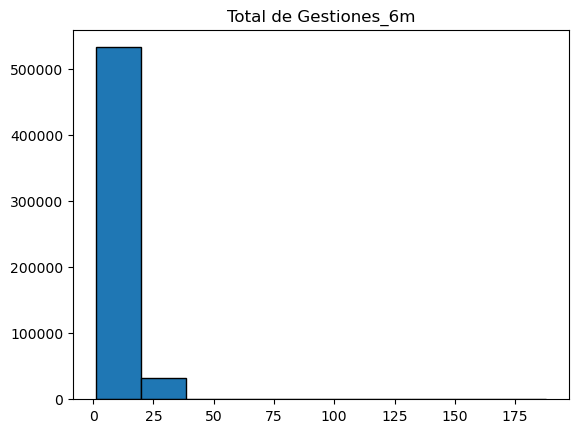

In [27]:
#analizando sus valores atípicos para el tratamiento de las variables numéricas 

#Histograma de la variable "TOTGEST6" - DATA ENTRENAMIENTO - SIN IMPUTACIONES
plt.title('Total de Gestiones_6m')
plt.hist(df_dataEntrenamientoOk["TOTGEST6"], edgecolor = 'black', linewidth=1)
plt.show() #evita que los resultados muestra como texto

#Interpretación:
#La variable total de gestiones en 6 meses, tiene un sesgo a la derecha con una moda de 1 en las gestiones dentro de los 6 meses y con más de 500000 mil veces que se realizó este número de gestiones.

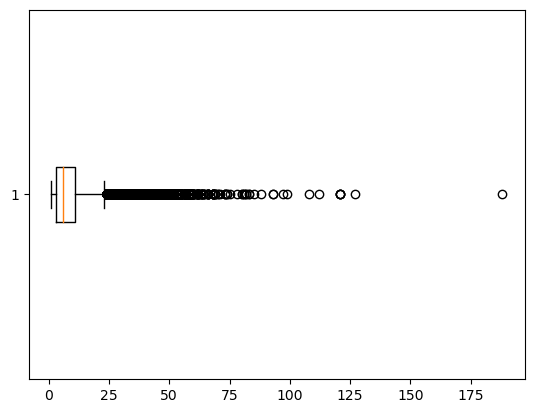

In [28]:
#Gráfica de bigotes de la variable "TOTGEST6" - DATA ENTRENAMIENTO - SIN IMPUTACIONES
plt.boxplot(df_dataEntrenamientoOk[df_dataEntrenamientoOk['TOTGEST6'].isnull()==False]['TOTGEST6'], vert=False)
plt.show() #evita que los resultados muestra como texto
#De acuerdo a la gráfica de abajo los valores outliers están fuera de la caja en forma de circulos

In [29]:
#Canculando los estadísticos para el boxplot de la data "dataMasterEntrenamiento"
Q1 = df_dataEntrenamientoOk["TOTGEST6"].quantile(0.25)
print("Primer Cuartil", Q1)
Q3 = df_dataEntrenamientoOk["TOTGEST6"].quantile(0.75)
print("Tercer Cuartil", Q3)
IQR = Q3 - Q1
print("Rango Intercuartil", IQR)
Mediana = df_dataEntrenamientoOk["TOTGEST6"].median() 
print("Mediana", Mediana)
Valor_Minimo = df_dataEntrenamientoOk["TOTGEST6"].min()
print("Valor Mínimo", Valor_Minimo)
Valor_Maximo = df_dataEntrenamientoOk["TOTGEST6"].max()
print("Valor Máximo", Valor_Maximo)

#Se muestran los valores de los cuartiles, valor de la mediana y valores mínimos y  máximos

Primer Cuartil 3.0
Tercer Cuartil 11.0
Rango Intercuartil 8.0
Mediana 6.0
Valor Mínimo 1.0
Valor Máximo 188.0


In [30]:
#Calculando los valores de los bigotes inferior y superior
LI_Calculado = (Q1 - 1.5 * IQR)
print("LI_Calculado \n", LI_Calculado) # \n utilizado para salto de línea #límite inferior

LS_Calculado = (Q3 + 1.5 * IQR)
print("LS_Calculado \n", LS_Calculado) # \n utilizado para salto de línea #Límite superior


LI_Calculado 
 -9.0
LS_Calculado 
 23.0


In [31]:
#Ubicando las filas en las que se encuentran los outliers
Localizacion_Outliers = (df_dataEntrenamientoOk["TOTGEST6"] < LI_Calculado) | (df_dataEntrenamientoOk["TOTGEST6"] > LS_Calculado) 
print("\n Localización de Outliers \n", Localizacion_Outliers)


 Localización de Outliers 
 0         False
1         False
2         False
3         False
4         False
          ...  
757386    False
757387    False
757388    False
757389    False
757390    False
Name: TOTGEST6, Length: 757391, dtype: bool


In [32]:
Outliers = df_dataEntrenamientoOk["TOTGEST6"][Localizacion_Outliers]
print("\n Listado de Outliers \n", Outliers)


 Listado de Outliers 
 40        28.0
91        50.0
104       26.0
137       28.0
153       32.0
          ... 
757037    30.0
757079    26.0
757123    28.0
757234    28.0
757247    29.0
Name: TOTGEST6, Length: 16058, dtype: float64


In [33]:
Outliers_ordenados = Outliers.sort_values(ascending=True)
print(Outliers_ordenados)

175206     24.0
146720     24.0
146953     24.0
146993     24.0
147203     24.0
          ...  
317534    121.0
244978    121.0
341145    121.0
442704    127.0
668742    188.0
Name: TOTGEST6, Length: 16058, dtype: float64


In [34]:
#Obteniendo tan solo los valores que NO son Outliers
localizacion_sin_out = (df_dataEntrenamientoOk["TOTGEST6"] >= LI_Calculado) & (df_dataEntrenamientoOk["TOTGEST6"] <= LS_Calculado)
Listado_TOTGEST6_sin_outliers = df_dataEntrenamientoOk["TOTGEST6"][localizacion_sin_out]
print(Listado_TOTGEST6_sin_outliers)

0          6.0
1         13.0
2          2.0
3          4.0
4         10.0
          ... 
757382     6.0
757384     2.0
757385     5.0
757386     4.0
757388     2.0
Name: TOTGEST6, Length: 549383, dtype: float64


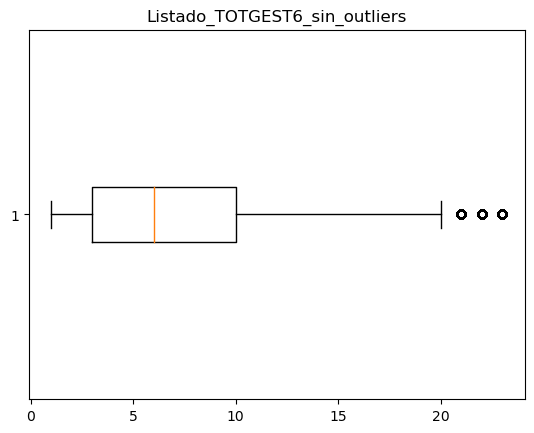

In [35]:
#Volvemos a creamos la gráfica de bigotes de la variable "TOTGEST6" con los valores obtenido con ya reducidos outliers, lo ideal es volver a realizar este procedimiento hasta que desaparezcan los outliers por completo - DATA ENTRENAMIENTO - SIN IMPUTACIONES
plt.title("Listado_TOTGEST6_sin_outliers")
plt.boxplot(Listado_TOTGEST6_sin_outliers, vert=False)
plt.show() #evita que los resultados muestra como texto

#De acuerdo a la gráfica de abajo ahora ya NO se visualizan valores outliers.

**Aplicando una función para reemplazar los valores outliers encontrados con su correspondiente tolerancia hacia su Límite Inferior = LI y/o Límite Superior =LS**

In [36]:
df_dataEntrenamientoOk #mostrando sus valores e info por columnas

NC_DISTR12  TOTGEST6  TOTGEST12  IDGRUPO  DIAS_ACT FBK_ULT6 FBK_ULT12  \
0         0.333333       6.0        6.0        3       118      TLV       TLV   
1         0.461538      13.0       13.0       40        94      TLV       TLV   
2         0.666667       2.0        6.0        6       223      TLV       TLV   
3              NaN       4.0        4.0       95        96      TLV       TLV   
4         0.187500      10.0       16.0        4        91      TLV       TLV   
...            ...       ...        ...      ...       ...      ...       ...   
757386    1.000000       4.0        4.0       95        99      TLV       TLV   
757387         NaN       NaN        NaN       40        66      NaN       NaN   
757388    0.500000       2.0        2.0       40       169      TLV       TLV   
757389         NaN       NaN        NaN        3        43      NaN       NaN   
757390         NaN       NaN        NaN       26       469      NaN       NaN   

       FBK_BEST6  DIAS_BEST6  DIAS_ULT6  ... NC_DIAS12  NC_CTD6  RECENCIA_APP  \
0            TLV         8.0        8.0  ...      58.0      2.0         133.0   
1            TLV        46.0        9.0  ...       9.0      6.0           NaN   
2            TLV       127.0      127.0  ...     127.0      2.0           NaN   
3            TLV        49.0       49.0  ...       NaN      NaN           NaN   
4            TLV        27.0       27.0  ...     140.0      2.0           NaN   
...          ...         ...        ...  ...       ...      ...           ...   
757386       TLV        17.0       17.0  ...      17.0      4.0           NaN   
757387       NaN         NaN        NaN  ...       NaN      NaN           NaN   
757388       TLV       169.0       23.0  ...      23.0      1.0           NaN   
757389       NaN         NaN        NaN  ...       NaN      NaN           NaN   
757390       NaN         NaN        NaN  ...       NaN      NaN           NaN   

               PROVINCIA  DEPARTAMENTO  INGRESO_NETO_VIGENTE  INGRESO_BRUTO  \
0                  TACNA         TACNA                7136.0         9389.0   
1                   LIMA          LIMA                6920.0         9105.0   
2                   LIMA          LIMA                1473.0         1655.0   
3                   LIMA          LIMA                2293.0         2729.0   
4                  CUSCO         CUSCO                6470.0         8513.0   
...                  ...           ...                   ...            ...   
757386  CORONEL PORTILLO       UCAYALI                3535.0         4474.0   
757387              LIMA          LIMA                1320.0         1483.0   
757388              LIMA          LIMA                1563.0         1756.0   
757389              LIMA          LIMA                1383.0         1553.0   
757390              LIMA          LIMA                4428.0         5605.0   

        SEGMENTO       RANGO_INGRESOS  TARGET  
0              2  Entre S/.4000-10000       1  
1            1BC  Entre S/.4000-10000       1  
2              2   Entre S/.1000-4000       1  
3              2   Entre S/.1000-4000       1  
4              3  Entre S/.4000-10000       1  
...          ...                  ...     ...  
757386         3  Entre S/.4000-10000       0  
757387        1A   Entre S/.1000-4000       0  
757388         2   Entre S/.1000-4000       0  
757389         2   Entre S/.1000-4000       0  
757390         2  Entre S/.4000-10000       0  

[757391 rows x 31 columns]

In [37]:
#Seleccionando las variables numéricas y excluyendo la variable TARGET para colocarlas en la función
variables_numericas = df_dataEntrenamientoOk.select_dtypes(include=[float, int]).drop(columns=['TARGET'], errors='ignore')  # seleccionar variables numéricas a excepción de la variable predictora Target
print(variables_numericas.columns) #muestra las 23 variables numéricas

Index(['NC_DISTR12', 'TOTGEST6', 'TOTGEST12', 'IDGRUPO', 'DIAS_ACT',
       'DIAS_BEST6', 'DIAS_ULT6', 'DIAS_BEST12', 'DIAS_ULT12', 'CNE_CTD12',
       'CNE_CTD6', 'CNE_DIAS6', 'CNE_DISTR6', 'CNE_DISTR12', 'CNE_DIAS12',
       'NC_CTD12', 'NC_DIAS6', 'NC_DIAS12', 'NC_CTD6', 'RECENCIA_APP',
       'INGRESO_NETO_VIGENTE', 'INGRESO_BRUTO'],
      dtype='object')


In [38]:
#Resolviendo el tema de los outliers en la data df_dataEntrenamientoOk - DATA ENTRENAMIENTO
def replace_outliers_values(df_dataEntrenamientoOk):
    variables_numericas = df_dataEntrenamientoOk.select_dtypes(include=[float, int]).drop(columns=['TARGET'], errors='ignore')  # seleccionar variables numéricas a excepción de la variable predictora Target
    #print(variables_numericas.columns) #muestra las 23 variables numéricas
    #columns_num = [x for x in variables_numericas] 
    #print(columns_num) 
    
    # Se calculan el porcentaje de outliers y se reemplazan en el DataFrame original
    for label in variables_numericas:
        Q1 = df_dataEntrenamientoOk[label].quantile(0.25) # calculando el percentil 0.25 para las variables numéricas
        Q3 = df_dataEntrenamientoOk[label].quantile(0.75) # calculando el percentil 0.75 para las variables numéricas
        IQR = Q3 - Q1  
        LI = Q1 - 1.5 * IQR
        LS = Q3 + 1.5 * IQR
        #print(LI)
        #print(LS)
        df_dataEntrenamientoOk[label] = np.where(df_dataEntrenamientoOk[label] > LS, LS, np.where(df_dataEntrenamientoOk[label] < LI, LI, df_dataEntrenamientoOk[label]))
    return df_dataEntrenamientoOk
df_dataEntrenamientoOk = replace_outliers_values(df_dataEntrenamientoOk)

In [39]:
df_dataEntrenamientoOk # presentando la data con tratamiento de outliers para variables numéricas

NC_DISTR12  TOTGEST6  TOTGEST12  IDGRUPO  DIAS_ACT FBK_ULT6 FBK_ULT12  \
0         0.333333       6.0        6.0      3.0     118.0      TLV       TLV   
1         0.461538      13.0       13.0     40.0      94.0      TLV       TLV   
2         0.666667       2.0        6.0      6.0     223.0      TLV       TLV   
3              NaN       4.0        4.0     95.0      96.0      TLV       TLV   
4         0.187500      10.0       16.0      4.0      91.0      TLV       TLV   
...            ...       ...        ...      ...       ...      ...       ...   
757386    1.000000       4.0        4.0     95.0      99.0      TLV       TLV   
757387         NaN       NaN        NaN     40.0      66.0      NaN       NaN   
757388    0.500000       2.0        2.0     40.0     169.0      TLV       TLV   
757389         NaN       NaN        NaN      3.0      43.0      NaN       NaN   
757390         NaN       NaN        NaN     26.0     469.0      NaN       NaN   

       FBK_BEST6  DIAS_BEST6  DIAS_ULT6  ... NC_DIAS12  NC_CTD6  RECENCIA_APP  \
0            TLV         8.0        8.0  ...      58.0      2.0         133.0   
1            TLV        46.0        9.0  ...       9.0      6.0           NaN   
2            TLV       127.0      118.0  ...     127.0      2.0           NaN   
3            TLV        49.0       49.0  ...       NaN      NaN           NaN   
4            TLV        27.0       27.0  ...     140.0      2.0           NaN   
...          ...         ...        ...  ...       ...      ...           ...   
757386       TLV        17.0       17.0  ...      17.0      4.0           NaN   
757387       NaN         NaN        NaN  ...       NaN      NaN           NaN   
757388       TLV       169.0       23.0  ...      23.0      1.0           NaN   
757389       NaN         NaN        NaN  ...       NaN      NaN           NaN   
757390       NaN         NaN        NaN  ...       NaN      NaN           NaN   

               PROVINCIA  DEPARTAMENTO  INGRESO_NETO_VIGENTE  INGRESO_BRUTO  \
0                  TACNA         TACNA                7136.0         9389.0   
1                   LIMA          LIMA                6920.0         9105.0   
2                   LIMA          LIMA                1473.0         1655.0   
3                   LIMA          LIMA                2293.0         2729.0   
4                  CUSCO         CUSCO                6470.0         8513.0   
...                  ...           ...                   ...            ...   
757386  CORONEL PORTILLO       UCAYALI                3535.0         4474.0   
757387              LIMA          LIMA                1320.0         1483.0   
757388              LIMA          LIMA                1563.0         1756.0   
757389              LIMA          LIMA                1383.0         1553.0   
757390              LIMA          LIMA                4428.0         5605.0   

        SEGMENTO       RANGO_INGRESOS  TARGET  
0              2  Entre S/.4000-10000       1  
1            1BC  Entre S/.4000-10000       1  
2              2   Entre S/.1000-4000       1  
3              2   Entre S/.1000-4000       1  
4              3  Entre S/.4000-10000       1  
...          ...                  ...     ...  
757386         3  Entre S/.4000-10000       0  
757387        1A   Entre S/.1000-4000       0  
757388         2   Entre S/.1000-4000       0  
757389         2   Entre S/.1000-4000       0  
757390         2  Entre S/.4000-10000       0  

[757391 rows x 31 columns]

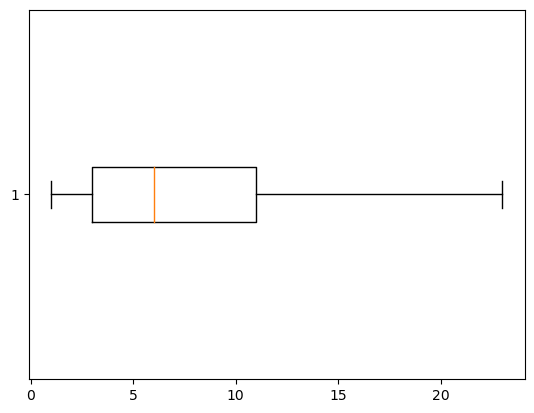

In [40]:
#Se muestra gráfica de bigotes sin valores outliers df_dataEntrenamientoOk = DATA ENTRENAMIENTO
plt.boxplot(df_dataEntrenamientoOk[df_dataEntrenamientoOk['TOTGEST6'].isnull()==False]['TOTGEST6'], vert=False)
plt.show()

#plt.title("Listado_TOTGEST6_sin_outliers")
#plt.boxplot(df_dataEntrenamientoOk["TOTGEST6"], vert=False)
#plt.show() #evita que los resultados muestra como texto


In [41]:
#Mostrando los valores Nulos y sus porcentajes por cada variable y por cada Data Entrenamiento 
def get_Data_Frame_Null(datamaster):
    # Contando los valores nulos por variable
    conteo_nulos = datamaster.isna().sum()

    # Calculando el porcentaje de nulos por columna
    porcentaje_nulos = (conteo_nulos / len(datamaster)) * 100

    # Creando un nuevo DataFrame con los resultados
    dataframe_nulos = pd.DataFrame({'Nulos': conteo_nulos, 'Porcentaje_de_Nulos': porcentaje_nulos})

    # Ordenando el DataFrame por la cantidad de nulos de manera descendente
    dataframe_nulos = dataframe_nulos.sort_values(by='Nulos', ascending=False)

    return dataframe_nulos

print ('\n --- Data Nulos Entrenamiento --- \n')
print (get_Data_Frame_Null(df_dataEntrenamientoOk))
#print ('\n --- Data Nulos Prueba --- \n') #Esto correspondería para la data de VALIDACIÓN 
#print (get_Data_Frame_Null(dataMasterPrueba))



 --- Data Nulos Entrenamiento --- 

                       Nulos  Porcentaje_de_Nulos
RECENCIA_APP          681465            89.975323
CNE_DIAS6             496789            65.592145
CNE_DISTR6            496789            65.592145
CNE_CTD6              496789            65.592145
CNE_CTD12             455346            60.120334
CNE_DIAS12            455346            60.120334
CNE_DISTR12           455346            60.120334
NC_CTD6               283215            37.393500
NC_DIAS6              283215            37.393500
NC_DIAS12             249939            32.999996
NC_CTD12              249939            32.999996
NC_DISTR12            249939            32.999996
TOTGEST6              191950            25.343581
DIAS_ULT6             191950            25.343581
DIAS_BEST6            191950            25.343581
FBK_BEST6             191950            25.343581
FBK_ULT6              191950            25.343581
DIAS_ULT12            169506            22.380250
FBK_BEST12   

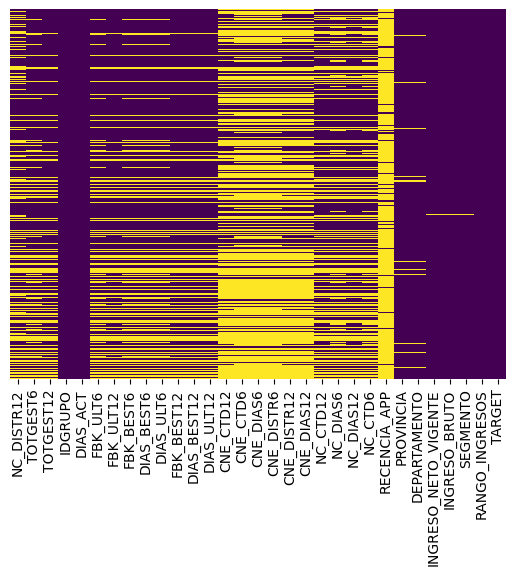

In [42]:
#Graficando los valores Nulos por variable sobre la data Entrenamiento usando "df_dataEntrenamientoOk"
sns.heatmap(df_dataEntrenamientoOk.isnull(),yticklabels=False,cbar=False,cmap='viridis');
#Los Colores amarillos muestran la data con valores NULOS por cada variable
#a este punto ya se eliminó las variables con valores NULOS mayores a 90%

In [43]:
#Mostrando las filas y columnas de la Data Entrenamiento
df_dataEntrenamientoOk.shape
#La data tiene 757,391 filas y 31 columnas


(757391, 31)

In [44]:
#Mostrando detalles de la Data Entrenamiento
dataEntrenamiento_info = df_dataEntrenamientoOk.isnull().sum().sort_values(ascending=False)
print(dataEntrenamiento_info)
#Se visualiza que hay problemas con los Nulos, tan solo las siguientes variables están completas
#NUMPRIORIZACION              0
#FEC_LLAMADA                  0
#DIAS_ACT                     0
#IDGRUPO                      0
#TARGET                       0

RECENCIA_APP            681465
CNE_DIAS6               496789
CNE_DISTR6              496789
CNE_CTD6                496789
CNE_CTD12               455346
CNE_DIAS12              455346
CNE_DISTR12             455346
NC_CTD6                 283215
NC_DIAS6                283215
NC_DIAS12               249939
NC_CTD12                249939
NC_DISTR12              249939
TOTGEST6                191950
DIAS_ULT6               191950
DIAS_BEST6              191950
FBK_BEST6               191950
FBK_ULT6                191950
DIAS_ULT12              169506
FBK_BEST12              169506
FBK_ULT12               169506
DIAS_BEST12             169506
TOTGEST12               169506
PROVINCIA                24931
DEPARTAMENTO             24931
SEGMENTO                  1413
INGRESO_NETO_VIGENTE      1360
INGRESO_BRUTO             1360
RANGO_INGRESOS               1
DIAS_ACT                     0
IDGRUPO                      0
TARGET                       0
dtype: int64


In [45]:
#Mostrando el porcentaje de las clases del TARGET
#Cantidad y % de categorías del TARGET
print(pd.value_counts(df_dataEntrenamientoOk['TARGET']))
print(100 * df_dataEntrenamientoOk['TARGET'].value_counts() / len(df_dataEntrenamientoOk['TARGET']))
#Creería que no requiere hacer balanceo para el presente caso

TARGET
1    492391
0    265000
Name: count, dtype: int64
TARGET
1    65.011467
0    34.988533
Name: count, dtype: float64


In [46]:
#Identificando las variables numéricas de la data "df_dataEntrenamientoOk" - Data Entrenamiento
df_dataEntrenamientoOk.select_dtypes(include=[np.number])

NC_DISTR12  TOTGEST6  TOTGEST12  IDGRUPO  DIAS_ACT  DIAS_BEST6  \
0         0.333333       6.0        6.0      3.0     118.0         8.0   
1         0.461538      13.0       13.0     40.0      94.0        46.0   
2         0.666667       2.0        6.0      6.0     223.0       127.0   
3              NaN       4.0        4.0     95.0      96.0        49.0   
4         0.187500      10.0       16.0      4.0      91.0        27.0   
...            ...       ...        ...      ...       ...         ...   
757386    1.000000       4.0        4.0     95.0      99.0        17.0   
757387         NaN       NaN        NaN     40.0      66.0         NaN   
757388    0.500000       2.0        2.0     40.0     169.0       169.0   
757389         NaN       NaN        NaN      3.0      43.0         NaN   
757390         NaN       NaN        NaN     26.0     469.0         NaN   

        DIAS_ULT6  DIAS_BEST12  DIAS_ULT12  CNE_CTD12  ...  CNE_DISTR12  \
0             8.0          8.0         8.0        1.0  ...     0.166667   
1             9.0         46.0         9.0        4.0  ...     0.307692   
2           118.0        218.5       127.0        NaN  ...          NaN   
3            49.0         49.0        49.0        2.0  ...     0.500000   
4            27.0         27.0        27.0        3.0  ...     0.187500   
...           ...          ...         ...        ...  ...          ...   
757386       17.0         17.0        17.0        NaN  ...          NaN   
757387        NaN          NaN         NaN        NaN  ...          NaN   
757388       23.0        169.0        23.0        NaN  ...          NaN   
757389        NaN          NaN         NaN        NaN  ...          NaN   
757390        NaN          NaN         NaN        NaN  ...          NaN   

        CNE_DIAS12  NC_CTD12  NC_DIAS6  NC_DIAS12  NC_CTD6  RECENCIA_APP  \
0            114.0       2.0      58.0       58.0      2.0         133.0   
1             15.0       6.0       9.0        9.0      6.0           NaN   
2              NaN       4.0     127.0      127.0      2.0           NaN   
3             68.0       NaN       NaN        NaN      NaN           NaN   
4            119.0       3.0     140.0      140.0      2.0           NaN   
...            ...       ...       ...        ...      ...           ...   
757386         NaN       4.0      17.0       17.0      4.0           NaN   
757387         NaN       NaN       NaN        NaN      NaN           NaN   
757388         NaN       1.0      23.0       23.0      1.0           NaN   
757389         NaN       NaN       NaN        NaN      NaN           NaN   
757390         NaN       NaN       NaN        NaN      NaN           NaN   

        INGRESO_NETO_VIGENTE  INGRESO_BRUTO  TARGET  
0                     7136.0         9389.0       1  
1                     6920.0         9105.0       1  
2                     1473.0         1655.0       1  
3                     2293.0         2729.0       1  
4                     6470.0         8513.0       1  
...                      ...            ...     ...  
757386                3535.0         4474.0       0  
757387                1320.0         1483.0       0  
757388                1563.0         1756.0       0  
757389                1383.0         1553.0       0  
757390                4428.0         5605.0       0  

[757391 rows x 23 columns]

In [47]:
#Identificando las variables categóricas de la data "df_dataEntrenamientoOk" - Data Entrenamiento
df_dataEntrenamientoOk.select_dtypes(include=['object'])

FBK_ULT6 FBK_ULT12 FBK_BEST6 FBK_BEST12         PROVINCIA DEPARTAMENTO  \
0           TLV       TLV       TLV        TLV             TACNA        TACNA   
1           TLV       TLV       TLV        TLV              LIMA         LIMA   
2           TLV       TLV       TLV        TLV              LIMA         LIMA   
3           TLV       TLV       TLV        TLV              LIMA         LIMA   
4           TLV       TLV       TLV        TLV             CUSCO        CUSCO   
...         ...       ...       ...        ...               ...          ...   
757386      TLV       TLV       TLV        TLV  CORONEL PORTILLO      UCAYALI   
757387      NaN       NaN       NaN        NaN              LIMA         LIMA   
757388      TLV       TLV       TLV        TLV              LIMA         LIMA   
757389      NaN       NaN       NaN        NaN              LIMA         LIMA   
757390      NaN       NaN       NaN        NaN              LIMA         LIMA   

       SEGMENTO       RANGO_INGRESOS  
0             2  Entre S/.4000-10000  
1           1BC  Entre S/.4000-10000  
2             2   Entre S/.1000-4000  
3             2   Entre S/.1000-4000  
4             3  Entre S/.4000-10000  
...         ...                  ...  
757386        3  Entre S/.4000-10000  
757387       1A   Entre S/.1000-4000  
757388        2   Entre S/.1000-4000  
757389        2   Entre S/.1000-4000  
757390        2  Entre S/.4000-10000  

[757391 rows x 8 columns]

In [48]:
#Revisando la información de los datos de la data "df_dataEntrenamientoOk"- Data Entrenamiento
print(len(df_dataEntrenamientoOk.columns))
df_dataEntrenamientoOk.info()


31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757391 entries, 0 to 757390
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NC_DISTR12            507452 non-null  float64
 1   TOTGEST6              565441 non-null  float64
 2   TOTGEST12             587885 non-null  float64
 3   IDGRUPO               757391 non-null  float64
 4   DIAS_ACT              757391 non-null  float64
 5   FBK_ULT6              565441 non-null  object 
 6   FBK_ULT12             587885 non-null  object 
 7   FBK_BEST6             565441 non-null  object 
 8   DIAS_BEST6            565441 non-null  float64
 9   DIAS_ULT6             565441 non-null  float64
 10  FBK_BEST12            587885 non-null  object 
 11  DIAS_BEST12           587885 non-null  float64
 12  DIAS_ULT12            587885 non-null  float64
 13  CNE_CTD12             302045 non-null  float64
 14  CNE_CTD6              260602 non-null  float64
 1

**Imputación Inicial con Media y Moda**

In [49]:
#Imputaciones de los valores perdidos (missing values) de la Data Entrenamiento para variables numéricas
variables_numericas = df_dataEntrenamientoOk.select_dtypes(include=[float, int]) # seleccionar variables numéricas y sus registros
#print(variables_numericas) #muestra las 30 variables numéricas y sus registros
df_dataEntrenamientoOk[variables_numericas.columns] = df_dataEntrenamientoOk[variables_numericas.columns].fillna(variables_numericas.mean())

In [50]:
#Imputaciones de los valores perdidos de la Data Entrenamiento para variables categóricas
variables_categoricas = df_dataEntrenamientoOk.select_dtypes(include=[object]) # seleccionar variables categóricas y sus registros
#print(variables_categoricas) #muestra las 10 variables categóricas y sus registros
df_dataEntrenamientoOk[variables_categoricas.columns] = df_dataEntrenamientoOk[variables_categoricas.columns].fillna(variables_categoricas.mode().iloc[0])

In [51]:
#VERIFICANDO EL CORRECTO PROCESO DE IMPUTACIONES
#Mostrando detalles del dataframe df_dataEntrenamientoOk de la Data Entrenamiento luego de las imputaciones
dataEntrenamiento_info_Imputadas = df_dataEntrenamientoOk.isnull().sum().sort_values(ascending=False)
print(dataEntrenamiento_info_Imputadas)
#Ya no presentan datos nulos en el dataframe

NC_DISTR12              0
CNE_DISTR6              0
RANGO_INGRESOS          0
SEGMENTO                0
INGRESO_BRUTO           0
INGRESO_NETO_VIGENTE    0
DEPARTAMENTO            0
PROVINCIA               0
RECENCIA_APP            0
NC_CTD6                 0
NC_DIAS12               0
NC_DIAS6                0
NC_CTD12                0
CNE_DIAS12              0
CNE_DISTR12             0
CNE_DIAS6               0
TOTGEST6                0
CNE_CTD6                0
CNE_CTD12               0
DIAS_ULT12              0
DIAS_BEST12             0
FBK_BEST12              0
DIAS_ULT6               0
DIAS_BEST6              0
FBK_BEST6               0
FBK_ULT12               0
FBK_ULT6                0
DIAS_ACT                0
IDGRUPO                 0
TOTGEST12               0
TARGET                  0
dtype: int64


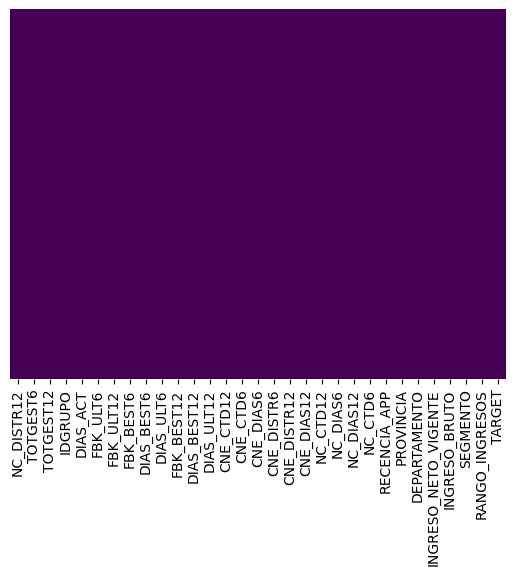

In [52]:
#Graficando los valores Nulos de df_dataEntrenamientoOk por variable sobre la data Entrenamiento luego de la imputación inicial con media y moda
sns.heatmap(df_dataEntrenamientoOk.isnull(),yticklabels=False,cbar=False,cmap='viridis');
#No muestra nulos

In [102]:
#Exportando la data df_dataEntrenamientoOk luego de hacer IMPUTACIONES hacia un CSV file para ser reutilizado fácilmente
# Imprime la ubicación actual de trabajo
current_directory = os.getcwd()
print("Ubicación actual de trabajo:", current_directory)
# Exporta el DataFrame a un archivo CSV
df_dataEntrenamientoOk.to_csv('df_dataEntrenamiento_ImputadasOk.csv', index=False)

Ubicación actual de trabajo: C:\Users\migda\OneDrive\3-Python for Data Science\Examen Final\1era Parte Examen Python para CD\1era Parte Examen Python para CD


**Imputación knn,** SE TRATÓ PERO NO SE LOGRÓ REALIZAR, LO DEJÉ CORRIENDO 2 DÍAS SEGUIDOS Y SALIÓ ERROR, DEMORA MUCHO, DEBO TAN SOLO ESCOGER ALGUNAS VARIABLES Y NO TODO COMO INTENTABA HACER SUPONGO

In [119]:
#Convirtiendo el dataset "DataMasterEntrenamiento" a un dataframe llamado df_dataTrainknn para la segunda forma de imputación
#df_dataTrainknn=dataMasterEntrenamiento.copy()

In [320]:
#df_dataTrainknn

In [ ]:
#pip install scikit-learn

In [ ]:
#from sklearn.impute import KNNImputer
#from sklearn.impute import SimpleImputer
#imputer_mean = SimpleImputer(strategy='mean')
#imputer_knn = KNNImputer(n_neighbors = 2)
#imputer_mode = SimpleImputer(strategy='most_frequent')

In [ ]:
#Imputaciones de los valores perdidos de la Data Entrenamiento para variables numéricas
#variables_numericas = df_dataTrainknn.select_dtypes(include=[float, int]) # seleccionar variables numéricas y sus registros

# Iterar a través de las columnas numéricas y aplicar la imputación solo a las que tienen valores nulos
#for col in variables_numericas.columns:
#    if df_dataTrainknn[col].isnull().any():
#        imputed_values = imputer_knn.fit_transform(df_dataTrainknn[[col]])
#        df_dataTrainknn[col] = imputed_values[:, 0]

In [321]:
#Revisando la información de los datos del dataframe df_dataTrainknn de la Data Entrenamiento
#print(len(df_dataTrainknn.columns))
#df_dataTrainknn.info()

In [ ]:
#Imputaciones de los valores perdidos de la Data Entrenamiento para variables categóricas
#variables_categoricas = df_dataTrainknn.select_dtypes(include=[object]) # seleccionar variables categóricas y sus registros
#print(variables_categoricas) #muestra las 10 variables categóricas y sus registros
# Iterar a través de las columnas categóricas y aplicar la imputación solo a las que tienen valores nulos
#for col in variables_categoricas.columns:
#    if df_dataTrainknn[col].isnull().any():
#        imputed_mode = SimpleImputer(strategy='most_frequent')
#        df_dataTrainknn[col] = imputed_mode.fit_transform(df_dataTrainknn[[col]].ravel()

**Imputación por promedios segmentados,** SE TRATÓ PERO NO SE LOGRÓ REALIZAR, NO LOGRO ENTENDER QUÉ VARIABLES DEBO ESCOGER O CÓMO DEBO SELECCIONARLAS

In [ ]:
#Convirtiendo el dataset "DataMasterEntrenamiento" a un dataframe llamado df_dataTrain
#df_dataTrain_PS=dataMasterEntrenamiento.copy()
#df_dataTrain_PS

In [ ]:
#Revisando la información de los datos del dataframe df_dataTrain_PS de la Data Entrenamiento
#print(len(df_dataTrain_PS.columns))
#df_dataTrain_PS.info()

In [ ]:
#!pip install cufflinks
#import cufflinks as cf
#cf.go_offline()

In [ ]:
#df_dataTrain_PS['NUMPRIORIZACION'].iplot(kind='hist',bins=30,color='blue');

In [ ]:
#plt.figure(figsize=(12, 7))
#sns.boxplot(x='NUMPRIORIZACION',y='NC_DISTR12',data=df_dataTrain_PS,palette='winter')

In [ ]:
#Imputaciones de los valores perdidos sobre "df_dataTrain_PS" de la Data Entrenamiento para variables numéricas
#df_dataTrain_PS['NUMPRIORIZACION'] = df_dataTrain_PS[['NUMPRIORIZACION','NC_DISTR12']].apply(impute_NUMPRIORIZACION, axis=1)


2.Realizar un análisis descriptivo de la información y presentar estadísticos de resumen (medidas de tendencia central, dispersión y correlaciones)


# RESPONDIENDO A LA PREGUNTA 2:

Medidas de Tendencia Central

In [54]:
#Medidas de tendencia central (MEDIA, DESVIACIÓN STÁNDARD, VALOR MÍNIMO, PERCENTIL 0,25, 50 Y 75% Y VALOR MÁXIMO) para la DATA ENTRENAMIENTO CON TRATAMIENTO DE OUTLIERS E IMPUTACIONES
df_dataEntrenamientoOk.describe()

#Como ejemplo de interpretación para una de las variables "NC_DISTR12"
#el promedio de Distribución NO contacto_12m es de 0.549908
#la desviación std de la Distribución NO contacto_12m es de 0.223877
#la Distribución NO contacto_12m mínimo es de 0.005435
#el primer cuartil es de 0.421053
#el segundo cuartil es de 0.549908
#el tercer cuartil es de 0.600000
#la Distribución NO contacto_12m máximo es de 1.000000

NC_DISTR12       TOTGEST6      TOTGEST12        IDGRUPO  \
count  757391.000000  757391.000000  757391.000000  757391.000000   
mean        0.549908       7.602954       9.454950      41.051548   
std         0.223877       5.079369       6.836825      32.477939   
min         0.005435       1.000000       1.000000       2.000000   
25%         0.421053       4.000000       4.000000       4.000000   
50%         0.549908       7.602954       9.454950      40.000000   
75%         0.600000       9.000000      11.000000      58.000000   
max         1.000000      23.000000      30.500000      95.000000   

            DIAS_ACT     DIAS_BEST6      DIAS_ULT6    DIAS_BEST12  \
count  757391.000000  757391.000000  757391.000000  757391.000000   
mean      218.933703      55.318484      36.296737      66.404790   
std       214.826905      43.829358      31.058051      57.178735   
min       -20.000000       0.000000       0.000000       0.000000   
25%        58.000000      22.000000      13.000000      22.000000   
50%       133.000000      55.318484      36.296737      66.404790   
75%       304.000000      59.000000      41.000000      74.000000   
max       673.000000     180.000000     118.000000     218.500000   

          DIAS_ULT12      CNE_CTD12  ...    CNE_DISTR12     CNE_DIAS12  \
count  757391.000000  757391.000000  ...  757391.000000  757391.000000   
mean       40.614142       2.453108  ...       0.242817     104.517741   
std        36.193358       1.049597  ...       0.102674      54.122051   
min         0.000000       1.000000  ...       0.008547       0.000000   
25%        13.000000       2.000000  ...       0.242817     104.517741   
50%        40.614142       2.453108  ...       0.242817     104.517741   
75%        46.000000       2.453108  ...       0.242817     104.517741   
max       129.000000       6.000000  ...       0.660256     349.000000   

            NC_CTD12       NC_DIAS6      NC_DIAS12        NC_CTD6  \
count  757391.000000  757391.000000  757391.000000  757391.000000   
mean        4.884415      52.266125      64.032666       4.189459   
std         3.146125      40.444751      54.147044       2.524153   
min         1.000000       0.000000       0.000000       1.000000   
25%         3.000000      22.000000      22.000000       3.000000   
50%         4.884415      52.266125      64.032666       4.189459   
75%         5.000000      52.266125      64.032666       4.189459   
max        14.500000     179.500000     225.500000      12.000000   

        RECENCIA_APP  INGRESO_NETO_VIGENTE  INGRESO_BRUTO         TARGET  
count  757391.000000         757391.000000  757391.000000  757391.000000  
mean       54.351316           3557.560691    4475.392221       0.650115  
std        22.737922           2334.350716    3142.222174       0.476934  
min         0.000000            369.000000     414.000000       0.000000  
25%        54.351316           1636.000000    1838.000000       0.000000  
50%        54.351316           2764.000000    3290.000000       1.000000  
75%        54.351316           4701.000000    5950.000000       1.000000  
max       199.000000           9313.500000   12138.000000       1.000000  

[8 rows x 23 columns]

In [55]:
variables_numericas = df_dataEntrenamientoOk.select_dtypes(include=[float, int])
variables_numericas.columns

Index(['NC_DISTR12', 'TOTGEST6', 'TOTGEST12', 'IDGRUPO', 'DIAS_ACT',
       'DIAS_BEST6', 'DIAS_ULT6', 'DIAS_BEST12', 'DIAS_ULT12', 'CNE_CTD12',
       'CNE_CTD6', 'CNE_DIAS6', 'CNE_DISTR6', 'CNE_DISTR12', 'CNE_DIAS12',
       'NC_CTD12', 'NC_DIAS6', 'NC_DIAS12', 'NC_CTD6', 'RECENCIA_APP',
       'INGRESO_NETO_VIGENTE', 'INGRESO_BRUTO', 'TARGET'],
      dtype='object')

In [56]:
variables_categoricas = df_dataEntrenamientoOk.select_dtypes(include=[object])
variables_categoricas.columns

Index(['FBK_ULT6', 'FBK_ULT12', 'FBK_BEST6', 'FBK_BEST12', 'PROVINCIA',
       'DEPARTAMENTO', 'SEGMENTO', 'RANGO_INGRESOS'],
      dtype='object')

In [57]:
#Hallando la MODA para las variables numéricas de la Data Entrenamiento "df_dataEntrenamientoOk"
import pandas as pd
variables_numericas = df_dataEntrenamientoOk.select_dtypes(include=[float, int])
#variables = [
 #   "NUMPRIORIZACION", "NC_DISTR12", "TOTGEST6", "TOTGEST12", "IDGRUPO", 
    #"DIAS_ACT", "DIAS_BEST6", "DIAS_ULT6", "DIAS_BEST12", "DIAS_ULT12",
    #"CNE_CTD12", "CNE_CTD6", "CNE_DIAS6", "CNE_DISTR6", "CNE_DISTR12", 
    #"CNE_DIAS12", "NC_CTD12", "NC_DIAS6", "NC_DIAS12", "NC_CTD6", "RECENCIA_APP",
    #"NT_CTD12", "NT_DISTR12", "NT_DIAS12", "NT_CTD6", "NT_DISTR6", "NT_DIAS6",
    #"INGRESO_NETO_VIGENTE", "INGRESO_BRUTO", "TARGET"
#]
def calcular_moda(dataframe, variables):
    modas = {}
    for columna in variables_numericas:
        moda = dataframe[columna].mode()
        modas[columna] = moda
    return modas

modas = calcular_moda(df_dataEntrenamientoOk, variables_numericas)

for columna, moda in modas.items():
    print(f"La moda de la columna '{columna}' es:")
    print(moda)

#Como ejemplo de interpretación para una de las variables
#la moda es igual a 0.549908 para la variable "NC_DISTR12", la Distribución NO contacto_12m que se repite más veces.

La moda de la columna 'NC_DISTR12' es:
0    0.549908
Name: NC_DISTR12, dtype: float64
La moda de la columna 'TOTGEST6' es:
0    7.602954
Name: TOTGEST6, dtype: float64
La moda de la columna 'TOTGEST12' es:
0    9.45495
Name: TOTGEST12, dtype: float64
La moda de la columna 'IDGRUPO' es:
0    40.0
Name: IDGRUPO, dtype: float64
La moda de la columna 'DIAS_ACT' es:
0    673.0
Name: DIAS_ACT, dtype: float64
La moda de la columna 'DIAS_BEST6' es:
0    55.318484
Name: DIAS_BEST6, dtype: float64
La moda de la columna 'DIAS_ULT6' es:
0    36.296737
Name: DIAS_ULT6, dtype: float64
La moda de la columna 'DIAS_BEST12' es:
0    66.40479
Name: DIAS_BEST12, dtype: float64
La moda de la columna 'DIAS_ULT12' es:
0    40.614142
Name: DIAS_ULT12, dtype: float64
La moda de la columna 'CNE_CTD12' es:
0    2.453108
Name: CNE_CTD12, dtype: float64
La moda de la columna 'CNE_CTD6' es:
0    2.188609
Name: CNE_CTD6, dtype: float64
La moda de la columna 'CNE_DIAS6' es:
0    78.890254
Name: CNE_DIAS6, dtype: floa

In [59]:
#Hallando la MODA para las variables categóricas de la Data Entrenamiento "df_dataEntrenamientoOk"
import pandas as pd
variables_categoricas = df_dataEntrenamientoOk.select_dtypes(include=[object])
#variables = [
#'FBK_ULT6', 'FBK_ULT12', 'FBK_BEST6', 'FBK_BEST12', 'COD_SALA', 'FEC_LLAMADA', 'PROVINCIA', 'DEPARTAMENTO', 'SEGMENTO', 'RANGO_INGRESOS'
#]
def calcular_moda(dataframe, variables):
    modas = {}
    for columna in variables_categoricas:
        moda = dataframe[columna].mode()
        modas[columna] = moda
    return modas

modas = calcular_moda(df_dataEntrenamientoOk, variables_categoricas)

for columna, moda in modas.items():
    print(f"La moda de la columna '{columna}' es:")
    print(moda)

#Como ejemplo de interpretación para una de las variables
#la moda es igual a "TLV" para la variable "FBK_ULT6", el Último Feedback de los útimos 6 meses que se repite más veces.


La moda de la columna 'FBK_ULT6' es:
0    TLV
Name: FBK_ULT6, dtype: object
La moda de la columna 'FBK_ULT12' es:
0    TLV
Name: FBK_ULT12, dtype: object
La moda de la columna 'FBK_BEST6' es:
0    TLV
Name: FBK_BEST6, dtype: object
La moda de la columna 'FBK_BEST12' es:
0    TLV
Name: FBK_BEST12, dtype: object
La moda de la columna 'PROVINCIA' es:
0    LIMA
Name: PROVINCIA, dtype: object
La moda de la columna 'DEPARTAMENTO' es:
0    LIMA
Name: DEPARTAMENTO, dtype: object
La moda de la columna 'SEGMENTO' es:
0    3
Name: SEGMENTO, dtype: object
La moda de la columna 'RANGO_INGRESOS' es:
0    Entre S/.1000-4000
Name: RANGO_INGRESOS, dtype: object


In [60]:
#Hallando la MEDIANA para las variables numéricas de la data "dataMasterEntrenamiento"
import pandas as pd
variables_numericas = df_dataEntrenamientoOk.select_dtypes(include=[float, int])
#variables = [
#    "NUMPRIORIZACION", "NC_DISTR12", "TOTGEST6", "TOTGEST12", "IDGRUPO", 
#    "DIAS_ACT", "DIAS_BEST6", "DIAS_ULT6", "DIAS_BEST12", "DIAS_ULT12",
#    "CNE_CTD12", "CNE_CTD6", "CNE_DIAS6", "CNE_DISTR6", "CNE_DISTR12", 
#    "CNE_DIAS12", "NC_CTD12", "NC_DIAS6", "NC_DIAS12", "NC_CTD6", "RECENCIA_APP",
#    "NT_CTD12", "NT_DISTR12", "NT_DIAS12", "NT_CTD6", "NT_DISTR6", "NT_DIAS6",
#    "INGRESO_NETO_VIGENTE", "INGRESO_BRUTO", "TARGET"
#]
def calculate_median(dataframe, variables_numericas):
    medians = {}
    for column in variables_numericas:
        median = dataframe[column].median()
        medians[column] = median
    return medians

medians = calculate_median(df_dataEntrenamientoOk, variables_numericas)

for column, median in medians.items():
    print(f"The median of the '{column}' column is:", median)
    
#Como ejemplo de interpretación para una de las variables
#La mediana de la variable 'NC_DISTR12' es de 0.5499076477571527

The median of the 'NC_DISTR12' column is: 0.5499076477571527
The median of the 'TOTGEST6' column is: 7.602954154368007
The median of the 'TOTGEST12' column is: 9.454949522440613
The median of the 'IDGRUPO' column is: 40.0
The median of the 'DIAS_ACT' column is: 133.0
The median of the 'DIAS_BEST6' column is: 55.31848415661404
The median of the 'DIAS_ULT6' column is: 36.29673652954066
The median of the 'DIAS_BEST12' column is: 66.40479005247624
The median of the 'DIAS_ULT12' column is: 40.614142221693015
The median of the 'CNE_CTD12' column is: 2.4531079805989173
The median of the 'CNE_CTD6' column is: 2.1886094504263207
The median of the 'CNE_DIAS6' column is: 78.8902541039593
The median of the 'CNE_DISTR6' column is: 0.2586588260742493
The median of the 'CNE_DISTR12' column is: 0.24281724776180968
The median of the 'CNE_DIAS12' column is: 104.51774073399659
The median of the 'NC_CTD12' column is: 4.884414683556277
The median of the 'NC_DIAS6' column is: 52.2661248144149
The median of 

In [61]:
#Medidas de tendencia central para la DATA PRUEBA - SIN IMPUTACIONES
dataMasterPrueba.describe()

NUMPRIORIZACION     NC_DISTR12       TOTGEST6      TOTGEST12  \
count    548214.000000  297220.000000  307847.000000  336281.000000   
mean          2.297612       0.650498       6.873450       8.559803   
std           1.691682       0.285051       6.189909       8.218877   
min           1.000000       0.009709       1.000000       1.000000   
25%           1.000000       0.416667       2.000000       3.000000   
50%           2.000000       0.666667       5.000000       6.000000   
75%           3.000000       1.000000       9.000000      12.000000   
max          10.000000       1.000000     147.000000     160.000000   

             IDGRUPO       DIAS_ACT     DIAS_BEST6      DIAS_ULT6  \
count  548214.000000  548214.000000  307847.000000  307847.000000   
mean       45.939662     446.538104      72.163084      53.964391   
std        35.287485     603.146236      56.355547      51.116574   
min         2.000000       0.000000       0.000000       0.000000   
25%         6.000000      98.000000      24.000000      15.000000   
50%        40.000000     178.000000      54.000000      36.000000   
75%        90.000000     523.000000     113.000000      73.000000   
max        95.000000   43067.000000     213.000000     213.000000   

         DIAS_BEST12     DIAS_ULT12  ...  RECENCIA_APP      NT_CTD12  \
count  336281.000000  336281.000000  ...  39862.000000  21229.000000   
mean       98.127218      71.533899  ...    109.886032      1.116727   
std        85.752866      76.313801  ...    241.249176      0.366973   
min         0.000000       0.000000  ...      1.000000      1.000000   
25%        30.000000      16.000000  ...      6.000000      1.000000   
50%        69.000000      43.000000  ...     20.000000      1.000000   
75%       148.000000     100.000000  ...     86.000000      1.000000   
max       332.000000     332.000000  ...   2159.000000      6.000000   

         NT_DISTR12     NT_DIAS12      NT_CTD6     NT_DISTR6      NT_DIAS6  \
count  21229.000000  21229.000000  12104.00000  12104.000000  12104.000000   
mean       0.121314    201.011164      1.07196      0.150821    151.913665   
std        0.144757     68.282104      0.28227      0.163392     40.500921   
min        0.008333      6.000000      1.00000      0.011111      6.000000   
25%        0.050000    147.000000      1.00000      0.062500    127.000000   
50%        0.076923    197.000000      1.00000      0.100000    157.000000   
75%        0.125000    253.000000      1.00000      0.166667    185.000000   
max        1.000000    331.000000      5.00000      1.000000    212.000000   

       INGRESO_NETO_VIGENTE  INGRESO_BRUTO         TARGET  
count         545863.000000  545863.000000  548214.000000  
mean            3730.749868    4801.699687       0.210217  
std             3457.444234    5044.182494       0.407463  
min              311.000000     349.000000       0.000000  
25%             1636.000000    1838.000000       0.000000  
50%             2709.000000    3225.000000       0.000000  
75%             4550.000000    5759.000000       0.000000  
max           499135.000000  734022.000000       1.000000  

[8 rows x 30 columns]

Detalles de Correlación y sus gráficas

In [62]:
#Correlaciones de la DATA ENTRENAMIENTO - SIN IMPUTACIONES

numeric_data = dataMasterEntrenamiento.select_dtypes(include=['number'])
correlation_matrix_numeric = numeric_data.corr()
print(correlation_matrix_numeric)

categorical_data = dataMasterEntrenamiento.select_dtypes(exclude=['number'])
print(categorical_data)

                      NUMPRIORIZACION  NC_DISTR12  TOTGEST6  TOTGEST12  \
NUMPRIORIZACION              1.000000    0.390156 -0.199154  -0.226988   
NC_DISTR12                   0.390156    1.000000 -0.246720  -0.309444   
TOTGEST6                    -0.199154   -0.246720  1.000000   0.900223   
TOTGEST12                   -0.226988   -0.309444  0.900223   1.000000   
IDGRUPO                      0.098186    0.207077 -0.137268  -0.171026   
DIAS_ACT                     0.478498    0.308292 -0.183472  -0.189025   
DIAS_BEST6                   0.054705    0.099090 -0.177290  -0.139309   
DIAS_ULT6                    0.070660    0.089801 -0.317669  -0.258061   
DIAS_BEST12                  0.086932    0.168978 -0.180856  -0.176064   
DIAS_ULT12                   0.097104    0.163100 -0.317669  -0.285949   
CNE_CTD12                   -0.106193   -0.198781  0.429141   0.481915   
CNE_CTD6                    -0.097859   -0.189222  0.469606   0.375898   
CNE_DIAS6                   -0.040309 

In [63]:
#Correlaciones de la DATA ENTRENAMIENTO - CON IMPUTACIONES

numeric_data = df_dataEntrenamientoOk.select_dtypes(include=['number'])
correlation_matrix_numeric = numeric_data.corr()
print(correlation_matrix_numeric)

categorical_data = df_dataEntrenamientoOk.select_dtypes(exclude=['number'])
print(categorical_data)

                      NC_DISTR12  TOTGEST6  TOTGEST12   IDGRUPO  DIAS_ACT  \
NC_DISTR12              1.000000 -0.249882  -0.312414  0.162013  0.224456   
TOTGEST6               -0.249882  1.000000   0.889238 -0.120804 -0.157207   
TOTGEST12              -0.312414  0.889238   1.000000 -0.151531 -0.161145   
IDGRUPO                 0.162013 -0.120804  -0.151531  1.000000 -0.139974   
DIAS_ACT                0.224456 -0.157207  -0.161145 -0.139974  1.000000   
DIAS_BEST6              0.089688 -0.183157  -0.138537 -0.069790  0.091653   
DIAS_ULT6               0.065722 -0.338184  -0.270114 -0.059630  0.107462   
DIAS_BEST12             0.152020 -0.170196  -0.183653 -0.086163  0.150496   
DIAS_ULT12              0.115169 -0.305532  -0.312690 -0.070078  0.153828   
CNE_CTD12              -0.120795  0.320872   0.360549 -0.025451 -0.043179   
CNE_CTD6               -0.102502  0.328473   0.266475 -0.010541 -0.049485   
CNE_DIAS6              -0.018315  0.006713   0.051915 -0.070709 -0.002551   

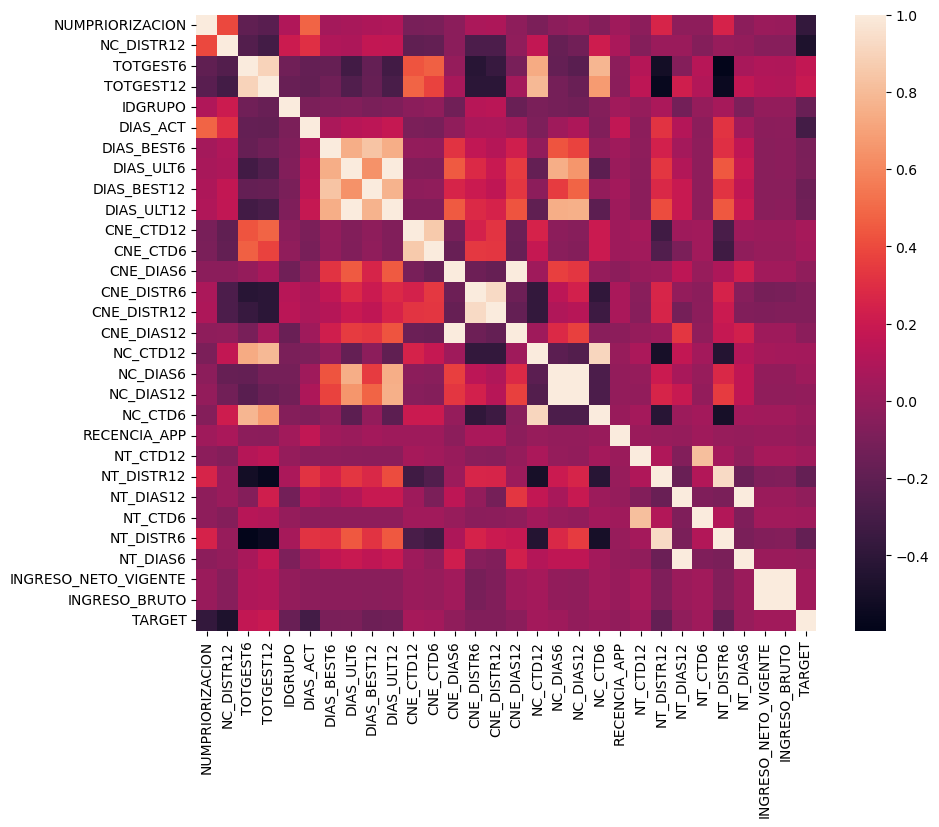

In [64]:
#Gráfica de correlaciones de la data Entrenamiento - SIN IMPUTACIONES
import seaborn as sns
import matplotlib.pyplot as plt
#Creando una figura con un tamaño personalizado (ancho x alto)
plt.figure(figsize=(10, 8))

#Creando el mapa de calor
sns.heatmap(dataMasterEntrenamiento[dataMasterEntrenamiento.select_dtypes(exclude='O').columns].corr())

#Mostrando el gráfico de correlación de la Data Entrenamiento
plt.show()

#En cuanto a modelos predictivos, debemos considerar la eliminación de variables altamente correlacionadas 
#ya que, puede causar problemas de multicolinealidad, siendo difícil determinar 
#la importancia individual de las variables y puede llevar a modelos menos interpretables.

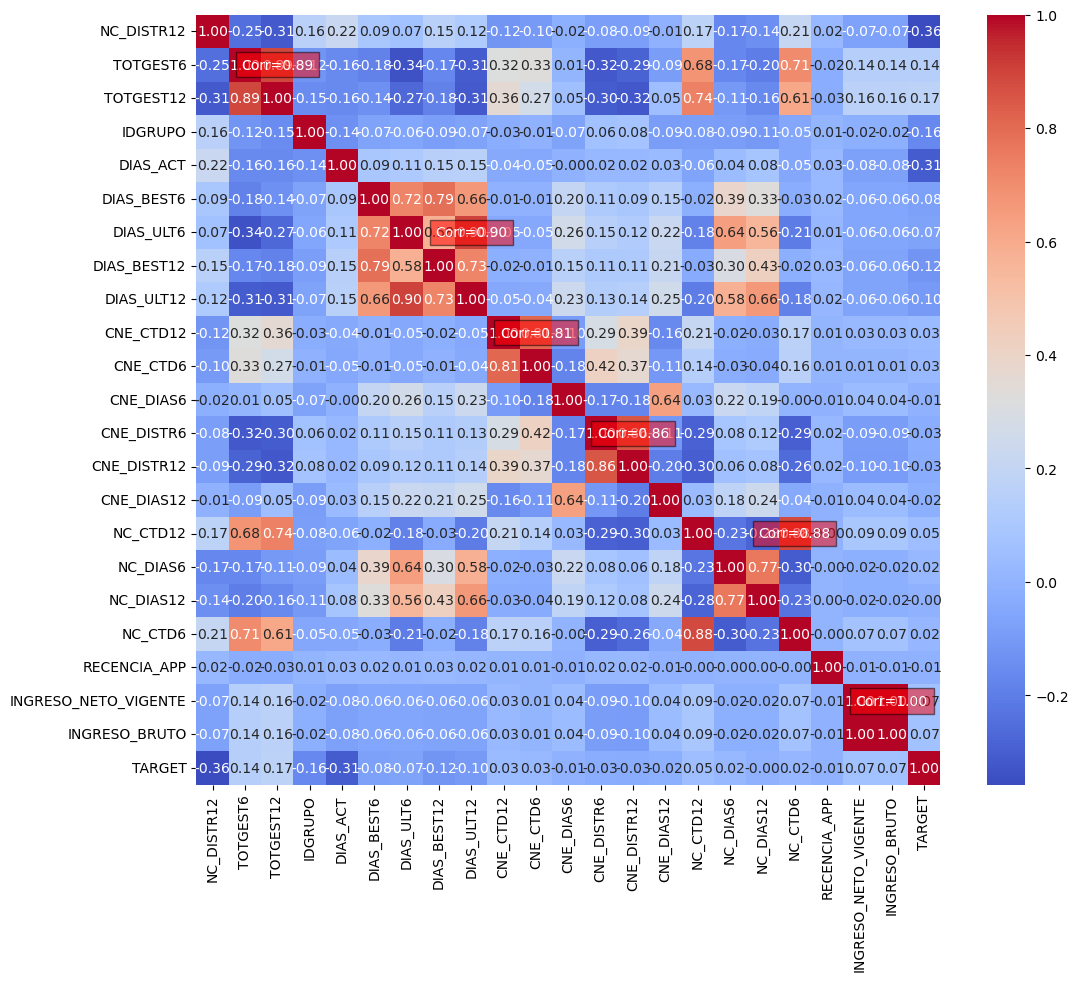

In [65]:
# Graficando las correlaciones de la data Entrenamiento - CON IMPUTACIONES
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Creando una figura con un tamaño personalizado (ancho x alto)
plt.figure(figsize=(12, 10))

# Creando el mapa de calor
correlation_matrix = df_dataEntrenamientoOk[df_dataEntrenamientoOk.select_dtypes(exclude='O').columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Resaltando las correlaciones altas
threshold = 0.8  # Umbral para considerar una correlación alta
high_corr_cells = np.where(np.abs(correlation_matrix) > threshold)
for i, j in zip(*high_corr_cells):
    if i != j and i < j:
        plt.text(j + 0.5, i + 0.5, f'Corr={correlation_matrix.iloc[i, j]:.2f}',
                 ha='center', va='center', color='white', fontsize=10, bbox=dict(facecolor='red', alpha=0.5))

# Mostrando el gráfico de correlación de la Data Entrenamiento
plt.show()

# En cuanto a modelos predictivos, debemos considerar la eliminación de variables altamente correlacionadas
# ya que, puede causar problemas de multicolinealidad, siendo difícil determinar
# la importancia individual de las variables y puede llevar a modelos menos interpretables


In [66]:
#Listando las variables altamente correlacionadas - Data Entrenamiento - SIN IMPUTACIONES
import pandas as pd
# Calculando la matriz de correlación
correlation_matrix = dataMasterEntrenamiento[dataMasterEntrenamiento.select_dtypes(exclude='O').columns].corr()

# Definir un umbral de correlación alta
threshold = 0.8  # Puedes ajustar este valor según tus necesidades

# Encontrar las variables altamente correlacionadas
highly_correlated_vars = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_vars.add(colname_i)
            highly_correlated_vars.add(colname_j)

# Convertir el conjunto de variables altamente correlacionadas en una lista
highly_correlated_vars = list(highly_correlated_vars)

# Mostrar las variables altamente correlacionadas
print("Variables altamente correlacionadas:")
print(highly_correlated_vars)

Variables altamente correlacionadas:
['NT_DISTR6', 'DIAS_BEST6', 'INGRESO_BRUTO', 'CNE_CTD12', 'NC_DIAS6', 'NT_CTD6', 'DIAS_ULT6', 'NT_DISTR12', 'TOTGEST6', 'CNE_CTD6', 'NC_DIAS12', 'DIAS_BEST12', 'NT_DIAS12', 'TOTGEST12', 'CNE_DIAS12', 'INGRESO_NETO_VIGENTE', 'NT_DIAS6', 'NT_CTD12', 'CNE_DISTR12', 'DIAS_ULT12', 'NC_CTD12', 'NC_CTD6', 'CNE_DIAS6', 'CNE_DISTR6']


In [67]:
#Listando las variables altamente correlacionadas - Data Entrenamiento - CON IMPUTACIONES
import pandas as pd
# Calculando la matriz de correlación
correlation_matrix = df_dataEntrenamientoOk[df_dataEntrenamientoOk.select_dtypes(exclude='O').columns].corr()

# Definir un umbral de correlación alta
threshold = 0.8  # Puedes ajustar este valor según tus necesidades

# Encontrar las variables altamente correlacionadas
highly_correlated_vars = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_vars.add(colname_i)
            highly_correlated_vars.add(colname_j)

# Convertir el conjunto de variables altamente correlacionadas en una lista
highly_correlated_vars = list(highly_correlated_vars)

# Mostrar las variables altamente correlacionadas
print("Variables altamente correlacionadas:")
print(highly_correlated_vars)

Variables altamente correlacionadas:
['CNE_DISTR12', 'DIAS_ULT12', 'NC_CTD12', 'CNE_DISTR6', 'DIAS_ULT6', 'NC_CTD6', 'TOTGEST12', 'INGRESO_NETO_VIGENTE', 'INGRESO_BRUTO', 'TOTGEST6', 'CNE_CTD12', 'CNE_CTD6']


In [69]:
#Correlaciones de la DATA PRUEBA *validaci[on()]
numeric_data = dataMasterPrueba.select_dtypes(include=['number'])
correlation_matrix_numeric = numeric_data.corr()
print(correlation_matrix_numeric)

categorical_data = dataMasterPrueba.select_dtypes(exclude=['number'])
print(categorical_data)

                      NUMPRIORIZACION  NC_DISTR12  TOTGEST6  TOTGEST12  \
NUMPRIORIZACION              1.000000    0.375765 -0.215542  -0.256927   
NC_DISTR12                   0.375765    1.000000 -0.286328  -0.389991   
TOTGEST6                    -0.215542   -0.286328  1.000000   0.917631   
TOTGEST12                   -0.256927   -0.389991  0.917631   1.000000   
IDGRUPO                      0.044068    0.221503 -0.144180  -0.174751   
DIAS_ACT                     0.507212    0.304564 -0.194828  -0.228982   
DIAS_BEST6                   0.114348    0.129610 -0.191127  -0.158115   
DIAS_ULT6                    0.168436    0.173333 -0.379247  -0.318140   
DIAS_BEST12                  0.166186    0.201756 -0.191856  -0.221491   
DIAS_ULT12                   0.209853    0.262605 -0.379247  -0.361465   
CNE_CTD12                   -0.130275   -0.236838  0.424200   0.497732   
CNE_CTD6                    -0.121168   -0.211883  0.462484   0.406064   
CNE_DIAS6                   -0.074784 

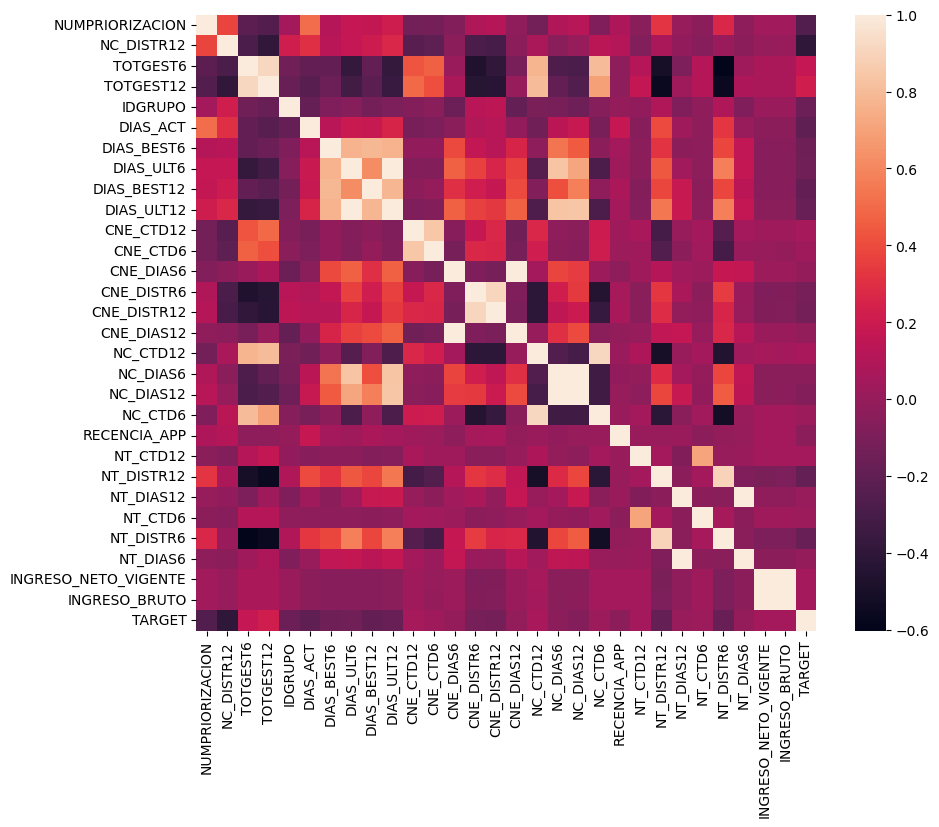

In [70]:
#Gráfica de correlaciones de la DATA PRUEBA
import seaborn as sns
import matplotlib.pyplot as plt
#Creando una figura con un tamaño personalizado (ancho x alto)
plt.figure(figsize=(10, 8))

#Creando el mapa de calor
sns.heatmap(dataMasterPrueba[dataMasterPrueba.select_dtypes(exclude='O').columns].corr())

#Mostrando el gráfico de correlación de la Data Prueba
plt.show()

#En cuanto a modelos predictivos, debemos considerar la eliminación de variables altamente correlacionadas 
#ya que, puede causar problemas de multicolinealidad, siendo difícil determinar 
#la importancia individual de las variables y puede llevar a modelos menos interpretables.

Detalles de Dispersión y su gráfica

In [71]:
print(dataMasterEntrenamiento.columns)

Index(['NUMPRIORIZACION', 'NC_DISTR12', 'TOTGEST6', 'TOTGEST12', 'IDGRUPO',
       'DIAS_ACT', 'FBK_ULT6', 'FBK_ULT12', 'FBK_BEST6', 'DIAS_BEST6',
       'DIAS_ULT6', 'FBK_BEST12', 'DIAS_BEST12', 'DIAS_ULT12', 'CNE_CTD12',
       'CNE_CTD6', 'CNE_DIAS6', 'CNE_DISTR6', 'CNE_DISTR12', 'CNE_DIAS12',
       'NC_CTD12', 'NC_DIAS6', 'NC_DIAS12', 'NC_CTD6', 'RECENCIA_APP',
       'COD_SALA', 'NT_CTD12', 'NT_DISTR12', 'NT_DIAS12', 'FEC_LLAMADA',
       'NT_CTD6', 'NT_DISTR6', 'NT_DIAS6', 'PROVINCIA', 'DEPARTAMENTO',
       'INGRESO_NETO_VIGENTE', 'INGRESO_BRUTO', 'SEGMENTO', 'RANGO_INGRESOS',
       'TARGET'],
      dtype='object')


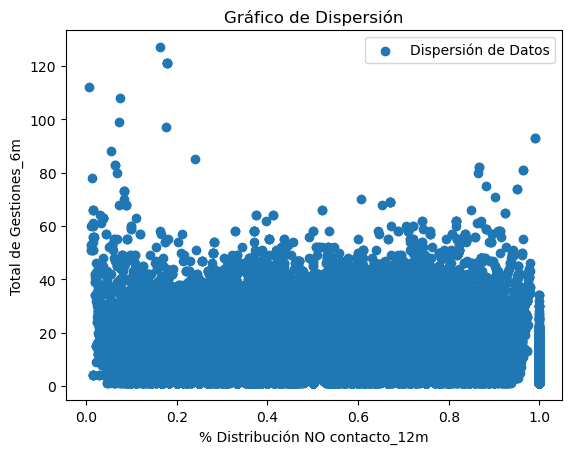

In [72]:
#Gráfica de Dispersión para los datos numéricos de la DATA ENTRENAMIENTO - SIN IMPUTACIONES
import matplotlib.pyplot as plt

#"NUMPRIORIZACION", "NC_DISTR12", "TOTGEST6", "TOTGEST12", "IDGRUPO", 
   #"DIAS_ACT", "DIAS_BEST6", "DIAS_ULT6", "DIAS_BEST12", "DIAS_ULT12",
   #"CNE_CTD12", "CNE_CTD6", "CNE_DIAS6", "CNE_DISTR6", "CNE_DISTR12", 
   #"CNE_DIAS12","NC_CTD12","NC_DIAS6","NC_DIAS12","NC_CTD6","RECENCIA_APP",
   #"NT_CTD12","NT_DISTR12","NT_DIAS12","NT_CTD6","NT_DISTR6","NT_DIAS6",
   #"INGRESO_NETO_VIGENTE","INGRESO_BRUTO","TARGET"

# Eligiendo dos variables a utilizar
x = dataMasterEntrenamiento['NC_DISTR12']
y = dataMasterEntrenamiento['TOTGEST6']

# Creando el scatter plot
plt.scatter(x, y, label='Dispersión de Datos')

# Personalizando el gráfico si es necesario
plt.title('Gráfico de Dispersión')
plt.xlabel('% Distribución NO contacto_12m')
plt.ylabel('Total de Gestiones_6m')
plt.legend()

# Mostrando el gráfico
plt.show()


C:\Users\migda\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


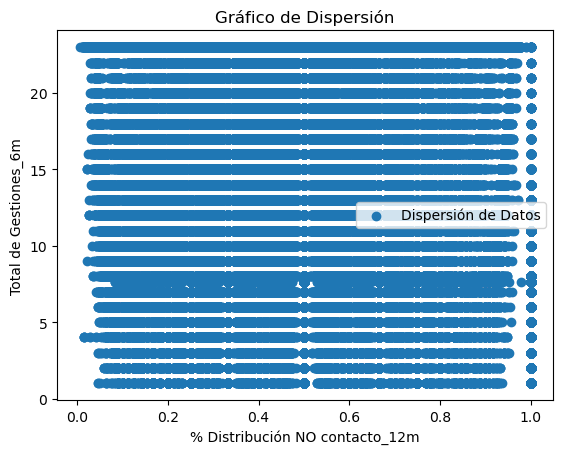

In [73]:
#Gráfica de Dispersión para los datos numéricos de la DATA ENTRENAMIENTO - CON IMPUTACIONES
import matplotlib.pyplot as plt

#"NUMPRIORIZACION", "NC_DISTR12", "TOTGEST6", "TOTGEST12", "IDGRUPO", 
   #"DIAS_ACT", "DIAS_BEST6", "DIAS_ULT6", "DIAS_BEST12", "DIAS_ULT12",
   #"CNE_CTD12", "CNE_CTD6", "CNE_DIAS6", "CNE_DISTR6", "CNE_DISTR12", 
   #"CNE_DIAS12","NC_CTD12","NC_DIAS6","NC_DIAS12","NC_CTD6","RECENCIA_APP",
   #"NT_CTD12","NT_DISTR12","NT_DIAS12","NT_CTD6","NT_DISTR6","NT_DIAS6",
   #"INGRESO_NETO_VIGENTE","INGRESO_BRUTO","TARGET"

# Eligiendo dos variables a utilizar
x = df_dataEntrenamientoOk['NC_DISTR12']
y = df_dataEntrenamientoOk['TOTGEST6']

# Creando el scatter plot
plt.scatter(x, y, label='Dispersión de Datos')

# Personalizando el gráfico si es necesario
plt.title('Gráfico de Dispersión')
plt.xlabel('% Distribución NO contacto_12m')
plt.ylabel('Total de Gestiones_6m')
plt.legend()

# Mostrando el gráfico
plt.show()


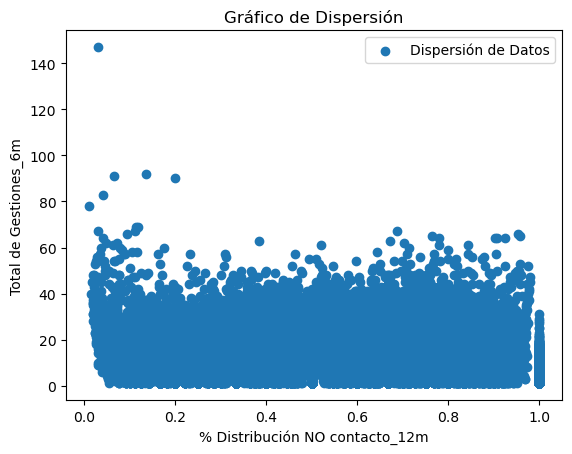

In [74]:
#Gráfica de Dispersión para los datos numéricos de la DATA PRUEBA - SIN IMPUTACIONES
import matplotlib.pyplot as plt

#"NUMPRIORIZACION", "NC_DISTR12", "TOTGEST6", "TOTGEST12", "IDGRUPO", 
   #"DIAS_ACT", "DIAS_BEST6", "DIAS_ULT6", "DIAS_BEST12", "DIAS_ULT12",
   #"CNE_CTD12", "CNE_CTD6", "CNE_DIAS6", "CNE_DISTR6", "CNE_DISTR12", 
   #"CNE_DIAS12","NC_CTD12","NC_DIAS6","NC_DIAS12","NC_CTD6","RECENCIA_APP",
   #"NT_CTD12","NT_DISTR12","NT_DIAS12","NT_CTD6","NT_DISTR6","NT_DIAS6",
   #"INGRESO_NETO_VIGENTE","INGRESO_BRUTO","TARGET"

# Eligiendo dos variables a utilizar
x = dataMasterPrueba['NC_DISTR12']
y = dataMasterPrueba['TOTGEST6']

# Creando el scatter plot
plt.scatter(x, y, label='Dispersión de Datos')

# Personalizando el gráfico si es necesario
plt.title('Gráfico de Dispersión')
plt.xlabel('% Distribución NO contacto_12m')
plt.ylabel('Total de Gestiones_6m')
plt.legend()

# Mostrando el gráfico
plt.show()

#Consultar si se debiera hacer por todas las variables

3.Realizar análisis gráficos para variables numéricas y categóricas, realizar un análisis gráfico de variables numéricas y categóricas en conjunto.


# RESPONDIENDO A LA PREGUNTA 3:

In [75]:
print(dataMasterEntrenamiento.columns)

Index(['NUMPRIORIZACION', 'NC_DISTR12', 'TOTGEST6', 'TOTGEST12', 'IDGRUPO',
       'DIAS_ACT', 'FBK_ULT6', 'FBK_ULT12', 'FBK_BEST6', 'DIAS_BEST6',
       'DIAS_ULT6', 'FBK_BEST12', 'DIAS_BEST12', 'DIAS_ULT12', 'CNE_CTD12',
       'CNE_CTD6', 'CNE_DIAS6', 'CNE_DISTR6', 'CNE_DISTR12', 'CNE_DIAS12',
       'NC_CTD12', 'NC_DIAS6', 'NC_DIAS12', 'NC_CTD6', 'RECENCIA_APP',
       'COD_SALA', 'NT_CTD12', 'NT_DISTR12', 'NT_DIAS12', 'FEC_LLAMADA',
       'NT_CTD6', 'NT_DISTR6', 'NT_DIAS6', 'PROVINCIA', 'DEPARTAMENTO',
       'INGRESO_NETO_VIGENTE', 'INGRESO_BRUTO', 'SEGMENTO', 'RANGO_INGRESOS',
       'TARGET'],
      dtype='object')


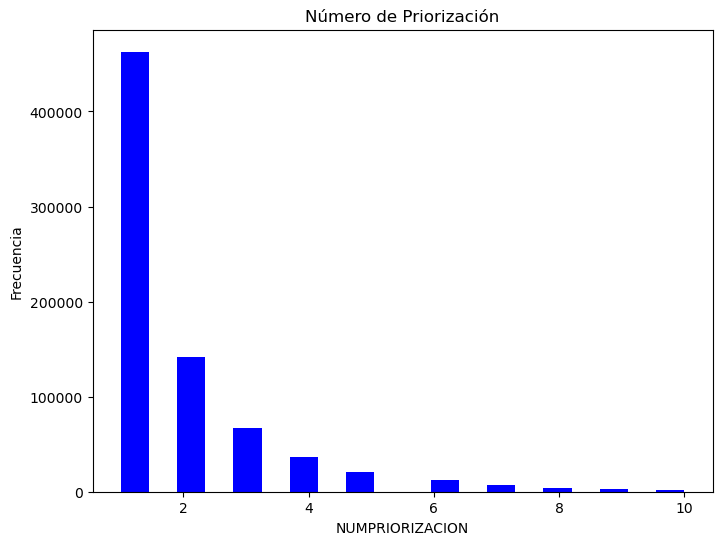

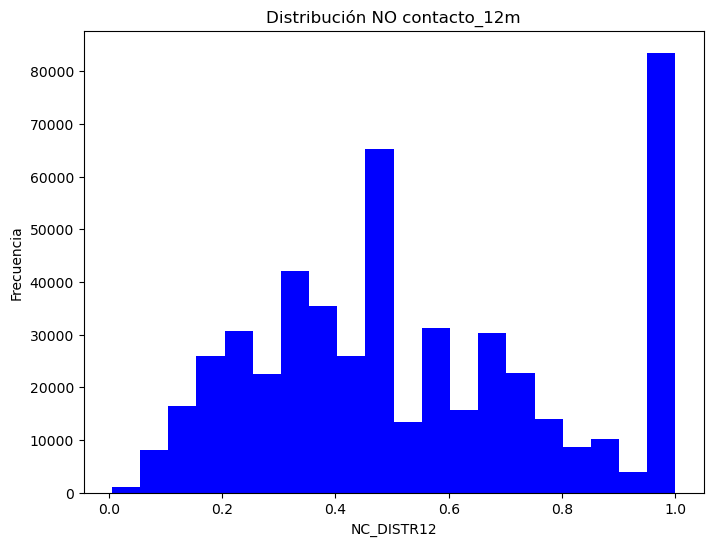

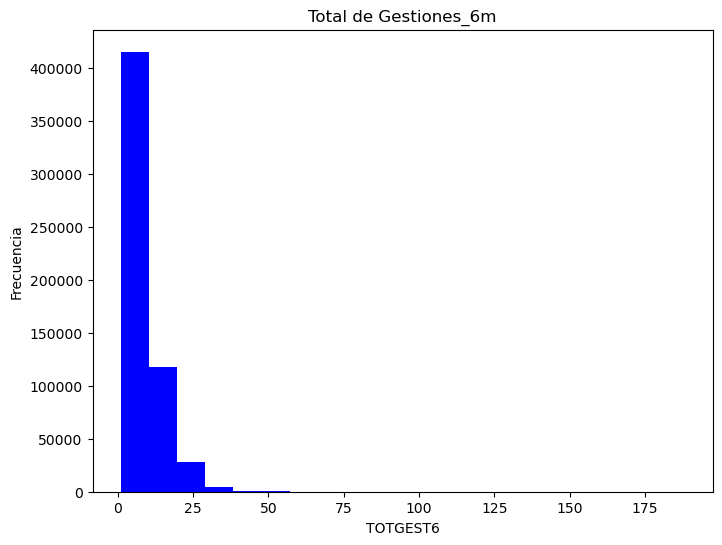

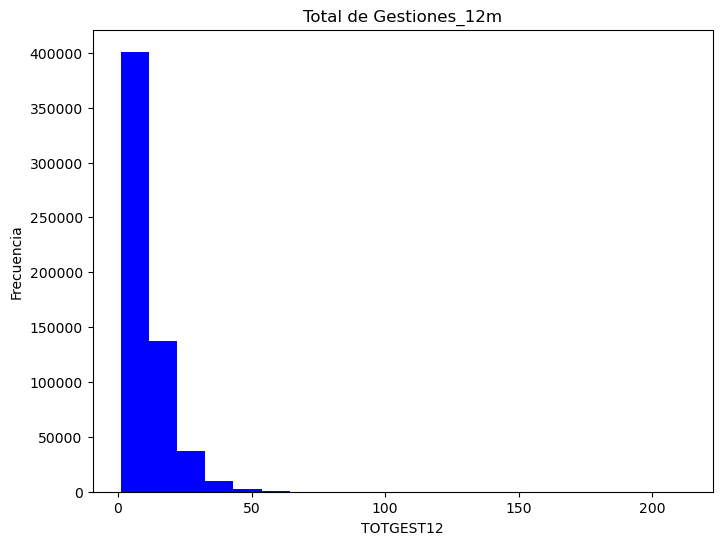

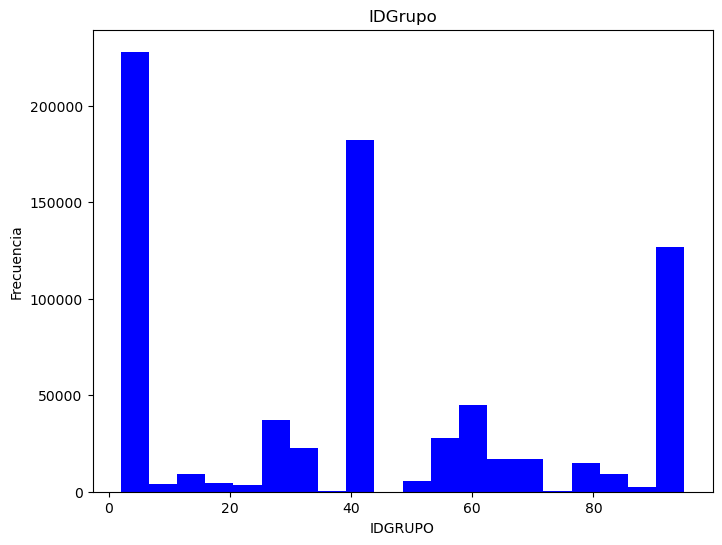

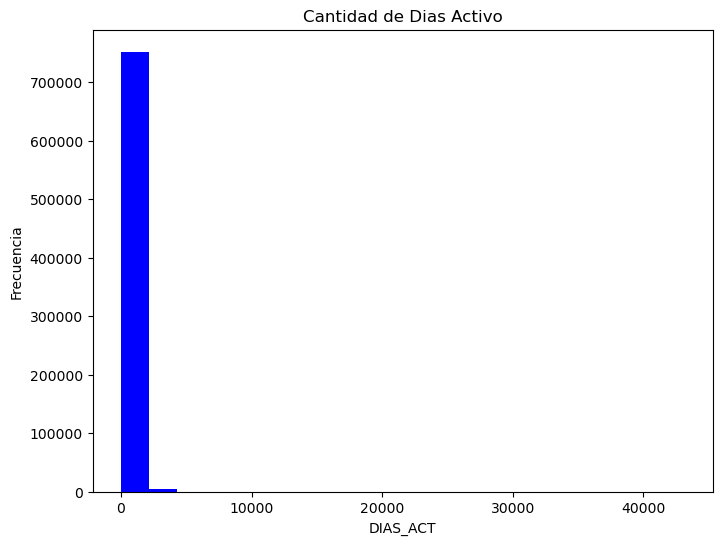

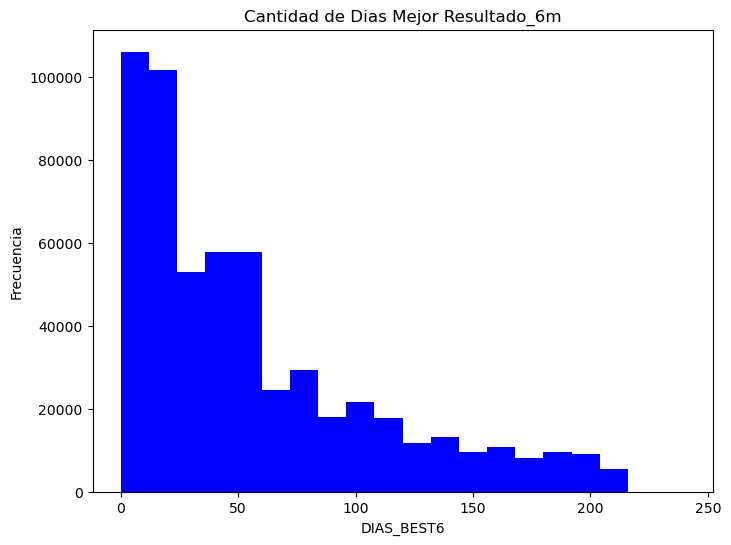

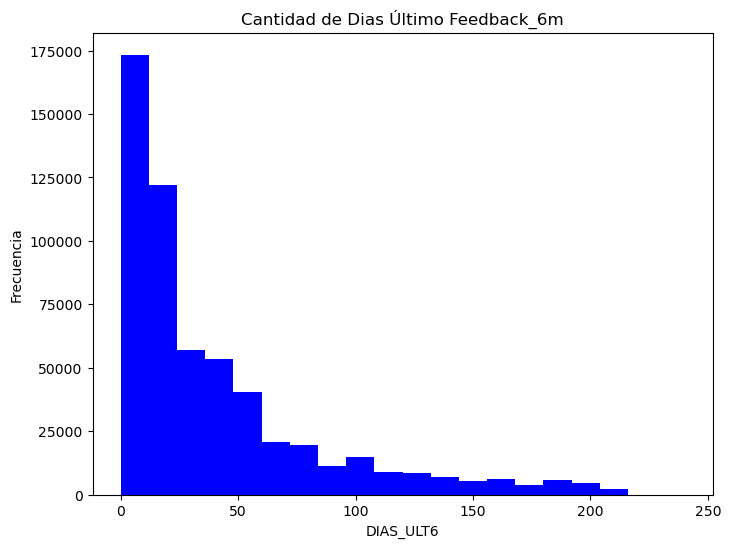

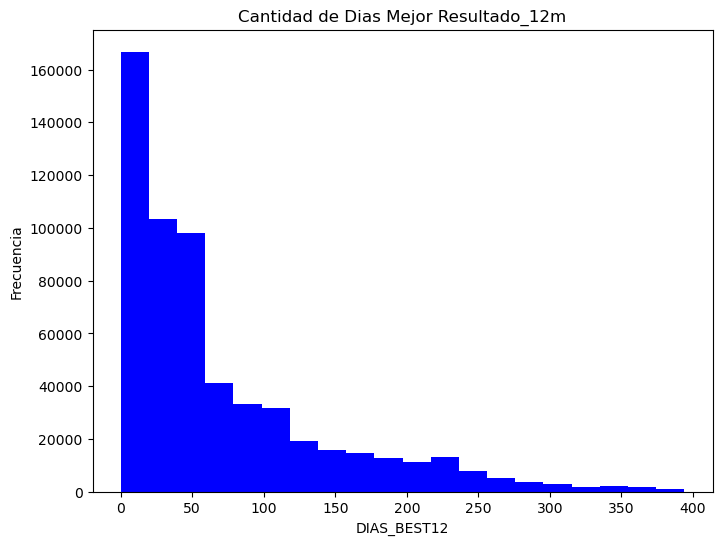

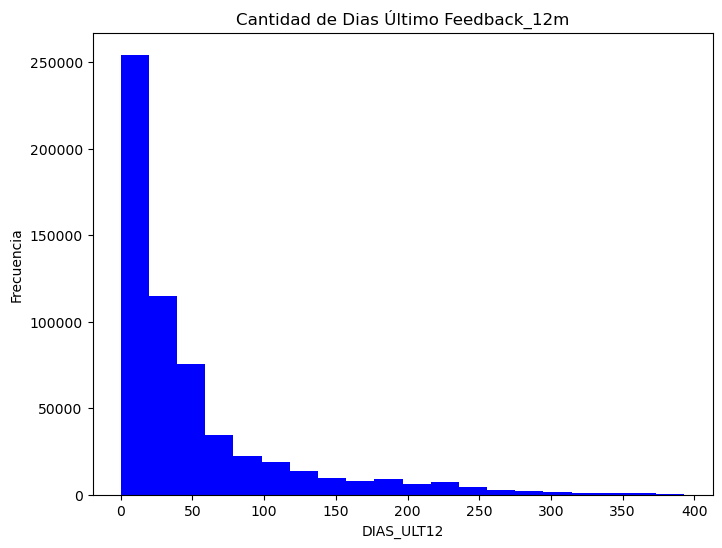

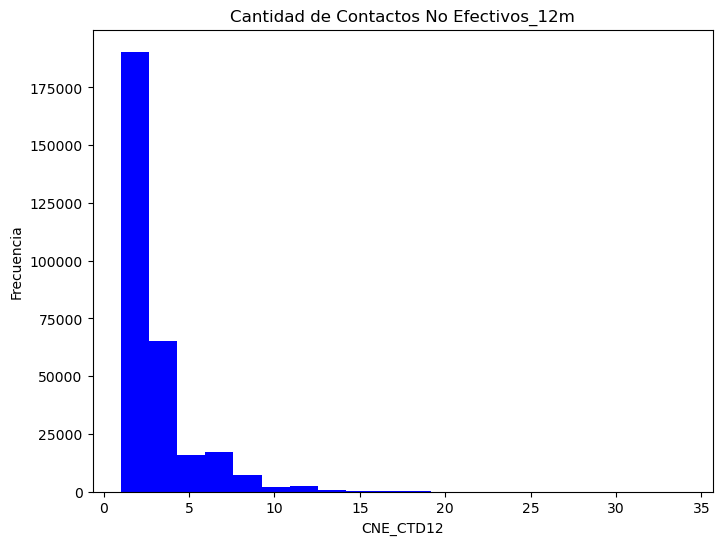

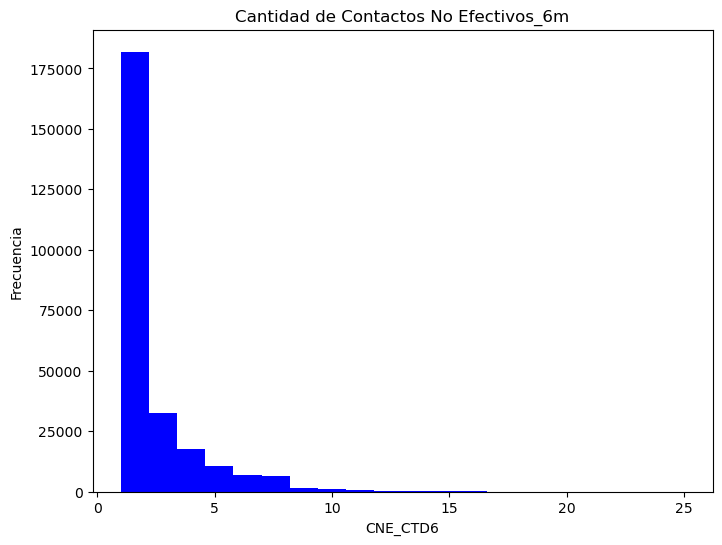

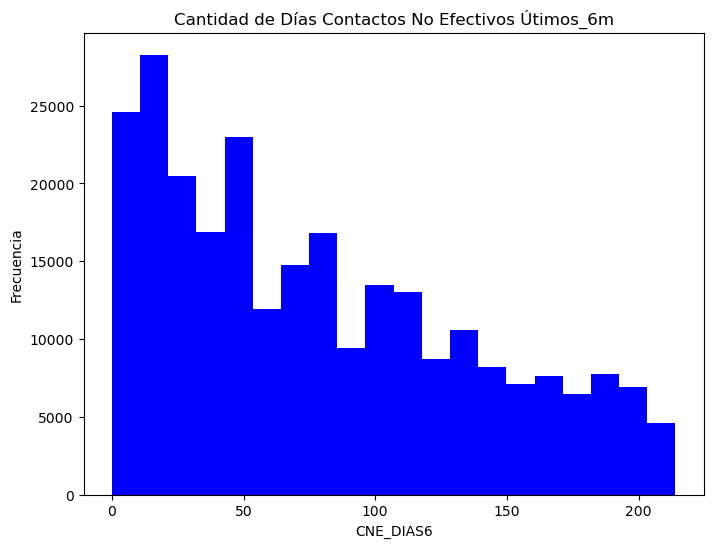

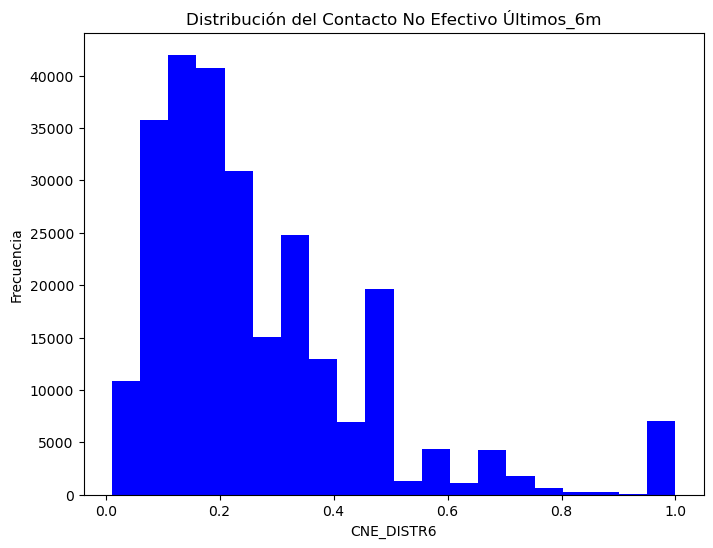

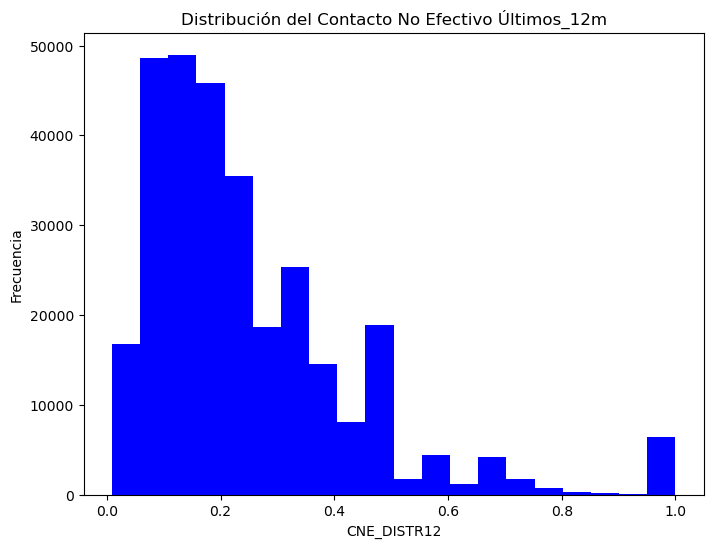

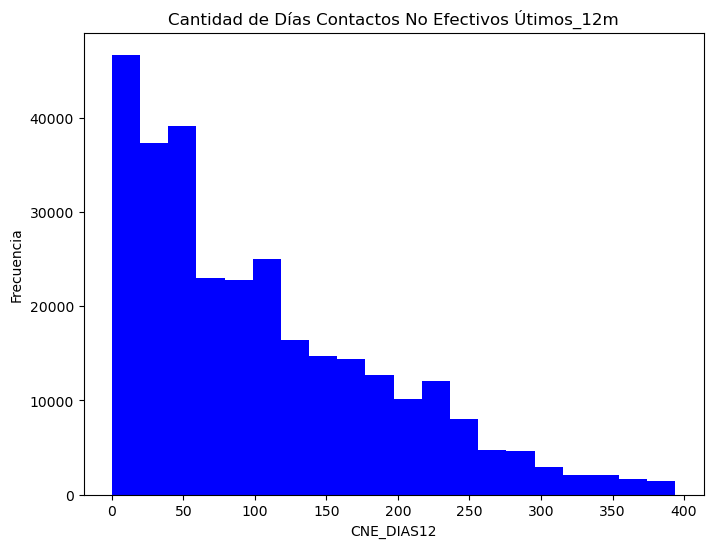

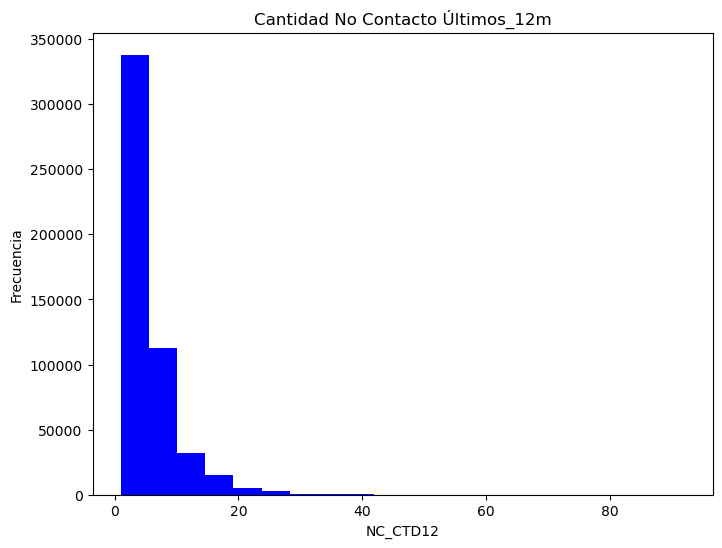

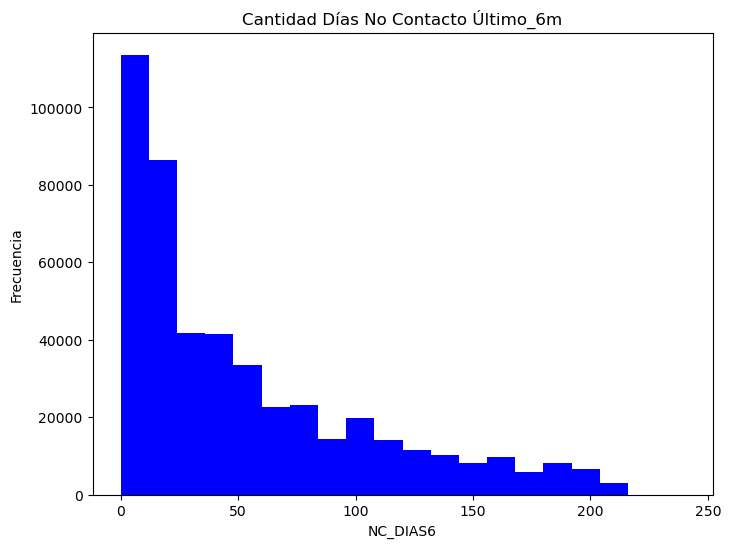

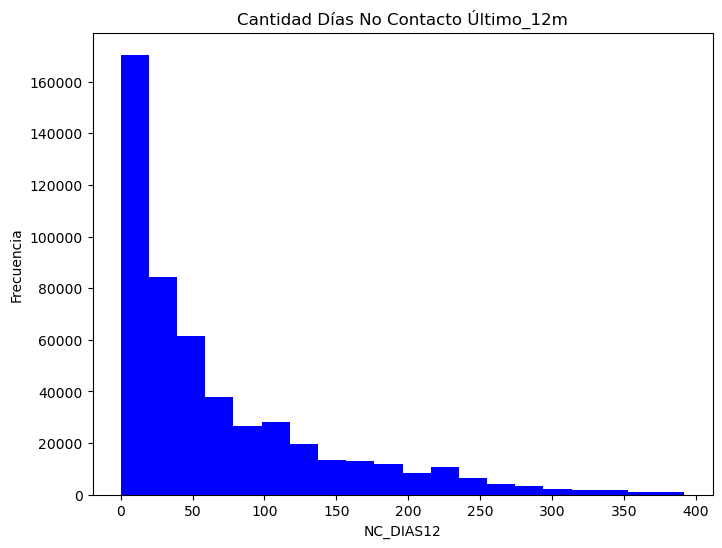

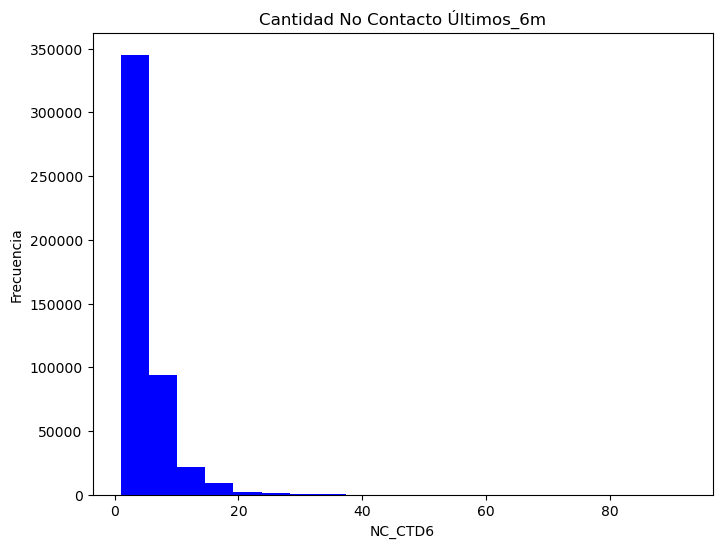

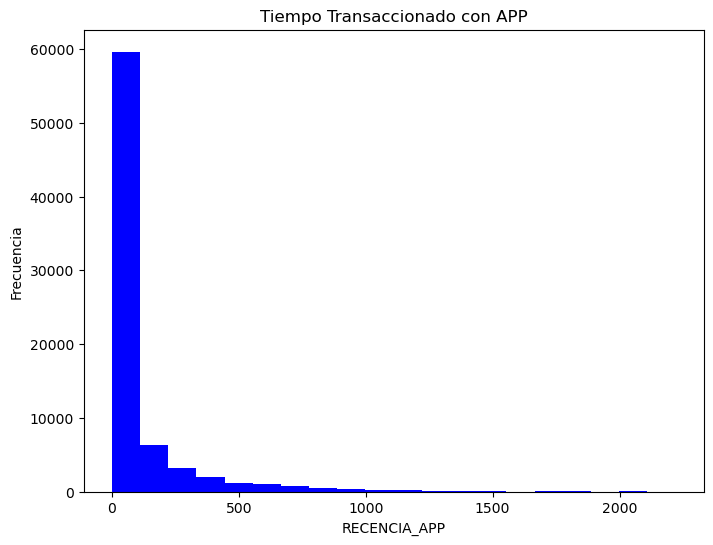

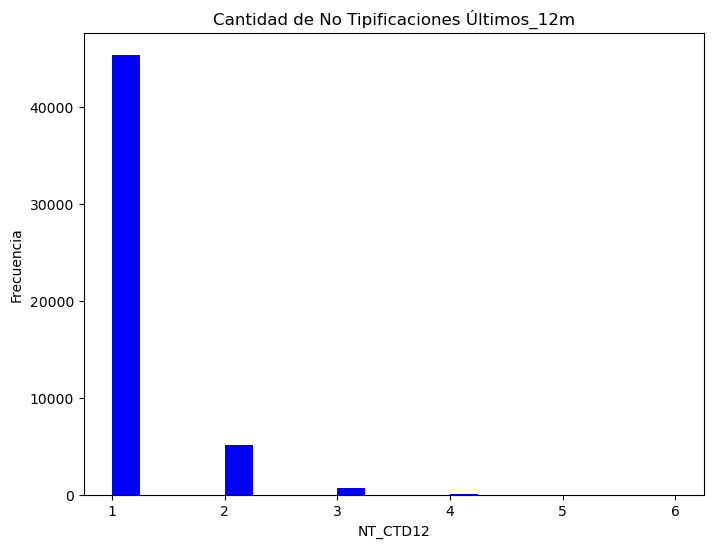

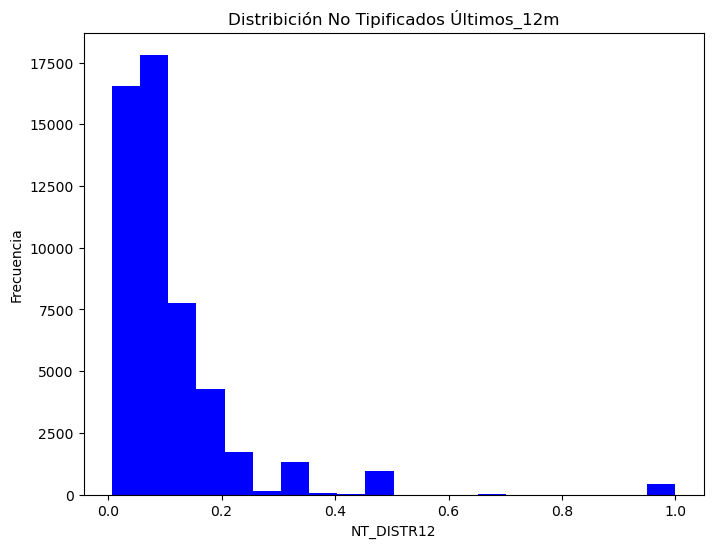

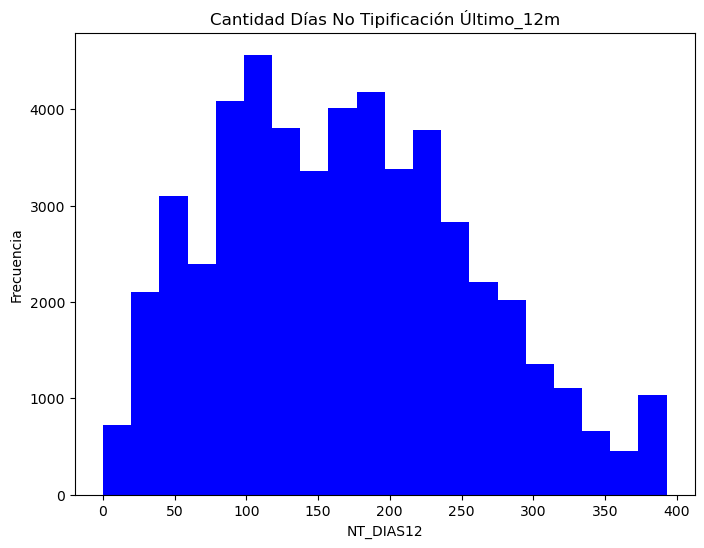

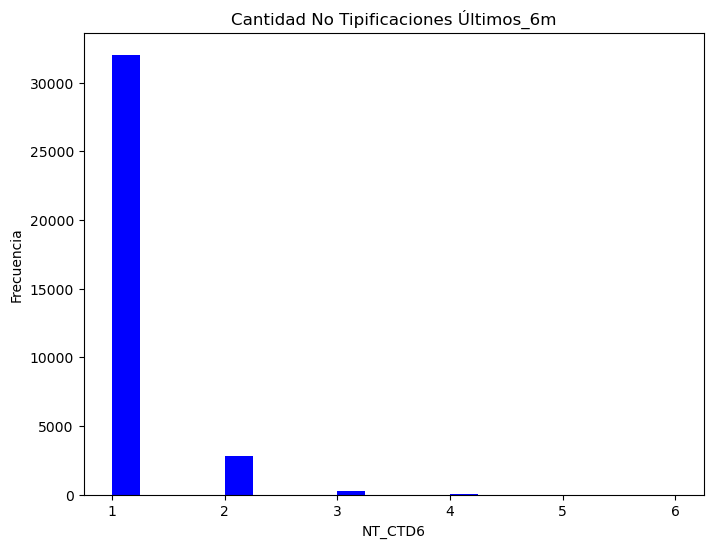

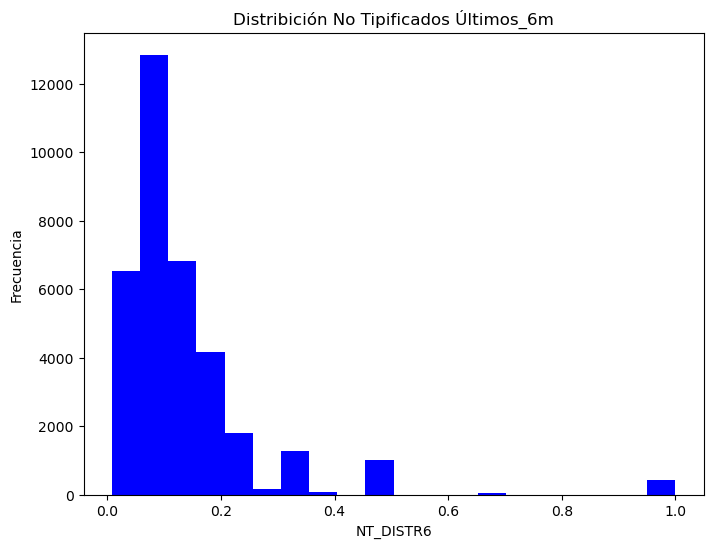

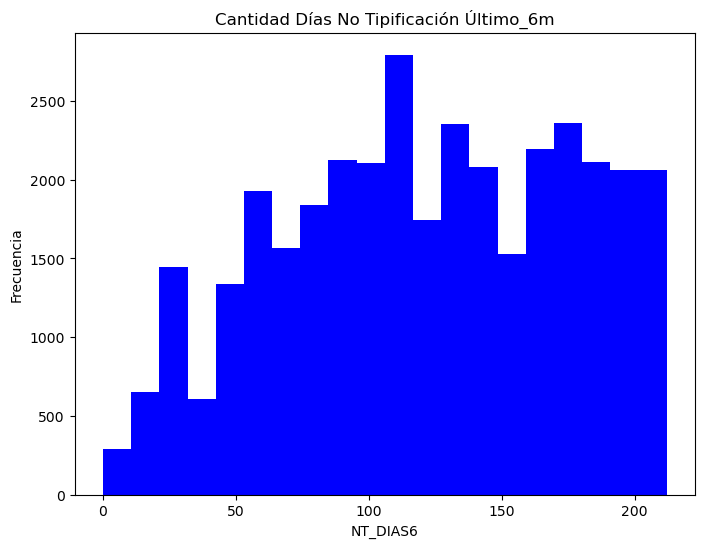

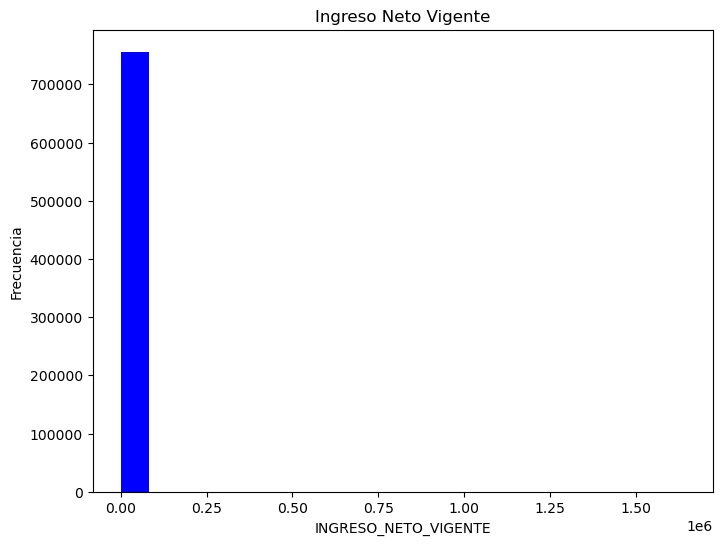

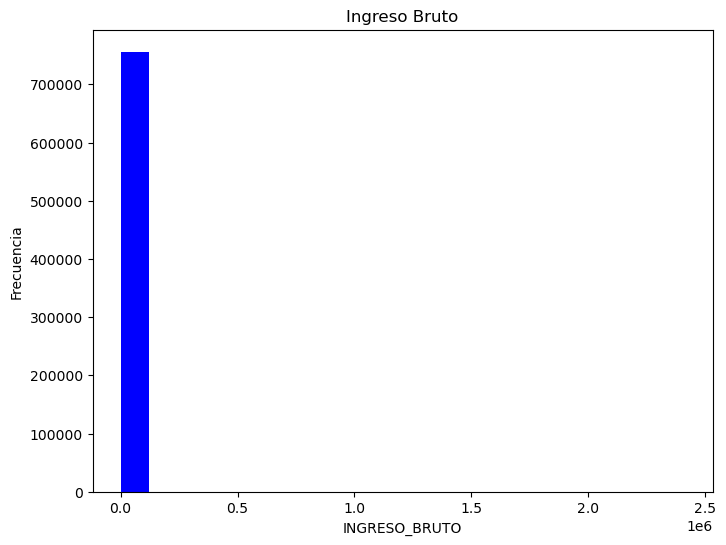

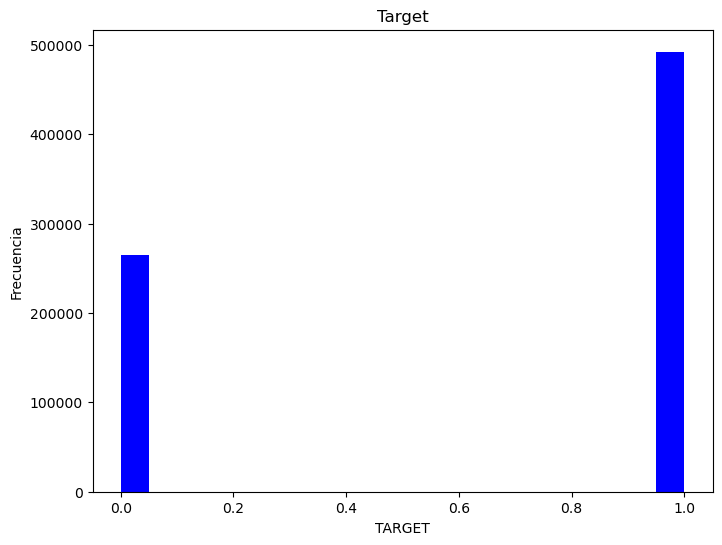

In [76]:
#Histogramas de variables numéricas predictoras y la variable objetivo "Target" inclusive para ver su distribución - DATA ENTRENAMIENTO - SIN IMPUTACIONES
import matplotlib.pyplot as plt
import pandas as pd

# Variables a graficar
variables = [
    "NUMPRIORIZACION", "NC_DISTR12", "TOTGEST6", "TOTGEST12", "IDGRUPO", 
    "DIAS_ACT", "DIAS_BEST6", "DIAS_ULT6", "DIAS_BEST12", "DIAS_ULT12",
    "CNE_CTD12", "CNE_CTD6", "CNE_DIAS6", "CNE_DISTR6", "CNE_DISTR12", 
    "CNE_DIAS12", "NC_CTD12", "NC_DIAS6", "NC_DIAS12", "NC_CTD6", "RECENCIA_APP",
    "NT_CTD12", "NT_DISTR12", "NT_DIAS12", "NT_CTD6", "NT_DISTR6", "NT_DIAS6",
    "INGRESO_NETO_VIGENTE", "INGRESO_BRUTO", "TARGET"
]

# Colores para los histogramas
colores = ["blue"] * len(variables)

# Títulos para los histogramas

titulos = [
    "Número de Priorización", "Distribución NO contacto_12m", "Total de Gestiones_6m", "Total de Gestiones_12m", "IDGrupo",
    "Cantidad de Dias Activo", "Cantidad de Dias Mejor Resultado_6m", "Cantidad de Dias Último Feedback_6m", "Cantidad de Dias Mejor Resultado_12m", "Cantidad de Dias Último Feedback_12m",
    "Cantidad de Contactos No Efectivos_12m", "Cantidad de Contactos No Efectivos_6m", "Cantidad de Días Contactos No Efectivos Útimos_6m", "Distribución del Contacto No Efectivo Últimos_6m", "Distribución del Contacto No Efectivo Últimos_12m",
    "Cantidad de Días Contactos No Efectivos Útimos_12m", "Cantidad No Contacto Últimos_12m", "Cantidad Días No Contacto Último_6m", "Cantidad Días No Contacto Último_12m", "Cantidad No Contacto Últimos_6m", "Tiempo Transaccionado con APP",
    "Cantidad de No Tipificaciones Últimos_12m", "Distribición No Tipificados Últimos_12m", "Cantidad Días No Tipificación Último_12m", "Cantidad No Tipificaciones Últimos_6m", "Distribición No Tipificados Últimos_6m", "Cantidad Días No Tipificación Último_6m",
    "Ingreso Neto Vigente", "Ingreso Bruto", "Target"
]
#print(len(variables))
#print(len(titulos))

#Configuración de tamaño de la gráfica 
#plt.figure(figsize=(20, 20))
#plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Espaciado entre subtramas

# Creando los histogramas en el diseño de subtramas
for i, var in enumerate(variables):
        plt.figure(figsize=(8, 6))
        plt.hist(dataMasterEntrenamiento[var], color=colores[i], bins=20)
        plt.title(titulos[i])
        plt.xlabel(var)
        plt.ylabel("Frecuencia")
        plt.show() #Mostrando los histogramas

#Interpretación
#ejemplos
#La variable número de priorización, tiene un sesgo a la derecha con una moda de 1 en las categorías priorizadas y con más de 400000 mil veces que se utilizó el canal "x" al cual lo priorizaron como 1.
#La variable distribución NO contacto en 12 meses, tiene una distribución parecida a la normal con una moda de 1.0 en las categorías priorizadas y con más de 80000 mil veces que alcanzó su distribución en 1.
#La variable total de gestiones en 6 meses, tiene un sesgo a la derecha con una moda de 1 en las gestiones dentro de los 6 meses y con más de 400000 mil veces que se realizó este número de gestiones.
#La variable total de gestiones en 12 meses, tiene un sesgo a la derecha con una moda de 1 en las gestiones dentro de los 12 meses y con más de 350000 mil veces que se realizó este número de gestiones.


In [77]:
variables_numericas = df_dataEntrenamientoOk.select_dtypes(include=[float, int])
variables_numericas.columns

Index(['NC_DISTR12', 'TOTGEST6', 'TOTGEST12', 'IDGRUPO', 'DIAS_ACT',
       'DIAS_BEST6', 'DIAS_ULT6', 'DIAS_BEST12', 'DIAS_ULT12', 'CNE_CTD12',
       'CNE_CTD6', 'CNE_DIAS6', 'CNE_DISTR6', 'CNE_DISTR12', 'CNE_DIAS12',
       'NC_CTD12', 'NC_DIAS6', 'NC_DIAS12', 'NC_CTD6', 'RECENCIA_APP',
       'INGRESO_NETO_VIGENTE', 'INGRESO_BRUTO', 'TARGET'],
      dtype='object')

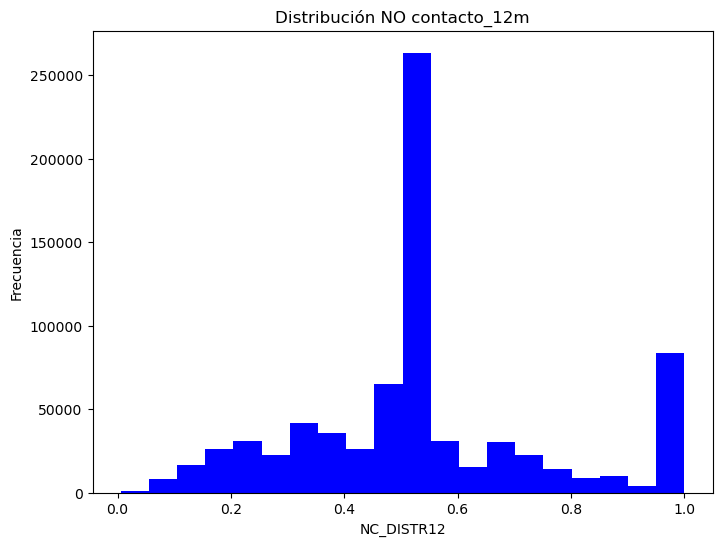

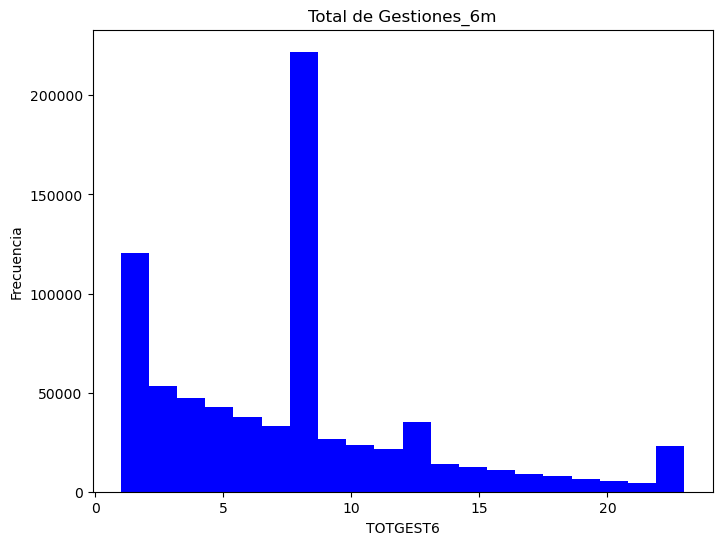

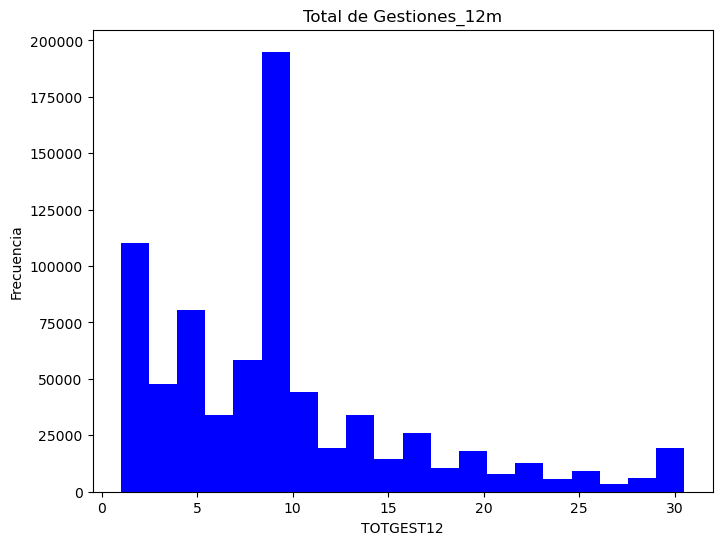

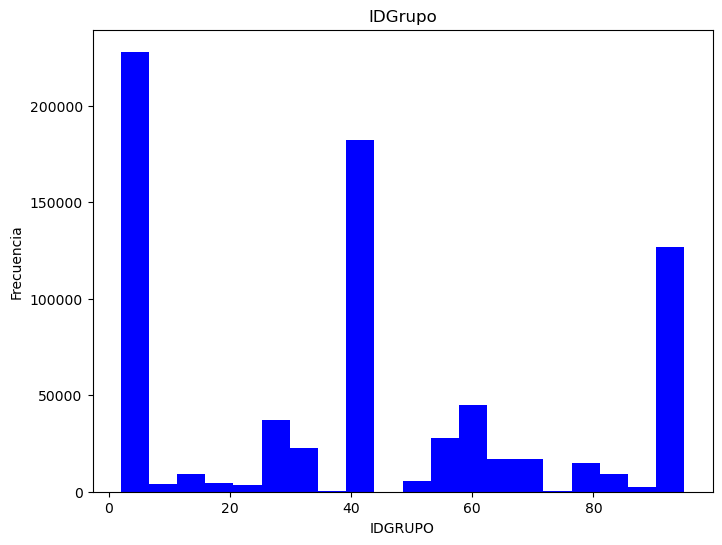

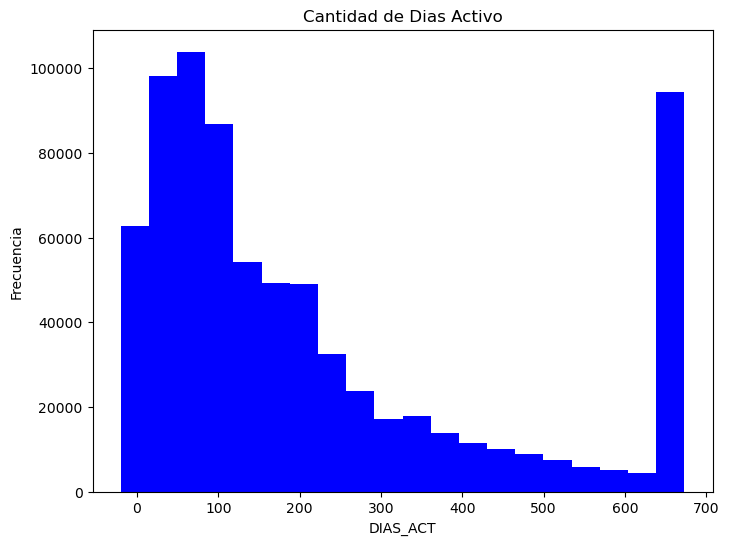

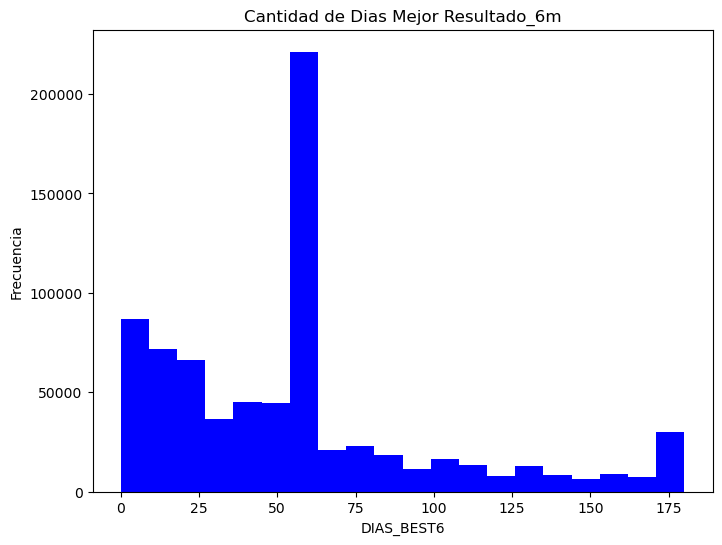

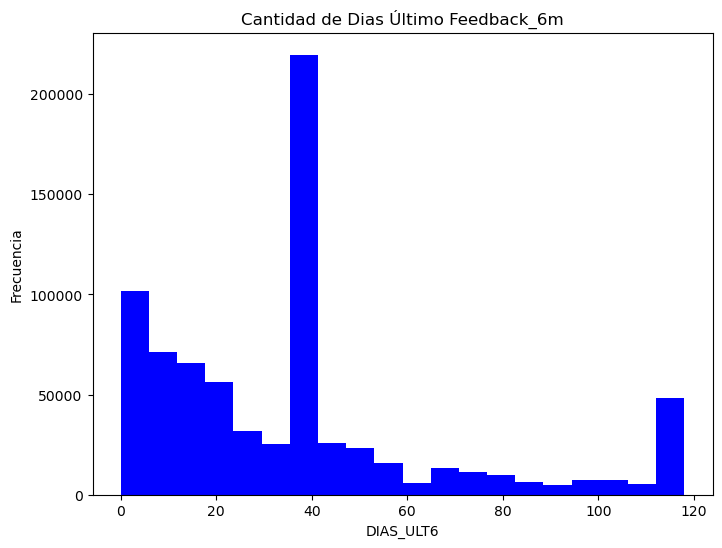

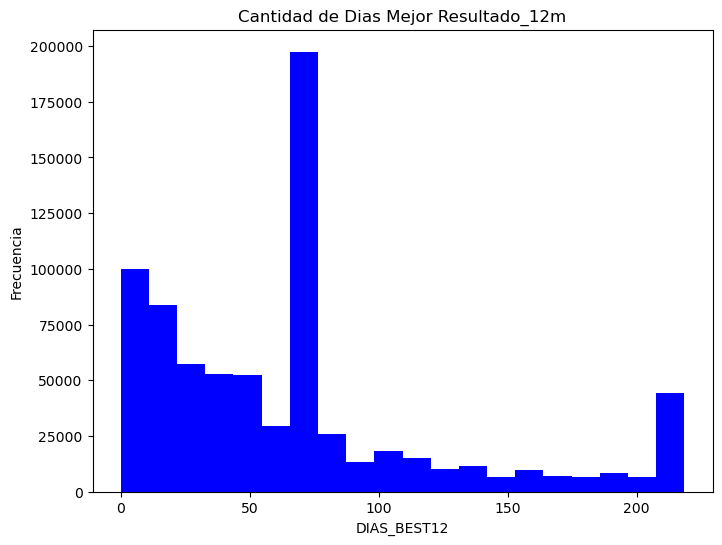

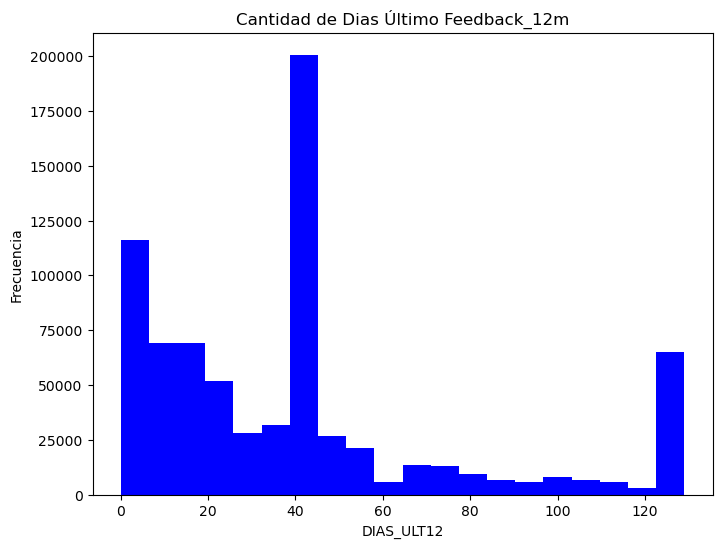

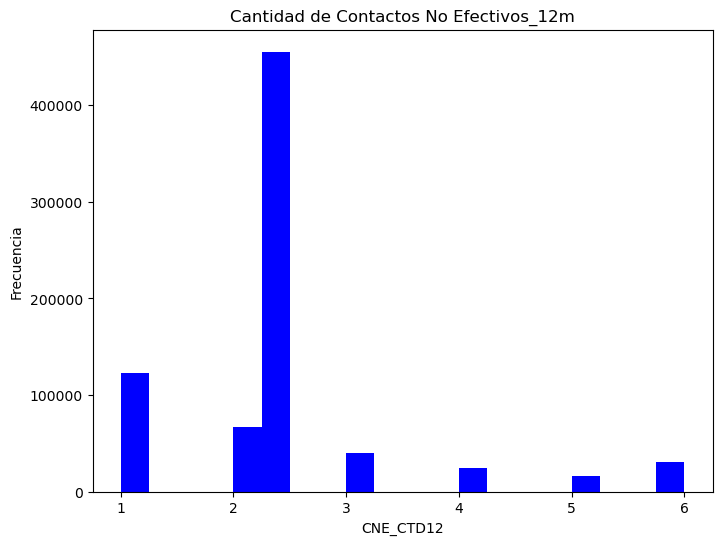

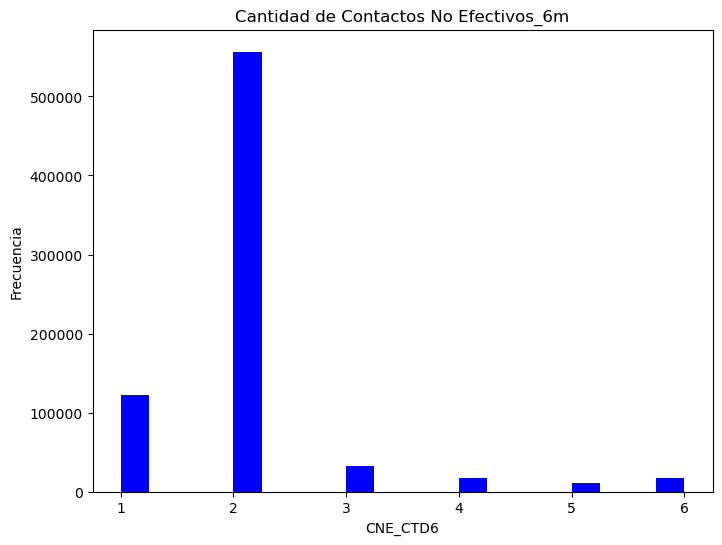

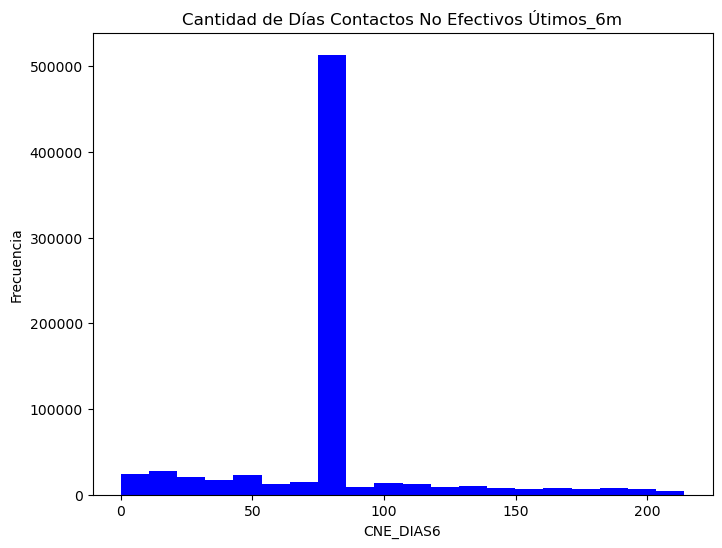

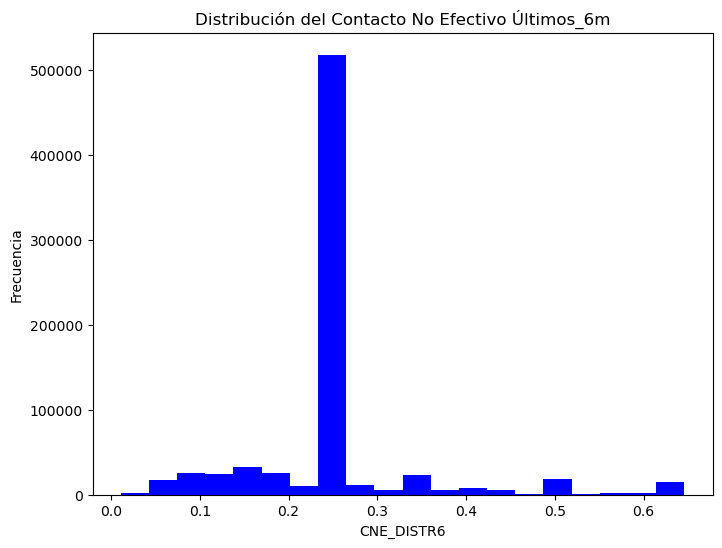

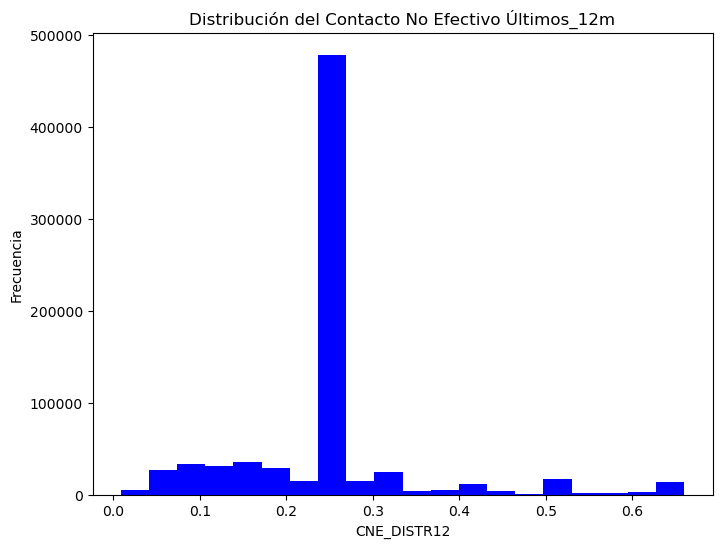

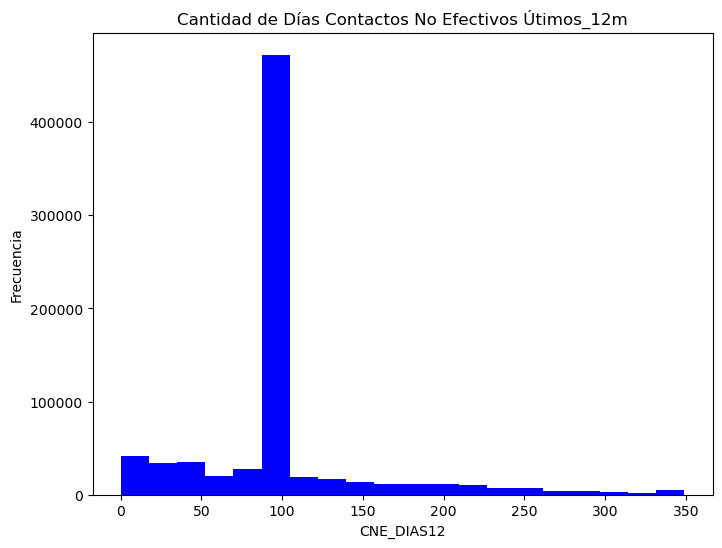

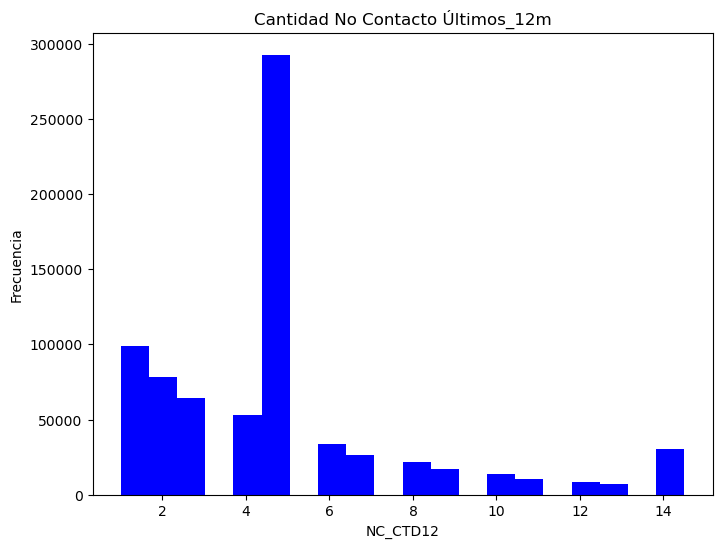

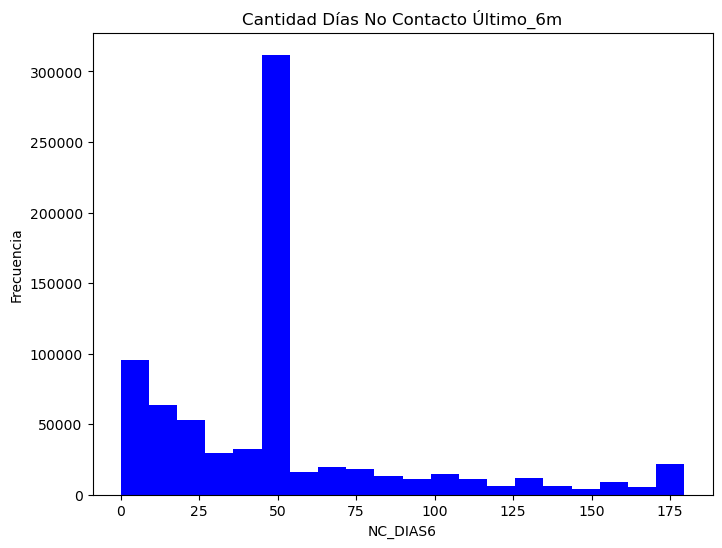

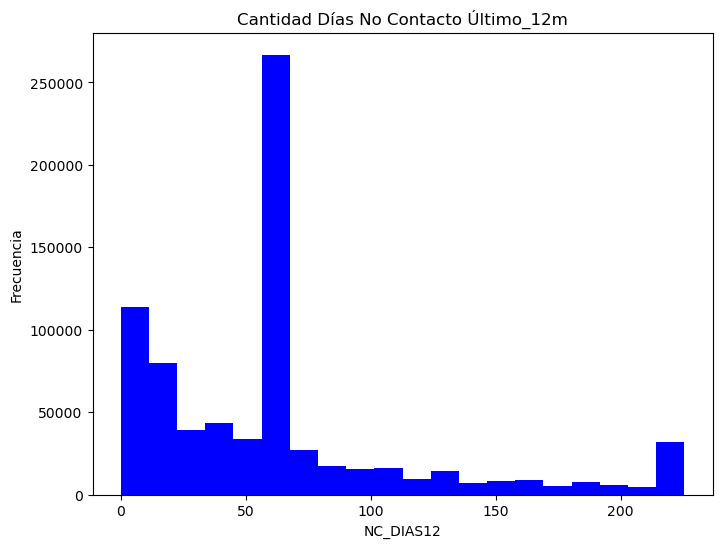

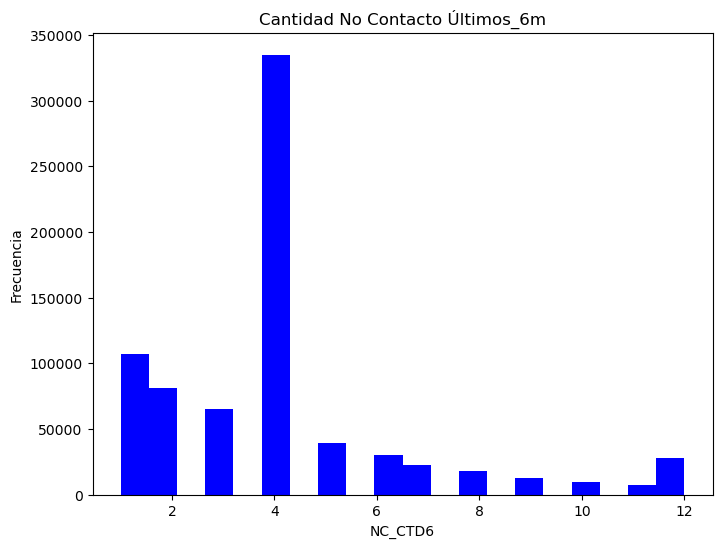

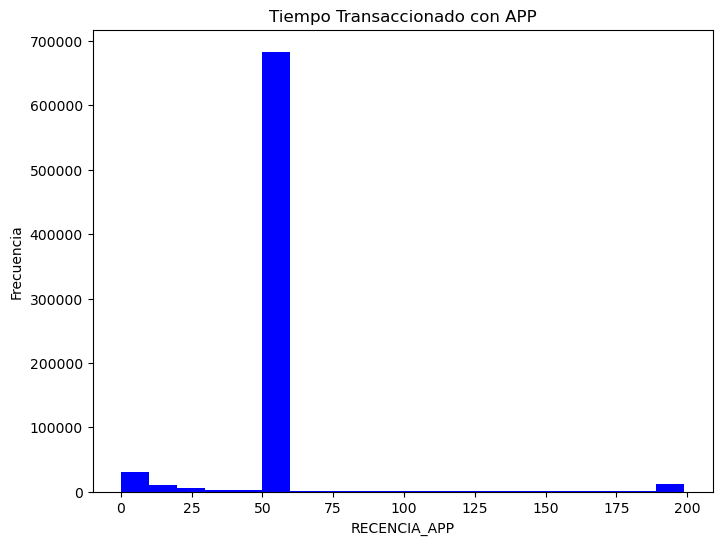

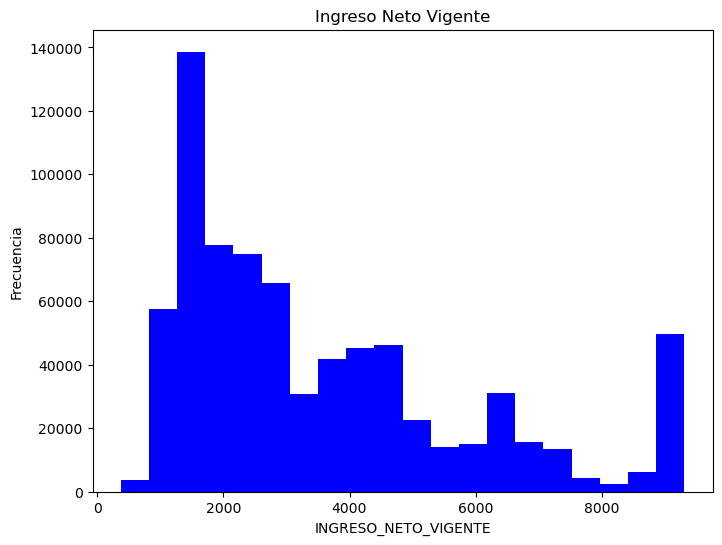

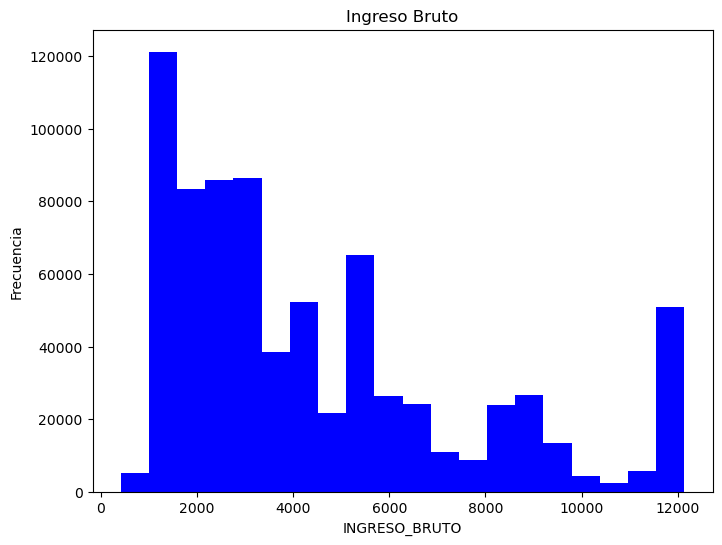

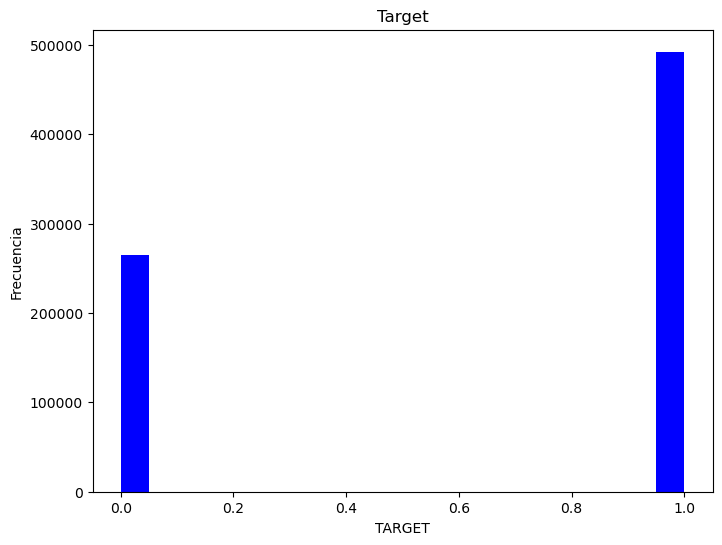

In [368]:
#Histogramas de variables numéricas predictoras y la variable objetivo "Target" inclusive para ver su distribución - DATA ENTRENAMIENTO - CON IMPUTACIONES
#import matplotlib.pyplot as plt
#import pandas as pd

# Variables a graficar
variables = [
    "NC_DISTR12", "TOTGEST6", "TOTGEST12", "IDGRUPO", 
    "DIAS_ACT", "DIAS_BEST6", "DIAS_ULT6", "DIAS_BEST12", "DIAS_ULT12",
    "CNE_CTD12", "CNE_CTD6", "CNE_DIAS6", "CNE_DISTR6", "CNE_DISTR12", 
    "CNE_DIAS12", "NC_CTD12", "NC_DIAS6", "NC_DIAS12", "NC_CTD6", "RECENCIA_APP",
    "INGRESO_NETO_VIGENTE", "INGRESO_BRUTO", "TARGET"
]

# Colores para los histogramas
colores = ["blue"] * len(variables)

# Títulos para los histogramas

titulos = [
    "Distribución NO contacto_12m", "Total de Gestiones_6m", "Total de Gestiones_12m", "IDGrupo",
    "Cantidad de Dias Activo", "Cantidad de Dias Mejor Resultado_6m", "Cantidad de Dias Último Feedback_6m", "Cantidad de Dias Mejor Resultado_12m", "Cantidad de Dias Último Feedback_12m",
    "Cantidad de Contactos No Efectivos_12m", "Cantidad de Contactos No Efectivos_6m", "Cantidad de Días Contactos No Efectivos Útimos_6m", "Distribución del Contacto No Efectivo Últimos_6m", "Distribución del Contacto No Efectivo Últimos_12m",
    "Cantidad de Días Contactos No Efectivos Útimos_12m", "Cantidad No Contacto Últimos_12m", "Cantidad Días No Contacto Último_6m", "Cantidad Días No Contacto Último_12m", "Cantidad No Contacto Últimos_6m", "Tiempo Transaccionado con APP",
    "Ingreso Neto Vigente", "Ingreso Bruto", "Target"
]
#print(len(variables))
#print(len(titulos))

#Configuración de tamaño de la gráfica 
#plt.figure(figsize=(20, 20))
#plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Espaciado entre subtramas

# Creando los histogramas en el diseño de subtramas
for i, var in enumerate(variables):
        plt.figure(figsize=(8, 6))
        plt.hist(df_dataEntrenamientoOk[var], color=colores[i], bins=20)
        plt.title(titulos[i])
        plt.xlabel(var)
        plt.ylabel("Frecuencia")
        plt.show() #Mostrando los histogramas


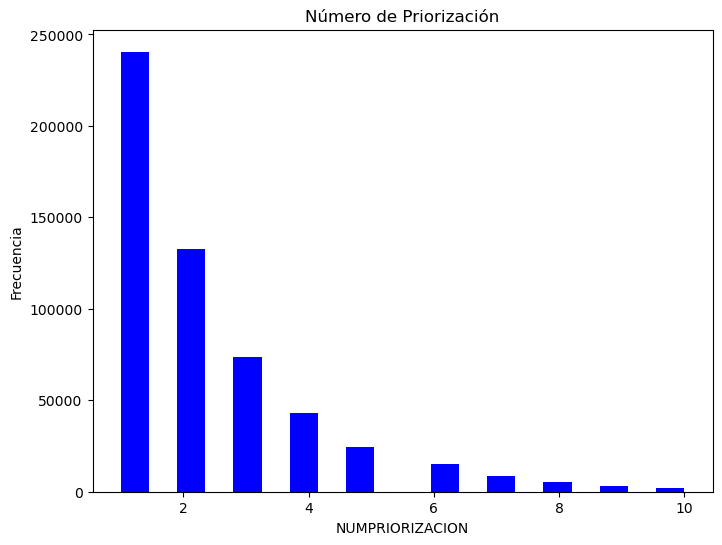

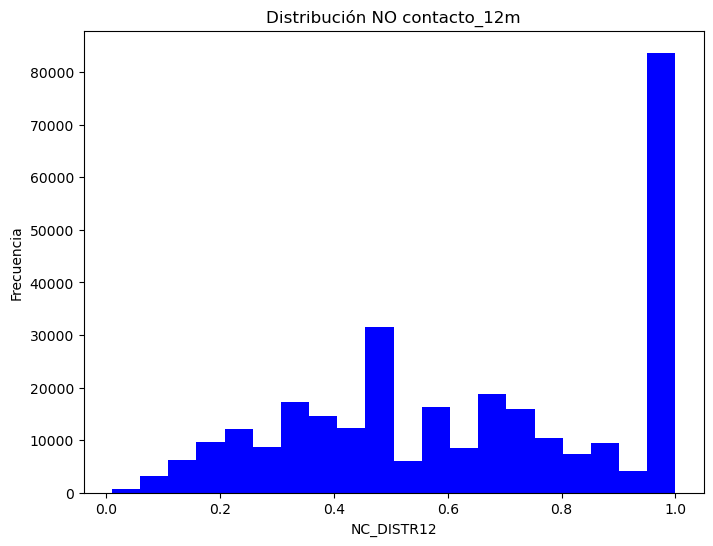

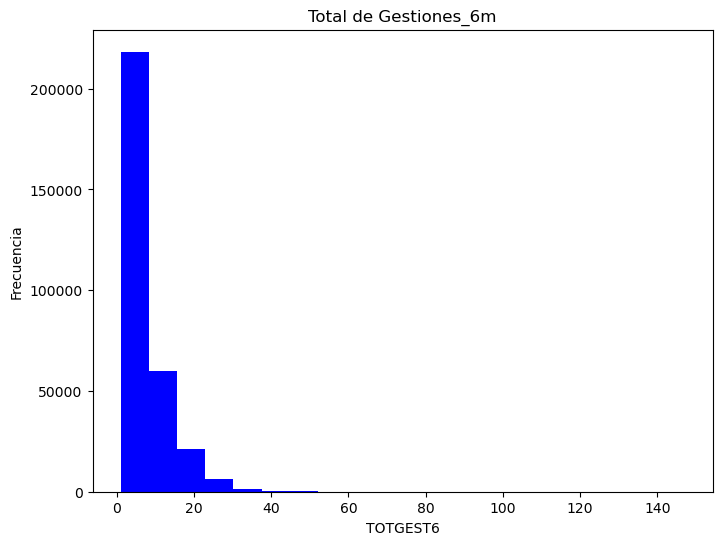

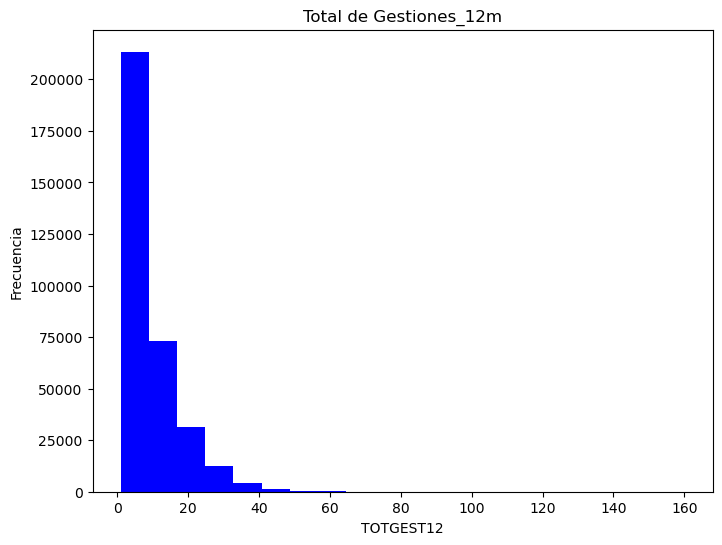

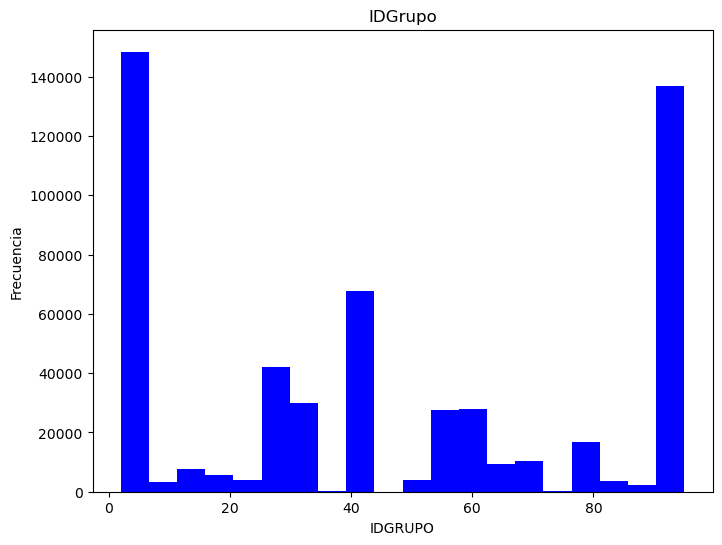

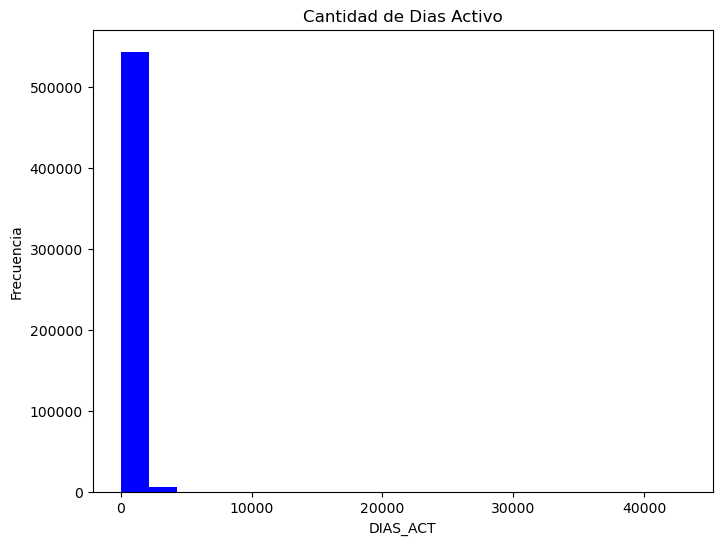

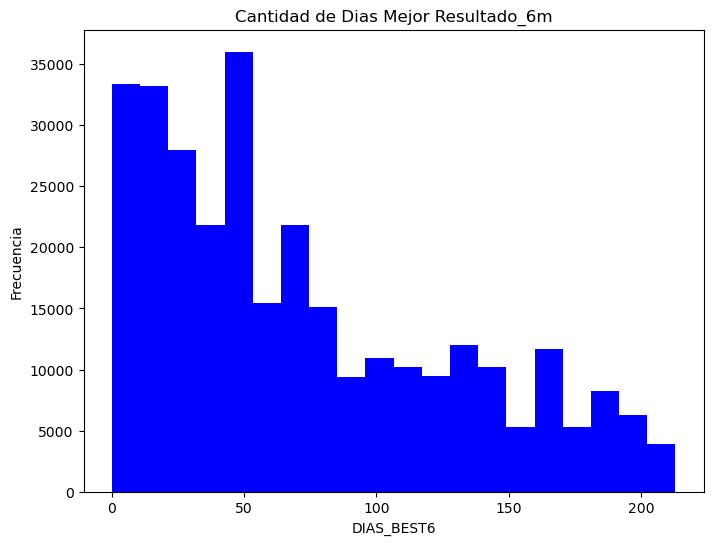

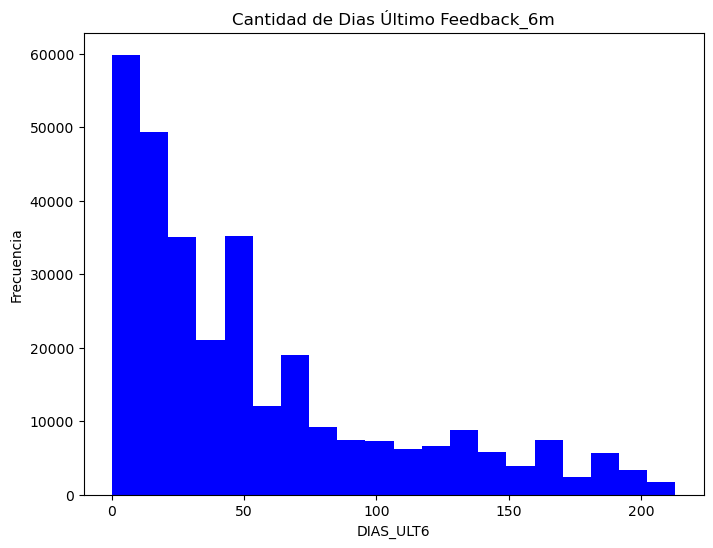

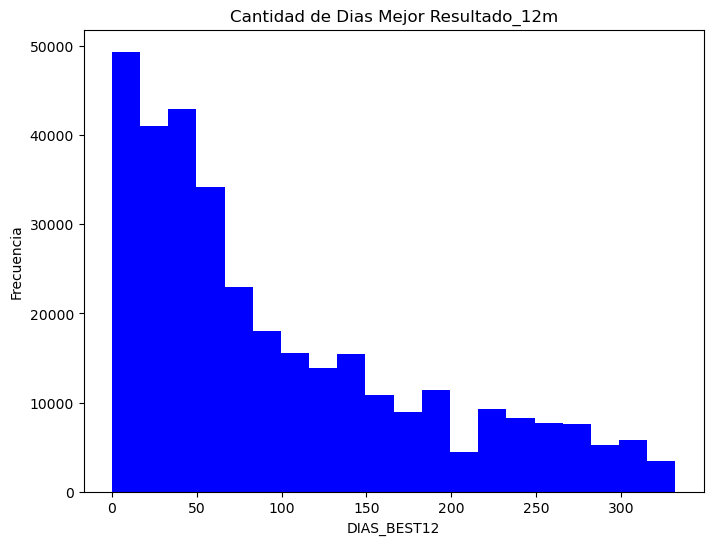

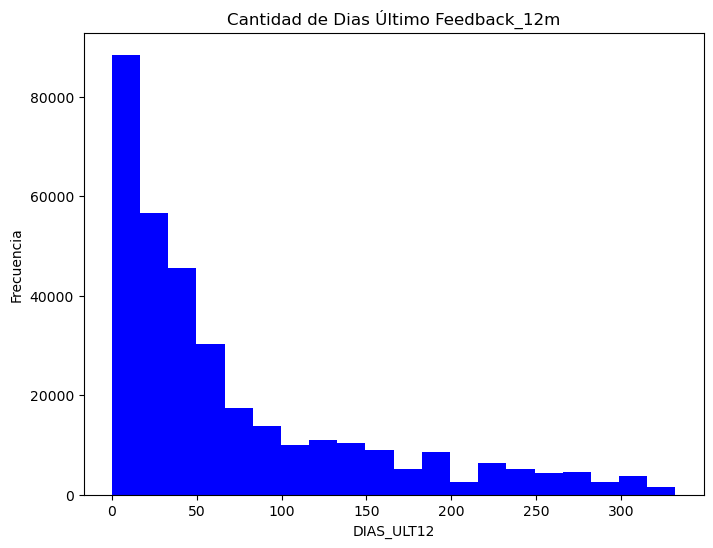

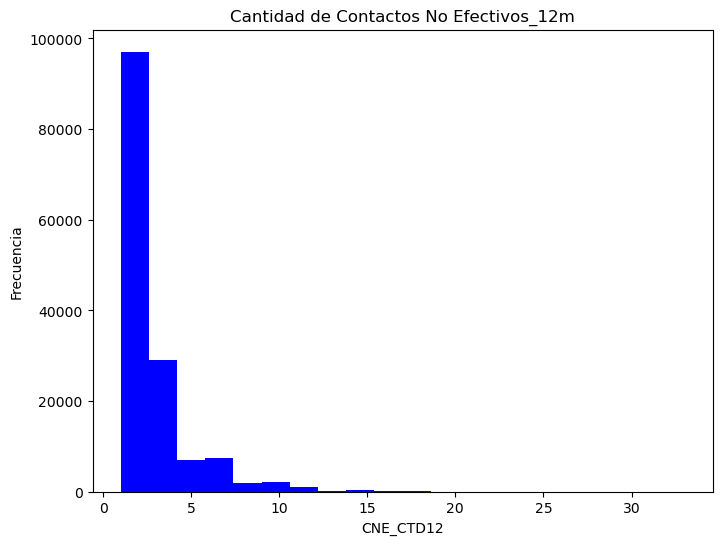

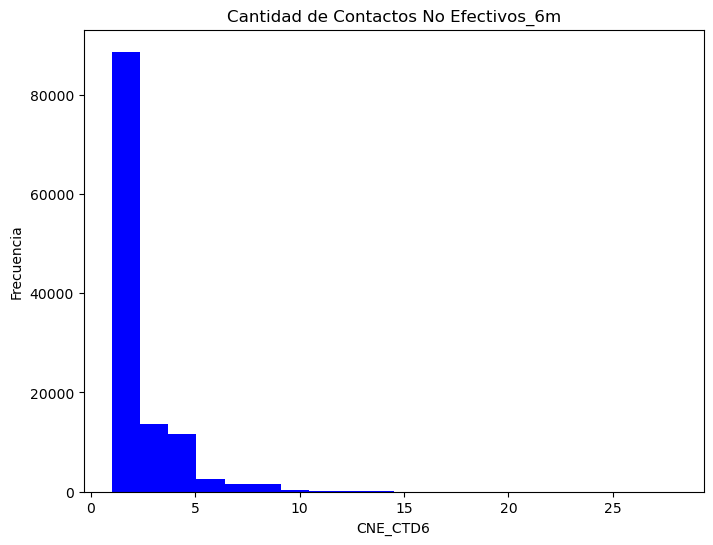

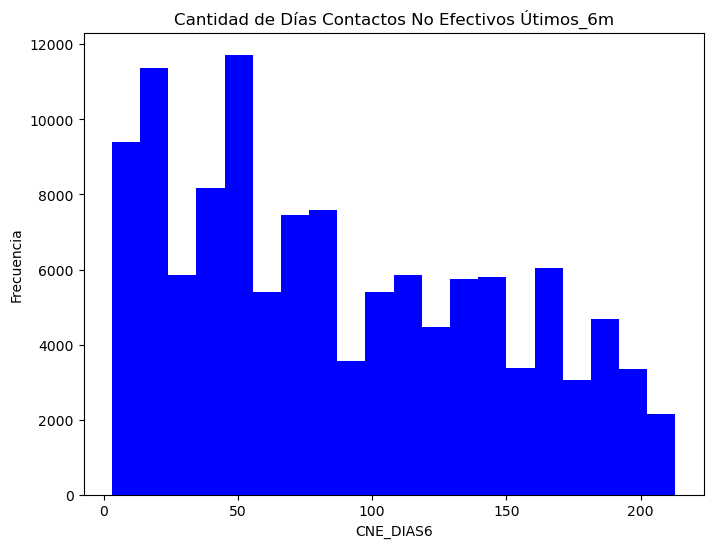

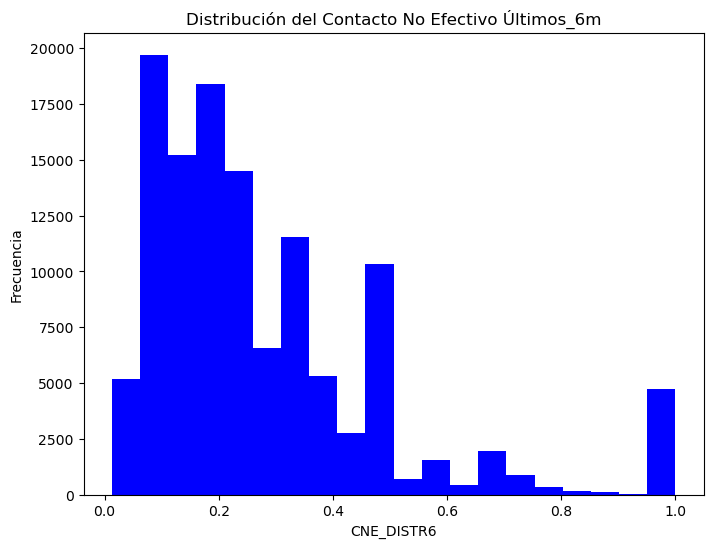

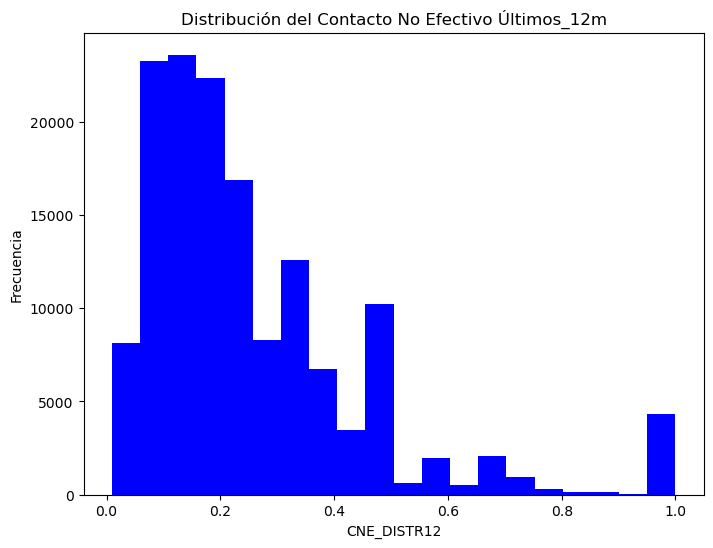

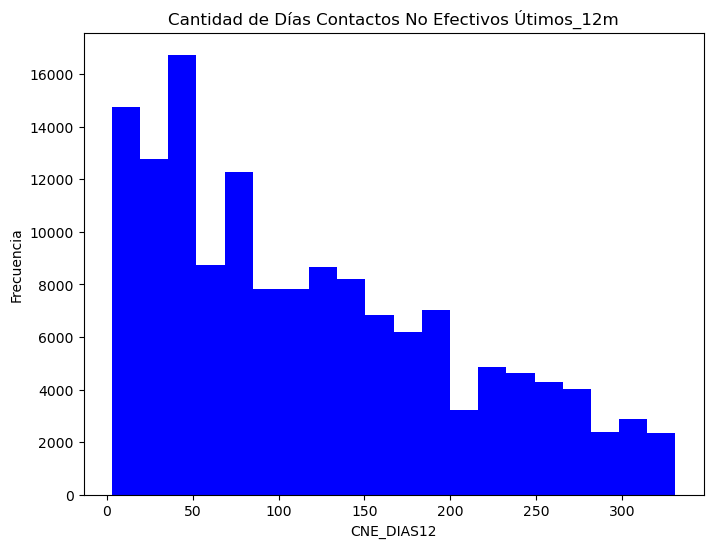

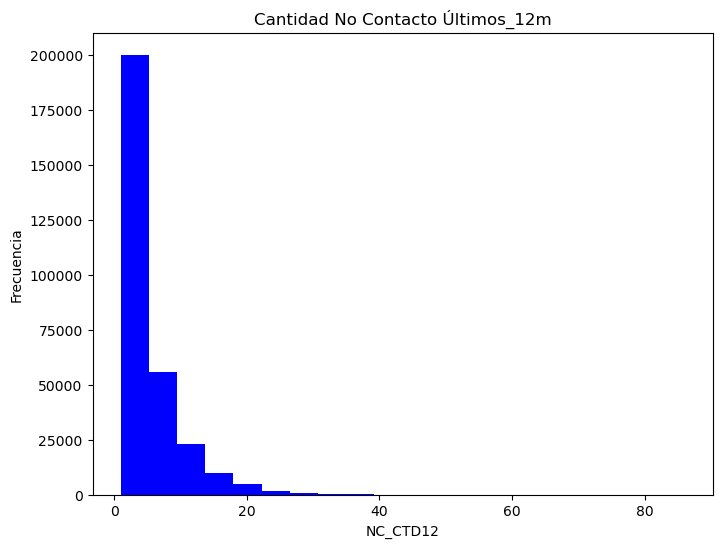

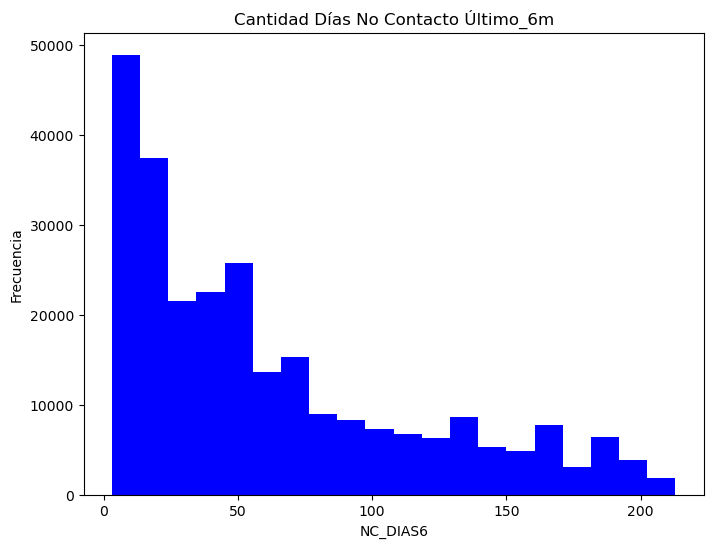

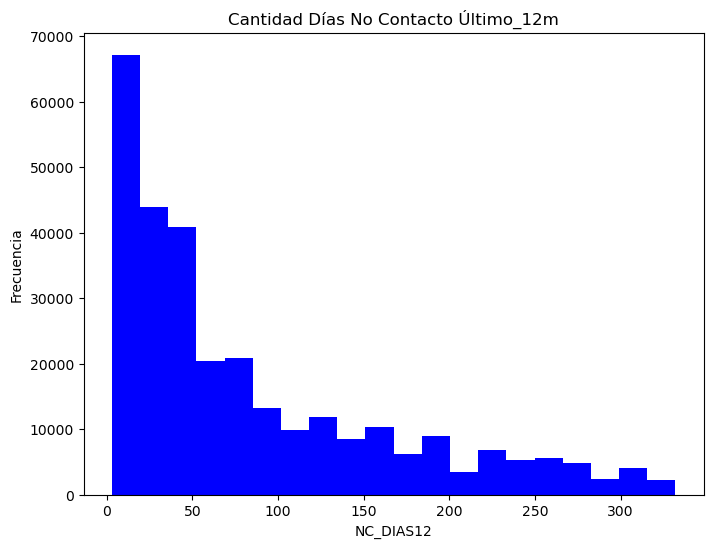

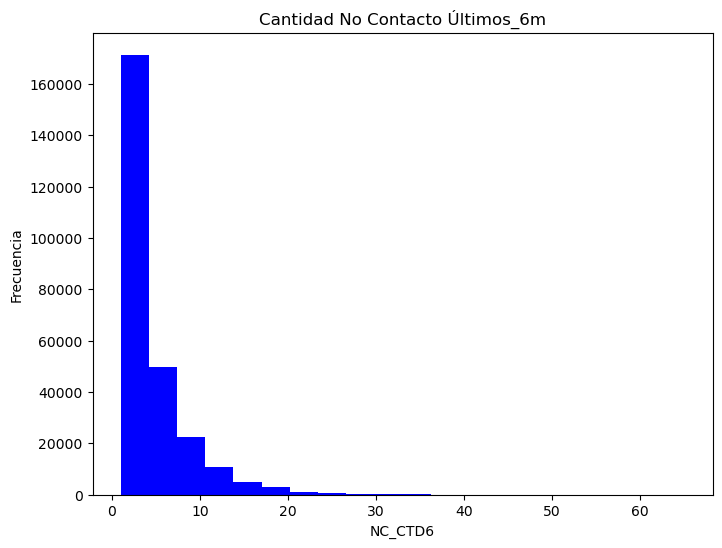

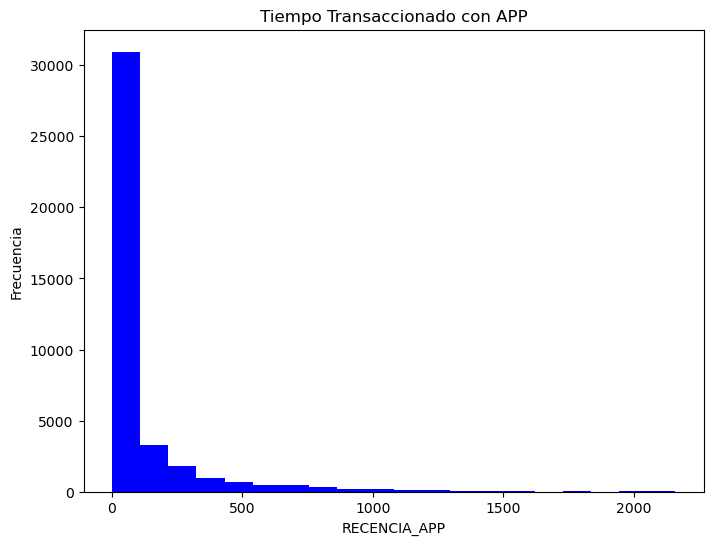

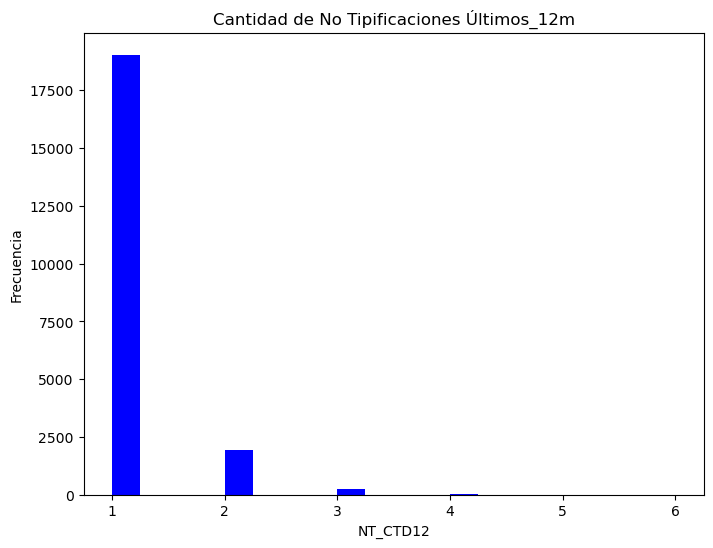

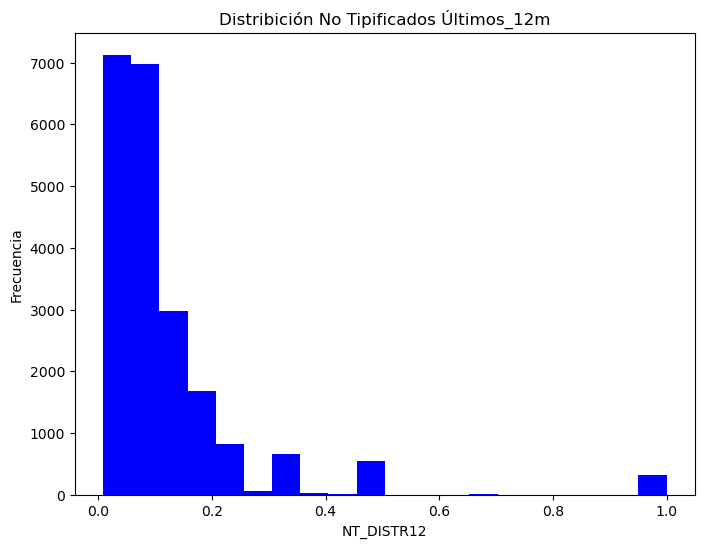

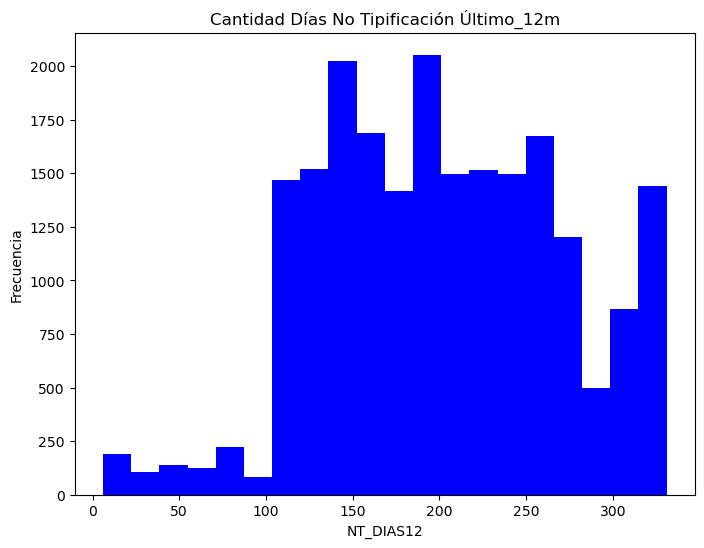

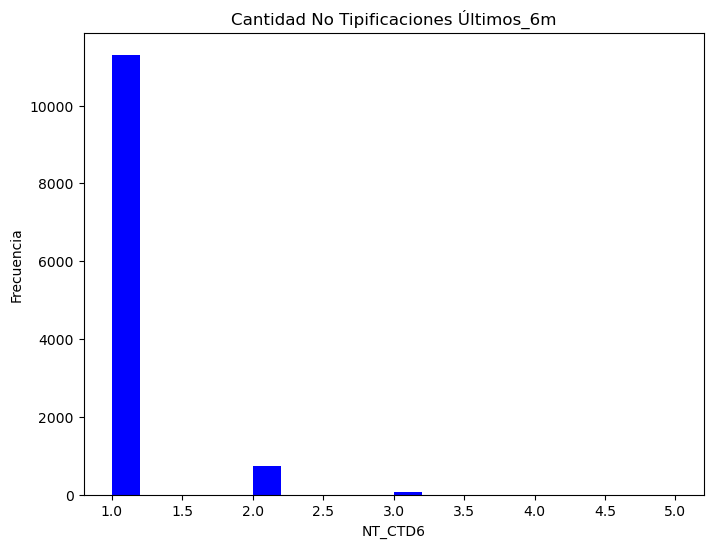

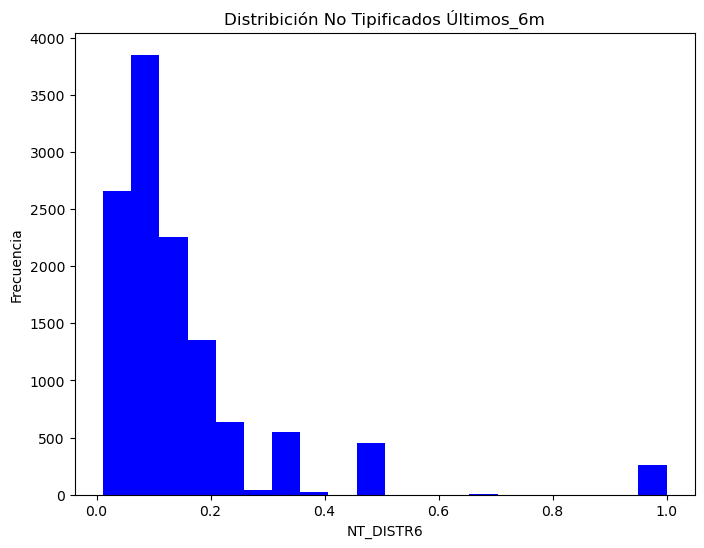

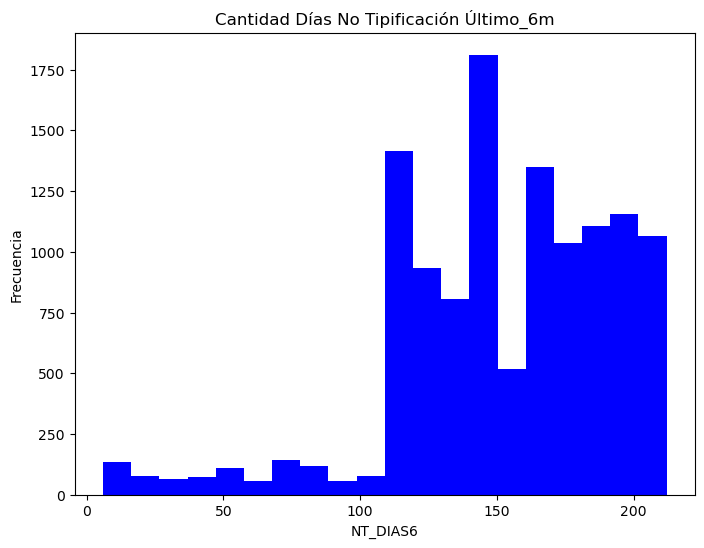

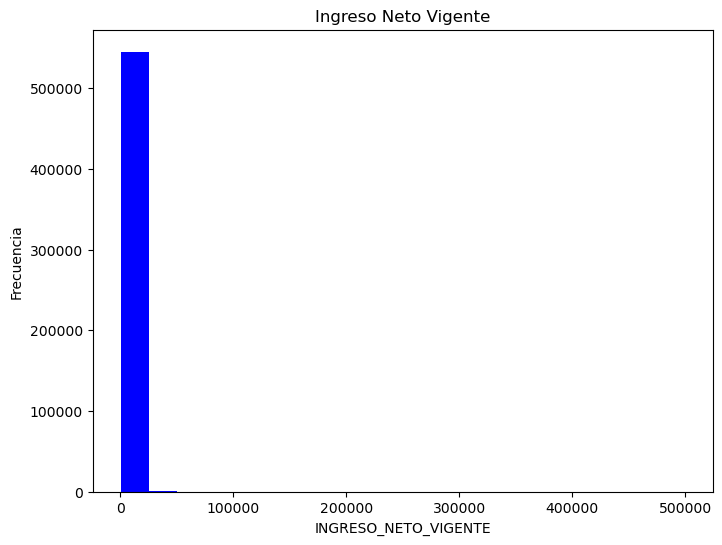

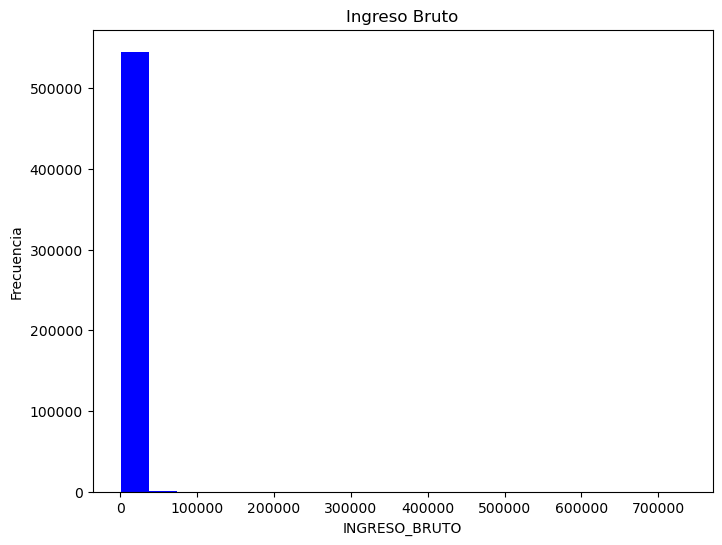

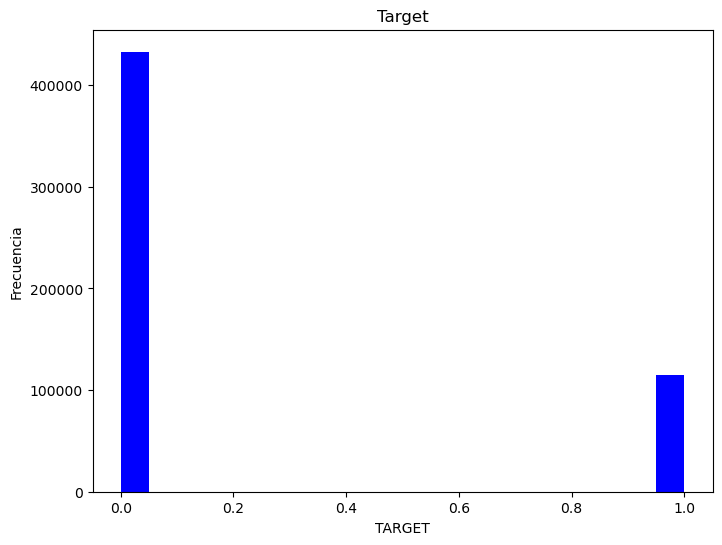

In [78]:
#Histogramas de variables numéricas predictoras y la variable objetivo "Target" inclusive para ver su distribución - DATA PRUEBA - SIN IMPUTACIONES
#import matplotlib.pyplot as plt
#import pandas as pd

# Variables a graficar
variables = [
    "NUMPRIORIZACION", "NC_DISTR12", "TOTGEST6", "TOTGEST12", "IDGRUPO", 
    "DIAS_ACT", "DIAS_BEST6", "DIAS_ULT6", "DIAS_BEST12", "DIAS_ULT12",
    "CNE_CTD12", "CNE_CTD6", "CNE_DIAS6", "CNE_DISTR6", "CNE_DISTR12", 
    "CNE_DIAS12", "NC_CTD12", "NC_DIAS6", "NC_DIAS12", "NC_CTD6", "RECENCIA_APP",
    "NT_CTD12", "NT_DISTR12", "NT_DIAS12", "NT_CTD6", "NT_DISTR6", "NT_DIAS6",
    "INGRESO_NETO_VIGENTE", "INGRESO_BRUTO", "TARGET"
]

# Colores para los histogramas
colores = ["blue"] * len(variables)

# Títulos para los histogramas

titulos = [
    "Número de Priorización", "Distribución NO contacto_12m", "Total de Gestiones_6m", "Total de Gestiones_12m", "IDGrupo",
    "Cantidad de Dias Activo", "Cantidad de Dias Mejor Resultado_6m", "Cantidad de Dias Último Feedback_6m", "Cantidad de Dias Mejor Resultado_12m", "Cantidad de Dias Último Feedback_12m",
    "Cantidad de Contactos No Efectivos_12m", "Cantidad de Contactos No Efectivos_6m", "Cantidad de Días Contactos No Efectivos Útimos_6m", "Distribución del Contacto No Efectivo Últimos_6m", "Distribución del Contacto No Efectivo Últimos_12m",
    "Cantidad de Días Contactos No Efectivos Útimos_12m", "Cantidad No Contacto Últimos_12m", "Cantidad Días No Contacto Último_6m", "Cantidad Días No Contacto Último_12m", "Cantidad No Contacto Últimos_6m", "Tiempo Transaccionado con APP",
    "Cantidad de No Tipificaciones Últimos_12m", "Distribición No Tipificados Últimos_12m", "Cantidad Días No Tipificación Último_12m", "Cantidad No Tipificaciones Últimos_6m", "Distribición No Tipificados Últimos_6m", "Cantidad Días No Tipificación Último_6m",
    "Ingreso Neto Vigente", "Ingreso Bruto", "Target"
]
#print(len(variables))
#print(len(titulos))

#Configuración de tamaño de la gráfica 
#plt.figure(figsize=(20, 20))
#plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Espaciado entre subtramas

# Creando los histogramas en el diseño de subtramas
for i, var in enumerate(variables):
        plt.figure(figsize=(8, 6))
        plt.hist(dataMasterPrueba[var], color=colores[i], bins=20)
        plt.title(titulos[i])
        plt.xlabel(var)
        plt.ylabel("Frecuencia")
        plt.show() #Mostrando los histogramas


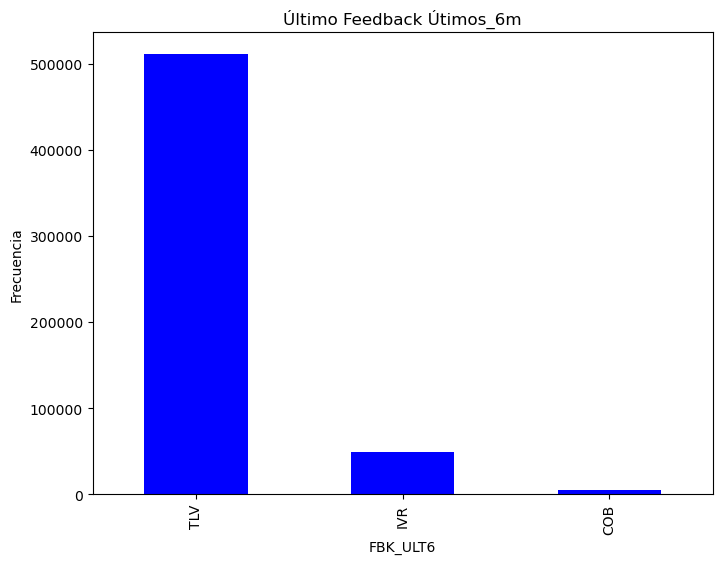

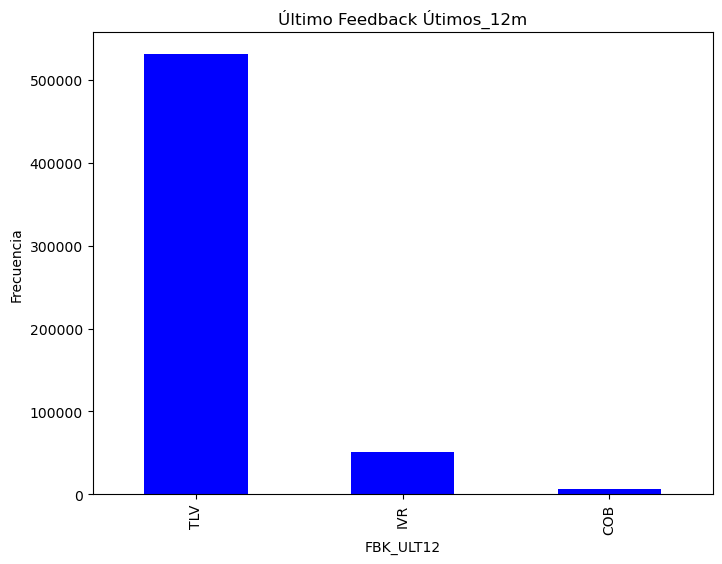

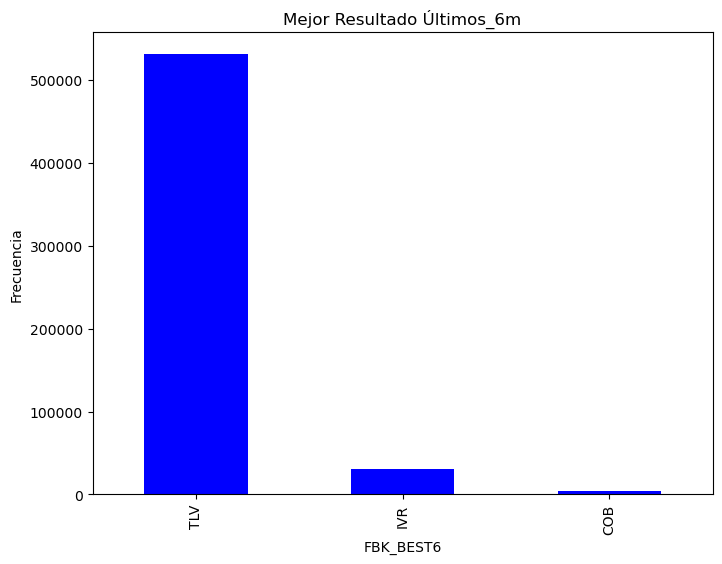

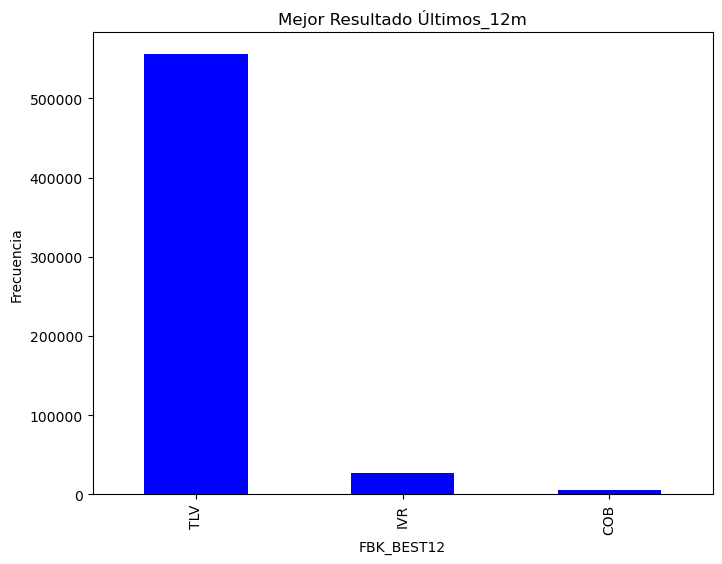

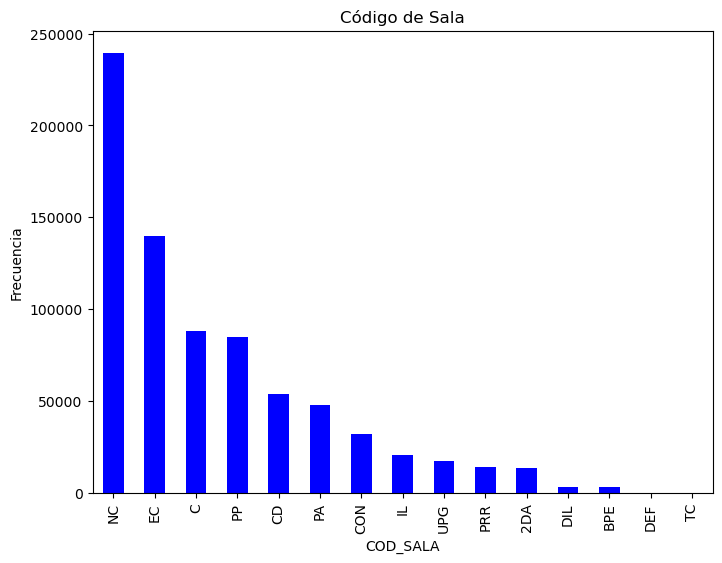

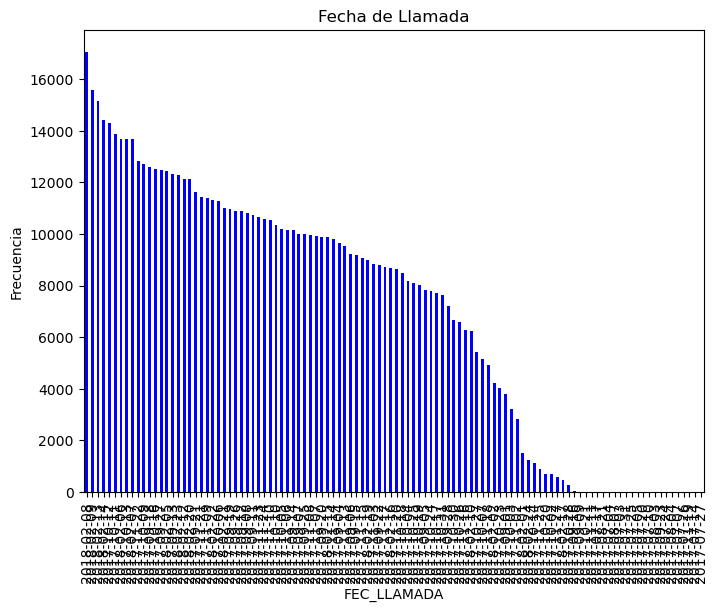

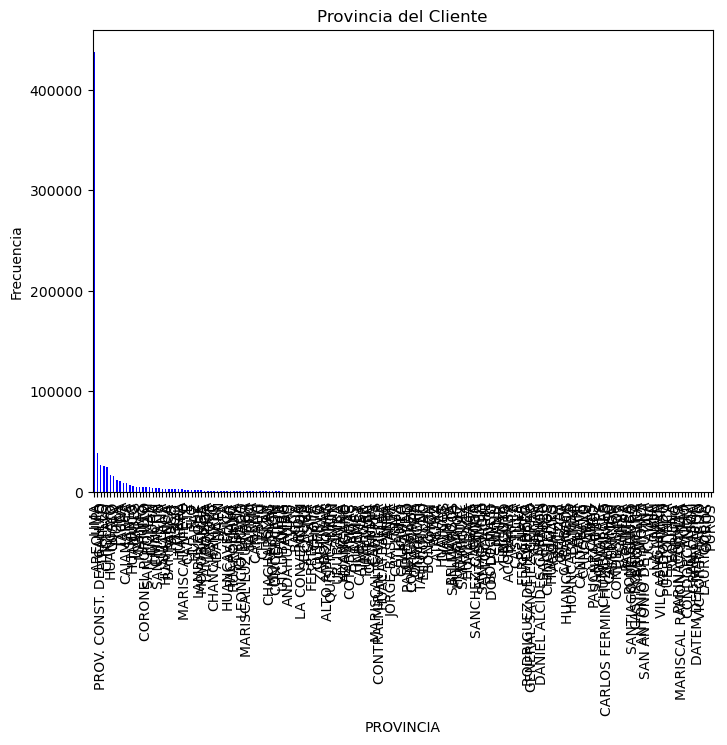

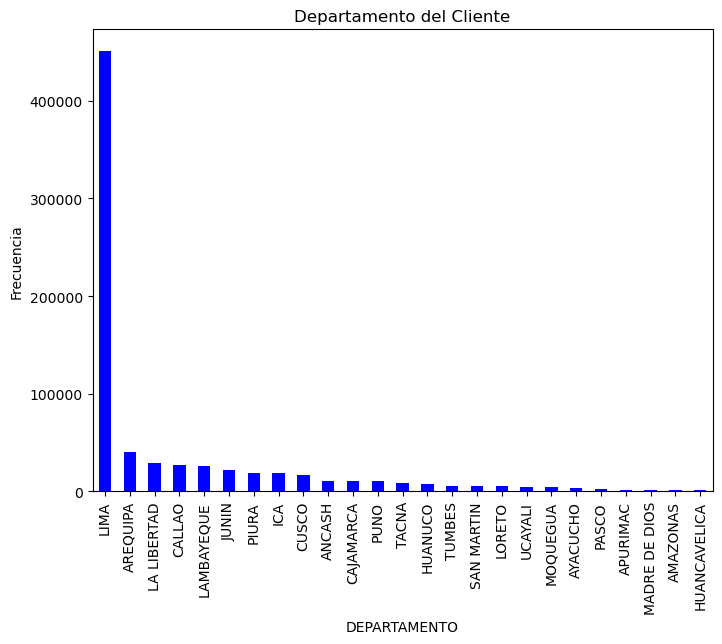

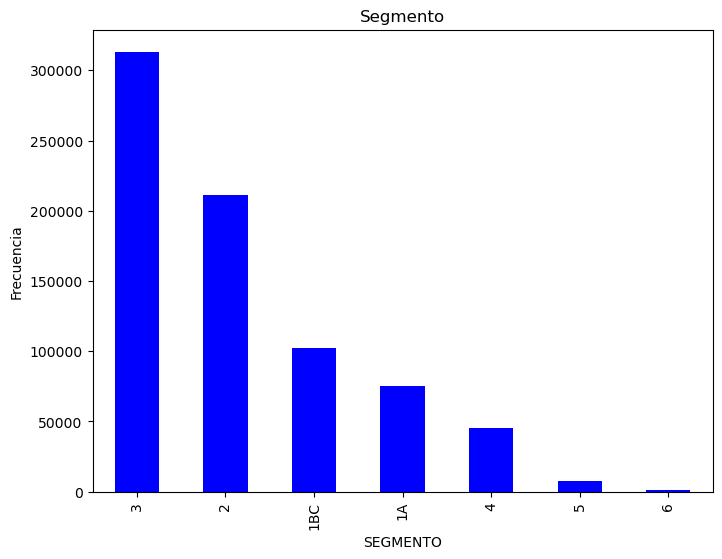

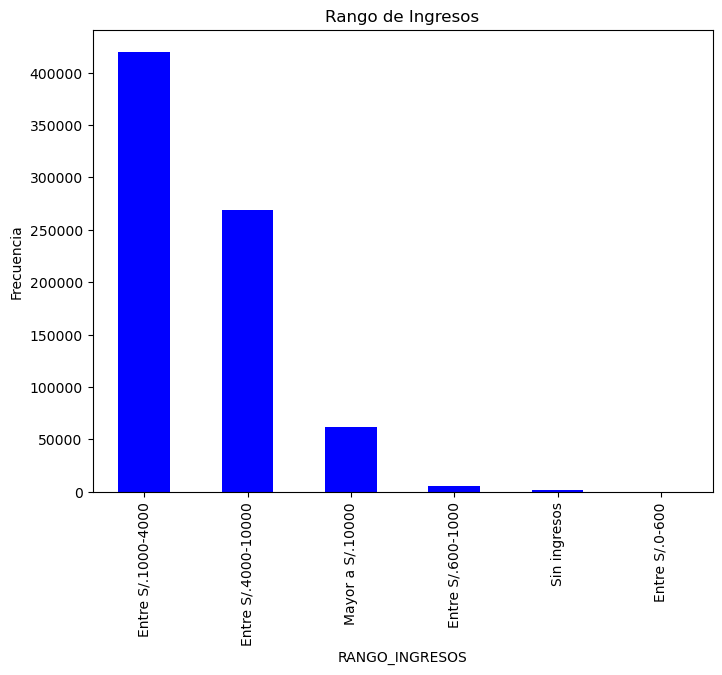

In [81]:
#Mostrando la distribución de variables categóricas - DATA ENTRENAMIENTO - SIN IMPUTACIONES
import matplotlib.pyplot as plt # Importar la biblioteca matplotlib

# Estableciendo el diseño de subtramas
#plt.figure(figsize=(12, 9))  # Ajustando el tamaño de la figura
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)  # Ajustando los espacios entre subtramas

# Variables y títulos
variables_categoricas = ['FBK_ULT6', 'FBK_ULT12', 'FBK_BEST6', 'FBK_BEST12', 'COD_SALA', 'FEC_LLAMADA', 'PROVINCIA', 'DEPARTAMENTO', 'SEGMENTO', 'RANGO_INGRESOS']
titulos = ['Último Feedback Útimos_6m', 'Último Feedback Útimos_12m', 'Mejor Resultado Últimos_6m', 'Mejor Resultado Últimos_12m',"Código de Sala",
           "Fecha de Llamada","Provincia del Cliente","Departamento del Cliente","Segmento", "Rango de Ingresos"]

# Configuración de la subtrama
#plt.figure(figsize=(20, 16))  # Ajustando el tamaño de la figura
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)  # Ajustando los espacios entre subtramas

# Configuración de la subtrama
for i, var in enumerate(variables_categoricas):
    plt.figure(figsize=(8, 6)) # Tamaño de la gráfica
    #plt.subplot(3, 4, i + 1)
    # Crea un gráfico de barras
    dataMasterEntrenamiento[var].value_counts().plot(kind='bar', color='blue')
    plt.title(titulos[i])
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()  # Mostrar la gráfica actual

#Interpretación
#ejemplo
#La variable "Último Feedback en los últimos 6 meses, tiene un sesgo a la derecha con una moda de categoría TLV y con más de 500000 mil veces que se utilizó el valor TLV


In [82]:
variables_categoricas = df_dataEntrenamientoOk.select_dtypes(include=[object])
variables_categoricas.columns

Index(['FBK_ULT6', 'FBK_ULT12', 'FBK_BEST6', 'FBK_BEST12', 'PROVINCIA',
       'DEPARTAMENTO', 'SEGMENTO', 'RANGO_INGRESOS'],
      dtype='object')

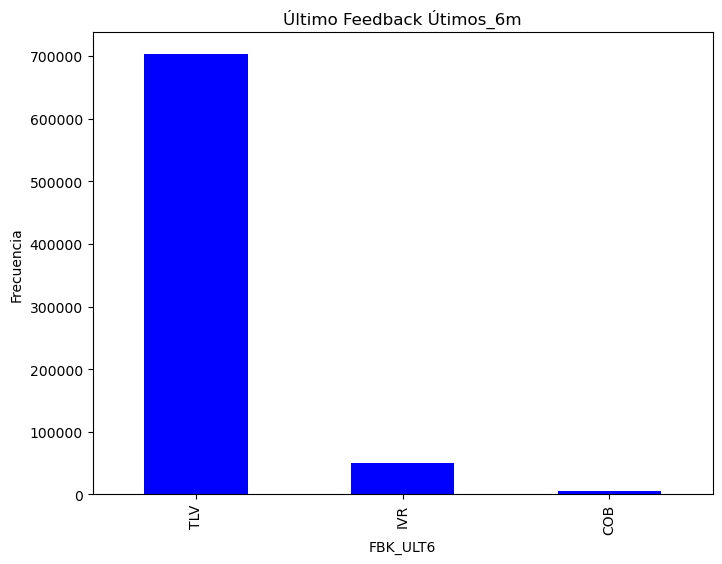

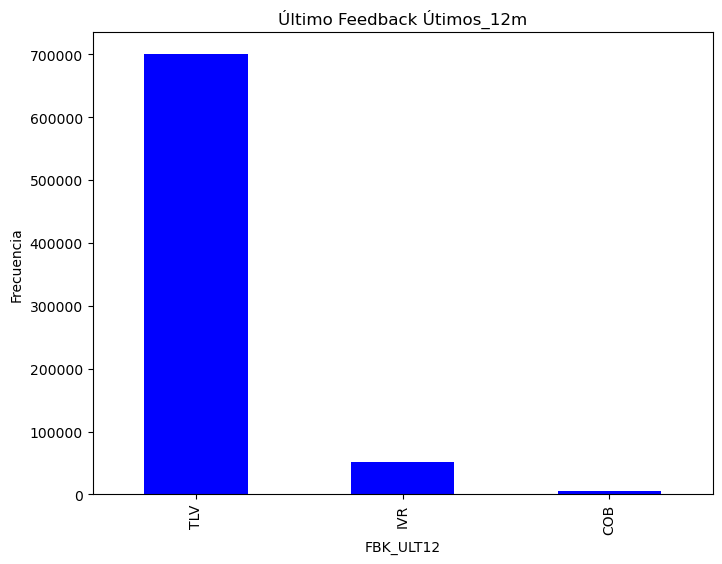

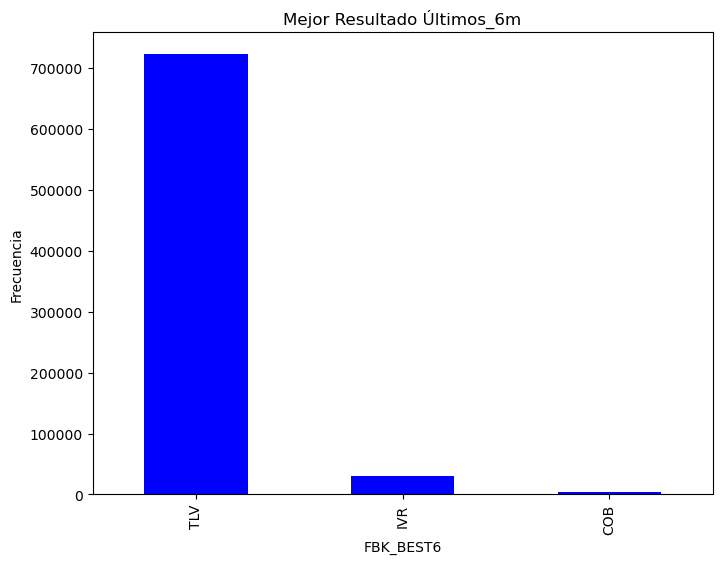

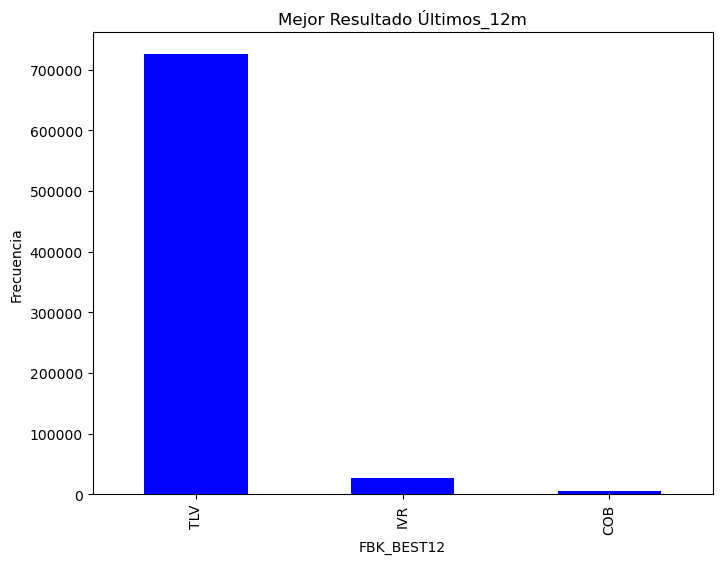

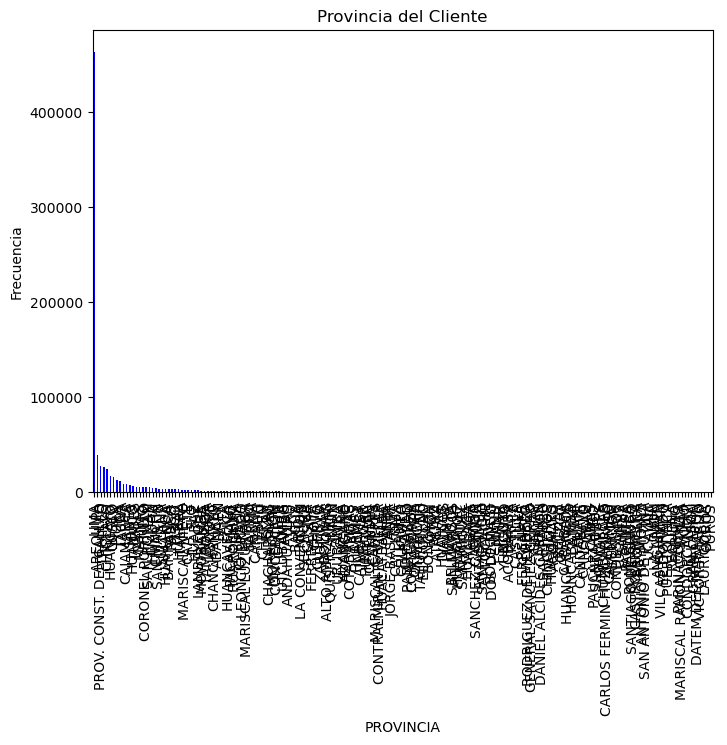

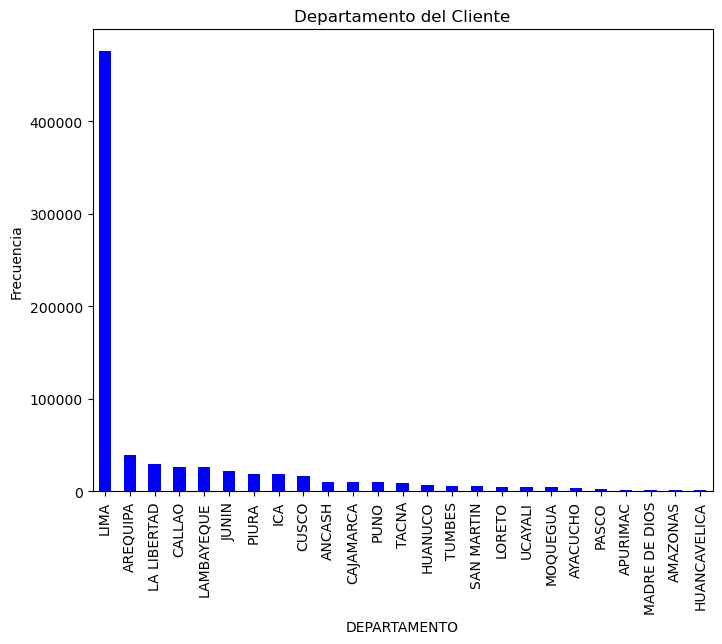

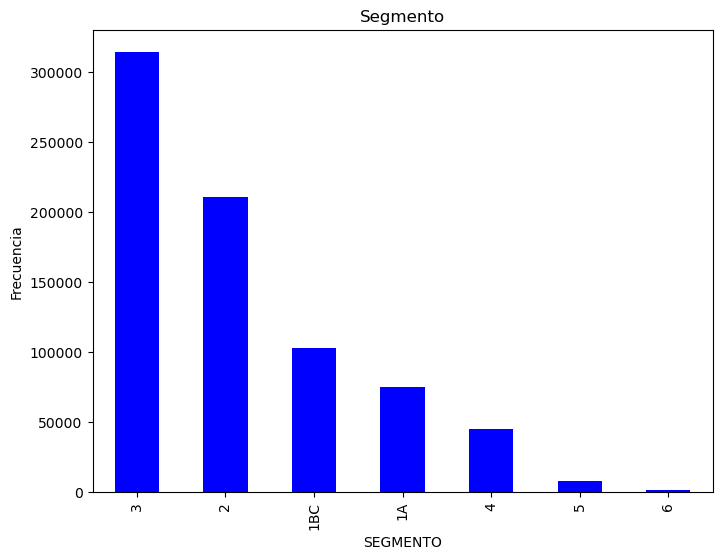

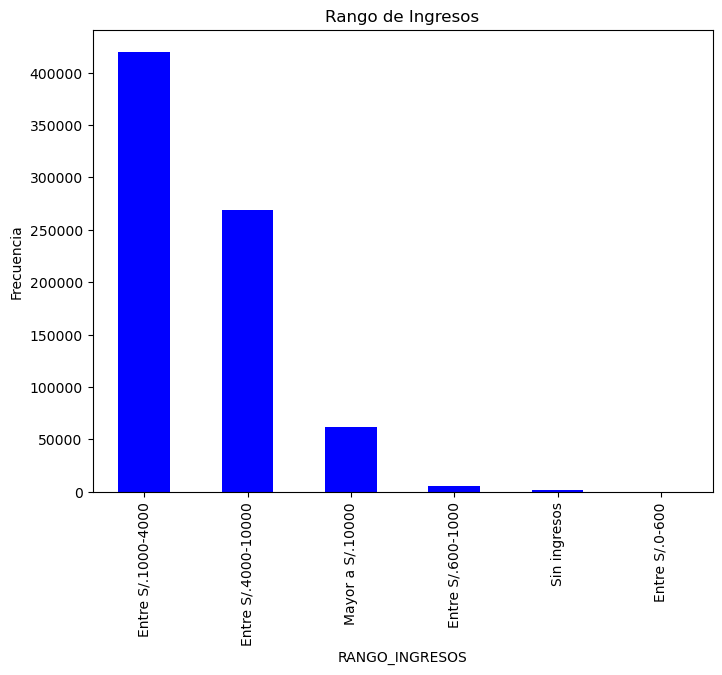

In [83]:
#Mostrando la distribución de variables categóricas - DATA ENTRENAMIENTO - CON IMPUTACIONES
import matplotlib.pyplot as plt # Importar la biblioteca matplotlib

# Estableciendo el diseño de subtramas
#plt.figure(figsize=(12, 9))  # Ajustando el tamaño de la figura
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)  # Ajustando los espacios entre subtramas

# Variables y títulos
variables_categoricas = ['FBK_ULT6', 'FBK_ULT12', 'FBK_BEST6', 'FBK_BEST12', 'PROVINCIA', 'DEPARTAMENTO', 'SEGMENTO', 'RANGO_INGRESOS']
titulos = ['Último Feedback Útimos_6m', 'Último Feedback Útimos_12m', 'Mejor Resultado Últimos_6m', 'Mejor Resultado Últimos_12m',
           "Provincia del Cliente","Departamento del Cliente","Segmento", "Rango de Ingresos"]

# Configuración de la subtrama
#plt.figure(figsize=(20, 16))  # Ajustando el tamaño de la figura
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)  # Ajustando los espacios entre subtramas

# Configuración de la subtrama
for i, var in enumerate(variables_categoricas):
    plt.figure(figsize=(8, 6)) # Tamaño de la gráfica
    #plt.subplot(3, 4, i + 1)
    # Crea un gráfico de barras
    df_dataEntrenamientoOk[var].value_counts().plot(kind='bar', color='blue')
    plt.title(titulos[i])
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()  # Mostrar la gráfica actual

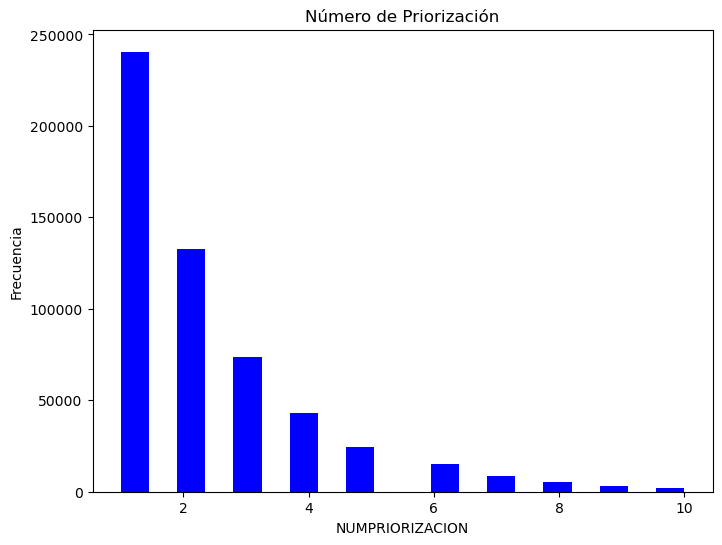

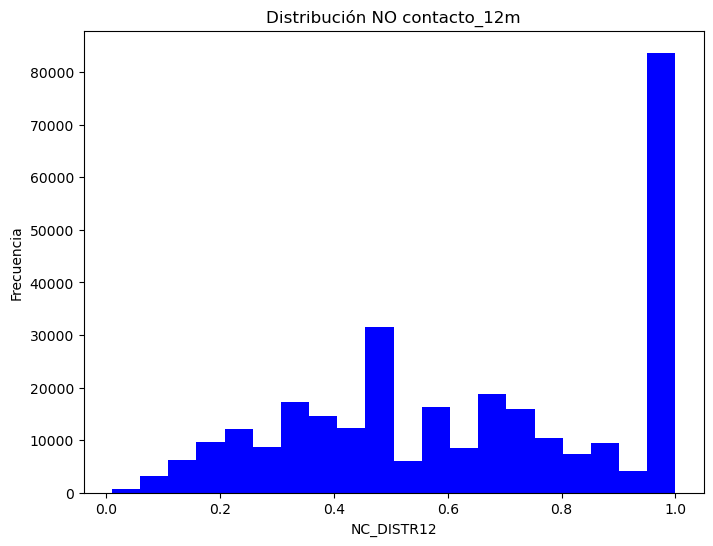

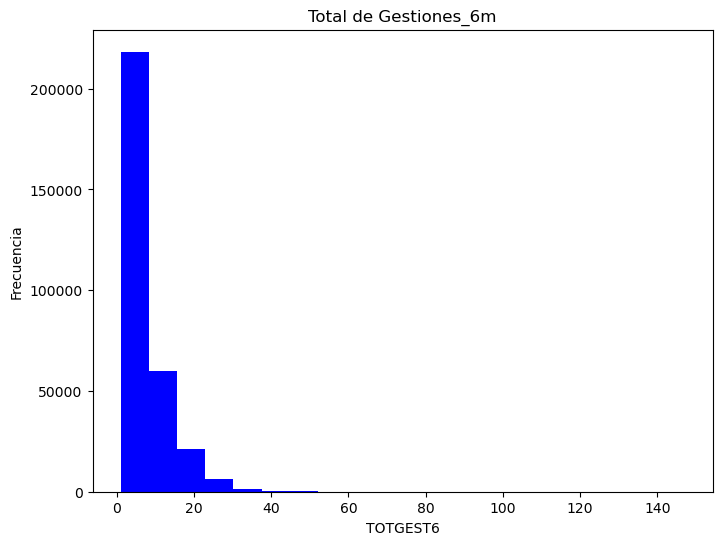

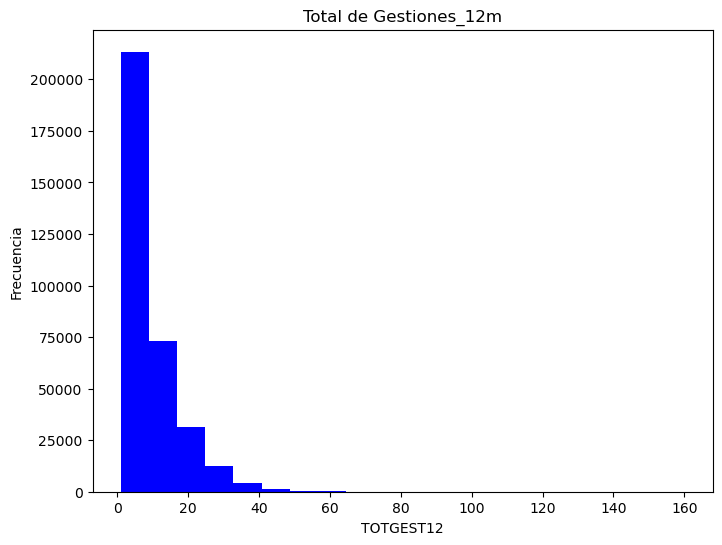

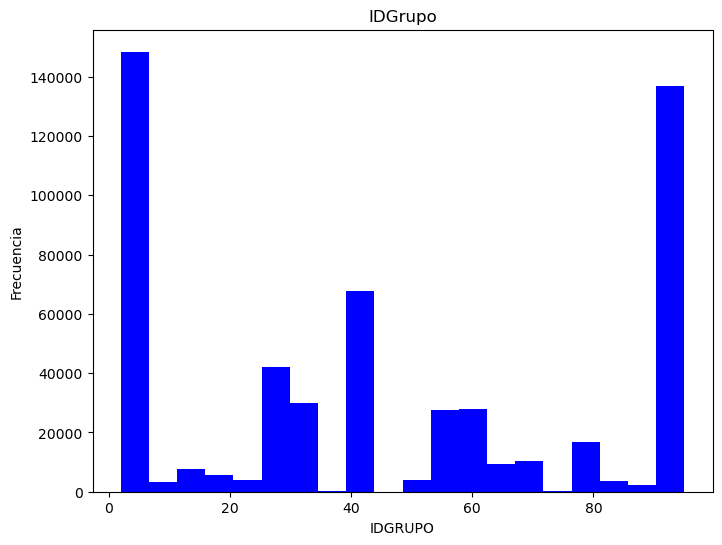

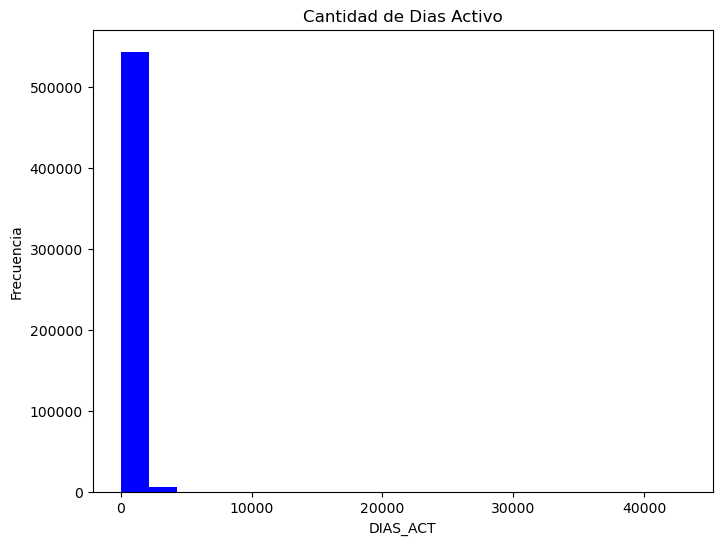

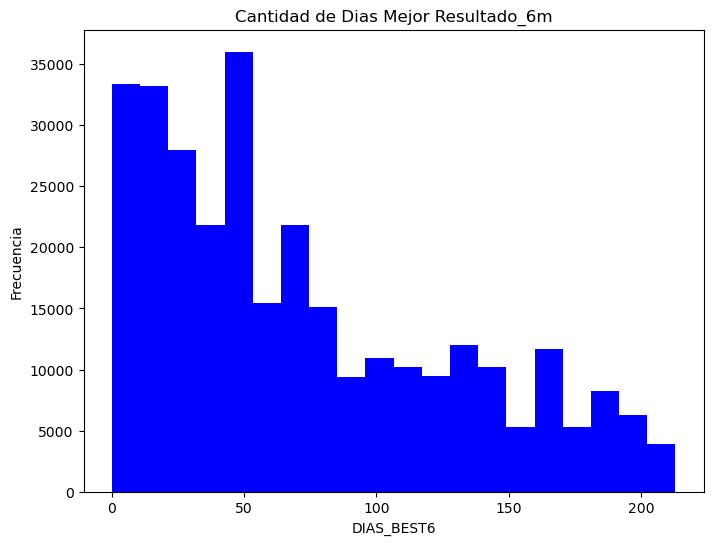

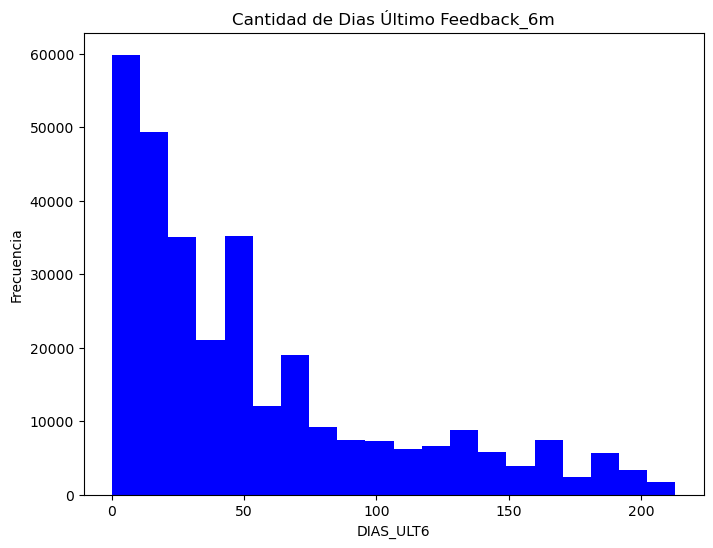

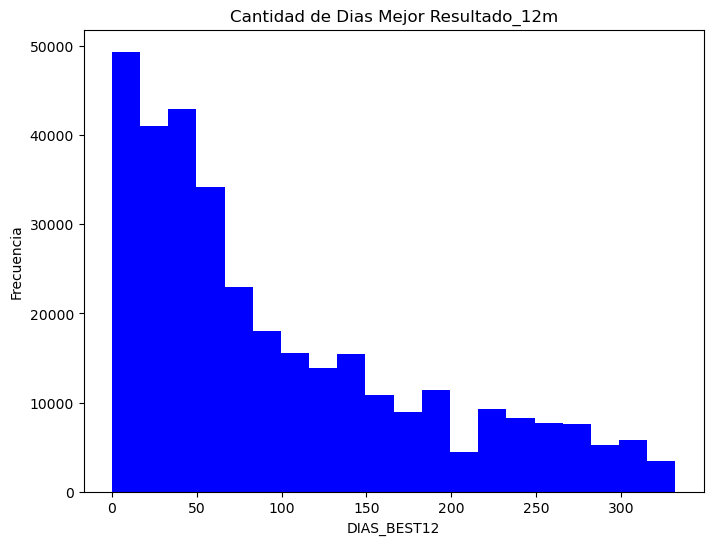

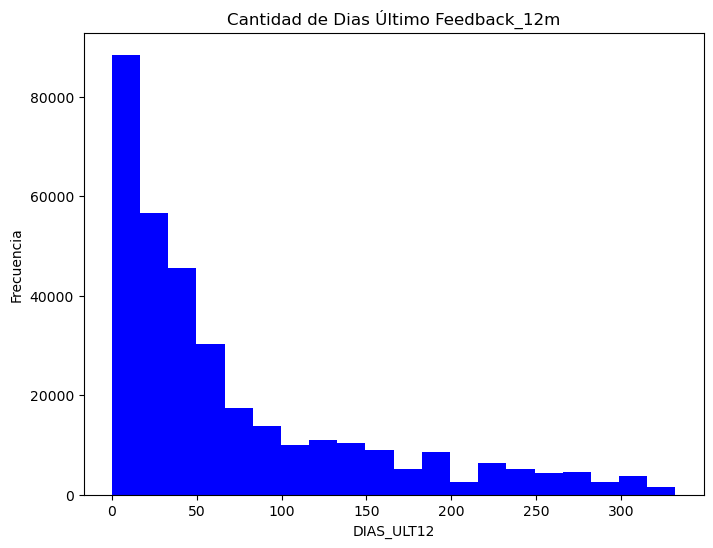

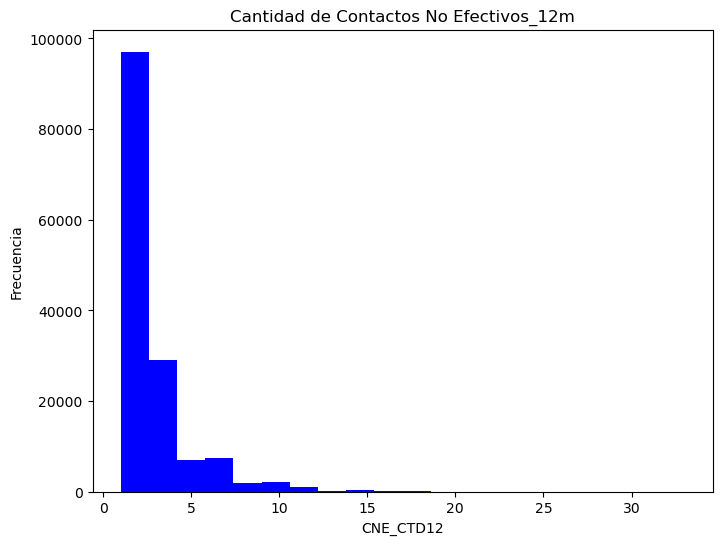

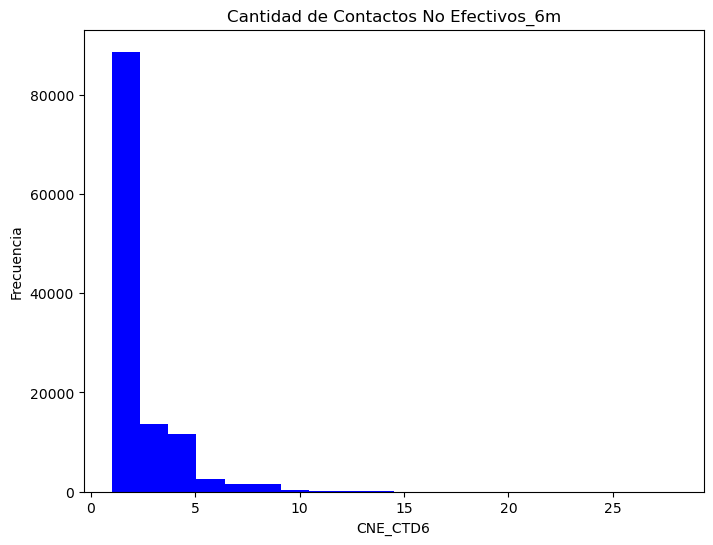

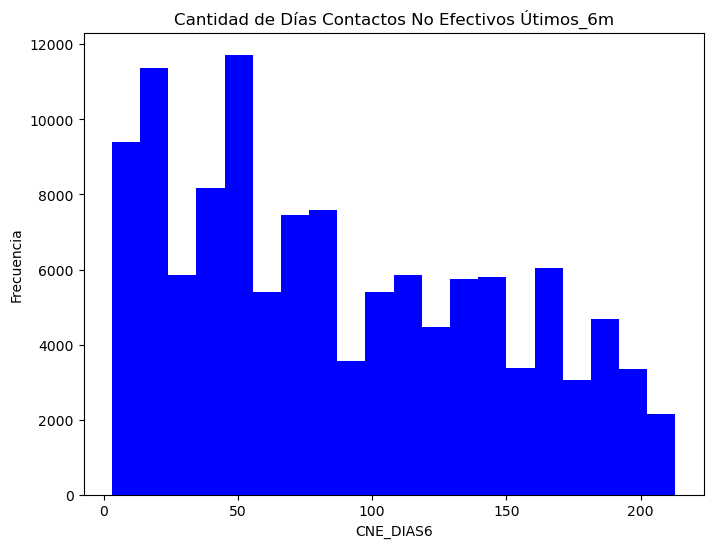

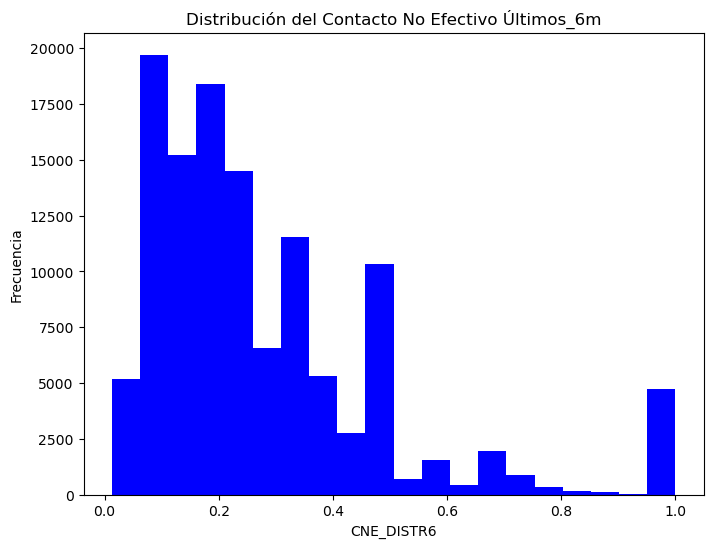

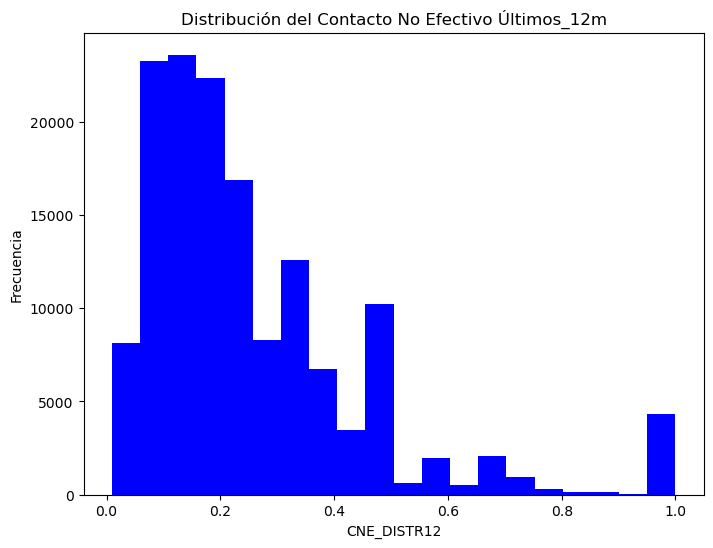

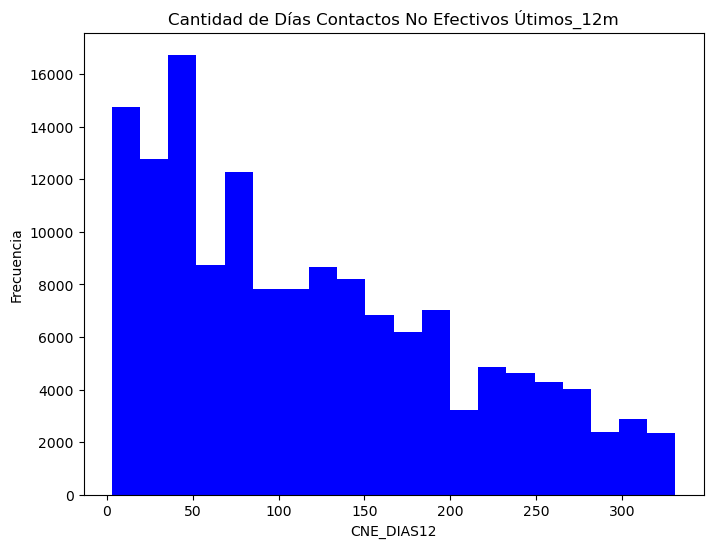

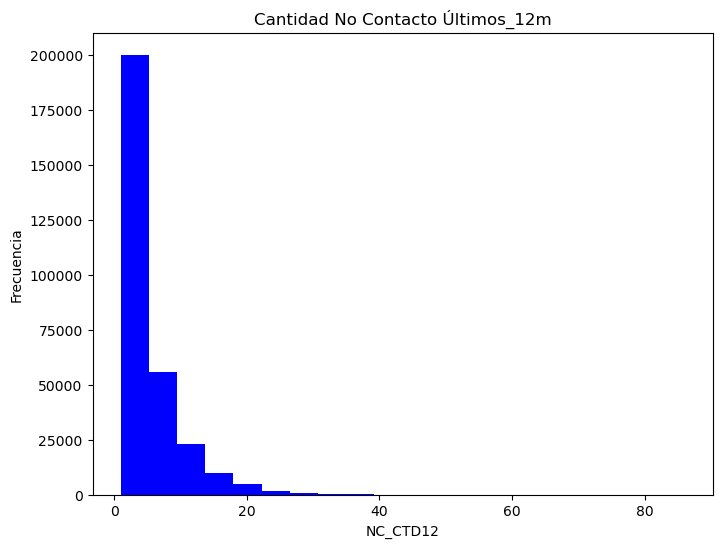

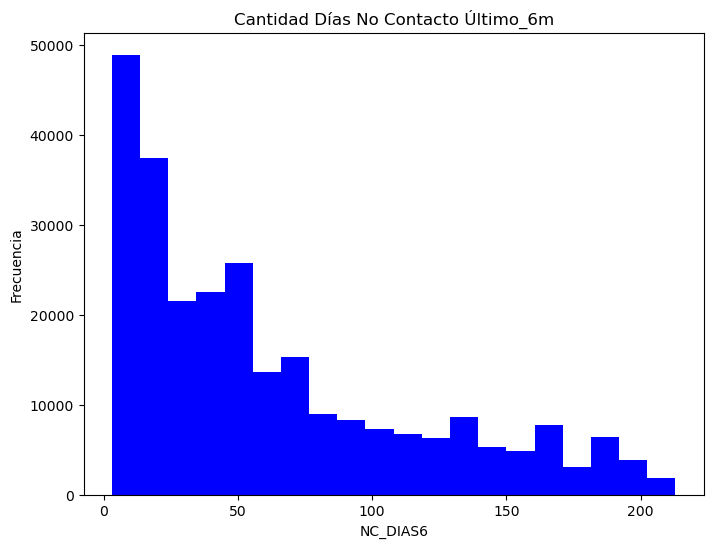

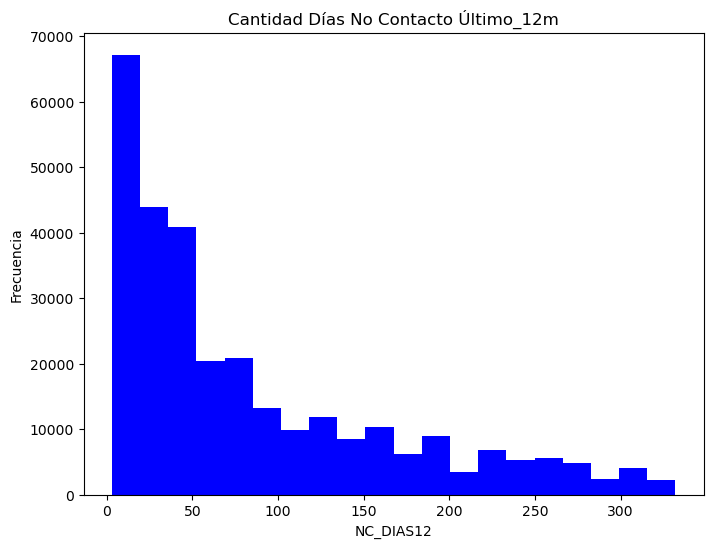

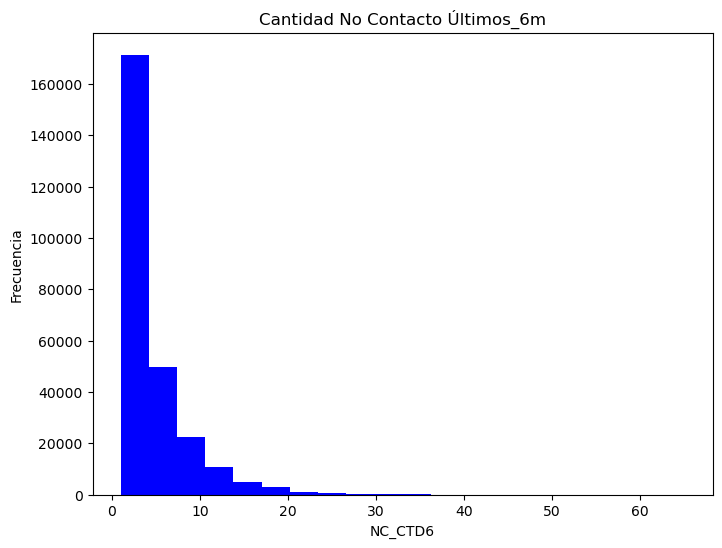

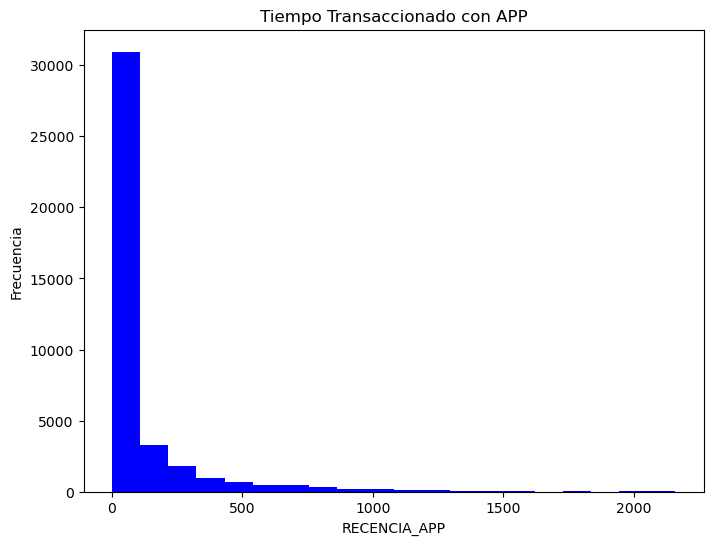

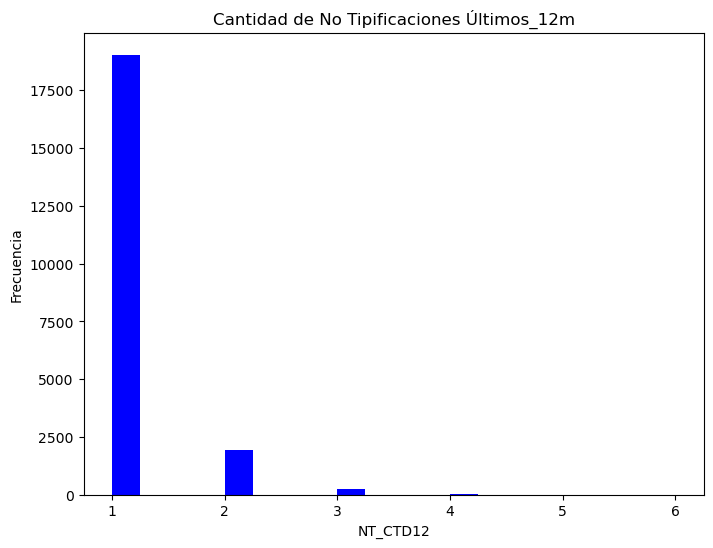

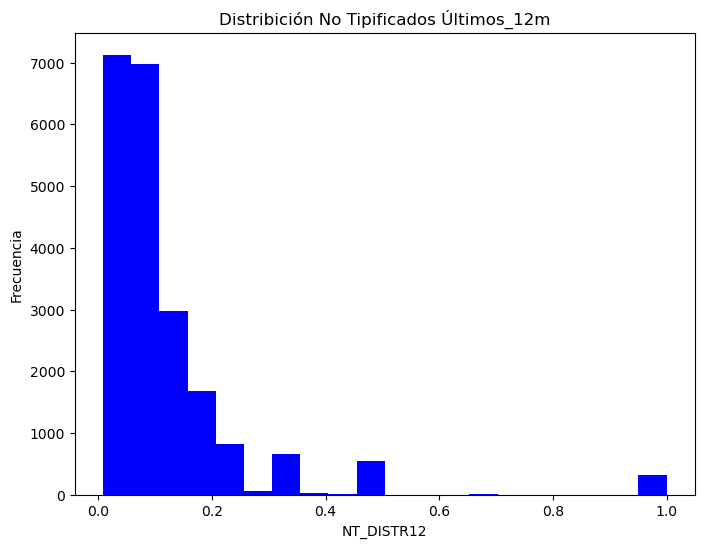

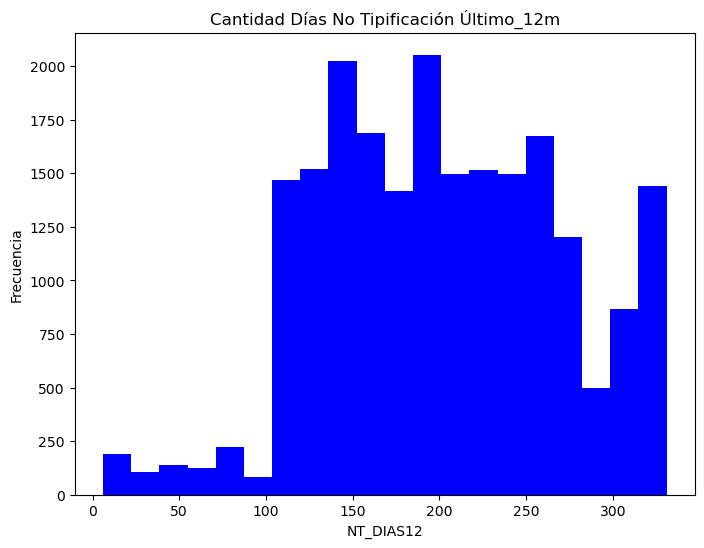

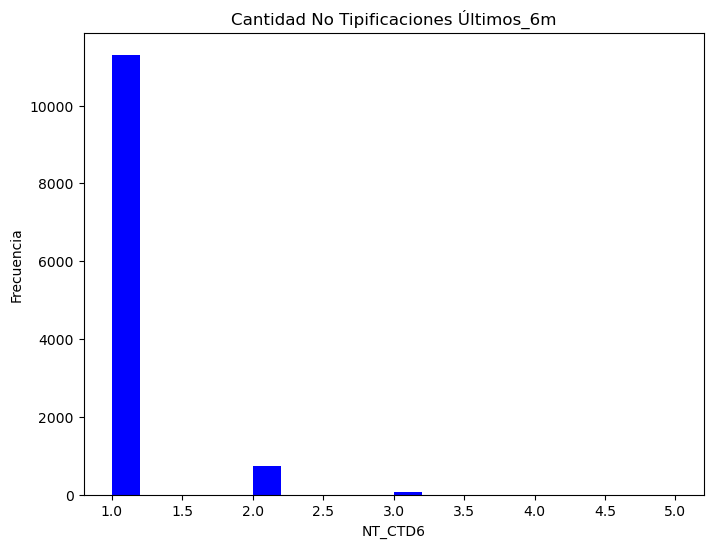

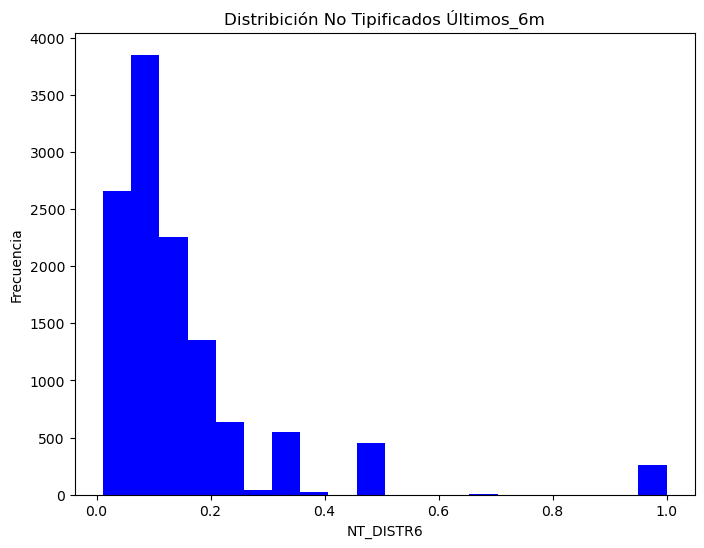

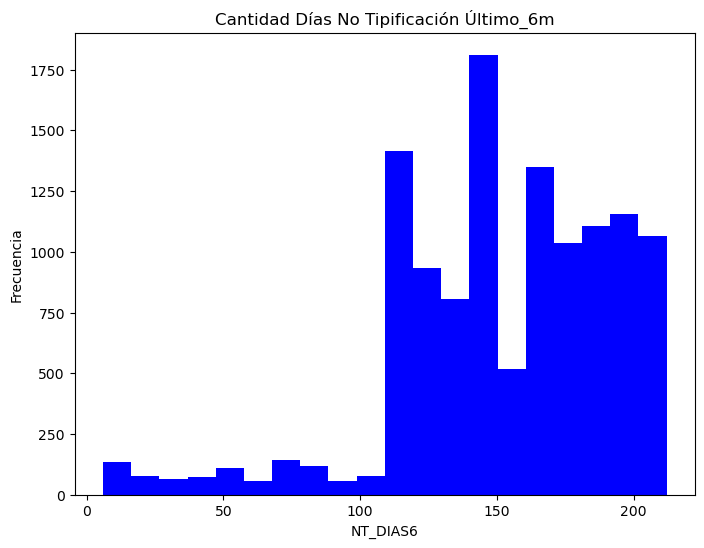

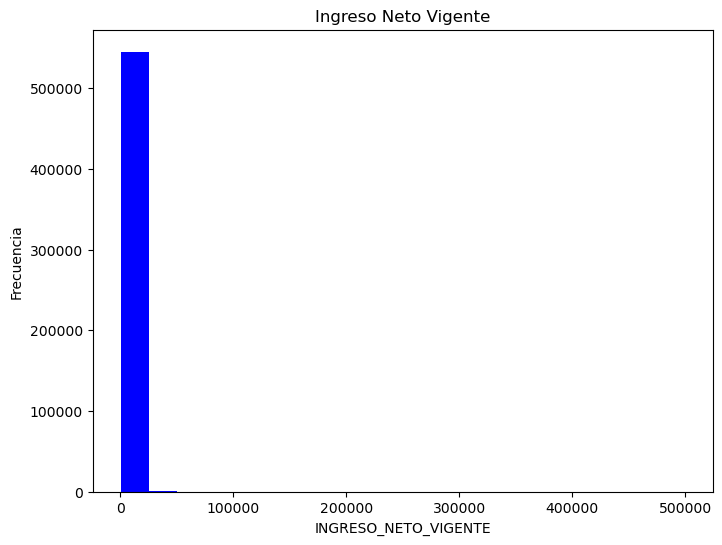

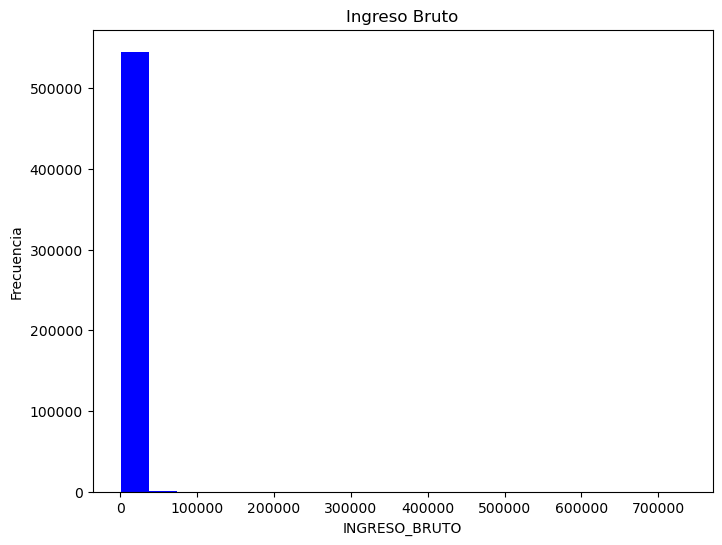

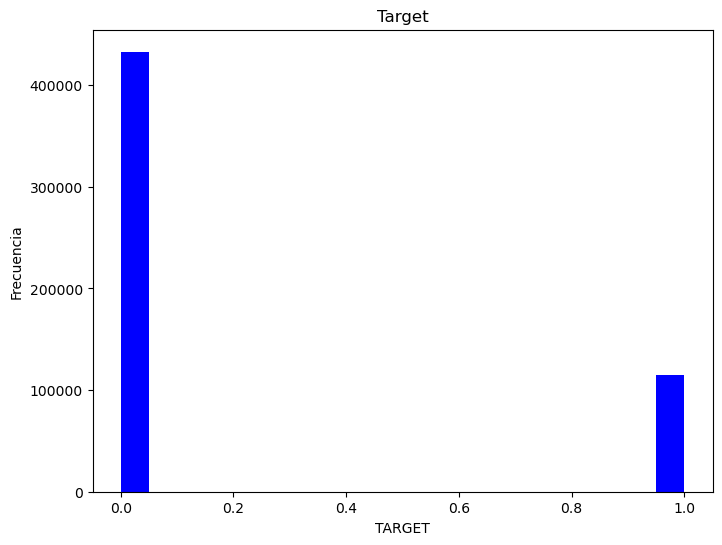

In [84]:
#Histogramas de variables numéricas predictoras y la variable objetivo "Target" inclusive para ver su distribución - DATA PRUEBA - SIN IMPUTACIONES
import matplotlib.pyplot as plt
import pandas as pd

# Variables a graficar
variables = [
    "NUMPRIORIZACION", "NC_DISTR12", "TOTGEST6", "TOTGEST12", "IDGRUPO", 
    "DIAS_ACT", "DIAS_BEST6", "DIAS_ULT6", "DIAS_BEST12", "DIAS_ULT12",
    "CNE_CTD12", "CNE_CTD6", "CNE_DIAS6", "CNE_DISTR6", "CNE_DISTR12", 
    "CNE_DIAS12", "NC_CTD12", "NC_DIAS6", "NC_DIAS12", "NC_CTD6", "RECENCIA_APP",
    "NT_CTD12", "NT_DISTR12", "NT_DIAS12", "NT_CTD6", "NT_DISTR6", "NT_DIAS6",
    "INGRESO_NETO_VIGENTE", "INGRESO_BRUTO", "TARGET"
]

# Colores para los histogramas
colores = ["blue"] * len(variables)

# Títulos para los histogramas

titulos = [
    "Número de Priorización", "Distribución NO contacto_12m", "Total de Gestiones_6m", "Total de Gestiones_12m", "IDGrupo",
    "Cantidad de Dias Activo", "Cantidad de Dias Mejor Resultado_6m", "Cantidad de Dias Último Feedback_6m", "Cantidad de Dias Mejor Resultado_12m", "Cantidad de Dias Último Feedback_12m",
    "Cantidad de Contactos No Efectivos_12m", "Cantidad de Contactos No Efectivos_6m", "Cantidad de Días Contactos No Efectivos Útimos_6m", "Distribución del Contacto No Efectivo Últimos_6m", "Distribución del Contacto No Efectivo Últimos_12m",
    "Cantidad de Días Contactos No Efectivos Útimos_12m", "Cantidad No Contacto Últimos_12m", "Cantidad Días No Contacto Último_6m", "Cantidad Días No Contacto Último_12m", "Cantidad No Contacto Últimos_6m", "Tiempo Transaccionado con APP",
    "Cantidad de No Tipificaciones Últimos_12m", "Distribición No Tipificados Últimos_12m", "Cantidad Días No Tipificación Último_12m", "Cantidad No Tipificaciones Últimos_6m", "Distribición No Tipificados Últimos_6m", "Cantidad Días No Tipificación Último_6m",
    "Ingreso Neto Vigente", "Ingreso Bruto", "Target"
]
#print(len(variables))
#print(len(titulos))

#Configuración de tamaño de la gráfica 
#plt.figure(figsize=(20, 20))
#plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Espaciado entre subtramas

# Creando los histogramas en el diseño de subtramas
for i, var in enumerate(variables):
        plt.figure(figsize=(8, 6))
        plt.hist(dataMasterPrueba[var], color=colores[i], bins=20)
        plt.title(titulos[i])
        plt.xlabel(var)
        plt.ylabel("Frecuencia")
        plt.show() #Mostrando los histogramas

#Interpretación

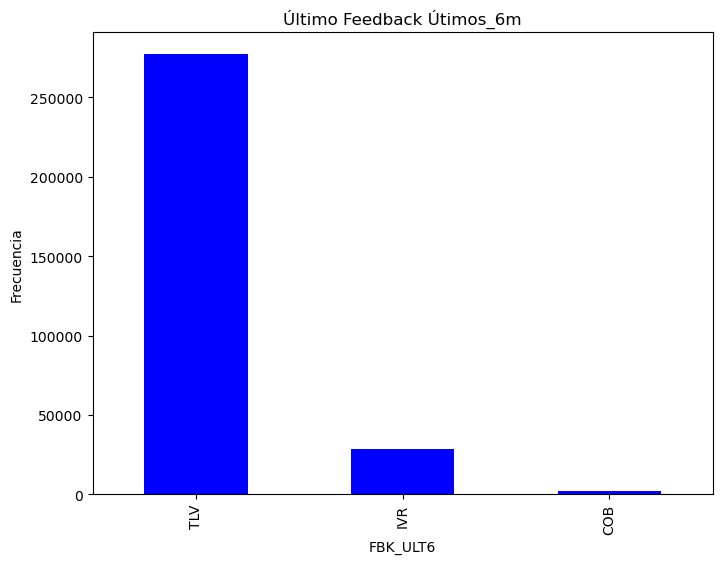

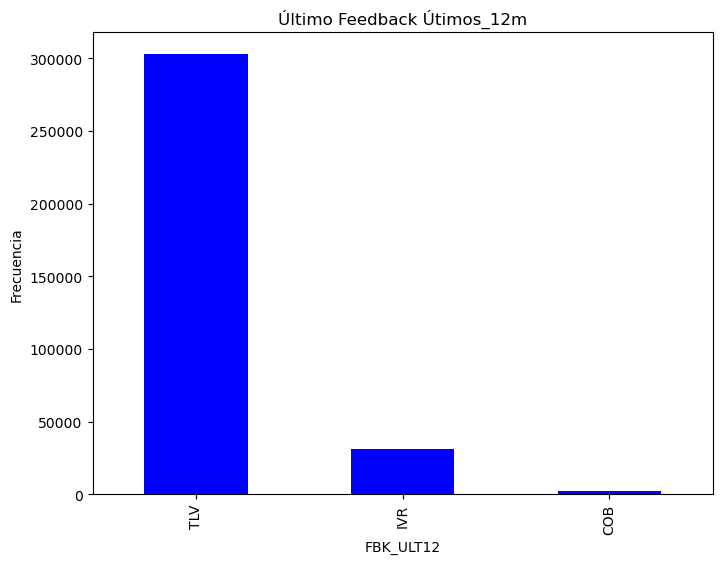

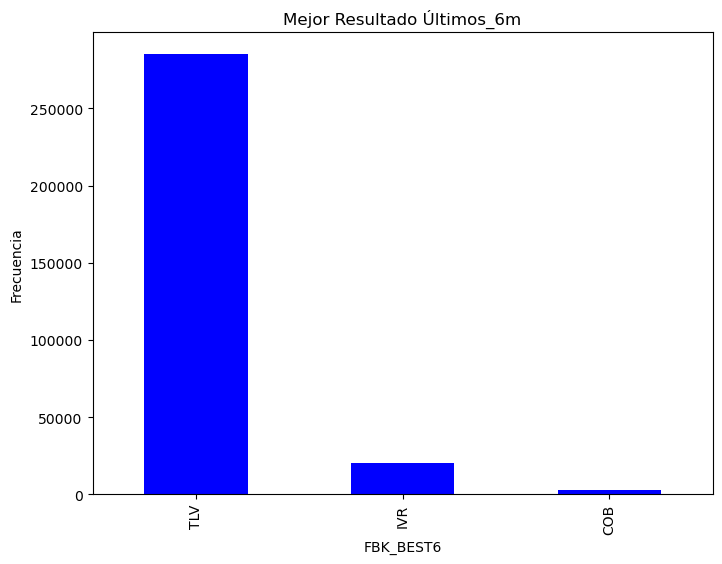

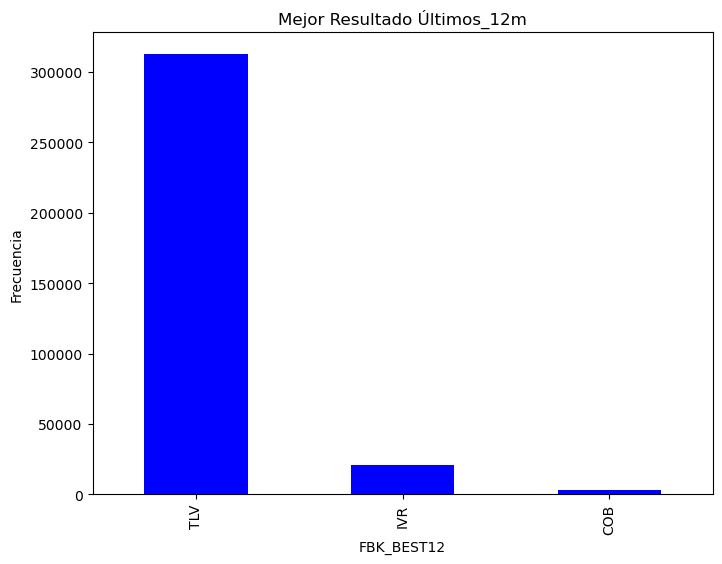

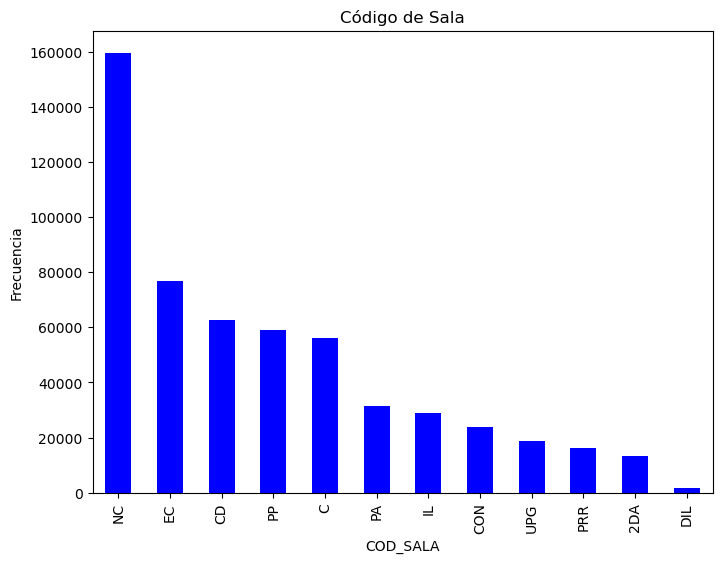

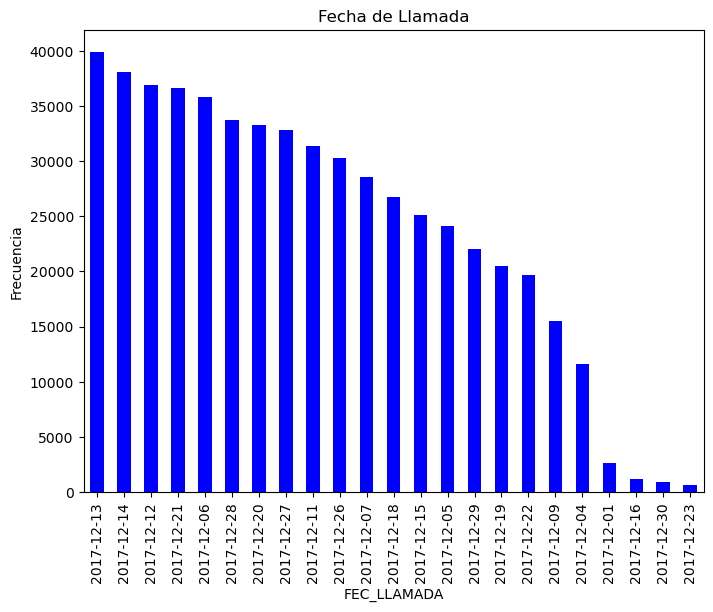

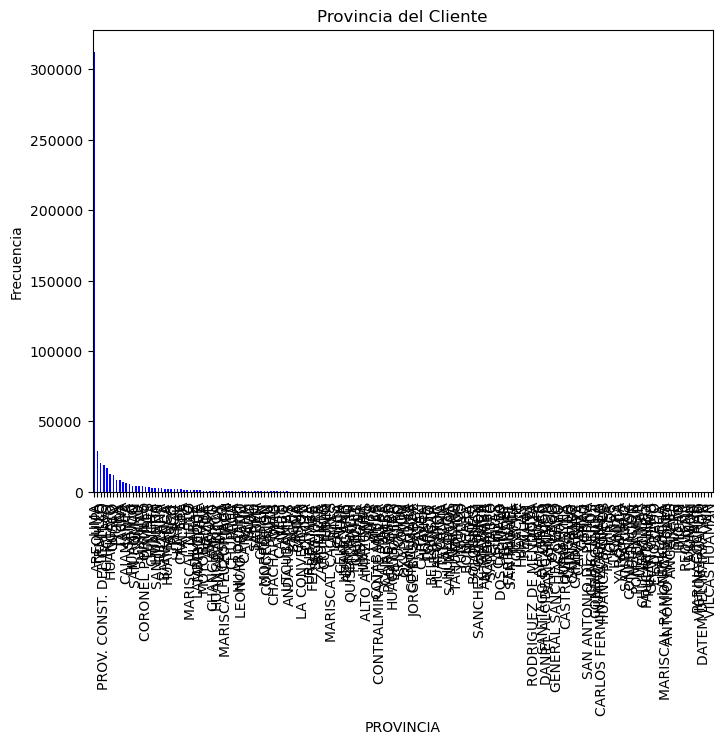

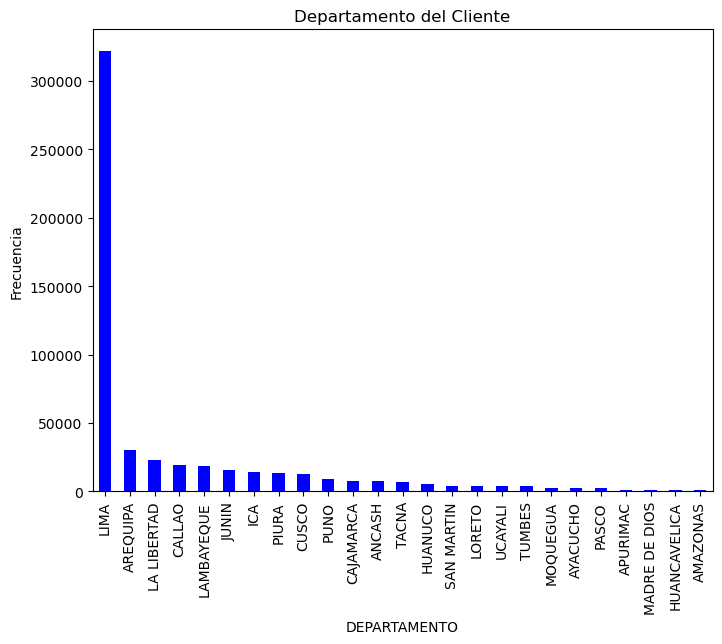

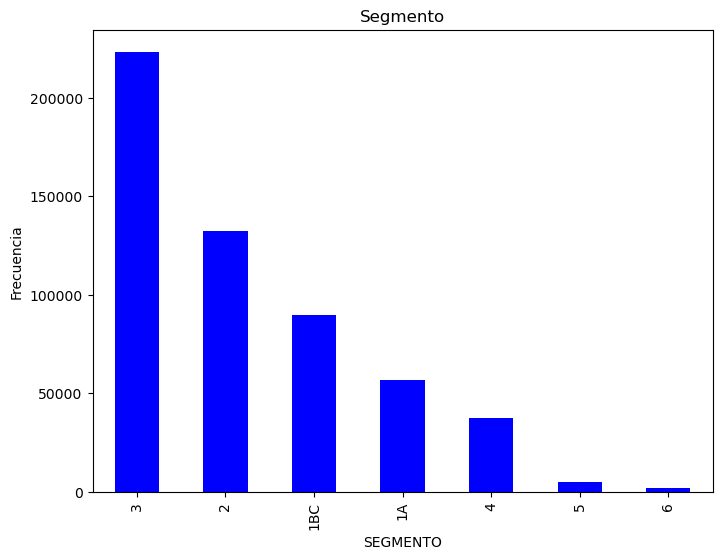

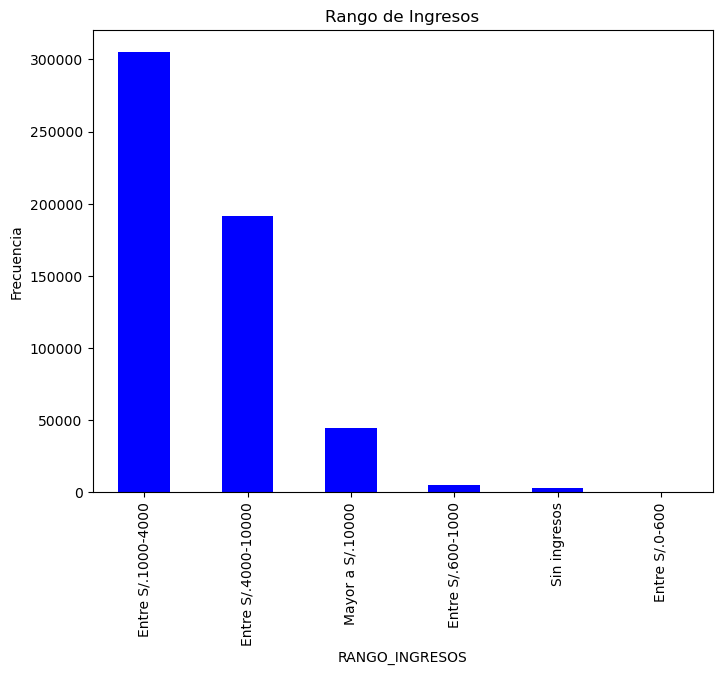

In [85]:
#Mostrando la distribución de variables categóricas - DATA PRUEBA - SIN IMPUTACIONES
import matplotlib.pyplot as plt # Importar la biblioteca matplotlib

# Estableciendo el diseño de subtramas
#plt.figure(figsize=(12, 9))  # Ajustando el tamaño de la figura
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)  # Ajustando los espacios entre subtramas

# Variables y títulos
variables_categoricas = ['FBK_ULT6', 'FBK_ULT12', 'FBK_BEST6', 'FBK_BEST12', 'COD_SALA', 'FEC_LLAMADA', 'PROVINCIA', 'DEPARTAMENTO', 'SEGMENTO', 'RANGO_INGRESOS']
titulos = ['Último Feedback Útimos_6m', 'Último Feedback Útimos_12m', 'Mejor Resultado Últimos_6m', 'Mejor Resultado Últimos_12m',"Código de Sala",
           "Fecha de Llamada","Provincia del Cliente","Departamento del Cliente","Segmento", "Rango de Ingresos"]

# Configuración de la subtrama
#plt.figure(figsize=(20, 16))  # Ajustando el tamaño de la figura
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)  # Ajustando los espacios entre subtramas

# Configuración de la subtrama
for i, var in enumerate(variables_categoricas):
    plt.figure(figsize=(8, 6)) # Tamaño de la gráfica
    #plt.subplot(3, 4, i + 1)
    # Crea un gráfico de barras
    dataMasterPrueba[var].value_counts().plot(kind='bar', color='blue')
    plt.title(titulos[i])
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()  # Mostrar la gráfica actual

4.De sus conclusiones del análisis descriptivo y gráfico


# RESPONDIENDO A LA PREGUNTA 4:

De acuerdo a las graficas de histogramas presentadas anteriormente, podemos visualizas que ninguna variable en las gráficas presenta distribución normal, la mayoría muestra sesgo hacia la derecha y también es fácil visualizar la frecuencia de los valores por cada variable.
De acuerdo a las gráficas de disperción es notorio cuanta diferencia existe en una data no tratada con una ya con control de oultiers e imputaciones.
De acuerdo a la gráfica de correlación, se agregó también las gráficas luego de los tratamientos y se adicionó el Umbral para que sea más visible la correlación alta entre las variables.
Nota: los detalles de intento de lectura de las gráficas se añadió en cada script cuando se ejecutan la obtención de las gráficas, con las clases de estadística aplicada se mejorará.

5.Identificar la variable a predecir [target], gráficas y comentar la asimetría


# RESPONDIENDO A LA PREGUNTA 5:

<Axes: xlabel='TARGET', ylabel='count'>

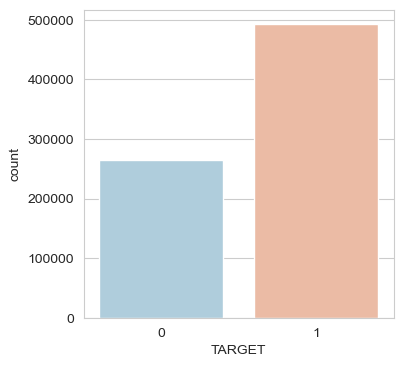

In [87]:
#Graficando la variable objetivo "Target" de la data Entrenamiento - SIN IMPUTACIONES
sns.set_style('whitegrid')
plt.figure(figsize=(4,4))
sns.countplot(x='TARGET',data=dataMasterEntrenamiento, palette='RdBu_r')
#1: contacto efectivo y 0: no contacto efectivo

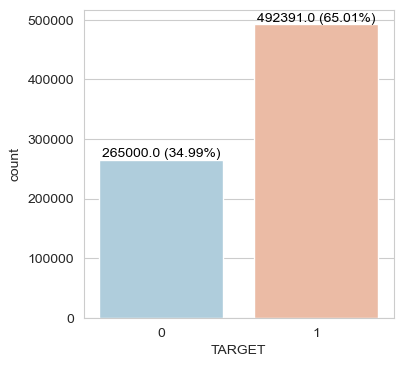

In [88]:
#Añadiendo su distribución a la gráfica previa de la variable objetivo "Target" de la data Entrenamiento - SIN IMPUTACIONES
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(4, 4))  # Ajustando el tamaño de la figura si se requiere

# Creando el countplot
ax = sns.countplot(x='TARGET', data=dataMasterEntrenamiento, palette='RdBu_r')

# Calculando y mostrando los porcentajes sobre cada barra del gráfico
total_items = len(dataMasterEntrenamiento)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height} ({height / total_items:.2%})',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()
#Interpretación:
#en el gráfico de barras para la variable objetivo "Target", 
#de acuerdo a su distribución de frecuencias presentan entre sus valores totales de "0" y "1" una asimetría
#No encontrándose parejos, por lo que se recomienda el balanceo para dicha variable;
#en este caso se puede tomar el método de "over_sampling" de los datos y posiblemente a realizar con SMOTE.
#**********************************######*****************************************************************************************
#Aúnque revisando el material de clase (videos de las sesiones), se aprecia una recomendación donde quizá para este caso
#la variable "TARGET" aúnque presenta una asimetría entre los valores, probablemente aquí NO necesite realizar balanceo a los datos por no estar tan alejados en su distribución.

<Axes: xlabel='TARGET', ylabel='count'>

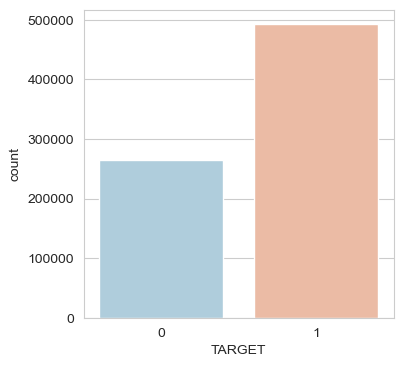

In [89]:
#Graficando la variable objetivo "Target" de la data Entrenamiento - CON IMPUTACIONES
sns.set_style('whitegrid')
plt.figure(figsize=(4,4))
sns.countplot(x='TARGET',data=df_dataEntrenamientoOk, palette='RdBu_r')
#la variable "TARGET" presenta una asimetría entre los valores, aunque probablemente aquí NO necesite realizar balanceo a los datos
#1: contacto efectivo y 0: no contacto efectivo

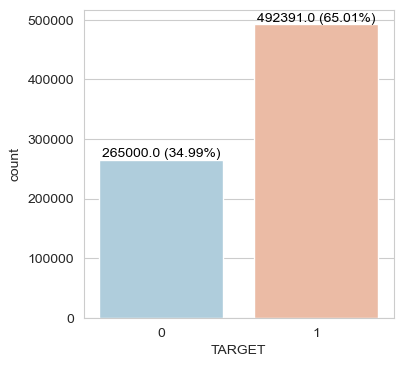

In [90]:
#Añadiendo su distribución a la gráfica previa de la variable objetivo "Target" de la data Entrenamiento - SIN IMPUTACIONES
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(4, 4))  # Ajustando el tamaño de la figura si se requiere

# Creando el countplot
ax = sns.countplot(x='TARGET', data=df_dataEntrenamientoOk, palette='RdBu_r')

# Calculando y mostrando los porcentajes sobre cada barra del gráfico
total_items = len(df_dataEntrenamientoOk)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height} ({height / total_items:.2%})',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()
#Interpretación:
#en el gráfico de barras para la variable objetivo "Target", 
#de acuerdo a su distribución de frecuencias presentan entre sus valores totales de "0" y "1" una asimetría
#No encontrándose parejos, por lo que se recomienda el balanceo para dicha variable;
#en este caso se puede tomar el método de "over_sampling" de los datos y posiblemente a realizar con SMOTE.
#**********************************######*****************************************************************************************
#Aúnque revisando el material de clase (videos de las sesiones), se aprecia una recomendación donde quizá para este caso
#la variable "TARGET" aúnque presenta una asimetría entre los valores, probablemente aquí NO necesite realizar balanceo a los datos por no estar tan alejados en su distribución.

<Axes: xlabel='TARGET', ylabel='count'>

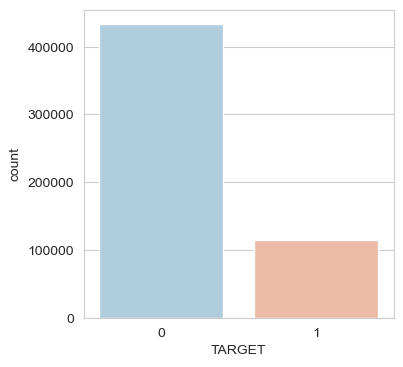

In [91]:
#Graficando la variable objetivo "Target" de la data Prueba (data validación)
sns.set_style('whitegrid')
plt.figure(figsize=(4,4))
sns.countplot(x='TARGET',data=dataMasterPrueba, palette='RdBu_r')
#la variable "TARGET" presenta una asimetría entre sus valores, y requiere hacer balanceo, en este caso se puede tomar el método de "over_sampling" de los datos posiblemente con SMOTE
#1: contacto efectivo y 0: no contacto efectivo

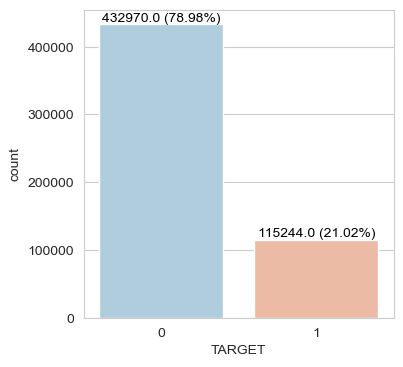

In [92]:
#Añadiendo su distribución a la gráfica previa de la variable objetivo "Target" de la data Prueba - SIN IMPUTACIONES
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(4, 4))  # Ajustando el tamaño de la figura si se requiere

# Creando el countplot
ax = sns.countplot(x='TARGET', data=dataMasterPrueba, palette='RdBu_r')

# Calculando y mostrando los porcentajes sobre cada barra del gráfico
total_items = len(dataMasterPrueba)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height} ({height / total_items:.2%})',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()
#Interpretación:
#en el gráfico de barras para la variable objetivo "Target", 
#de acuerdo a su distribución de frecuencias presentan entre sus valores totales de "0" y "1" una asimetría
#No encontrándose parejos, por lo que se recomienda el balanceo para dicha variable;
#en este caso se puede tomar el método de "over_sampling" de los datos y posiblemente a realizar con SMOTE.

6.Relacionar de manera gráfica la variable target con las variables predictoras (X), identificar las mejores variables o más relevantes, muestre ejemplos


*Solución*


 --- Gráfico Data Entrenamiento para NUMPRIORIZACION vs. TARGET --- 


 --- Gráfico Data Entrenamiento para NC_DISTR12 vs. TARGET --- 


 --- Gráfico Data Entrenamiento para TOTGEST6 vs. TARGET --- 



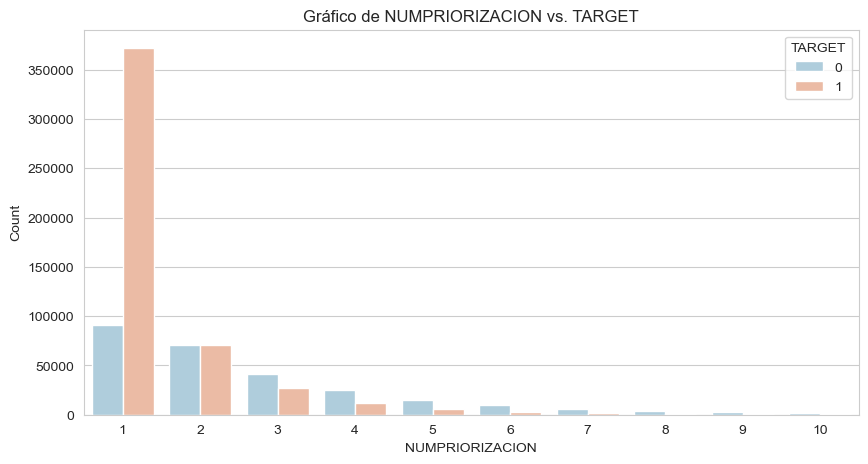

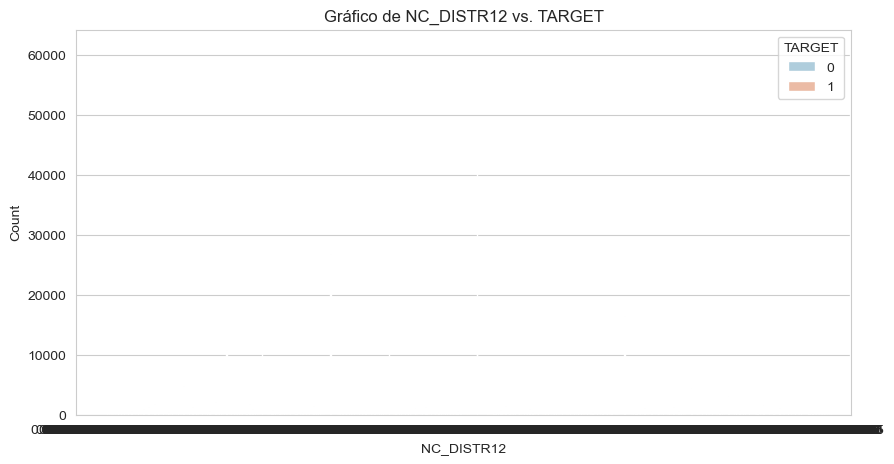

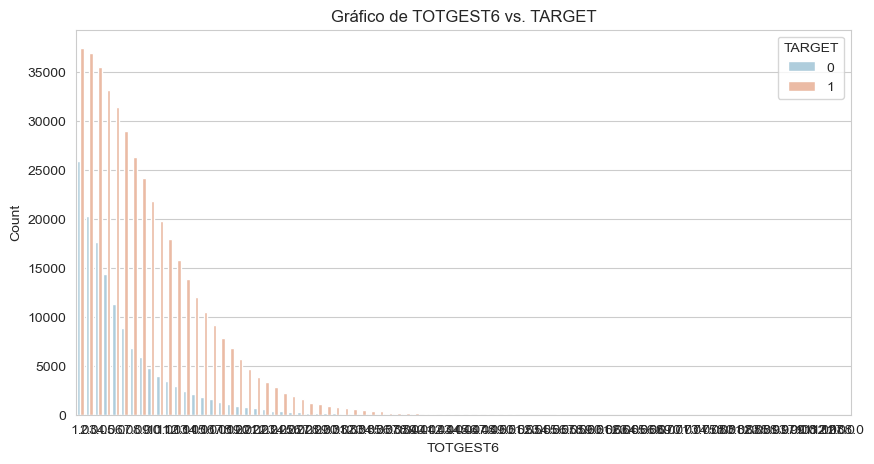

In [93]:
#################Variables numéricas#########################
#Graficando la variable objetivo "Target" con las variable numéricas predictoras de la data Entrenamiento
import seaborn as sns
import matplotlib.pyplot as plt

def get_graphic(dataInput, x_variable, hue_variable):
    sns.set_style('whitegrid')
    plt.figure(figsize=(10,5)) #ajustando el tamaño de la gráfica según tus necesidades
    ax=sns.countplot(x=x_variable,hue=hue_variable, data=dataInput, palette='RdBu_r')
    plt.title(f'Gráfico de {x_variable} vs. {hue_variable}')
    plt.xlabel(x_variable)
    plt.ylabel('Count')
    plt.legend(title=hue_variable, loc='upper right')  # Agrega una leyenda 
    return ax
        
variables_numericas= [
    "NUMPRIORIZACION", "NC_DISTR12", "TOTGEST6"]
    #"TOTGEST12", "IDGRUPO", 
    #"DIAS_ACT", "DIAS_BEST6", "DIAS_ULT6", "DIAS_BEST12", "DIAS_ULT12",
    #"CNE_CTD12", "CNE_CTD6", "CNE_DIAS6", "CNE_DISTR6", "CNE_DISTR12", 
    #"CNE_DIAS12", "NC_CTD12", "NC_DIAS6", "NC_DIAS12", "NC_CTD6", "RECENCIA_APP",
    #"NT_CTD12", "NT_DISTR12", "NT_DIAS12", "NT_CTD6", "NT_DISTR6", "NT_DIAS6",
    #"INGRESO_NETO_VIGENTE", "INGRESO_BRUTO"]
       
for variable in variables_numericas:
    print (f'\n --- Gráfico Data Entrenamiento para {variable} vs. TARGET --- \n')
    get_graphic(dataMasterEntrenamiento, variable,'TARGET')
    #plt.close() #cierra la figura después de usarla
    
plt.show()

#INTERPRETACIÓN:
#La proporción de .... CON #1: contacto efectivo y 0: no contacto efectivo


 --- Gráfico Data Entrenamiento para FBK_ULT6 vs. TARGET --- 


 --- Gráfico Data Entrenamiento para FBK_ULT12 vs. TARGET --- 


 --- Gráfico Data Entrenamiento para FBK_BEST6 vs. TARGET --- 



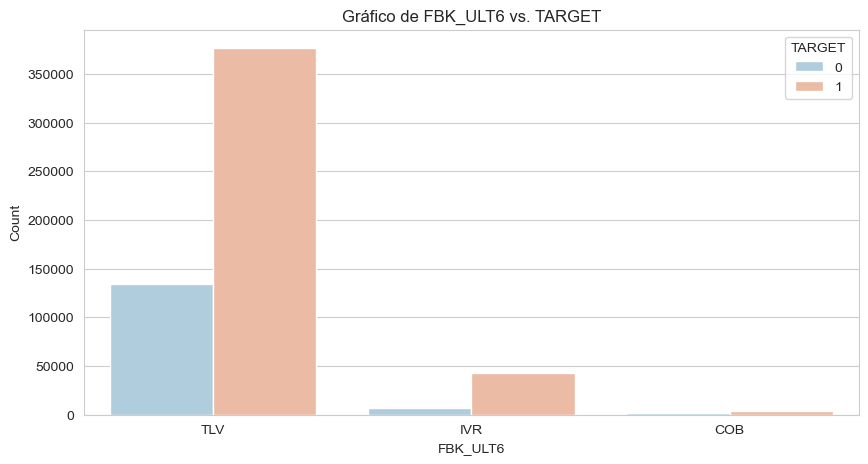

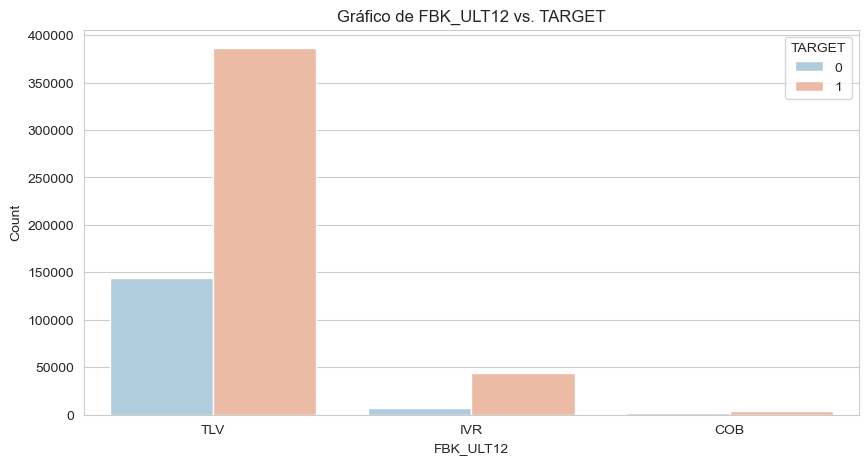

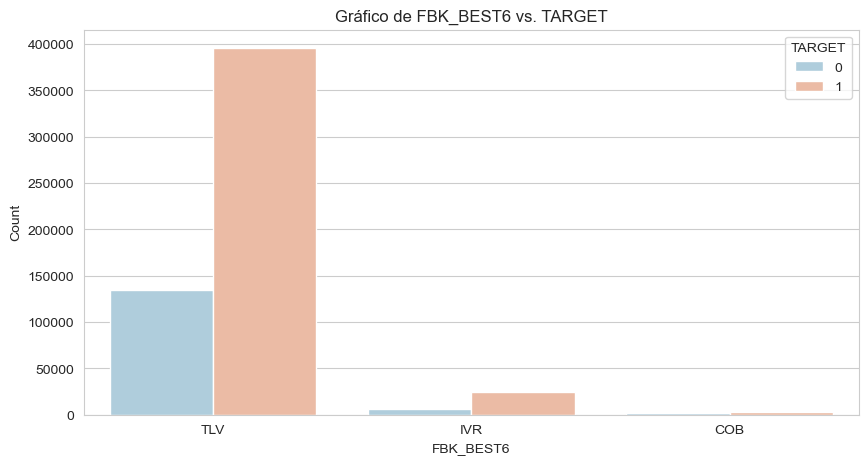

In [387]:
#################Variables categóricas#########################
#Graficando la variable objetivo "Target" con las variable categóricas predictoras de la data Entrenamiento
import seaborn as sns
import matplotlib.pyplot as plt

def get_graphic(dataInput, x_variable, hue_variable):
    sns.set_style('whitegrid')
    plt.figure(figsize=(10,5)) #ajustando el tamaño de la gráfica según tus necesidades
    ax=sns.countplot(x=x_variable,hue=hue_variable, data=dataInput, palette='RdBu_r')
    plt.title(f'Gráfico de {x_variable} vs. {hue_variable}')
    plt.xlabel(x_variable)
    plt.ylabel('Count')
    plt.legend(title=hue_variable, loc='upper right')  # Agrega una leyenda 
    return ax
        
variables_categoricas= [
    'FBK_ULT6', 'FBK_ULT12', 'FBK_BEST6']
    #'FBK_BEST12', 'COD_SALA', 'FEC_LLAMADA', 'PROVINCIA', 'DEPARTAMENTO', 'SEGMENTO', 'RANGO_INGRESOS'
    
for variable in variables_categoricas:
    print (f'\n --- Gráfico Data Entrenamiento para {variable} vs. TARGET --- \n')
    get_graphic(dataMasterEntrenamiento, variable,'TARGET')
    #plt.close() #cierra la figura después de usarla
    
plt.show()

#INTERPRETACIÓN:
#La proporción de .... CON #1: contacto efectivo y 0: no contacto efectivo


 --- Gráfico Data Prueba para NUMPRIORIZACION vs. TARGET --- 


 --- Gráfico Data Prueba para NC_DISTR12 vs. TARGET --- 


 --- Gráfico Data Prueba para TOTGEST6 vs. TARGET --- 



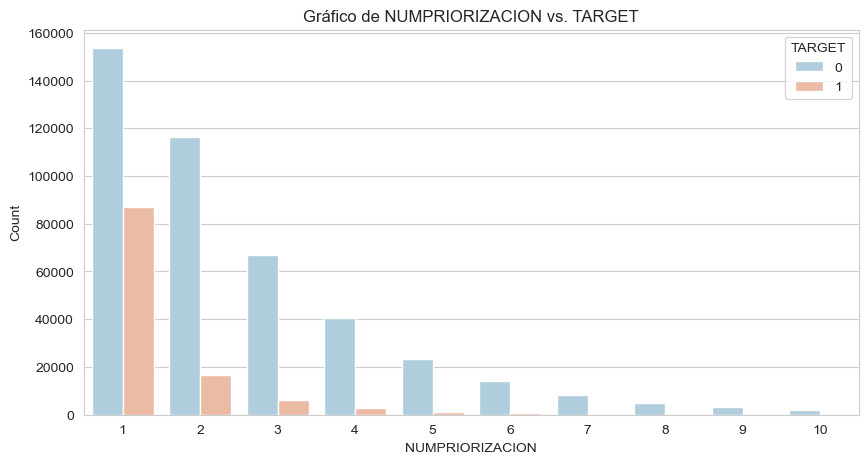

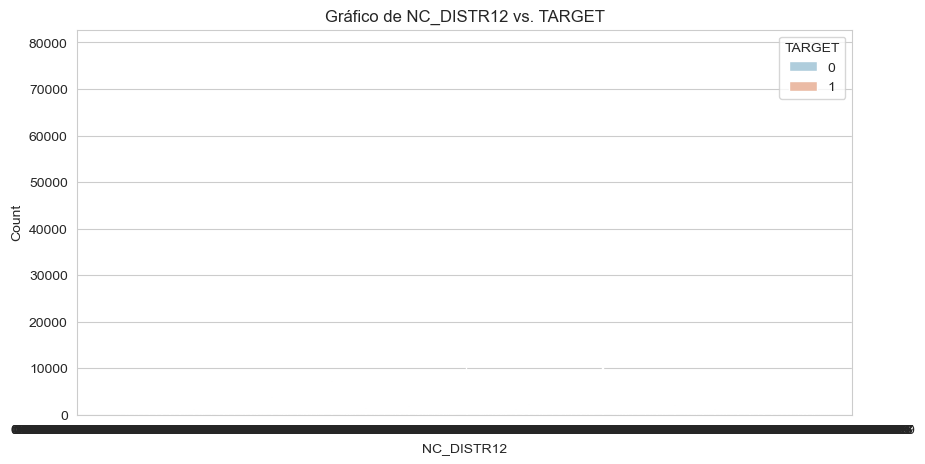

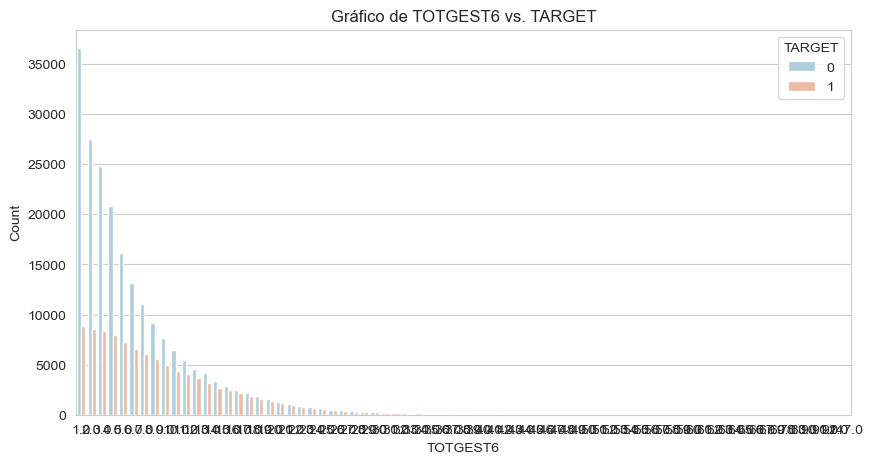

In [94]:
#################Variables numéricas#########################
#Graficando la variable objetivo "Target" con las variable numéricas predictoras de la data Prueba
import seaborn as sns
import matplotlib.pyplot as plt

def get_graphic(dataInput, x_variable, hue_variable):
    sns.set_style('whitegrid')
    plt.figure(figsize=(10,5)) #ajustando el tamaño de la gráfica según tus necesidades
    ax=sns.countplot(x=x_variable,hue=hue_variable, data=dataInput, palette='RdBu_r')
    plt.title(f'Gráfico de {x_variable} vs. {hue_variable}')
    plt.xlabel(x_variable)
    plt.ylabel('Count')
    plt.legend(title=hue_variable, loc='upper right')  # Agrega una leyenda 
    return ax
        
variables_numericas= [
    "NUMPRIORIZACION", "NC_DISTR12", "TOTGEST6"]
    #"TOTGEST12", "IDGRUPO", 
    #"DIAS_ACT", "DIAS_BEST6", "DIAS_ULT6", "DIAS_BEST12", "DIAS_ULT12",
    #"CNE_CTD12", "CNE_CTD6", "CNE_DIAS6", "CNE_DISTR6", "CNE_DISTR12", 
    #"CNE_DIAS12", "NC_CTD12", "NC_DIAS6", "NC_DIAS12", "NC_CTD6", "RECENCIA_APP",
    #"NT_CTD12", "NT_DISTR12", "NT_DIAS12", "NT_CTD6", "NT_DISTR6", "NT_DIAS6",
    #"INGRESO_NETO_VIGENTE", "INGRESO_BRUTO"]
       
for variable in variables_numericas:
    print (f'\n --- Gráfico Data Prueba para {variable} vs. TARGET --- \n')
    get_graphic(dataMasterPrueba, variable,'TARGET')
    #plt.close() #cierra la figura después de usarla
    
plt.show()

#INTERPRETACIÓN:
#La proporción de .... CON #1: contacto efectivo y 0: no contacto efectivo


 --- Gráfico Data Prueba para FBK_ULT6 vs. TARGET --- 


 --- Gráfico Data Prueba para FBK_ULT12 vs. TARGET --- 


 --- Gráfico Data Prueba para FBK_BEST6 vs. TARGET --- 



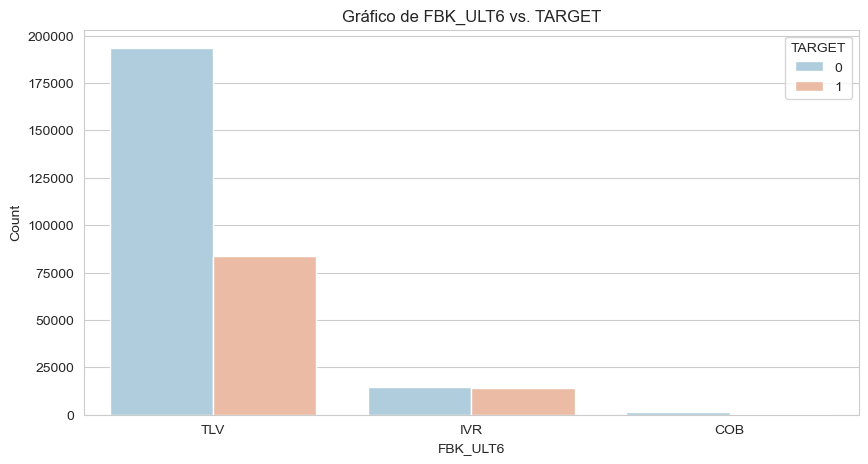

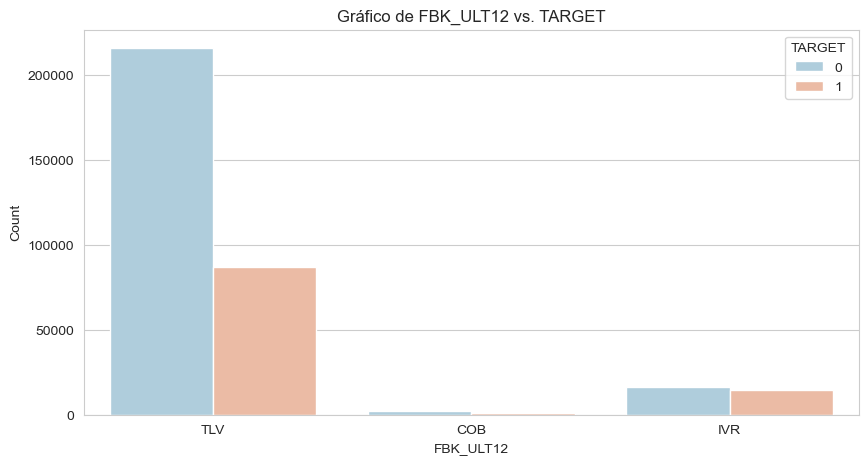

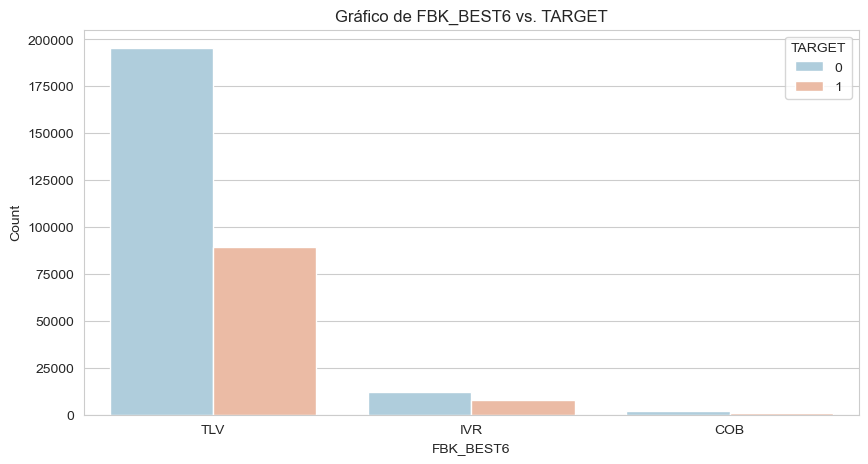

In [95]:
#################Variables categóricas#########################
#Graficando la variable objetivo "Target" con las variable categóricas predictoras de la data Prueba
import seaborn as sns
import matplotlib.pyplot as plt

def get_graphic(dataInput, x_variable, hue_variable):
    sns.set_style('whitegrid')
    plt.figure(figsize=(10,5)) #ajustando el tamaño de la gráfica según tus necesidades
    ax=sns.countplot(x=x_variable,hue=hue_variable, data=dataInput, palette='RdBu_r')
    plt.title(f'Gráfico de {x_variable} vs. {hue_variable}')
    plt.xlabel(x_variable)
    plt.ylabel('Count')
    plt.legend(title=hue_variable, loc='upper right')  # Agrega una leyenda 
    return ax
        
variables_categoricas= [
    'FBK_ULT6', 'FBK_ULT12', 'FBK_BEST6']
    #'FBK_BEST12', 'COD_SALA', 'FEC_LLAMADA', 'PROVINCIA', 'DEPARTAMENTO', 'SEGMENTO', 'RANGO_INGRESOS'
    
for variable in variables_categoricas:
    print (f'\n --- Gráfico Data Prueba para {variable} vs. TARGET --- \n')
    get_graphic(dataMasterPrueba, variable,'TARGET')
    #plt.close() #cierra la figura después de usarla
    
plt.show()

#INTERPRETACIÓN:
#La proporción de .... CON #1: contacto efectivo y 0: no contacto efectivo

C:\Users\migda\AppData\Local\Temp\ipykernel_12656\11872656.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataMasterEntrenamiento['NC_DISTR12'].dropna(),kde=True,color='red', bins=30);


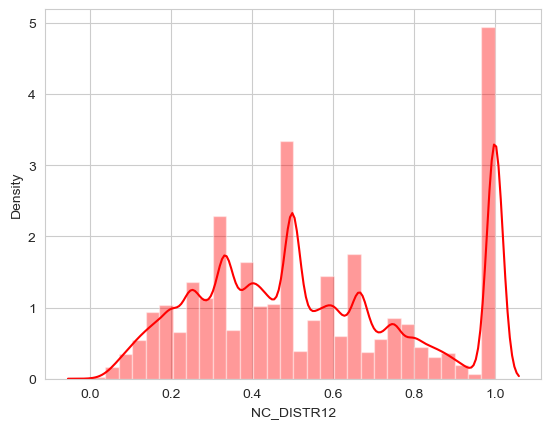

In [96]:
#Otros gráficos NO solicitados, solo para práctica
#Elaborando una gráfica de distribución sin los valores Nulos para variables numéricas de la DATA ENTRENAMIENTO
sns.distplot(dataMasterEntrenamiento['NC_DISTR12'].dropna(),kde=True,color='red', bins=30);

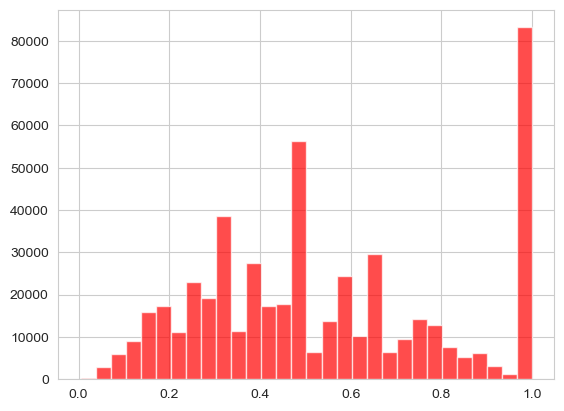

In [100]:
#Elaborando un histograma para variables numéricas de la DATA ENTRENAMIENTO
dataMasterEntrenamiento['NC_DISTR12'].hist(bins=30,color='red', alpha=0.7);

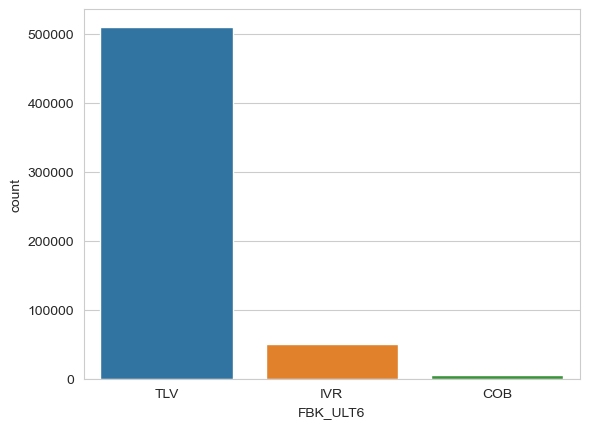

In [98]:
#Elaborando un gráfico de barras para variables categóricas de la data Entrenamiento
sns.countplot(x='FBK_ULT6',data=dataMasterEntrenamiento);

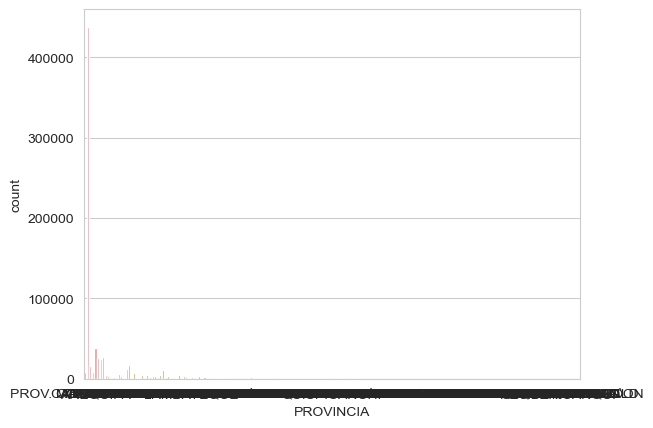

In [99]:
#Elaborando un gráfico de barras para variables categóricas de la data Entrenamiento
sns.countplot(x='PROVINCIA',data=dataMasterEntrenamiento);

7.Defina las mejores variables (gain)


In [101]:
#Gain, se refiere a la ganancia a nivel de relevancia que otorga cada variable, se podría usar Boruta (variables predictoras) Random Forest aquí.

*Solución*

Procesamiento de datos dummies

In [104]:
#corriendo la data para presentar el caso, y como todo va okay tan solo consideramos la data "df_dataEntrenamientoOk" luego de tratamiento respectivo
df_data_Para_Gain=df_dataEntrenamientoOk
#Se realizó esta acción ya que era muy difícil estar corriendo la data tratada n veces para seguir
# Leyendo los datos de "data_selec_entre.CSV"
#df_data_Para_Gain=pd.read_csv('C:\\Users\\migda\\OneDrive\\3-Python for Data Science\\Examen Final\\1era Parte Examen Python para CD\\1era Parte Examen Python para CD\\df_dataEntrenamiento_ImputadasOk.csv', sep=',')
#df_data_Para_Gain.head()

In [63]:
#df_dataGain=df_dataEntrenamientoOk.copy()

In [106]:
df_data_Para_Gain

NC_DISTR12   TOTGEST6  TOTGEST12  IDGRUPO  DIAS_ACT FBK_ULT6  \
0         0.333333   6.000000    6.00000      3.0     118.0      TLV   
1         0.461538  13.000000   13.00000     40.0      94.0      TLV   
2         0.666667   2.000000    6.00000      6.0     223.0      TLV   
3         0.549908   4.000000    4.00000     95.0      96.0      TLV   
4         0.187500  10.000000   16.00000      4.0      91.0      TLV   
...            ...        ...        ...      ...       ...      ...   
757386    1.000000   4.000000    4.00000     95.0      99.0      TLV   
757387    0.549908   7.602954    9.45495     40.0      66.0      TLV   
757388    0.500000   2.000000    2.00000     40.0     169.0      TLV   
757389    0.549908   7.602954    9.45495      3.0      43.0      TLV   
757390    0.549908   7.602954    9.45495     26.0     469.0      TLV   

       FBK_ULT12 FBK_BEST6  DIAS_BEST6   DIAS_ULT6  ...   NC_DIAS12   NC_CTD6  \
0            TLV       TLV    8.000000    8.000000  ...   58.000000  2.000000   
1            TLV       TLV   46.000000    9.000000  ...    9.000000  6.000000   
2            TLV       TLV  127.000000  118.000000  ...  127.000000  2.000000   
3            TLV       TLV   49.000000   49.000000  ...   64.032666  4.189459   
4            TLV       TLV   27.000000   27.000000  ...  140.000000  2.000000   
...          ...       ...         ...         ...  ...         ...       ...   
757386       TLV       TLV   17.000000   17.000000  ...   17.000000  4.000000   
757387       TLV       TLV   55.318484   36.296737  ...   64.032666  4.189459   
757388       TLV       TLV  169.000000   23.000000  ...   23.000000  1.000000   
757389       TLV       TLV   55.318484   36.296737  ...   64.032666  4.189459   
757390       TLV       TLV   55.318484   36.296737  ...   64.032666  4.189459   

        RECENCIA_APP         PROVINCIA  DEPARTAMENTO  INGRESO_NETO_VIGENTE  \
0         133.000000             TACNA         TACNA                7136.0   
1          54.351316              LIMA          LIMA                6920.0   
2          54.351316              LIMA          LIMA                1473.0   
3          54.351316              LIMA          LIMA                2293.0   
4          54.351316             CUSCO         CUSCO                6470.0   
...              ...               ...           ...                   ...   
757386     54.351316  CORONEL PORTILLO       UCAYALI                3535.0   
757387     54.351316              LIMA          LIMA                1320.0   
757388     54.351316              LIMA          LIMA                1563.0   
757389     54.351316              LIMA          LIMA                1383.0   
757390     54.351316              LIMA          LIMA                4428.0   

        INGRESO_BRUTO  SEGMENTO       RANGO_INGRESOS  TARGET  
0              9389.0         2  Entre S/.4000-10000       1  
1              9105.0       1BC  Entre S/.4000-10000       1  
2              1655.0         2   Entre S/.1000-4000       1  
3              2729.0         2   Entre S/.1000-4000       1  
4              8513.0         3  Entre S/.4000-10000       1  
...               ...       ...                  ...     ...  
757386         4474.0         3  Entre S/.4000-10000       0  
757387         1483.0        1A   Entre S/.1000-4000       0  
757388         1756.0         2   Entre S/.1000-4000       0  
757389         1553.0         2   Entre S/.1000-4000       0  
757390         5605.0         2  Entre S/.4000-10000       0  

[757391 rows x 31 columns]

In [107]:
#Eliminando los duplicados de la DATA TRATADA ENTRENAMIENTO
df_data_Para_Gain.drop_duplicates()
#df.drop_duplicates()

NC_DISTR12   TOTGEST6  TOTGEST12  IDGRUPO  DIAS_ACT FBK_ULT6  \
0         0.333333   6.000000    6.00000      3.0     118.0      TLV   
1         0.461538  13.000000   13.00000     40.0      94.0      TLV   
2         0.666667   2.000000    6.00000      6.0     223.0      TLV   
3         0.549908   4.000000    4.00000     95.0      96.0      TLV   
4         0.187500  10.000000   16.00000      4.0      91.0      TLV   
...            ...        ...        ...      ...       ...      ...   
757381    0.549908   7.602954    9.45495     95.0      47.0      TLV   
757383    0.549908   7.602954    9.45495     26.0     508.0      TLV   
757388    0.500000   2.000000    2.00000     40.0     169.0      TLV   
757389    0.549908   7.602954    9.45495      3.0      43.0      TLV   
757390    0.549908   7.602954    9.45495     26.0     469.0      TLV   

       FBK_ULT12 FBK_BEST6  DIAS_BEST6   DIAS_ULT6  ...   NC_DIAS12   NC_CTD6  \
0            TLV       TLV    8.000000    8.000000  ...   58.000000  2.000000   
1            TLV       TLV   46.000000    9.000000  ...    9.000000  6.000000   
2            TLV       TLV  127.000000  118.000000  ...  127.000000  2.000000   
3            TLV       TLV   49.000000   49.000000  ...   64.032666  4.189459   
4            TLV       TLV   27.000000   27.000000  ...  140.000000  2.000000   
...          ...       ...         ...         ...  ...         ...       ...   
757381       TLV       TLV   55.318484   36.296737  ...   64.032666  4.189459   
757383       TLV       TLV   55.318484   36.296737  ...   64.032666  4.189459   
757388       TLV       TLV  169.000000   23.000000  ...   23.000000  1.000000   
757389       TLV       TLV   55.318484   36.296737  ...   64.032666  4.189459   
757390       TLV       TLV   55.318484   36.296737  ...   64.032666  4.189459   

        RECENCIA_APP                PROVINCIA  DEPARTAMENTO  \
0         133.000000                    TACNA         TACNA   
1          54.351316                     LIMA          LIMA   
2          54.351316                     LIMA          LIMA   
3          54.351316                     LIMA          LIMA   
4          54.351316                    CUSCO         CUSCO   
...              ...                      ...           ...   
757381     54.351316                    TARMA         JUNIN   
757383     54.351316  PROV. CONST. DEL CALLAO        CALLAO   
757388     54.351316                     LIMA          LIMA   
757389     54.351316                     LIMA          LIMA   
757390     54.351316                     LIMA          LIMA   

        INGRESO_NETO_VIGENTE  INGRESO_BRUTO  SEGMENTO       RANGO_INGRESOS  \
0                     7136.0         9389.0         2  Entre S/.4000-10000   
1                     6920.0         9105.0       1BC  Entre S/.4000-10000   
2                     1473.0         1655.0         2   Entre S/.1000-4000   
3                     2293.0         2729.0         2   Entre S/.1000-4000   
4                     6470.0         8513.0         3  Entre S/.4000-10000   
...                      ...            ...       ...                  ...   
757381                2366.0         2816.0         2   Entre S/.1000-4000   
757383                1478.0         1660.0         3   Entre S/.1000-4000   
757388                1563.0         1756.0         2   Entre S/.1000-4000   
757389                1383.0         1553.0         2   Entre S/.1000-4000   
757390                4428.0         5605.0         2  Entre S/.4000-10000   

        TARGET  
0            1  
1            1  
2            1  
3            1  
4            1  
...        ...  
757381       0  
757383       0  
757388       0  
757389       0  
757390       0  

[451219 rows x 31 columns]

In [108]:
df_data_Para_Gain.columns

Index(['NC_DISTR12', 'TOTGEST6', 'TOTGEST12', 'IDGRUPO', 'DIAS_ACT',
       'FBK_ULT6', 'FBK_ULT12', 'FBK_BEST6', 'DIAS_BEST6', 'DIAS_ULT6',
       'FBK_BEST12', 'DIAS_BEST12', 'DIAS_ULT12', 'CNE_CTD12', 'CNE_CTD6',
       'CNE_DIAS6', 'CNE_DISTR6', 'CNE_DISTR12', 'CNE_DIAS12', 'NC_CTD12',
       'NC_DIAS6', 'NC_DIAS12', 'NC_CTD6', 'RECENCIA_APP', 'PROVINCIA',
       'DEPARTAMENTO', 'INGRESO_NETO_VIGENTE', 'INGRESO_BRUTO', 'SEGMENTO',
       'RANGO_INGRESOS', 'TARGET'],
      dtype='object')

In [109]:
#Variables dummies
#variables_categoricas = df_dataGain.select_dtypes(include=[object]) # seleccionar variables categóricas y sus registros
#variables_categoricas.columns 
df_data_Para_Gain = pd.get_dummies(df_data_Para_Gain, columns=['FBK_ULT6', 'FBK_ULT12', 'FBK_BEST6', 'FBK_BEST12', 'PROVINCIA', 'DEPARTAMENTO', 'SEGMENTO', 'RANGO_INGRESOS'], dtype=int)
df_data_Para_Gain

NC_DISTR12   TOTGEST6  TOTGEST12  IDGRUPO  DIAS_ACT  DIAS_BEST6  \
0         0.333333   6.000000    6.00000      3.0     118.0    8.000000   
1         0.461538  13.000000   13.00000     40.0      94.0   46.000000   
2         0.666667   2.000000    6.00000      6.0     223.0  127.000000   
3         0.549908   4.000000    4.00000     95.0      96.0   49.000000   
4         0.187500  10.000000   16.00000      4.0      91.0   27.000000   
...            ...        ...        ...      ...       ...         ...   
757386    1.000000   4.000000    4.00000     95.0      99.0   17.000000   
757387    0.549908   7.602954    9.45495     40.0      66.0   55.318484   
757388    0.500000   2.000000    2.00000     40.0     169.0  169.000000   
757389    0.549908   7.602954    9.45495      3.0      43.0   55.318484   
757390    0.549908   7.602954    9.45495     26.0     469.0   55.318484   

         DIAS_ULT6  DIAS_BEST12  DIAS_ULT12  CNE_CTD12  ...  SEGMENTO_3  \
0         8.000000      8.00000    8.000000   1.000000  ...           0   
1         9.000000     46.00000    9.000000   4.000000  ...           0   
2       118.000000    218.50000  127.000000   2.453108  ...           0   
3        49.000000     49.00000   49.000000   2.000000  ...           0   
4        27.000000     27.00000   27.000000   3.000000  ...           1   
...            ...          ...         ...        ...  ...         ...   
757386   17.000000     17.00000   17.000000   2.453108  ...           1   
757387   36.296737     66.40479   40.614142   2.453108  ...           0   
757388   23.000000    169.00000   23.000000   2.453108  ...           0   
757389   36.296737     66.40479   40.614142   2.453108  ...           0   
757390   36.296737     66.40479   40.614142   2.453108  ...           0   

        SEGMENTO_4  SEGMENTO_5  SEGMENTO_6  RANGO_INGRESOS_Entre S/.0-600  \
0                0           0           0                              0   
1                0           0           0                              0   
2                0           0           0                              0   
3                0           0           0                              0   
4                0           0           0                              0   
...            ...         ...         ...                            ...   
757386           0           0           0                              0   
757387           0           0           0                              0   
757388           0           0           0                              0   
757389           0           0           0                              0   
757390           0           0           0                              0   

        RANGO_INGRESOS_Entre S/.1000-4000  RANGO_INGRESOS_Entre S/.4000-10000  \
0                                       0                                   1   
1                                       0                                   1   
2                                       1                                   0   
3                                       1                                   0   
4                                       0                                   1   
...                                   ...                                 ...   
757386                                  0                                   1   
757387                                  1                                   0   
757388                                  1                                   0   
757389                                  1                                   0   
757390                                  0                                   1   

        RANGO_INGRESOS_Entre S/.600-1000  RANGO_INGRESOS_Mayor a S/.10000  \
0                                      0                                0   
1                                      0                                0   
2                                      0                                0   


In [110]:
df_data_Para_Gain.columns

Index(['NC_DISTR12', 'TOTGEST6', 'TOTGEST12', 'IDGRUPO', 'DIAS_ACT',
       'DIAS_BEST6', 'DIAS_ULT6', 'DIAS_BEST12', 'DIAS_ULT12', 'CNE_CTD12',
       ...
       'SEGMENTO_3', 'SEGMENTO_4', 'SEGMENTO_5', 'SEGMENTO_6',
       'RANGO_INGRESOS_Entre S/.0-600', 'RANGO_INGRESOS_Entre S/.1000-4000',
       'RANGO_INGRESOS_Entre S/.4000-10000',
       'RANGO_INGRESOS_Entre S/.600-1000', 'RANGO_INGRESOS_Mayor a S/.10000',
       'RANGO_INGRESOS_Sin ingresos'],
      dtype='object', length=264)

Selección de variables


In [111]:
#Creación de la matriz X de variables predictoras y el Y "Target"
X,y = df_data_Para_Gain.drop(['TARGET'], axis=1), df_data_Para_Gain[['TARGET']]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=1416,stratify=y)

Random Forest Features Importance para obtener las mejores variables

In [112]:
#Entrenando un modelo de Random Forest con 200 árboles y una semilla aleatroia 123
rf_clf = RandomForestClassifier(n_estimators=200,random_state =123) #forma del modelo

#Entrenando el modelo con el .fit
rf_clf.fit(X_train.values,y_train.values.ravel()) 

#Ordenando las mejores variables de mayor a menor generando un bucle en este caso un for para
#extraer los nombres de las columnas y la ganancia(Gain) de las variables más importantes

features =[]
for feature in zip(X.columns, rf_clf.feature_importances_):
    features.append(feature)
#Genero un dataframe para visualizar mejor lo que hizo random forest con su selector multivariado
feature_total = pd.DataFrame(features, columns=['Variables','Gain']).sort_values('Gain', ascending=False)
feature_total
#Se muestra en la tabla abajo presentada que, la variable que menos impacta es PROVINCIA_PURUS con un Gain=0.000000 y
#la variable que más impacta es DIAS_ACT con un Gain=1.346144

Variables          Gain
4                   DIAS_ACT  1.213382e-01
0                 NC_DISTR12  8.650826e-02
20      INGRESO_NETO_VIGENTE  7.843004e-02
21             INGRESO_BRUTO  7.799681e-02
3                    IDGRUPO  7.291548e-02
..                       ...           ...
217  PROVINCIA_VILCAS HUAMAN  7.325262e-07
107     PROVINCIA_GRAN CHIMU  6.563145e-07
91    PROVINCIA_CONDORCANQUI  5.425200e-07
167       PROVINCIA_PALLASCA  4.613218e-07
181          PROVINCIA_PURUS  0.000000e+00

[263 rows x 2 columns]

['NC_DISTR12',
 'TOTGEST6',
 'TOTGEST12',
 'IDGRUPO',
 'DIAS_ACT',
 'DIAS_BEST6',
 'DIAS_ULT6',
 'DIAS_BEST12',
 'DIAS_ULT12',
 'CNE_CTD12',
 'CNE_CTD6',
 'CNE_DIAS6',
 'CNE_DISTR6',
 'CNE_DISTR12',
 'CNE_DIAS12',
 'NC_CTD12',
 'NC_DIAS6',
 'NC_DIAS12',
 'NC_CTD6',
 'RECENCIA_APP',
 'INGRESO_NETO_VIGENTE',
 'INGRESO_BRUTO']

8.Realizar balanceo de datos si es necesario y si es necesario elegir un grupo de variables con el gain


*Solución*

Selector de Variables

In [113]:
#Usando SelectFromModel poniendo los parámetros de la forma del modelo que se construyó y un threshold que es un punto de corte que
#puede asumir de acuerdo a tu criterio con respecto a las variables que estén generando más Gain

sfm = SelectFromModel(rf_clf, threshold=0.008)

#entrenamiento del selector
sfm.fit(X, y)

#construyendo una lista para seleccionar las mejores variables para este caso
variables =[]
for feature_list_index in sfm.get_support(indices=True):
    variables.append(X.columns[feature_list_index])
    
variables

C:\Users\migda\anaconda3\lib\site-packages\sklearn\feature_selection\_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


['NC_DISTR12',
 'TOTGEST6',
 'TOTGEST12',
 'IDGRUPO',
 'DIAS_ACT',
 'DIAS_BEST6',
 'DIAS_ULT6',
 'DIAS_BEST12',
 'DIAS_ULT12',
 'CNE_CTD12',
 'CNE_CTD6',
 'CNE_DIAS6',
 'CNE_DISTR6',
 'CNE_DISTR12',
 'CNE_DIAS12',
 'NC_CTD12',
 'NC_DIAS6',
 'NC_DIAS12',
 'NC_CTD6',
 'RECENCIA_APP',
 'INGRESO_NETO_VIGENTE',
 'INGRESO_BRUTO']

In [115]:
#Realizando el balanceo con las mejores variables seleccionadas previamente con el Gain
Data_Balanceada = df_data_Para_Gain[['TARGET','NC_DISTR12','TOTGEST6','TOTGEST12','IDGRUPO','DIAS_ACT','DIAS_BEST6','DIAS_ULT6','DIAS_BEST12','DIAS_ULT12','CNE_CTD12','CNE_CTD6','CNE_DIAS6','CNE_DISTR6','CNE_DISTR12','CNE_DIAS12','NC_CTD12','NC_DIAS6','NC_DIAS12','NC_CTD6','RECENCIA_APP','INGRESO_NETO_VIGENTE','INGRESO_BRUTO']]

In [116]:
#Exportando la data df_dataEntrenamientoOk luego de hacer un dataframe con las variables dadas por el GAIN hacia un CSV file para ser reutilizado fácilmente
# Imprime la ubicación actual de trabajo
current_directory = os.getcwd()
print("Ubicación actual de trabajo:", current_directory)
# Exporta el DataFrame a un archivo CSV
Data_Balanceada.to_csv('df_Data_Para_Balanceo.csv', index=False)

Ubicación actual de trabajo: C:\Users\migda\OneDrive\3-Python for Data Science\Examen Final\1era Parte Examen Python para CD\1era Parte Examen Python para CD


In [117]:
Data_Balanceada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757391 entries, 0 to 757390
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   TARGET                757391 non-null  int64  
 1   NC_DISTR12            757391 non-null  float64
 2   TOTGEST6              757391 non-null  float64
 3   TOTGEST12             757391 non-null  float64
 4   IDGRUPO               757391 non-null  float64
 5   DIAS_ACT              757391 non-null  float64
 6   DIAS_BEST6            757391 non-null  float64
 7   DIAS_ULT6             757391 non-null  float64
 8   DIAS_BEST12           757391 non-null  float64
 9   DIAS_ULT12            757391 non-null  float64
 10  CNE_CTD12             757391 non-null  float64
 11  CNE_CTD6              757391 non-null  float64
 12  CNE_DIAS6             757391 non-null  float64
 13  CNE_DISTR6            757391 non-null  float64
 14  CNE_DISTR12           757391 non-null  float64
 15  

In [118]:
pip install imblearn

In [119]:
from imblearn.over_sampling import SMOTE
#creando una instancia de SMOTE
somte = SMOTE()

In [120]:
y=Data_Balanceada['TARGET']
x=Data_Balanceada.drop(['TARGET'], axis=1)

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=101,stratify=y)

In [123]:
from collections import Counter
counter = Counter(y_train)
print(counter)

Counter({1: 344673, 0: 185500})


In [124]:
os = SMOTE(random_state = 0)

In [125]:
from imblearn.over_sampling import SMOTE
#creando una instancia de SMOTE

smote = SMOTE()

#Aplicando SMOTE para balancear los datos
os_data_X, os_data_y = smote.fit_resample(X_train.values, y_train.values)

In [126]:
counter = Counter(os_data_y)
print(counter)
#Se aprecia en el resultado abajo la data balanceada

Counter({0: 344673, 1: 344673})


9.Corra una relación/modelo/algoritmo de respuesta binaria, muestre resultados sobre la data de test e interprete sus resultados (puede optimizar si considera necesario)


*Solución*

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
logmodelContactabilidad = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logmodelContactabilidad.fit(os_data_X,os_data_y)

C:\Users\migda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [65]:
logmodelContactabilidad.coef_

array([[-6.37863717e-02,  4.74807610e-02,  2.14201709e-02,
        -1.15702147e-02, -1.62327511e-03,  2.10329178e-03,
        -2.55205653e-03, -4.12512038e-03, -1.04962154e-03,
        -2.88380677e-03,  1.51534017e-02, -4.16853741e-04,
         1.24090502e-02,  1.28044671e-02,  6.54455375e-04,
        -1.56492492e-02,  2.71165804e-03,  2.88881254e-03,
        -3.64676187e-02,  1.11611489e-03,  6.49016582e-04,
        -4.23005933e-04,  1.21198232e-03,  2.76723924e-02,
         3.56775615e-03,  1.66554969e-03,  3.04111083e-02,
         3.75472841e-04,  8.39821500e-04,  2.27082890e-02,
         8.90402034e-03,  8.41076661e-04,  2.33889000e-02,
         8.22215424e-03, -2.24764761e-05, -3.12555092e-05,
         1.46955137e-05, -1.90865305e-05,  3.23312953e-05,
        -7.47493962e-05,  3.62424484e-05,  6.47019612e-06,
        -2.29080943e-05,  1.50718700e-05,  2.11893992e-05,
        -6.77631013e-04, -2.63602470e-04,  1.57724552e-06,
        -1.23948743e-04, -8.73121457e-05, -4.82055350e-0

In [130]:
logmodelContactabilidad.intercept_

array([0.09577446])

In [131]:
predictions1 = logmodelContactabilidad.predict(X_test)

C:\Users\migda\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [132]:
predictions_train1 = logmodelContactabilidad.predict(X_train)

C:\Users\migda\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [133]:
from sklearn.metrics import roc_auc_score

In [134]:
print(roc_auc_score(y_test,predictions1))

0.6875909068962865


In [135]:
print(roc_auc_score(y_train,predictions_train1))

0.6881417955952672


In [136]:
from sklearn.neural_network import MLPClassifier

In [137]:
RNmodel1 = MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.01, max_iter=20000, # cambie un learning_rate_init más grande porque demora mucho
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.001, validation_fraction=0.1, verbose=False,
              warm_start=False)
RNmodel1.fit(os_data_X,os_data_y)

MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=(20,),
              learning_rate_init=0.01, max_iter=20000, tol=0.001)

In [141]:
predictionsRN1 = RNmodel1.predict(X_test)

C:\Users\migda\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [142]:
predictions_trainRN1 = RNmodel1.predict(X_train)

C:\Users\migda\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [143]:
print(roc_auc_score(y_test,predictionsRN1))

0.5


In [144]:
print(roc_auc_score(y_train,predictions_trainRN1))

0.5


In [145]:
from sklearn.tree import DecisionTreeClassifier

In [146]:
dtree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=None, splitter='best')

In [147]:
dtree.fit(os_data_X,os_data_y)

DecisionTreeClassifier()

In [148]:
predictionsTree = dtree.predict(X_test)

C:\Users\migda\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [149]:
predictions_trainTree = dtree.predict(X_train)

C:\Users\migda\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [150]:
print(roc_auc_score(y_test,predictionsTree))

0.8303575956941924


In [151]:
print(roc_auc_score(y_train,predictions_trainTree))

0.9890007072604611


In [152]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [153]:
rfc.fit(os_data_X,os_data_y)

C:\Users\migda\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', min_samples_split=100,
                       n_estimators=500, n_jobs=1)

In [154]:
predictionsrfc = rfc.predict(X_test)

C:\Users\migda\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [155]:
print(roc_auc_score(y_test,predictionsrfc))

0.7798598738323514


In [157]:
predictions_trainrfc = rfc.predict(X_train)

C:\Users\migda\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [158]:
print(roc_auc_score(y_train,predictions_trainrfc))

0.8013030724390725


10.Comente sus conclusiones

*Solución*

En lo particular, el caso de contactabilidad fue muy complejo creo yo para el nivel inicial que considero me encuentro, se trató en lo posible de seguir los pasos aprendidos durante las sesiones y las experiencias compartidas de los Maestros en los distintos cursos y apoyo de experiencias de los compañeros, muy agradecida por ello.
En el desarrollo del caso de contactabilidad, se siguió los pasos de acuerdo a las instrucciones dejadas en el file Caso.pdf,
donde se desarrolló lo siguiente:
1.Analisis de valores únicos de la data recibida y detalles a considerar por el experto que generó el modelo del lado del negocio
2.Análisis descriptivo de tendencia central y gráficas de correlación, dispersión, barras según al tipo de variables (númericas y categóricas)
2.Tratamiento de variables para los valores outliers, se adaptó un análisis a detalle para una de las variables y luego se trató de modo macro a todas las variables
3.Tratamiento de variables para los valores Nulos, se realizó de forma sencilla con promedio (media) para variables numéricas y moda para variables categóricas, no se pudo realizar imputaciones por knn y promedios segmentados correctamente, se tuvo dificultades en tratar con estos métodos.
4.Análisis de la variable target para determinar aplicación de balanceo, en este caso si requirió para la DATA TRAIN y TEST(VALIDACIÖN) éste último ya no se pudo realizar para la validación quedaría pendiente efectuarla)
5.Se definieron las variables (gain) resultado en unas variables representativas a utilizar en los modelos vistos en clase, muy interesante como esta herramienta puede brindarnos las mejores variables para considerarlas en el modelo, puesto qué es un poco más difícil verlos en gráfica
6.Se aplicó balanceo de datos tan solo siguiendo la clase de Python y las grabaciones, falta entender como funciona realmente y verificar su aplicación.
7.Se corrió los modelos de regresión logística, MLPClassifier, árboles de decisión y RandomForestClassifier, siguiendo la clase de Python y las grabaciones, falta entender a profundidad como funcionan y como realmente se debe trabajar en los modelos de negocios reales. Se halló algunos resultados de roc = 0.68 para la Regresión Logística, un roc= 0.50 para MLPClassifier,  un roc=0.83 para Árboles de decisión y un roc = 0.78 para RandomForest, sin embargo, dichos resultados del AUC(área bajo la curva ROC) aún queda interpretar esas métricas y hallar también el coeficinete Gini para hacer la comparativa con los resultados del caso donde alcanzaba a un 70% con la técnica Adaboost, quedaría realizar las comparativas para decidir qué modelo está más representativo a tomar y también la validación con el archivo de PRUEBA (validación) proporcionada en el caso "data_selec_test.csv" para poder proporcionar mejores resultados.


Referencias:


-Sesiones de la clase 1 al 5
-Grabaciones de las sesiones
-Estadística práctica para ciencia de datos con R y Python por Peter Bruce, Andrew Bruce y Peter Gedeck
-